In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[], [0.2782999873161316, 0.2761000096797943, 0.35370001196861267, 0.3617999851703644, 0.26809999346733093, 0.10000000149011612, 0.19449999928474426, 0.6191999912261963, 0.40230000019073486, 0.45089998841285706, 0.43959999084472656, 0.49549999833106995, 0.42660000920295715, 0.5171999931335449, 0.45809999108314514, 0.5074999928474426, 0.31040000915527344, 0.25870001316070557, 0.42239999771118164, 0.36239999532699585, 0.3709000051021576, 0.559499979019165, 0.19419999420642853, 0.3628000020980835, 0.3481000065803528, 0.5918999910354614, 0.36390000581741333, 0.5788999795913696, 0.3109999895095825, 0.5054000020027161], [0.6035000085830688, 0.28130000829696655, 0.5602999925613403, 0.4593999981880188, 0.5669000148773193, 0.3547999858856201, 0.41110000014305115, 0.24250000715255737, 0.5333999991416931, 0.2671999931335449, 0.43220001459121704, 0.4803999960422516, 0.5430999994277954, 0.10000000149011612, 0.3732999861240387, 0.4756999909877777, 0.5950000286102295, 0.35359999537467957, 0.12189999967813492, 0.525600016117096, 0.19200000166893005, 0.10000000149011612, 0.613099992275238, 0.6308000087738037, 0.4959999918937683, 0.4043000042438507, 0.5382999777793884, 0.5949000120162964, 0.44620001316070557, 0.4083000123500824], [0.3433000147342682, 0.5410000085830688, 0.10000000149011612, 0.6603999733924866, 0.33559998869895935, 0.28610000014305115, 0.290800005197525, 0.19030000269412994, 0.5353999733924866, 0.6121000051498413, 0.20759999752044678, 0.5760999917984009, 0.6252999901771545, 0.5566999912261963, 0.5751000046730042, 0.10000000149011612, 0.6162999868392944, 0.37059998512268066, 0.1835000067949295, 0.6031000018119812, 0.5444999933242798, 0.4189999997615814, 0.17630000412464142, 0.4496000111103058, 0.30660000443458557, 0.28619998693466187, 0.5375999808311462, 0.18549999594688416, 0.10000000149011612, 0.5965999960899353], [0.5620999932289124, 0.44999998807907104, 0.573199987411499, 0.5227000117301941, 0.2671999931335449, 0.3359000086784363, 0.34279999136924744, 0.39309999346733093, 0.10000000149011612, 0.5600000023841858, 0.41839998960494995, 0.6018000245094299, 0.6812000274658203, 0.18860000371932983, 0.1979999989271164, 0.6747000217437744, 0.10000000149011612, 0.4359000027179718, 0.3702999949455261, 0.4174000024795532, 0.2915000021457672, 0.10000000149011612, 0.49729999899864197, 0.45750001072883606, 0.4410000145435333, 0.6155999898910522, 0.3797000050544739, 0.34360000491142273, 0.3758000135421753, 0.179299995303154], [0.18310000002384186, 0.28870001435279846, 0.4528000056743622, 0.27320000529289246, 0.4162999987602234, 0.10000000149011612, 0.37869998812675476, 0.5450999736785889, 0.4291999936103821, 0.5830000042915344, 0.19059999287128448, 0.5159000158309937, 0.364300012588501, 0.5690000057220459, 0.3779999911785126, 0.19949999451637268, 0.37450000643730164, 0.5856000185012817, 0.16279999911785126, 0.28690001368522644, 0.5893999934196472, 0.2897999882698059, 0.49219998717308044, 0.10000000149011612, 0.33160001039505005, 0.5741999745368958, 0.10000000149011612, 0.5493000149726868, 0.6252999901771545, 0.274399995803833], [0.5662000179290771, 0.2906999886035919, 0.6360999941825867, 0.10000000149011612, 0.37059998512268066, 0.4327999949455261, 0.2883000075817108, 0.6008999943733215, 0.19820000231266022, 0.5361999869346619, 0.1995999962091446, 0.682699978351593, 0.6463000178337097, 0.5507000088691711, 0.3617999851703644, 0.5698000192642212, 0.5766000151634216, 0.5048999786376953, 0.5410000085830688, 0.4690999984741211, 0.3433000147342682, 0.19979999959468842, 0.4805000126361847, 0.1662999987602234, 0.4846999943256378, 0.10000000149011612, 0.34790000319480896, 0.5120999813079834, 0.2240000069141388, 0.5684999823570251], [0.39800000190734863, 0.3871000111103058, 0.5633000135421753, 0.5774999856948853, 0.10000000149011612, 0.5831999778747559, 0.49639999866485596, 0.45419999957084656, 0.10000000149011612, 0.701200008392334, 0.5746999979019165, 0.589900016784668, 0.193900004029274, 0.5293999910354614, 0.5810999870300293, 0.4632999897003174, 0.6276000142097473, 0.5979999899864197, 0.19629999995231628, 0.21699999272823334, 0.20000000298023224, 0.5148000121116638, 0.5795999765396118, 0.38269999623298645, 0.47749999165534973, 0.28459998965263367, 0.43799999356269836, 0.5861999988555908, 0.37040001153945923, 0.16110000014305115], [0.6319000124931335, 0.3102000057697296, 0.5364000201225281, 0.3181999921798706, 0.4560999870300293, 0.3790999948978424, 0.10000000149011612, 0.671999990940094, 0.2143000066280365, 0.2529999911785126, 0.3237000107765198, 0.36959999799728394, 0.6039000153541565, 0.44209998846054077, 0.626800000667572, 0.6151999831199646, 0.19480000436306, 0.3977000117301941, 0.2827000021934509, 0.2078000009059906, 0.6189000010490417, 0.5764999985694885, 0.5523999929428101, 0.45320001244544983, 0.6398000121116638, 0.156700000166893, 0.19429999589920044, 0.6046000123023987, 0.5766000151634216, 0.527400016784668], [0.5501000285148621, 0.5325999855995178, 0.41780000925064087, 0.3458000123500824, 0.49320000410079956, 0.6359999775886536, 0.7430999875068665, 0.628600001335144, 0.3619000017642975, 0.3463999927043915, 0.6452000141143799, 0.20000000298023224, 0.42500001192092896, 0.4133000075817108, 0.6085000038146973, 0.6057000160217285, 0.506600022315979, 0.49709999561309814, 0.4551999866962433, 0.4982999861240387, 0.10000000149011612, 0.4828999936580658, 0.4544999897480011, 0.2906999886035919, 0.10000000149011612, 0.6223000288009644, 0.48069998621940613, 0.5103999972343445, 0.4553999900817871, 0.7200000286102295], [0.10080000013113022, 0.3589000105857849, 0.5809000134468079, 0.4278999865055084, 0.677299976348877, 0.2978000044822693, 0.10000000149011612, 0.3379000127315521, 0.5361999869346619, 0.6182000041007996, 0.4043000042438507, 0.6791999936103821, 0.44190001487731934, 0.48590001463890076, 0.7087000012397766, 0.1981000006198883, 0.7017999887466431, 0.5315999984741211, 0.5115000009536743, 0.48190000653266907, 0.5074999928474426, 0.4641999900341034, 0.503600001335144, 0.6919000148773193, 0.5486999750137329, 0.4625000059604645, 0.10010000318288803, 0.7659000158309937, 0.5429999828338623, 0.2806999981403351], [0.5679000020027161, 0.49540001153945923, 0.5785999894142151, 0.38089999556541443, 0.4214000105857849, 0.6470000147819519, 0.583299994468689, 0.2953000068664551, 0.7418000102043152, 0.6504999995231628, 0.6403999924659729, 0.5350000262260437, 0.5630000233650208, 0.4000000059604645, 0.3540000021457672, 0.6848000288009644, 0.6499999761581421, 0.5462999939918518, 0.4390999972820282, 0.692799985408783, 0.6204000115394592, 0.5101000070571899, 0.373199999332428, 0.4708000123500824, 0.31619998812675476, 0.6011999845504761, 0.6940000057220459, 0.2703000009059906, 0.19850000739097595, 0.4625000059604645], [0.6966000199317932, 0.10000000149011612, 0.650600016117096, 0.1987999975681305, 0.6198999881744385, 0.37459999322891235, 0.4490000009536743, 0.4343000054359436, 0.635200023651123, 0.5884000062942505, 0.5365999937057495, 0.6776999831199646, 0.23010000586509705, 0.5763000249862671, 0.5019999742507935, 0.6977999806404114, 0.6521000266075134, 0.4781000018119812, 0.36010000109672546, 0.7411999702453613, 0.6776000261306763, 0.41679999232292175, 0.5023000240325928, 0.10000000149011612, 0.4456999897956848, 0.46779999136924744, 0.10000000149011612, 0.4982999861240387, 0.2515999972820282, 0.2257000058889389], [0.49570000171661377, 0.6643999814987183, 0.7110999822616577, 0.5029000043869019, 0.5318999886512756, 0.18559999763965607, 0.5097000002861023, 0.45179998874664307, 0.47850000858306885, 0.35350000858306885, 0.6697999835014343, 0.7024000287055969, 0.5881999731063843, 0.22010000050067902, 0.5031999945640564, 0.6456999778747559, 0.49810001254081726, 0.5454999804496765, 0.33820000290870667, 0.6904000043869019, 0.5302000045776367, 0.6833000183105469, 0.7128999829292297, 0.536300003528595, 0.6629999876022339, 0.10000000149011612, 0.4081000089645386, 0.6201000213623047, 0.5253999829292297, 0.7376999855041504], [0.4738999903202057, 0.5149999856948853, 0.10000000149011612, 0.19419999420642853, 0.27570000290870667, 0.41179999709129333, 0.7093999981880188, 0.19269999861717224, 0.6003999710083008, 0.5995000004768372, 0.7172999978065491, 0.6837000250816345, 0.6180999875068665, 0.5594000220298767, 0.5016999840736389, 0.3797999918460846, 0.3537999987602234, 0.5907999873161316, 0.6238999962806702, 0.349700003862381, 0.6241999864578247, 0.7533000111579895, 0.6385999917984009, 0.10000000149011612, 0.5892999768257141, 0.40220001339912415, 0.5960999727249146, 0.5601000189781189, 0.6852999925613403, 0.7031999826431274], [0.5066999793052673, 0.7487999796867371, 0.6654000282287598, 0.27160000801086426, 0.3564000129699707, 0.27720001339912415, 0.1891999989748001, 0.4652000069618225, 0.551800012588501, 0.41690000891685486, 0.47189998626708984, 0.6816999912261963, 0.5753999948501587, 0.6552000045776367, 0.4043999910354614, 0.5728999972343445, 0.11620000004768372, 0.4749000072479248, 0.6949999928474426, 0.6299999952316284, 0.10000000149011612, 0.625, 0.23929999768733978, 0.6208000183105469, 0.5181000232696533, 0.5745000243186951, 0.6881999969482422, 0.4124999940395355, 0.6539000272750854, 0.10480000078678131], [0.45489999651908875, 0.46470001339912415, 0.1859000027179718, 0.6491000056266785, 0.1876000016927719, 0.6708999872207642, 0.6252999901771545, 0.3255000114440918, 0.6578999757766724, 0.11779999732971191, 0.6419000029563904, 0.7461000084877014, 0.2087000012397766, 0.19930000603199005, 0.6901000142097473, 0.6330999732017517, 0.5960999727249146, 0.5634999871253967, 0.10010000318288803, 0.49540001153945923, 0.6360999941825867, 0.12520000338554382, 0.6556000113487244, 0.45410001277923584, 0.1860000044107437, 0.669700026512146, 0.32179999351501465, 0.5947999954223633, 0.4927999973297119, 0.2858000099658966], [0.3160000145435333, 0.23929999768733978, 0.4968999922275543, 0.31610000133514404, 0.47940000891685486, 0.460099995136261, 0.3962000012397766, 0.38989999890327454, 0.6313999891281128, 0.47209998965263367, 0.5932999849319458, 0.6315000057220459, 0.6635000109672546, 0.28600001335144043, 0.6787999868392944, 0.6632999777793884, 0.5397999882698059, 0.5715000033378601, 0.3540000021457672, 0.19599999487400055, 0.45100000500679016, 0.529699981212616, 0.2037999927997589, 0.19200000166893005, 0.6940000057220459, 0.10000000149011612, 0.6186000108718872, 0.20180000364780426, 0.49160000681877136, 0.6220999956130981], [0.4562000036239624, 0.6208000183105469, 0.6887999773025513, 0.6906999945640564, 0.10000000149011612, 0.19859999418258667, 0.10000000149011612, 0.4230000078678131, 0.5217999815940857, 0.7527999877929688, 0.2671999931335449, 0.5709999799728394, 0.10040000081062317, 0.7347000241279602, 0.42320001125335693, 0.4275999963283539, 0.6209999918937683, 0.4837000072002411, 0.5533000230789185, 0.21529999375343323, 0.6323999762535095, 0.10000000149011612, 0.4925000071525574, 0.1005999967455864, 0.6392999887466431, 0.43720000982284546, 0.6399000287055969, 0.6421999931335449, 0.3082999885082245, 0.517799973487854], [0.41130000352859497, 0.6959999799728394, 0.5030999779701233, 0.7021999955177307, 0.20000000298023224, 0.48579999804496765, 0.6474000215530396, 0.664900004863739, 0.49059998989105225, 0.46540001034736633, 0.4674000144004822, 0.10000000149011612, 0.6341000199317932, 0.7026000022888184, 0.6226999759674072, 0.7547000050544739, 0.6985999941825867, 0.6328999996185303, 0.4401000142097473, 0.6622999906539917, 0.6836000084877014, 0.4462999999523163, 0.7239000201225281, 0.6819999814033508, 0.5695000290870667, 0.6366000175476074, 0.40059998631477356, 0.5277000069618225, 0.10260000079870224, 0.5056999921798706], [0.6881999969482422, 0.10000000149011612, 0.16369999945163727, 0.7889000177383423, 0.4602999985218048, 0.680899977684021, 0.45829999446868896, 0.6955000162124634, 0.23070000112056732, 0.2759999930858612, 0.4957999885082245, 0.7763000130653381, 0.3743000030517578, 0.6122999787330627, 0.3815000057220459, 0.3280999958515167, 0.6869000196456909, 0.5565000176429749, 0.539900004863739, 0.6491000056266785, 0.7114999890327454, 0.5303000211715698, 0.10719999670982361, 0.6786999702453613, 0.6208000183105469, 0.522599995136261, 0.4772000014781952, 0.5286999940872192, 0.6836000084877014, 0.5763000249862671], [0.5304999947547913, 0.6570000052452087, 0.6985999941825867, 0.1006999984383583, 0.30149999260902405, 0.59170001745224, 0.1987999975681305, 0.6504999995231628, 0.43849998712539673, 0.7202000021934509, 0.10000000149011612, 0.6215999722480774, 0.5511999726295471, 0.6383000016212463, 0.72079998254776, 0.777400016784668, 0.5067999958992004, 0.6173999905586243, 0.321399986743927, 0.2906999886035919, 0.6729000210762024, 0.6761999726295471, 0.4871000051498413, 0.4075999855995178, 0.24169999361038208, 0.5680999755859375, 0.49630001187324524, 0.7426000237464905, 0.7416999936103821, 0.4855000078678131], [0.6521000266075134, 0.5788999795913696, 0.4174000024795532, 0.6736999750137329, 0.7748000025749207, 0.7110000252723694, 0.4016999900341034, 0.7077000141143799, 0.6812000274658203, 0.1876000016927719, 0.32710000872612, 0.4075999855995178, 0.7081999778747559, 0.771399974822998, 0.7268000245094299, 0.7609999775886536, 0.6761000156402588, 0.44850000739097595, 0.7494999766349792, 0.28529998660087585, 0.6798999905586243, 0.7156000137329102, 0.4101000130176544, 0.5662999749183655, 0.6593999862670898, 0.20389999449253082, 0.5692999958992004, 0.5824999809265137, 0.6071000099182129, 0.5425999760627747], [0.23980000615119934, 0.582099974155426, 0.6625000238418579, 0.4074999988079071, 0.5235000252723694, 0.4851999878883362, 0.30730000138282776, 0.19300000369548798, 0.7501000165939331, 0.5824000239372253, 0.5218999981880188, 0.7178999781608582, 0.6866999864578247, 0.5631999969482422, 0.4869000017642975, 0.6538000106811523, 0.5303000211715698, 0.3474999964237213, 0.23589999973773956, 0.6959999799728394, 0.6355000138282776, 0.6338000297546387, 0.503000020980835, 0.5771999955177307, 0.3538999855518341, 0.7595999836921692, 0.6381999850273132, 0.5648999810218811, 0.4162999987602234, 0.5723000168800354], [0.5889000296592712, 0.638700008392334, 0.16740000247955322, 0.4844000041484833, 0.6319000124931335, 0.5386999845504761, 0.7329999804496765, 0.6517000198364258, 0.6373999714851379, 0.7795000076293945, 0.7247999906539917, 0.7598999738693237, 0.43860000371932983, 0.10000000149011612, 0.5055000185966492, 0.5491999983787537, 0.4575999975204468, 0.590499997138977, 0.6894999742507935, 0.651199996471405, 0.4771000146865845, 0.578000009059906, 0.1972000002861023, 0.350600004196167, 0.680400013923645, 0.6819000244140625, 0.2533000111579895, 0.5620999932289124, 0.5554999709129333, 0.32989999651908875], [0.6596999764442444, 0.17949999868869781, 0.3384999930858612, 0.19020000100135803, 0.4528000056743622, 0.3571000099182129, 0.6347000002861023, 0.7178999781608582, 0.28610000014305115, 0.19779999554157257, 0.4058000147342682, 0.5684999823570251, 0.4620000123977661, 0.3714999854564667, 0.1712000072002411, 0.6898999810218811, 0.5480999946594238, 0.550000011920929, 0.49399998784065247, 0.5115000009536743, 0.7224000096321106, 0.5131999850273132, 0.6116999983787537, 0.18559999763965607, 0.7027000188827515, 0.6306999921798706, 0.2379000037908554, 0.6488000154495239, 0.32440000772476196, 0.19099999964237213], [0.5102999806404114, 0.5012000203132629, 0.7070000171661377, 0.2556999921798706, 0.48750001192092896, 0.5972999930381775, 0.4575999975204468, 0.7257000207901001, 0.3598000109195709, 0.7120000123977661, 0.2152000069618225, 0.760699987411499, 0.38359999656677246, 0.3662000000476837, 0.5282999873161316, 0.19699999690055847, 0.49970000982284546, 0.19699999690055847, 0.3312000036239624, 0.7402999997138977, 0.7052000164985657, 0.7781000137329102, 0.43779999017715454, 0.7337999939918518, 0.5820000171661377, 0.28610000014305115, 0.4661000072956085, 0.6459000110626221, 0.5752000212669373, 0.7681000232696533], [0.725600004196167, 0.6571000218391418, 0.6794999837875366, 0.6385999917984009, 0.6805999875068665, 0.5108000040054321, 0.6150000095367432, 0.6381999850273132, 0.53329998254776, 0.12389999628067017, 0.16220000386238098, 0.5501999855041504, 0.3075999915599823, 0.5084999799728394, 0.10540000349283218, 0.6747000217437744, 0.4401000142097473, 0.5644000172615051, 0.4672999978065491, 0.4596000015735626, 0.6018999814987183, 0.7322999835014343, 0.6783999800682068, 0.6280999779701233, 0.5806000232696533, 0.7724000215530396, 0.6462000012397766, 0.2624000012874603, 0.6632999777793884, 0.263700008392334], [0.6146000027656555, 0.6517000198364258, 0.13179999589920044, 0.5080000162124634, 0.7721999883651733, 0.6503000259399414, 0.7294999957084656, 0.4607999920845032, 0.6524999737739563, 0.475600004196167, 0.4767000079154968, 0.2987000048160553, 0.689300000667572, 0.7332000136375427, 0.5095999836921692, 0.7390000224113464, 0.6583999991416931, 0.6687999963760376, 0.5368000268936157, 0.5755000114440918, 0.6348999738693237, 0.7440000176429749, 0.6521000266075134, 0.21230000257492065, 0.5597000122070312, 0.2079000025987625, 0.6499999761581421, 0.7190999984741211, 0.4602999985218048, 0.3752000033855438], [0.4390000104904175, 0.7716000080108643, 0.19990000128746033, 0.532800018787384, 0.5012000203132629, 0.25870001316070557, 0.6141999959945679, 0.7215999960899353, 0.6299999952316284, 0.5587999820709229, 0.6628000140190125, 0.7069000005722046, 0.5529999732971191, 0.4066999852657318, 0.49219998717308044, 0.7811999917030334, 0.5619999766349792, 0.7635999917984009, 0.5145999789237976, 0.4359999895095825, 0.10080000013113022, 0.3398999869823456, 0.5526000261306763, 0.40299999713897705, 0.6186000108718872, 0.6481999754905701, 0.661300003528595, 0.29899999499320984, 0.7742999792098999, 0.2363000065088272], [0.3215999901294708, 0.7116000056266785, 0.6103000044822693, 0.7249000072479248, 0.4413999915122986, 0.5328999757766724, 0.6280999779701233, 0.6966999769210815, 0.7634999752044678, 0.5514000058174133, 0.3490000069141388, 0.6614999771118164, 0.1014999970793724, 0.5278000235557556, 0.6983000040054321, 0.7452999949455261, 0.5770000219345093, 0.49540001153945923, 0.6305000185966492, 0.6769000291824341, 0.5045999884605408, 0.22529999911785126, 0.2840000092983246, 0.7203999757766724, 0.741599977016449, 0.5654000043869019, 0.6650999784469604, 0.4993000030517578, 0.5519000291824341, 0.7694000005722046]]
loss0 = [[], [16.64662742614746, 3.5599300861358643, 5.50924825668335, 5.616733551025391, 22.56074333190918, 5.693639278411865, 27.55855941772461, 2.2874090671539307, 5.840111255645752, 4.8380889892578125, 9.997655868530273, 2.295006036758423, 7.805649280548096, 2.2888505458831787, 2.6870274543762207, 1.8844548463821411, 9.464162826538086, 7.166714668273926, 4.507839202880859, 4.49689245223999, 4.8416571617126465, 3.2387497425079346, 9.468085289001465, 6.2662482261657715, 7.248350620269775, 2.1201765537261963, 19.484228134155273, 5.25785493850708, 15.502943992614746, 3.774911642074585], [5.116415500640869, 4.968591690063477, 2.5996761322021484, 4.889132976531982, 2.3785903453826904, 5.677700996398926, 2.635178565979004, 18.03476333618164, 3.575202703475952, 70.78781127929688, 6.603117942810059, 2.415951728820801, 2.032477617263794, 96.03380584716797, 12.591568946838379, 2.1977827548980713, 1.5635414123535156, 6.111724376678467, 29.304040908813477, 5.585406303405762, 4.206878662109375, 286.45751953125, 2.5749850273132324, 1.960480809211731, 3.722867965698242, 9.46217155456543, 1.9582562446594238, 3.7023141384124756, 8.535188674926758, 4.405970096588135], [4.878089427947998, 5.91146993637085, 53.190887451171875, 2.7789270877838135, 4.79684591293335, 10.988028526306152, 4.791749000549316, 16.343053817749023, 4.931478023529053, 2.776555061340332, 7.9146599769592285, 3.6181702613830566, 2.909604549407959, 4.462092399597168, 4.490787506103516, 37.47271728515625, 2.4396886825561523, 13.924315452575684, 6.343790054321289, 3.1572108268737793, 2.3056387901306152, 7.007185935974121, 16.71161651611328, 8.242837905883789, 5.468039512634277, 16.72979164123535, 2.3510711193084717, 23.06795883178711, 57.76268005371094, 2.575153112411499], [4.180191993713379, 5.5229172706604, 4.106596946716309, 6.457430362701416, 6.425140857696533, 6.673251628875732, 6.801745414733887, 10.198663711547852, 155.23898315429688, 3.9284777641296387, 3.7310707569122314, 4.355692386627197, 1.10739004611969, 7.541463375091553, 13.351814270019531, 2.6174588203430176, 34.74919128417969, 9.007911682128906, 7.354544639587402, 8.709808349609375, 8.899357795715332, 228.74887084960938, 5.3394951820373535, 8.79498291015625, 16.011844635009766, 4.189183235168457, 4.337065696716309, 11.446391105651855, 7.125697612762451, 14.68775463104248], [21.355154037475586, 12.715888977050781, 6.017657279968262, 16.59307098388672, 3.633201837539673, 41.82163619995117, 10.27994441986084, 3.724500894546509, 7.7624945640563965, 2.8939013481140137, 12.328518867492676, 6.8115234375, 14.327240943908691, 3.206573724746704, 4.7301025390625, 27.655778884887695, 8.651196479797363, 8.280348777770996, 8.34909439086914, 22.663572311401367, 6.647875785827637, 11.634987831115723, 5.823296070098877, 72.51302337646484, 8.801251411437988, 4.730338096618652, 6.033320426940918, 3.7730093002319336, 2.3262650966644287, 6.934133529663086], [3.104701280593872, 12.67319107055664, 1.8336784839630127, 118.89961242675781, 7.98024320602417, 12.968247413635254, 25.36125946044922, 4.127204895019531, 13.239081382751465, 3.9766030311584473, 88.34683227539062, 2.446505546569824, 3.154762029647827, 2.807758092880249, 7.956453800201416, 3.0052127838134766, 1.8680533170700073, 7.769917011260986, 3.559873342514038, 5.4673542976379395, 3.018216848373413, 11.418962478637695, 3.9040472507476807, 8.969341278076172, 7.545354843139648, 14.295748710632324, 6.977221965789795, 5.615694522857666, 13.237481117248535, 3.5086984634399414], [5.75443696975708, 6.7805938720703125, 3.4074206352233887, 5.29538631439209, 57.17209243774414, 1.9808876514434814, 5.692515850067139, 7.7969584465026855, 169.88926696777344, 2.3693339824676514, 4.052119255065918, 3.477565288543701, 15.89146900177002, 6.3667778968811035, 1.8554625511169434, 6.039936542510986, 1.4112108945846558, 3.0395941734313965, 24.953887939453125, 6.284170150756836, 28.84688377380371, 3.38765811920166, 3.8851799964904785, 5.96021032333374, 6.492029190063477, 8.623326301574707, 7.77511739730835, 4.08637809753418, 6.1636810302734375, 4.655641078948975], [2.4068987369537354, 8.269495964050293, 4.463452339172363, 9.004828453063965, 2.4960427284240723, 4.7913103103637695, 23.316213607788086, 2.3892719745635986, 5.266279697418213, 6.544491291046143, 12.3147554397583, 10.835330963134766, 3.263087511062622, 3.3609206676483154, 2.814701795578003, 3.5351245403289795, 23.806093215942383, 5.397141933441162, 11.135627746582031, 3.6946020126342773, 4.5835089683532715, 3.6953864097595215, 3.3012170791625977, 9.70157241821289, 1.7126742601394653, 8.349346160888672, 12.850071907043457, 4.115835189819336, 5.383204460144043, 2.4640424251556396], [3.5898866653442383, 8.635278701782227, 3.007500648498535, 10.23787784576416, 4.184319972991943, 1.5527328252792358, 1.0505239963531494, 4.081459999084473, 7.893174171447754, 6.107508659362793, 2.432997465133667, 12.53015422821045, 5.4362664222717285, 6.100531101226807, 4.306856155395508, 2.3395957946777344, 3.4317378997802734, 3.0984947681427, 5.879556179046631, 8.121192932128906, 24.96033477783203, 5.872655868530273, 3.9753589630126953, 6.356363296508789, 14.85811996459961, 2.4237093925476074, 2.7759060859680176, 4.891575813293457, 4.447246074676514, 2.765873432159424], [16.539274215698242, 16.43271827697754, 3.249260187149048, 7.376568794250488, 1.6134324073791504, 9.57870864868164, 61.80779266357422, 5.848196029663086, 3.8452465534210205, 1.5321828126907349, 6.726005554199219, 1.394383192062378, 5.208578109741211, 6.628928184509277, 1.2944694757461548, 13.267186164855957, 1.686860203742981, 3.3811323642730713, 5.963674545288086, 2.488636016845703, 2.7965433597564697, 3.159241199493408, 6.3381123542785645, 3.493151903152466, 2.6554603576660156, 7.0882415771484375, 20.16848373413086, 1.2769551277160645, 6.3618693351745605, 14.49122142791748], [4.937274932861328, 5.530446529388428, 3.1202232837677, 13.836483001708984, 6.308026313781738, 2.1918067932128906, 3.325247287750244, 31.23541831970215, 1.7421272993087769, 2.7958521842956543, 2.50518798828125, 3.1537389755249023, 2.964815378189087, 9.19005298614502, 5.801711559295654, 1.3608417510986328, 2.3217315673828125, 5.053078651428223, 2.607332706451416, 2.1381418704986572, 3.918590545654297, 2.439387321472168, 7.130863189697266, 9.42663288116455, 6.277749538421631, 3.8151586055755615, 3.200357437133789, 23.587650299072266, 81.12271881103516, 4.322597026824951], [1.2303177118301392, 56.2137451171875, 2.411393165588379, 20.058818817138672, 1.801003098487854, 9.489933967590332, 4.625474452972412, 4.623676300048828, 1.6672252416610718, 3.9769480228424072, 3.325155019760132, 1.6627146005630493, 14.77523136138916, 2.596160650253296, 4.8227386474609375, 2.666032552719116, 1.5825989246368408, 3.1474368572235107, 10.786286354064941, 2.4603676795959473, 2.970039129257202, 5.125750541687012, 4.721397876739502, 34.95838165283203, 4.496906757354736, 1.984298825263977, 60.806976318359375, 4.251819133758545, 17.5780029296875, 5.253154754638672], [6.6350016593933105, 1.9614388942718506, 1.215901494026184, 6.140712738037109, 7.53070068359375, 75.47236633300781, 5.9740777015686035, 9.842289924621582, 6.407192230224609, 5.44439697265625, 2.6927406787872314, 1.3183228969573975, 3.049078941345215, 9.980059623718262, 7.974965572357178, 2.591919183731079, 5.462844371795654, 2.3902225494384766, 10.58852767944336, 1.3839462995529175, 5.4344801902771, 2.1533780097961426, 2.155543804168701, 4.219450950622559, 2.540976047515869, 33.73473358154297, 5.7666544914245605, 1.767584204673767, 2.6488540172576904, 2.4384610652923584], [5.3530049324035645, 3.5062942504882812, 26.05535316467285, 17.636981964111328, 31.357587814331055, 7.806527137756348, 1.1706910133361816, 25.497159957885742, 3.193002700805664, 3.4006402492523193, 1.754780650138855, 2.953026056289673, 1.7201805114746094, 3.1832475662231445, 4.081427574157715, 8.974803924560547, 4.614774703979492, 5.509734153747559, 2.1583797931671143, 9.983890533447266, 2.57454514503479, 0.9126973748207092, 2.0827598571777344, 36.32870101928711, 2.644512414932251, 3.263166666030884, 3.383617877960205, 3.620056629180908, 1.2942572832107544, 3.933567523956299], [3.814303159713745, 1.1580040454864502, 2.1571452617645264, 18.214509963989258, 7.3529462814331055, 25.799100875854492, 47.65134048461914, 6.069917678833008, 3.116802453994751, 9.061511993408203, 3.8104207515716553, 2.663522481918335, 2.5261330604553223, 2.701850414276123, 2.2100446224212646, 2.8420186042785645, 14.529218673706055, 2.967535972595215, 2.2135753631591797, 7.027385234832764, 59.08137512207031, 1.7639622688293457, 25.831472396850586, 3.5110323429107666, 2.763833522796631, 3.100635290145874, 1.416238784790039, 3.7632553577423096, 1.7179701328277588, 22.142255783081055], [7.642237663269043, 3.7864606380462646, 30.079540252685547, 1.730332612991333, 35.53973388671875, 1.7429933547973633, 2.1781017780303955, 6.515057563781738, 2.5802834033966064, 17.7189884185791, 2.4318628311157227, 1.205965280532837, 23.195110321044922, 24.793664932250977, 1.9965314865112305, 3.2655434608459473, 2.442716360092163, 5.556183338165283, 10.900459289550781, 6.507949352264404, 2.310354709625244, 19.85123062133789, 1.3202401399612427, 8.26941204071045, 8.103886604309082, 3.2056663036346436, 8.383492469787598, 3.194897174835205, 3.930997610092163, 17.297164916992188], [6.988120079040527, 8.738497734069824, 5.404476642608643, 9.757702827453613, 8.4598970413208, 3.4425203800201416, 5.274031639099121, 14.591651916503906, 1.5892665386199951, 6.8458685874938965, 3.201425552368164, 2.506258726119995, 2.039661407470703, 15.771323204040527, 1.267749547958374, 2.144507646560669, 3.563300371170044, 4.100358486175537, 7.534570217132568, 22.912349700927734, 9.626450538635254, 3.2692813873291016, 4.202265739440918, 18.916410446166992, 1.3905994892120361, 69.26982116699219, 2.986421585083008, 7.397522449493408, 4.95796012878418, 2.218010425567627], [6.734984397888184, 2.869995594024658, 2.7765352725982666, 2.188884973526001, 39.93449783325195, 40.69037628173828, 58.70078659057617, 7.473640441894531, 7.090213298797607, 1.5276068449020386, 15.115117073059082, 5.156389236450195, 11.96321964263916, 1.1083019971847534, 5.539060592651367, 2.084115743637085, 2.5221035480499268, 6.376200199127197, 3.9953036308288574, 17.284679412841797, 3.279632806777954, 96.34429168701172, 4.019355297088623, 13.060028076171875, 2.166912794113159, 6.226853847503662, 1.994721531867981, 2.7175440788269043, 6.425726890563965, 2.3832972049713135], [6.414808750152588, 1.1714856624603271, 5.5948638916015625, 1.3045951128005981, 11.592877388000488, 4.203912734985352, 3.5571229457855225, 1.9941139221191406, 4.739976406097412, 6.059475421905518, 5.087062358856201, 48.718814849853516, 1.8268578052520752, 2.006439685821533, 1.8384045362472534, 1.0147345066070557, 2.9924139976501465, 3.6776480674743652, 5.313422679901123, 2.070330858230591, 3.46636962890625, 4.305915832519531, 2.369985818862915, 1.8415697813034058, 5.563083171844482, 2.3977699279785156, 6.009597301483154, 5.022634983062744, 27.86992835998535, 4.7993645668029785], [1.0244452953338623, 41.12831115722656, 22.095842361450195, 0.7415811419487, 17.488130569458008, 1.9536664485931396, 3.4236323833465576, 1.723708152770996, 8.775760650634766, 5.898918151855469, 5.454553604125977, 1.036839485168457, 10.150615692138672, 3.3524093627929688, 3.261854410171509, 5.4569902420043945, 1.7968007326126099, 3.916465997695923, 4.237168788909912, 2.513143539428711, 3.024850606918335, 4.733956813812256, 25.595157623291016, 1.9176318645477295, 2.4073433876037598, 8.603161811828613, 3.588442087173462, 4.111468315124512, 3.223459482192993, 3.1012961864471436], [5.246393203735352, 2.1933207511901855, 2.0015439987182617, 20.541532516479492, 7.213530540466309, 2.657559871673584, 22.236284255981445, 1.8694838285446167, 4.09803581237793, 1.9406113624572754, 21.967910766601562, 2.610501289367676, 6.591134548187256, 2.6221985816955566, 1.3786324262619019, 0.9472865462303162, 1.7300361394882202, 5.250087738037109, 15.31222152709961, 5.923126220703125, 2.657343626022339, 1.3643467426300049, 8.645027160644531, 5.80995512008667, 12.169999122619629, 2.9013237953186035, 4.484134197235107, 1.3235622644424438, 2.6790215969085693, 4.197781562805176], [2.1768674850463867, 4.0231781005859375, 4.040388107299805, 2.538510322570801, 0.8672780990600586, 1.4132483005523682, 6.495364665985107, 2.3075411319732666, 2.316260814666748, 7.200193881988525, 9.557451248168945, 8.702536582946777, 2.5770187377929688, 0.9969661831855774, 1.4456309080123901, 1.2525529861450195, 2.1522626876831055, 4.43018102645874, 1.2076213359832764, 11.35336685180664, 2.805755615234375, 2.063692092895508, 4.675754070281982, 3.3175368309020996, 2.004923105239868, 12.556485176086426, 2.673438787460327, 4.138408660888672, 4.2387003898620605, 4.681238174438477], [8.237751960754395, 6.930724143981934, 4.0272016525268555, 8.878377914428711, 3.2197470664978027, 4.305399417877197, 6.292417526245117, 14.277606010437012, 0.8603890538215637, 3.4820995330810547, 5.828930854797363, 1.0513763427734375, 2.1928534507751465, 3.009754180908203, 3.9923317432403564, 3.4289047718048096, 3.77667236328125, 11.130305290222168, 10.765432357788086, 2.9682247638702393, 4.589825630187988, 3.199516534805298, 3.6287102699279785, 1.634708046913147, 7.231414794921875, 1.0668275356292725, 2.2400875091552734, 3.751155376434326, 3.0042567253112793, 3.165356159210205], [1.9112988710403442, 2.0872740745544434, 4.0704665184021, 4.469611644744873, 2.235562562942505, 3.0364344120025635, 1.172610878944397, 2.9872565269470215, 2.1093084812164307, 0.9610402584075928, 1.847656488418579, 0.9704192280769348, 4.538608074188232, 66.64616394042969, 4.402447700500488, 3.7570905685424805, 4.579241752624512, 2.164717435836792, 2.666489839553833, 2.4753525257110596, 5.784023284912109, 2.2556262016296387, 22.430702209472656, 15.341306686401367, 2.0541911125183105, 1.7179291248321533, 8.758199691772461, 2.297891139984131, 4.05974006652832, 3.103407144546509], [2.707165479660034, 14.52454662322998, 5.604736804962158, 13.119627952575684, 5.069742202758789, 11.837124824523926, 5.030486583709717, 1.6779911518096924, 42.82417297363281, 43.96241760253906, 5.974458694458008, 2.5530128479003906, 9.334701538085938, 5.857933044433594, 12.47283935546875, 1.7893075942993164, 4.907622814178467, 5.71519136428833, 4.582681655883789, 3.5096535682678223, 1.8663474321365356, 3.2984366416931152, 2.13124418258667, 25.65851593017578, 3.5184671878814697, 4.174047470092773, 14.71047306060791, 3.133024215698242, 12.290470123291016, 31.01259422302246], [2.8797757625579834, 3.2626559734344482, 1.4020695686340332, 14.26455020904541, 4.538392066955566, 3.428704261779785, 5.110617637634277, 1.832082986831665, 5.840302467346191, 1.1885416507720947, 10.56940746307373, 1.1725714206695557, 4.445685863494873, 8.76590347290039, 4.665306568145752, 18.51063346862793, 2.2281084060668945, 41.56769561767578, 6.135400295257568, 1.4209343194961548, 1.7318068742752075, 1.0194653272628784, 8.548730850219727, 1.3606287240982056, 2.5627434253692627, 22.86210060119629, 5.450372695922852, 3.860560655593872, 3.6277668476104736, 2.283600091934204], [2.877532482147217, 2.3179080486297607, 2.315412759780884, 2.6993191242218018, 2.77854061126709, 4.904276371002197, 3.2458415031433105, 3.709803581237793, 4.853965759277344, 12.926135063171387, 6.233885765075684, 5.7218708992004395, 5.993295669555664, 4.07654333114624, 9.84794807434082, 3.289367914199829, 7.274892330169678, 4.197625637054443, 5.056370735168457, 5.229493141174316, 3.653610944747925, 1.3849729299545288, 1.9361355304718018, 2.4969379901885986, 5.233309745788574, 1.3270326852798462, 1.680604338645935, 17.182559967041016, 1.5889180898666382, 12.02139663696289], [3.2412514686584473, 2.3752474784851074, 18.984813690185547, 4.679566860198975, 1.902354121208191, 1.801371693611145, 1.9638019800186157, 2.9923717975616455, 1.960876226425171, 4.603119373321533, 3.0978622436523438, 6.224823474884033, 1.637719988822937, 1.134246826171875, 4.310678958892822, 1.2232362031936646, 2.5915780067443848, 4.011796474456787, 2.9756879806518555, 2.586486339569092, 2.13101863861084, 1.2312815189361572, 2.0923988819122314, 17.081579208374023, 6.00541353225708, 19.127761840820312, 1.9131121635437012, 1.61149263381958, 4.7768778800964355, 10.048842430114746], [6.8052825927734375, 0.8990054726600647, 21.95857048034668, 5.206496238708496, 2.8741941452026367, 11.06490421295166, 3.680873394012451, 1.5456891059875488, 2.945059299468994, 6.828686714172363, 2.9773306846618652, 1.5086338520050049, 2.762481212615967, 7.8816328048706055, 2.9233345985412598, 1.0048397779464722, 3.8735620975494385, 1.5576162338256836, 4.582306861877441, 9.28696060180664, 37.87179946899414, 9.042901992797852, 5.8017449378967285, 5.279116630554199, 4.998968601226807, 2.7483315467834473, 2.82787823677063, 5.857442855834961, 2.212057113647461, 13.878524780273438], [6.233988285064697, 1.766241192817688, 2.3622701168060303, 2.1136794090270996, 8.334705352783203, 4.743056774139404, 2.6225056648254395, 1.9823044538497925, 1.1529737710952759, 6.954479694366455, 11.521689414978027, 2.9591522216796875, 23.12883186340332, 2.041032075881958, 3.159586191177368, 1.516724944114685, 5.134464263916016, 2.0600974559783936, 1.706926703453064, 3.6788156032562256, 3.7941277027130127, 18.621360778808594, 17.86174774169922, 1.3621137142181396, 1.4320406913757324, 2.7676312923431396, 2.6746087074279785, 7.170261859893799, 4.810658931732178, 1.1813465356826782]] 

acc1 = [[], [0.604200005531311, 0.10000000149011612, 0.20029999315738678, 0.3905999958515167, 0.34290000796318054, 0.2955999970436096, 0.4810999929904938, 0.5740000009536743, 0.5728999972343445, 0.42170000076293945, 0.445499986410141, 0.5767999887466431, 0.2070000022649765, 0.2928999960422516, 0.5335999727249146, 0.353300005197525, 0.45100000500679016, 0.19059999287128448, 0.35929998755455017, 0.40230000019073486, 0.6241000294685364, 0.5386999845504761, 0.2833000123500824, 0.19910000264644623, 0.26159998774528503, 0.28519999980926514, 0.57669997215271, 0.10000000149011612, 0.1987999975681305, 0.10000000149011612], [0.6118000149726868, 0.3815999925136566, 0.41530001163482666, 0.10000000149011612, 0.2962000072002411, 0.18860000371932983, 0.24629999697208405, 0.33090001344680786, 0.1770000010728836, 0.2777000069618225, 0.6366999745368958, 0.1988999992609024, 0.6498000025749207, 0.35830000042915344, 0.5490999817848206, 0.10000000149011612, 0.26080000400543213, 0.10000000149011612, 0.36730000376701355, 0.29440000653266907, 0.19499999284744263, 0.10000000149011612, 0.5515999794006348, 0.10000000149011612, 0.21320000290870667, 0.10000000149011612, 0.19930000603199005, 0.28450000286102295, 0.19820000231266022, 0.19840000569820404], [0.5239999890327454, 0.4832000136375427, 0.18140000104904175, 0.5454000234603882, 0.4691999852657318, 0.10000000149011612, 0.4982999861240387, 0.26269999146461487, 0.1988999992609024, 0.41679999232292175, 0.4991999864578247, 0.27459999918937683, 0.10000000149011612, 0.4339999854564667, 0.39329999685287476, 0.5529999732971191, 0.10000000149011612, 0.18880000710487366, 0.3813000023365021, 0.5206999778747559, 0.5152000188827515, 0.39730000495910645, 0.10000000149011612, 0.22750000655651093, 0.4726000130176544, 0.5357999801635742, 0.19979999959468842, 0.5605000257492065, 0.267300009727478, 0.10000000149011612], [0.7159000039100647, 0.29159998893737793, 0.5081999897956848, 0.1995999962091446, 0.18889999389648438, 0.4677000045776367, 0.413100004196167, 0.10000000149011612, 0.36079999804496765, 0.10000000149011612, 0.25609999895095825, 0.51910001039505, 0.10000000149011612, 0.557200014591217, 0.4593000113964081, 0.3603000044822693, 0.5285000205039978, 0.10000000149011612, 0.43860000371932983, 0.44679999351501465, 0.4381999969482422, 0.48410001397132874, 0.36489999294281006, 0.61080002784729, 0.5059999823570251, 0.48969998955726624, 0.1915999948978424, 0.19269999861717224, 0.2289000004529953, 0.4862000048160553], [0.3652999997138977, 0.2822999954223633, 0.45890000462532043, 0.4431999921798706, 0.5188000202178955, 0.19900000095367432, 0.3271999955177307, 0.6876999735832214, 0.5582000017166138, 0.49779999256134033, 0.41769999265670776, 0.6385999917984009, 0.6973000168800354, 0.3422999978065491, 0.48179998993873596, 0.482699990272522, 0.397599995136261, 0.10000000149011612, 0.2928999960422516, 0.593500018119812, 0.1996999979019165, 0.6341999769210815, 0.47119998931884766, 0.26499998569488525, 0.16619999706745148, 0.4156999886035919, 0.4684000015258789, 0.35989999771118164, 0.4925000071525574, 0.10000000149011612], [0.5710999965667725, 0.6079999804496765, 0.45730000734329224, 0.5759000182151794, 0.4009999930858612, 0.48500001430511475, 0.27649998664855957, 0.6797999739646912, 0.2451000064611435, 0.10000000149011612, 0.3594000041484833, 0.4950999915599823, 0.10000000149011612, 0.26989999413490295, 0.19429999589920044, 0.13410000503063202, 0.6262999773025513, 0.5278000235557556, 0.10000000149011612, 0.3610999882221222, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6291999816894531, 0.6150000095367432, 0.6381999850273132, 0.5952000021934509, 0.3393000066280365, 0.46070000529289246, 0.6509000062942505], [0.34360000491142273, 0.5999000072479248, 0.46650001406669617, 0.6438000202178955, 0.5180000066757202, 0.10000000149011612, 0.4474000036716461, 0.4641000032424927, 0.2736999988555908, 0.6919000148773193, 0.4462999999523163, 0.11840000003576279, 0.6826000213623047, 0.19910000264644623, 0.7275999784469604, 0.36010000109672546, 0.10000000149011612, 0.3991999924182892, 0.19910000264644623, 0.4699999988079071, 0.27489998936653137, 0.692300021648407, 0.46239998936653137, 0.2549000084400177, 0.3662000000476837, 0.10000000149011612, 0.711899995803833, 0.10000000149011612, 0.5511000156402588, 0.3273000121116638], [0.5110999941825867, 0.19769999384880066, 0.48750001192092896, 0.5121999979019165, 0.2921000123023987, 0.5073000192642212, 0.42570000886917114, 0.4007999897003174, 0.5080000162124634, 0.37709999084472656, 0.19949999451637268, 0.4984000027179718, 0.5841000080108643, 0.4212999939918518, 0.48750001192092896, 0.4537000060081482, 0.4368000030517578, 0.43459999561309814, 0.1981000006198883, 0.29429998993873596, 0.5633000135421753, 0.4726000130176544, 0.5587999820709229, 0.6567000150680542, 0.6585000157356262, 0.5472000241279602, 0.10000000149011612, 0.4812999963760376, 0.10000000149011612, 0.19519999623298645], [0.3723999857902527, 0.4172999858856201, 0.2883000075817108, 0.3677999973297119, 0.22010000050067902, 0.6538000106811523, 0.4262999892234802, 0.37720000743865967, 0.1995999962091446, 0.448199987411499, 0.29429998993873596, 0.6345000267028809, 0.6234999895095825, 0.39649999141693115, 0.19869999587535858, 0.24690000712871552, 0.10080000013113022, 0.2930999994277954, 0.48069998621940613, 0.4756999909877777, 0.6292999982833862, 0.219200000166893, 0.17960000038146973, 0.3919999897480011, 0.39800000190734863, 0.13220000267028809, 0.3296000063419342, 0.4189000129699707, 0.19779999554157257, 0.6331999897956848], [0.4950000047683716, 0.4690000116825104, 0.4138000011444092, 0.19740000367164612, 0.1972000002861023, 0.6759999990463257, 0.5590999722480774, 0.44029998779296875, 0.179299995303154, 0.6887000203132629, 0.2906000018119812, 0.6270999908447266, 0.5662999749183655, 0.5254999995231628, 0.39010000228881836, 0.43299999833106995, 0.10000000149011612, 0.6679999828338623, 0.6384000182151794, 0.10000000149011612, 0.5218999981880188, 0.586899995803833, 0.6392999887466431, 0.5430999994277954, 0.6194000244140625, 0.4860000014305115, 0.4011000096797943, 0.4805999994277954, 0.2345999926328659, 0.23229999840259552], [0.23029999434947968, 0.5579000115394592, 0.4034000039100647, 0.3434000015258789, 0.6607999801635742, 0.6746000051498413, 0.3831000030040741, 0.3434000015258789, 0.4779999852180481, 0.24690000712871552, 0.41449999809265137, 0.545199990272522, 0.6800000071525574, 0.46639999747276306, 0.5598000288009644, 0.6244000196456909, 0.3677000105381012, 0.5516999959945679, 0.37860000133514404, 0.32339999079704285, 0.26350000500679016, 0.49480000138282776, 0.5831999778747559, 0.5680000185966492, 0.10570000112056732, 0.36230000853538513, 0.5996000170707703, 0.532800018787384, 0.14480000734329224, 0.5708000063896179], [0.25450000166893005, 0.45249998569488525, 0.2809999883174896, 0.10000000149011612, 0.6025000214576721, 0.16820000112056732, 0.5688999891281128, 0.6470000147819519, 0.5439000129699707, 0.3693999946117401, 0.3637000024318695, 0.6618000268936157, 0.48339998722076416, 0.6700000166893005, 0.625, 0.4927000105381012, 0.6065000295639038, 0.5410000085830688, 0.10000000149011612, 0.5892999768257141, 0.617900013923645, 0.3637999892234802, 0.23350000381469727, 0.5393000245094299, 0.5217999815940857, 0.1509000062942505, 0.46619999408721924, 0.5282999873161316, 0.30149999260902405, 0.3880000114440918], [0.6468999981880188, 0.48739999532699585, 0.690500020980835, 0.6287999749183655, 0.5516999959945679, 0.6014000177383423, 0.5934000015258789, 0.5217000246047974, 0.578000009059906, 0.38589999079704285, 0.6980999708175659, 0.33570000529289246, 0.5792999863624573, 0.336899995803833, 0.37630000710487366, 0.3066999912261963, 0.20100000500679016, 0.4690999984741211, 0.647599995136261, 0.4611999988555908, 0.45570001006126404, 0.5062000155448914, 0.2754000127315521, 0.10000000149011612, 0.10000000149011612, 0.40540000796318054, 0.19910000264644623, 0.5906000137329102, 0.10000000149011612, 0.5200999975204468], [0.6406999826431274, 0.10000000149011612, 0.4101000130176544, 0.19740000367164612, 0.28679999709129333, 0.6014000177383423, 0.33480000495910645, 0.4945000112056732, 0.6223000288009644, 0.10000000149011612, 0.5803999900817871, 0.6542999744415283, 0.45210000872612, 0.26489999890327454, 0.629800021648407, 0.46709999442100525, 0.4169999957084656, 0.5605999827384949, 0.6717000007629395, 0.5896999835968018, 0.6582000255584717, 0.37299999594688416, 0.675599992275238, 0.6549000144004822, 0.4846000075340271, 0.5645999908447266, 0.2639999985694885, 0.5687000155448914, 0.46939998865127563, 0.6804999709129333], [0.430400013923645, 0.19830000400543213, 0.44339999556541443, 0.14790000021457672, 0.3531000018119812, 0.5371000170707703, 0.40700000524520874, 0.2467000037431717, 0.2791999876499176, 0.6154000163078308, 0.5097000002861023, 0.6800000071525574, 0.5579000115394592, 0.4564000070095062, 0.492000013589859, 0.10000000149011612, 0.3991999924182892, 0.5914000272750854, 0.6119999885559082, 0.5795999765396118, 0.7110999822616577, 0.6855000257492065, 0.460099995136261, 0.593999981880188, 0.6122999787330627, 0.35089999437332153, 0.4221999943256378, 0.5342000126838684, 0.10000000149011612, 0.5874000191688538], [0.5752000212669373, 0.10000000149011612, 0.10000000149011612, 0.6011000275611877, 0.5924999713897705, 0.5425999760627747, 0.48820000886917114, 0.396699994802475, 0.5659000277519226, 0.2897999882698059, 0.3052000105381012, 0.4101000130176544, 0.6039999723434448, 0.527400016784668, 0.48100000619888306, 0.5286999940872192, 0.5819000005722046, 0.660099983215332, 0.19629999995231628, 0.6309999823570251, 0.22910000383853912, 0.29499998688697815, 0.6309000253677368, 0.4884999990463257, 0.6571000218391418, 0.4634000062942505, 0.5809000134468079, 0.382099986076355, 0.3037000000476837, 0.3662000000476837], [0.7203999757766724, 0.3962000012397766, 0.4611999988555908, 0.6380000114440918, 0.6283000111579895, 0.19869999587535858, 0.6596999764442444, 0.6395000219345093, 0.4036000072956085, 0.32829999923706055, 0.45570001006126404, 0.5339999794960022, 0.5220000147819519, 0.20239999890327454, 0.542900025844574, 0.6144000291824341, 0.22310000658035278, 0.44620001316070557, 0.20200000703334808, 0.6204000115394592, 0.42590001225471497, 0.21130000054836273, 0.19699999690055847, 0.5164999961853027, 0.7028999924659729, 0.19820000231266022, 0.3133000135421753, 0.5684000253677368, 0.553600013256073, 0.15479999780654907], [0.7056999802589417, 0.2736999988555908, 0.7300000190734863, 0.5764999985694885, 0.33149999380111694, 0.5884000062942505, 0.6276999711990356, 0.511900007724762, 0.4471000134944916, 0.4722000062465668, 0.1981000006198883, 0.42399999499320984, 0.6973999738693237, 0.4302999973297119, 0.5311999917030334, 0.28130000829696655, 0.4580000042915344, 0.5777000188827515, 0.4478999972343445, 0.6672999858856201, 0.19750000536441803, 0.4390000104904175, 0.10000000149011612, 0.5907999873161316, 0.6348000168800354, 0.7508999705314636, 0.4235999882221222, 0.7160000205039978, 0.4699000120162964, 0.5390999913215637], [0.3188999891281128, 0.6899999976158142, 0.2628999948501587, 0.7434999942779541, 0.1746000051498413, 0.7311999797821045, 0.310699999332428, 0.23499999940395355, 0.6815000176429749, 0.6689000129699707, 0.3255999982357025, 0.6736999750137329, 0.6435999870300293, 0.4465000033378601, 0.10010000318288803, 0.385699987411499, 0.4458000063896179, 0.49799999594688416, 0.7053999900817871, 0.651199996471405, 0.6342999935150146, 0.5112000107765198, 0.6263999938964844, 0.5250999927520752, 0.5527999997138977, 0.6111999750137329, 0.35989999771118164, 0.5260000228881836, 0.21209999918937683, 0.7670999765396118], [0.733299970626831, 0.6965000033378601, 0.3831000030040741, 0.44769999384880066, 0.6416000127792358, 0.5799999833106995, 0.40639999508857727, 0.5849999785423279, 0.49939998984336853, 0.5347999930381775, 0.15489999949932098, 0.49720001220703125, 0.7073000073432922, 0.6884999871253967, 0.4683000147342682, 0.5188999772071838, 0.42669999599456787, 0.6098999977111816, 0.35530000925064087, 0.6122000217437744, 0.54830002784729, 0.6728000044822693, 0.6122000217437744, 0.5724999904632568, 0.5087000131607056, 0.5004000067710876, 0.36230000853538513, 0.19280000030994415, 0.5590000152587891, 0.6601999998092651], [0.6585000157356262, 0.7103000283241272, 0.6291999816894531, 0.6843000054359436, 0.6154999732971191, 0.5572999715805054, 0.6481000185012817, 0.6855000257492065, 0.5455999970436096, 0.7207000255584717, 0.44369998574256897, 0.2815999984741211, 0.5365999937057495, 0.724399983882904, 0.7369999885559082, 0.1996999979019165, 0.5473999977111816, 0.554099977016449, 0.45089998841285706, 0.4803999960422516, 0.3359000086784363, 0.5999000072479248, 0.58160001039505, 0.579800009727478, 0.5965999960899353, 0.4830000102519989, 0.2565999925136566, 0.7293000221252441, 0.583299994468689, 0.6348999738693237], [0.32670000195503235, 0.6488999724388123, 0.6291999816894531, 0.4952000081539154, 0.7860000133514404, 0.6992999911308289, 0.350600004196167, 0.2815999984741211, 0.4374000132083893, 0.6378999948501587, 0.7001000046730042, 0.5248000025749207, 0.5830000042915344, 0.2401999980211258, 0.583299994468689, 0.6123999953269958, 0.44690001010894775, 0.4226999878883362, 0.40230000019073486, 0.42289999127388, 0.49619999527931213, 0.6484000086784363, 0.2872999906539917, 0.609000027179718, 0.3490000069141388, 0.6074000000953674, 0.5098000168800354, 0.17720000445842743, 0.6639000177383423, 0.6283000111579895], [0.659600019454956, 0.10019999742507935, 0.5120000243186951, 0.6974999904632568, 0.6891999840736389, 0.41100001335144043, 0.4691999852657318, 0.5327000021934509, 0.6929000020027161, 0.6571999788284302, 0.5482000112533569, 0.6535999774932861, 0.6499999761581421, 0.5896000266075134, 0.6266000270843506, 0.4343999922275543, 0.7107999920845032, 0.6883000135421753, 0.27950000762939453, 0.6306999921798706, 0.7125999927520752, 0.7190999984741211, 0.5863000154495239, 0.1923999935388565, 0.21709999442100525, 0.6111000180244446, 0.10000000149011612, 0.3027999997138977, 0.36390000581741333, 0.6427000164985657], [0.10029999911785126, 0.6937999725341797, 0.7164999842643738, 0.7199000120162964, 0.4684999883174896, 0.10000000149011612, 0.5135999917984009, 0.5001999735832214, 0.7491999864578247, 0.20180000364780426, 0.5371999740600586, 0.6725999712944031, 0.28519999980926514, 0.6151999831199646, 0.6312000155448914, 0.6310999989509583, 0.4778999984264374, 0.7552000284194946, 0.19189999997615814, 0.6985999941825867, 0.5924999713897705, 0.2761000096797943, 0.2409999966621399, 0.26409998536109924, 0.6230999827384949, 0.5532000064849854, 0.7400000095367432, 0.7330999970436096, 0.652899980545044, 0.4490000009536743], [0.4390000104904175, 0.12489999830722809, 0.5354999899864197, 0.6761999726295471, 0.7742999792098999, 0.40619999170303345, 0.5253999829292297, 0.5454000234603882, 0.6281999945640564, 0.4156999886035919, 0.7896999716758728, 0.38350000977516174, 0.10000000149011612, 0.5928000211715698, 0.6484000086784363, 0.384799987077713, 0.5662000179290771, 0.5690000057220459, 0.5457000136375427, 0.7013999819755554, 0.5771999955177307, 0.677299976348877, 0.7454000115394592, 0.23280000686645508, 0.6460000276565552, 0.4146000146865845, 0.6905999779701233, 0.3199000060558319, 0.5874000191688538, 0.26910001039505005], [0.7293000221252441, 0.6258999705314636, 0.670199990272522, 0.5479000210762024, 0.6680999994277954, 0.31540000438690186, 0.4571000039577484, 0.5569999814033508, 0.4618000090122223, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6445000171661377, 0.5116000175476074, 0.5465999841690063, 0.390500009059906, 0.6455000042915344, 0.7143999934196472, 0.22059999406337738, 0.5667999982833862, 0.26109999418258667, 0.6233999729156494, 0.6072999835014343, 0.7172999978065491, 0.10000000149011612, 0.5562999844551086, 0.10050000250339508, 0.6486999988555908, 0.5929999947547913, 0.5710999965667725], [0.6345000267028809, 0.5778999924659729, 0.3375000059604645, 0.2888999879360199, 0.7558000087738037, 0.7279000282287598, 0.626800000667572, 0.10989999771118164, 0.5263000130653381, 0.7343999743461609, 0.710099995136261, 0.5149000287055969, 0.7124000191688538, 0.19589999318122864, 0.73089998960495, 0.6572999954223633, 0.6032000184059143, 0.7190999984741211, 0.4936999976634979, 0.5418999791145325, 0.32820001244544983, 0.5805000066757202, 0.453900009393692, 0.6646000146865845, 0.6100000143051147, 0.37549999356269836, 0.2703000009059906, 0.4781999886035919, 0.3529999852180481, 0.6725999712944031], [0.7444000244140625, 0.717199981212616, 0.5932000279426575, 0.638700008392334, 0.4542999863624573, 0.42730000615119934, 0.7616000175476074, 0.42010000348091125, 0.531000018119812, 0.7325000166893005, 0.5394999980926514, 0.5375000238418579, 0.5325999855995178, 0.6877999901771545, 0.6269000172615051, 0.7644000053405762, 0.6610000133514404, 0.6474000215530396, 0.6137999892234802, 0.3206000030040741, 0.521399974822998, 0.34450000524520874, 0.5665000081062317, 0.40939998626708984, 0.1851000040769577, 0.47679999470710754, 0.5263000130653381, 0.18780000507831573, 0.7064999938011169, 0.6173999905586243], [0.5507000088691711, 0.6841999888420105, 0.6273999810218811, 0.2694999873638153, 0.7081000208854675, 0.579200029373169, 0.41519999504089355, 0.6758000254631042, 0.6377999782562256, 0.5691999793052673, 0.6115000247955322, 0.739799976348877, 0.47290000319480896, 0.35120001435279846, 0.314300000667572, 0.48500001430511475, 0.4950000047683716, 0.4823000133037567, 0.2597000002861023, 0.19259999692440033, 0.583299994468689, 0.4934999942779541, 0.460099995136261, 0.5458999872207642, 0.375, 0.5812000036239624, 0.704800009727478, 0.7526000142097473, 0.4578000009059906, 0.692300021648407], [0.6675000190734863, 0.6736999750137329, 0.6190999746322632, 0.6895999908447266, 0.6169000267982483, 0.8004999756813049, 0.6331999897956848, 0.6474999785423279, 0.7580999732017517, 0.5746999979019165, 0.18770000338554382, 0.2874999940395355, 0.19020000100135803, 0.7419999837875366, 0.3490999937057495, 0.47749999165534973, 0.5407999753952026, 0.531499981880188, 0.3005000054836273, 0.2542000114917755, 0.670799970626831, 0.7526999711990356, 0.7502999901771545, 0.5637999773025513, 0.5787000060081482, 0.636900007724762, 0.5414999723434448, 0.6705999970436096, 0.6923999786376953, 0.566100001335144]]
loss1 = [[], [2.504159927368164, 225.17144775390625, 10.805973052978516, 7.243669509887695, 4.362363338470459, 7.315426349639893, 2.892162799835205, 2.322746992111206, 2.5777406692504883, 6.781209945678711, 8.774422645568848, 3.151954412460327, 9.803384780883789, 13.363222122192383, 2.804332733154297, 22.0948543548584, 3.319394588470459, 67.0613784790039, 4.207652568817139, 5.354907512664795, 2.1226043701171875, 2.042861223220825, 32.57691955566406, 20.58678436279297, 5.83506965637207, 11.122917175292969, 7.176193714141846, 346.05126953125, 16.816455841064453, 4.013454914093018], [2.1379032135009766, 6.412868022918701, 7.045806884765625, 289.7076416015625, 3.106128454208374, 9.98537826538086, 3.3438801765441895, 5.156364917755127, 23.258193969726562, 8.772028923034668, 2.8170690536499023, 206.57028198242188, 2.4787020683288574, 12.253293991088867, 2.792285680770874, 12.35116958618164, 12.533795356750488, 118.38524627685547, 7.091253280639648, 12.386474609375, 24.98185157775879, 241.79747009277344, 4.195127964019775, 190.04905700683594, 11.841695785522461, 106.57953643798828, 9.83705997467041, 14.666104316711426, 119.5501480102539, 3.943509340286255], [3.5625250339508057, 2.705648183822632, 12.467572212219238, 4.071003437042236, 3.2826149463653564, 20.581180572509766, 4.7640814781188965, 4.101062774658203, 19.21546173095703, 8.1216402053833, 5.069356918334961, 10.519922256469727, 60.89324188232422, 5.69732666015625, 3.116304397583008, 2.420085906982422, 30.798625946044922, 9.222288131713867, 5.658335208892822, 2.3080408573150635, 2.6971843242645264, 4.81344747543335, 3.898730754852295, 4.196095943450928, 2.8146886825561523, 2.175549030303955, 33.471221923828125, 2.328909158706665, 5.221072196960449, 10.867765426635742], [1.1832270622253418, 50.00375747680664, 4.469995498657227, 86.36309051513672, 9.885818481445312, 2.140557289123535, 4.867921352386475, 26.699846267700195, 6.031881809234619, 37.98299026489258, 14.195625305175781, 1.9977599382400513, 49.208885192871094, 3.5514965057373047, 4.395981311798096, 8.543647766113281, 4.2029547691345215, 55.28017044067383, 4.447547435760498, 13.170790672302246, 3.6470906734466553, 3.8557960987091064, 3.7788147926330566, 1.5197674036026, 3.504789113998413, 3.314833879470825, 10.300760269165039, 17.30010223388672, 6.21126127243042, 3.1996257305145264], [8.180275917053223, 6.115593910217285, 5.843519687652588, 3.104024887084961, 6.725932598114014, 49.35792922973633, 6.818164825439453, 2.8949897289276123, 4.398500919342041, 2.4864132404327393, 4.245596885681152, 3.124605894088745, 2.650395393371582, 5.842441558837891, 3.9290852546691895, 3.754157066345215, 4.643622875213623, 51.87886047363281, 20.37325096130371, 4.19890832901001, 38.97136688232422, 2.295841693878174, 4.134535312652588, 4.08675479888916, 37.9948616027832, 3.0396313667297363, 2.3890910148620605, 5.620779037475586, 4.680963039398193, 48.54560089111328], [2.5944602489471436, 1.7477657794952393, 3.0194737911224365, 2.5153415203094482, 4.997599124908447, 4.391764163970947, 13.430994033813477, 3.5879359245300293, 4.766463279724121, 53.20104217529297, 6.1263227462768555, 2.4100821018218994, 55.391780853271484, 6.923401355743408, 59.835792541503906, 19.60310173034668, 1.5803871154785156, 3.8649253845214844, 45.56930160522461, 9.491023063659668, 228.66180419921875, 44.19786834716797, 56.75223922729492, 3.006808280944824, 5.179256439208984, 2.705638885498047, 2.8139777183532715, 6.668074131011963, 4.455023765563965, 1.6443681716918945], [8.713770866394043, 7.487379550933838, 6.621738433837891, 3.2465810775756836, 5.093182563781738, 19.298002243041992, 5.359356880187988, 7.456210136413574, 7.247128963470459, 1.8906611204147339, 6.093867778778076, 7.8292646408081055, 3.2838821411132812, 14.727517127990723, 1.8972783088684082, 12.709567070007324, 16.46274757385254, 6.216872692108154, 18.45564842224121, 3.9605538845062256, 7.211453914642334, 1.016036868095398, 3.191784620285034, 8.760865211486816, 3.907135486602783, 19.186336517333984, 2.246368646621704, 51.80849838256836, 5.685471534729004, 10.663434028625488], [4.794486999511719, 32.14889144897461, 5.821617126464844, 3.199120283126831, 17.258150100708008, 8.146227836608887, 6.557580471038818, 11.31712532043457, 6.02744722366333, 12.78530216217041, 12.972210884094238, 5.317501068115234, 1.7891713380813599, 4.874914169311523, 9.751383781433105, 6.703056812286377, 5.453124046325684, 7.831989765167236, 19.936357498168945, 11.76926040649414, 2.4221150875091553, 3.017202377319336, 3.15268874168396, 2.8464879989624023, 2.365257501602173, 4.551246166229248, 45.16253662109375, 2.4852805137634277, 53.544464111328125, 5.535038471221924], [10.90489387512207, 3.9721226692199707, 14.454380989074707, 3.6915409564971924, 6.521483421325684, 2.4933817386627197, 3.0859034061431885, 3.8178672790527344, 29.033016204833984, 3.603991746902466, 14.91878890991211, 1.8844208717346191, 2.5805976390838623, 3.0436227321624756, 17.371524810791016, 15.76134967803955, 16.677263259887695, 9.587652206420898, 5.3157525062561035, 4.753554821014404, 2.40795636177063, 8.55053424835205, 19.320714950561523, 5.870913505554199, 5.771571636199951, 11.481908798217773, 12.300103187561035, 4.657157897949219, 25.131114959716797, 1.7229257822036743], [4.040260314941406, 5.086676597595215, 5.71282958984375, 22.04062271118164, 20.75144386291504, 1.3419324159622192, 2.442770004272461, 5.921915531158447, 7.885418891906738, 1.627488136291504, 9.201800346374512, 2.1691854000091553, 4.4881439208984375, 2.8878326416015625, 5.881771087646484, 4.083923816680908, 107.68354797363281, 4.614814281463623, 1.976910948753357, 65.38428497314453, 7.102891445159912, 2.36319899559021, 1.7121615409851074, 3.20455265045166, 1.3824741840362549, 3.0981526374816895, 6.166020393371582, 4.888666152954102, 11.090320587158203, 7.223824977874756], [12.072139739990234, 3.6120827198028564, 4.428698539733887, 8.978314399719238, 1.4752678871154785, 2.60604190826416, 4.696279048919678, 4.276054859161377, 4.725339412689209, 4.779176235198975, 4.919454574584961, 5.321217060089111, 1.4545475244522095, 4.082151889801025, 2.5956320762634277, 1.8161746263504028, 6.705545902252197, 2.9689135551452637, 6.87137508392334, 6.090109825134277, 6.456021785736084, 2.412412166595459, 3.271543502807617, 5.702215194702148, 14.9139986038208, 5.389638900756836, 4.726681232452393, 5.572905540466309, 9.997419357299805, 2.310336112976074], [10.980981826782227, 11.364885330200195, 7.000284194946289, 27.834802627563477, 4.462911128997803, 14.297043800354004, 2.90869402885437, 2.2839388847351074, 3.310866355895996, 9.486031532287598, 7.351833820343018, 1.7086762189865112, 5.88495397567749, 1.3750613927841187, 2.6209876537323, 3.573854684829712, 2.2686221599578857, 4.126835823059082, 23.39779281616211, 4.557477951049805, 4.079583168029785, 5.254303455352783, 8.412856101989746, 4.962079048156738, 4.859524726867676, 13.513195037841797, 5.740062713623047, 5.19920015335083, 4.625620365142822, 7.538257122039795], [2.0050644874572754, 3.290740966796875, 1.7356892824172974, 2.4531097412109375, 2.5254993438720703, 2.5845606327056885, 2.910510301589966, 4.399421691894531, 2.7891039848327637, 4.4086432456970215, 1.837422251701355, 5.095772743225098, 3.661184072494507, 12.591897964477539, 5.717262268066406, 13.742652893066406, 25.076217651367188, 4.020434379577637, 3.753933906555176, 5.788116931915283, 3.252943754196167, 4.84141731262207, 9.609322547912598, 27.123327255249023, 95.65219116210938, 9.435343742370605, 20.112247467041016, 2.2182672023773193, 37.48323059082031, 3.2267959117889404], [4.289117813110352, 27.508365631103516, 5.569036960601807, 10.0400972366333, 13.670698165893555, 3.63814377784729, 7.464278221130371, 3.2502026557922363, 2.3368659019470215, 77.9221420288086, 2.36358642578125, 1.9412591457366943, 6.415329456329346, 10.06989574432373, 2.537731170654297, 5.827815055847168, 3.7418975830078125, 3.48960280418396, 2.415109872817993, 1.9739118814468384, 2.0572586059570312, 5.560626983642578, 3.050588369369507, 3.1873748302459717, 5.754002094268799, 3.008596181869507, 21.47406578063965, 3.9707348346710205, 3.267958641052246, 1.5508391857147217], [4.121462345123291, 25.121583938598633, 7.813170433044434, 10.670568466186523, 5.074012279510498, 3.6663706302642822, 4.152827262878418, 5.714372634887695, 9.862310409545898, 1.6267832517623901, 3.4622554779052734, 1.591833472251892, 3.7000741958618164, 6.169787406921387, 5.3912224769592285, 40.67823791503906, 6.969211101531982, 2.239199161529541, 3.0688061714172363, 6.042769908905029, 2.1415512561798096, 2.227224111557007, 8.135071754455566, 3.076690912246704, 2.1086678504943848, 6.109034538269043, 10.750957489013672, 3.113107442855835, 26.402019500732422, 1.520700216293335], [3.1332385540008545, 48.92901611328125, 20.745161056518555, 2.9594266414642334, 4.424717426300049, 3.4842545986175537, 2.1376166343688965, 10.858922004699707, 1.8244380950927734, 17.60934066772461, 7.248978137969971, 3.0115537643432617, 1.959380865097046, 7.567107200622559, 3.7687854766845703, 4.379979133605957, 3.59462571144104, 1.9472763538360596, 7.759047508239746, 1.9107521772384644, 15.334877967834473, 4.023683071136475, 2.9577667713165283, 5.865034103393555, 3.2014167308807373, 3.687025785446167, 3.4896788597106934, 4.232586860656738, 10.607595443725586, 10.254698753356934], [1.3278124332427979, 8.064529418945312, 6.685870170593262, 2.6215453147888184, 1.830126166343689, 22.520463943481445, 2.8865506649017334, 2.4703609943389893, 6.335535526275635, 7.161112308502197, 6.515241622924805, 6.373371124267578, 4.092654705047607, 16.569971084594727, 3.7721879482269287, 1.875548005104065, 5.100517272949219, 4.6998291015625, 25.861291885375977, 3.0920491218566895, 6.211865425109863, 8.255058288574219, 18.781234741210938, 6.343964099884033, 1.599151849746704, 22.950319290161133, 11.96035099029541, 3.5225605964660645, 3.8496553897857666, 29.158924102783203], [5.444965839385986, 6.5543951988220215, 2.6275792121887207, 1.846239686012268, 7.653042316436768, 2.879021406173706, 1.4502966403961182, 5.085241317749023, 9.225085258483887, 3.5058367252349854, 12.593284606933594, 8.933284759521484, 1.5279935598373413, 4.045431137084961, 4.295154094696045, 3.4451355934143066, 5.485116958618164, 3.353504180908203, 4.415591239929199, 2.2370710372924805, 12.782456398010254, 5.830631732940674, 73.20203399658203, 2.5694973468780518, 2.359675884246826, 1.1077358722686768, 4.602521896362305, 1.867027759552002, 4.339235782623291, 7.495115756988525], [3.5455098152160645, 1.613076090812683, 11.583932876586914, 1.3883938789367676, 10.202542304992676, 1.1372417211532593, 7.430358409881592, 21.791885375976562, 2.306950569152832, 2.0598678588867188, 9.062394142150879, 2.0062918663024902, 2.5618743896484375, 3.9722225666046143, 16.987768173217773, 3.9141793251037598, 5.085173606872559, 4.536062240600586, 2.589777708053589, 2.953483819961548, 2.136495590209961, 4.612738132476807, 3.3177688121795654, 4.004081726074219, 3.0158448219299316, 3.4021294116973877, 6.706225872039795, 5.607959747314453, 12.197896003723145, 0.7834529280662537], [1.6013665199279785, 1.9179412126541138, 5.1174516677856445, 15.293495178222656, 2.44966983795166, 1.8747583627700806, 4.941532135009766, 2.7511985301971436, 9.258373260498047, 6.473781108856201, 9.565617561340332, 4.611933708190918, 1.5293549299240112, 1.5476146936416626, 5.466256618499756, 7.3855156898498535, 11.313149452209473, 3.4774749279022217, 6.590917110443115, 3.495836019515991, 7.184863090515137, 1.9022154808044434, 3.1565804481506348, 4.4806809425354, 4.856327056884766, 7.12945556640625, 3.07730770111084, 11.838885307312012, 1.7442091703414917, 3.989527702331543], [4.179436683654785, 1.511888027191162, 1.6313518285751343, 2.219034433364868, 3.29348087310791, 5.118976593017578, 2.980330228805542, 2.3537814617156982, 3.8481554985046387, 1.0076807737350464, 5.9710373878479, 13.937274932861328, 2.1148741245269775, 1.681922435760498, 1.5888867378234863, 39.03303527832031, 2.8027379512786865, 3.8821370601654053, 3.6424880027770996, 4.503991603851318, 7.898379802703857, 3.655994415283203, 7.113670349121094, 2.5813441276550293, 2.335038661956787, 3.0242104530334473, 8.121006965637207, 1.4892146587371826, 2.7004573345184326, 2.646530866622925], [9.311502456665039, 1.5242873430252075, 2.223388195037842, 2.7833502292633057, 0.8601467609405518, 1.904901385307312, 5.820706367492676, 12.255178451538086, 3.28775691986084, 3.704315662384033, 1.597321629524231, 5.631012916564941, 3.9927101135253906, 26.708356857299805, 3.203566312789917, 4.3335394859313965, 6.682284355163574, 4.721102714538574, 6.483614921569824, 10.237332344055176, 4.855216026306152, 2.1446237564086914, 12.338394165039062, 2.982809066772461, 10.298115730285645, 2.431077241897583, 3.60052227973938, 27.246421813964844, 1.338269829750061, 3.5723989009857178], [2.2852087020874023, 23.949472427368164, 2.4968767166137695, 2.464698553085327, 1.7633472681045532, 9.018980026245117, 3.1498801708221436, 3.837289810180664, 1.635743260383606, 2.759716749191284, 3.906447649002075, 2.788156270980835, 1.5772210359573364, 2.6411094665527344, 3.055278778076172, 3.4875741004943848, 1.4129024744033813, 1.320560097694397, 5.142940044403076, 2.038053512573242, 2.1047887802124023, 1.3235130310058594, 3.419445753097534, 18.809030532836914, 12.364498138427734, 2.5742781162261963, 38.418426513671875, 14.103718757629395, 9.843875885009766, 1.9838659763336182], [66.7231216430664, 2.2317893505096436, 1.269163727760315, 1.145887851715088, 3.302755355834961, 45.68136215209961, 7.511186122894287, 6.913101673126221, 2.3655686378479004, 30.0507869720459, 3.5264639854431152, 1.7770392894744873, 10.227133750915527, 1.8577635288238525, 1.8825716972351074, 2.368427276611328, 3.440157413482666, 1.3097584247589111, 28.830238342285156, 3.3540608882904053, 2.7539262771606445, 18.883163452148438, 8.630194664001465, 7.643926620483398, 2.2797422409057617, 3.3688786029815674, 3.0512053966522217, 1.8153226375579834, 1.5638562440872192, 4.385036945343018], [4.54237174987793, 10.13624095916748, 1.857938289642334, 2.6458237171173096, 1.1897342205047607, 5.126204967498779, 1.9374125003814697, 4.544358253479004, 2.467287063598633, 7.335608005523682, 0.8904212117195129, 10.475099563598633, 141.01766967773438, 2.7886977195739746, 3.1655189990997314, 7.993852138519287, 2.5217127799987793, 3.262228012084961, 3.493441104888916, 2.5353236198425293, 3.1508331298828125, 1.3841578960418701, 2.5451438426971436, 13.165223121643066, 1.4788354635238647, 6.381162643432617, 1.8821121454238892, 9.54535961151123, 4.9301252365112305, 8.682459831237793], [1.74809730052948, 1.8972716331481934, 1.6751683950424194, 5.045013904571533, 1.670776605606079, 15.092357635498047, 6.4857611656188965, 3.291914463043213, 5.380194664001465, 21.198322296142578, 55.76476287841797, 71.01222229003906, 2.331357717514038, 4.134902000427246, 11.35360336303711, 12.466032981872559, 2.700986623764038, 1.6513891220092773, 13.228767395019531, 4.518764019012451, 22.00616455078125, 4.5267815589904785, 4.373286724090576, 1.028825044631958, 45.3342399597168, 4.09286642074585, 38.37826919555664, 3.306955099105835, 2.4067342281341553, 2.4780704975128174], [2.449439287185669, 2.9089291095733643, 4.876977443695068, 35.85906219482422, 1.181007981300354, 2.4289612770080566, 3.047996759414673, 12.253467559814453, 3.9387452602386475, 1.2815580368041992, 1.9892970323562622, 5.940467357635498, 2.0639259815216064, 23.710216522216797, 1.642906665802002, 1.7342250347137451, 3.065553665161133, 1.7258906364440918, 3.295227289199829, 4.298365116119385, 7.087369441986084, 3.259521961212158, 4.796179294586182, 2.1704304218292236, 2.7655751705169678, 6.789551734924316, 17.804323196411133, 2.815594434738159, 6.178532600402832, 4.141671657562256], [1.7316771745681763, 1.4469552040100098, 3.102327823638916, 2.4277381896972656, 2.7193870544433594, 4.151670932769775, 1.4854930639266968, 6.063910961151123, 3.009195327758789, 1.6334311962127686, 4.464493751525879, 6.069808483123779, 3.145486831665039, 2.4891748428344727, 3.6531922817230225, 1.2131446599960327, 3.893637180328369, 1.5529770851135254, 3.1854114532470703, 8.794724464416504, 3.5665321350097656, 8.252516746520996, 2.5212790966033936, 5.191891670227051, 13.314666748046875, 4.500664234161377, 5.705810546875, 9.908884048461914, 1.4667783975601196, 4.92073917388916], [4.096304893493652, 2.2227299213409424, 1.4381135702133179, 6.81376314163208, 1.6674354076385498, 3.2407612800598145, 5.695896625518799, 3.705214738845825, 2.378976821899414, 3.937093734741211, 2.7185096740722656, 1.536786675453186, 4.850216388702393, 10.620612144470215, 12.1929349899292, 4.688262462615967, 4.513197422027588, 3.559333562850952, 7.19768762588501, 18.01026725769043, 4.81094217300415, 2.949829578399658, 11.021819114685059, 6.94263219833374, 13.74392032623291, 4.169691562652588, 1.2726061344146729, 1.285075306892395, 3.8136510848999023, 1.566690444946289], [2.7119784355163574, 1.825647234916687, 3.283519983291626, 4.039941310882568, 3.5877327919006348, 0.7570697069168091, 2.0367140769958496, 2.1177072525024414, 1.423183798789978, 4.3722686767578125, 5.088750839233398, 5.938629150390625, 13.638035774230957, 1.7904517650604248, 3.7935738563537598, 5.563920497894287, 4.215365409851074, 4.888887882232666, 20.55408477783203, 12.543779373168945, 1.5967457294464111, 2.14323353767395, 1.0740141868591309, 2.5996594429016113, 3.0017616748809814, 2.301522970199585, 2.8837859630584717, 2.2940564155578613, 2.8369224071502686, 7.356320381164551]] 

acc2 = [[], [0.266400009393692, 0.10000000149011612, 0.2003999948501587, 0.4887000024318695, 0.39910000562667847, 0.3779999911785126, 0.4864000082015991, 0.5810999870300293, 0.19979999959468842, 0.4189999997615814, 0.5188999772071838, 0.35519999265670776, 0.4377000033855438, 0.5087000131607056, 0.27549999952316284, 0.10000000149011612, 0.10000000149011612, 0.4828999936580658, 0.5493999719619751, 0.265500009059906, 0.6017000079154968, 0.26600000262260437, 0.19859999418258667, 0.3727000057697296, 0.3163999915122986, 0.32429999113082886, 0.5379999876022339, 0.2418999969959259, 0.4169999957084656, 0.4196000099182129], [0.5128999948501587, 0.4916999936103821, 0.6086000204086304, 0.5551999807357788, 0.498199999332428, 0.36340001225471497, 0.43369999527931213, 0.45410001277923584, 0.5443000197410583, 0.2768999934196472, 0.19300000369548798, 0.10000000149011612, 0.35580000281333923, 0.195700004696846, 0.10000000149011612, 0.47589999437332153, 0.5781000256538391, 0.2011999934911728, 0.45329999923706055, 0.1720999926328659, 0.357699990272522, 0.4041000008583069, 0.47099998593330383, 0.4499000012874603, 0.22859999537467957, 0.24899999797344208, 0.413100004196167, 0.2892000079154968, 0.2825999855995178, 0.1949000060558319], [0.19059999287128448, 0.21729999780654907, 0.25369998812675476, 0.18709999322891235, 0.676800012588501, 0.4643000066280365, 0.4309000074863434, 0.36559998989105225, 0.6384000182151794, 0.10000000149011612, 0.5200999975204468, 0.29510000348091125, 0.2937999963760376, 0.5386999845504761, 0.10000000149011612, 0.5393000245094299, 0.38100001215934753, 0.4350999891757965, 0.6333000063896179, 0.28439998626708984, 0.5587000250816345, 0.42899999022483826, 0.6589999794960022, 0.10000000149011612, 0.5087000131607056, 0.10000000149011612, 0.4675999879837036, 0.43320000171661377, 0.1429000049829483, 0.3790000081062317], [0.5340999960899353, 0.5519999861717224, 0.10000000149011612, 0.6186000108718872, 0.48429998755455017, 0.18129999935626984, 0.29269999265670776, 0.4503999948501587, 0.10000000149011612, 0.19599999487400055, 0.4587000012397766, 0.2962999939918518, 0.6158000230789185, 0.10000000149011612, 0.515999972820282, 0.19110000133514404, 0.6108999848365784, 0.19509999454021454, 0.3587999939918518, 0.39089998602867126, 0.1995999962091446, 0.5371000170707703, 0.1996999979019165, 0.48249998688697815, 0.19709999859333038, 0.49720001220703125, 0.24889999628067017, 0.44179999828338623, 0.43810001015663147, 0.6223000288009644], [0.592199981212616, 0.5085999965667725, 0.29010000824928284, 0.3012000024318695, 0.1987999975681305, 0.44339999556541443, 0.5063999891281128, 0.319599986076355, 0.2402999997138977, 0.6334999799728394, 0.4927999973297119, 0.5396000146865845, 0.39640000462532043, 0.6051999926567078, 0.6873999834060669, 0.6190000176429749, 0.5170000195503235, 0.25450000166893005, 0.6205999851226807, 0.5981000065803528, 0.5210000276565552, 0.27480000257492065, 0.49079999327659607, 0.28290000557899475, 0.10000000149011612, 0.11569999903440475, 0.6812000274658203, 0.37950000166893005, 0.4860999882221222, 0.3869999945163727], [0.460999995470047, 0.10000000149011612, 0.5415999889373779, 0.1234000027179718, 0.6208000183105469, 0.21279999613761902, 0.384799987077713, 0.1890999972820282, 0.3625999987125397, 0.4925999939441681, 0.5740000009536743, 0.1964000016450882, 0.3646000027656555, 0.5641000270843506, 0.4318999946117401, 0.5712000131607056, 0.6151999831199646, 0.30709999799728394, 0.5436000227928162, 0.5390999913215637, 0.29260000586509705, 0.6025999784469604, 0.37439998984336853, 0.17720000445842743, 0.328000009059906, 0.5737000107765198, 0.4652999937534332, 0.5493999719619751, 0.38589999079704285, 0.6984000205993652], [0.7026000022888184, 0.5796999931335449, 0.10000000149011612, 0.6513000130653381, 0.10000000149011612, 0.2867000102996826, 0.2295999974012375, 0.582099974155426, 0.3418999910354614, 0.5060999989509583, 0.623199999332428, 0.10000000149011612, 0.7045000195503235, 0.35510000586509705, 0.27309998869895935, 0.3192000091075897, 0.19740000367164612, 0.5169000029563904, 0.4763999879360199, 0.4318000078201294, 0.5878999829292297, 0.2029000073671341, 0.1582999974489212, 0.41670000553131104, 0.37310001254081726, 0.5171999931335449, 0.5618000030517578, 0.27379998564720154, 0.10000000149011612, 0.2808000147342682], [0.6373999714851379, 0.5619000196456909, 0.6053000092506409, 0.28290000557899475, 0.6193000078201294, 0.10000000149011612, 0.6258999705314636, 0.7017999887466431, 0.5358999967575073, 0.534600019454956, 0.6761999726295471, 0.5551999807357788, 0.37290000915527344, 0.4900999963283539, 0.7451000213623047, 0.3686000108718872, 0.6287999749183655, 0.10000000149011612, 0.10000000149011612, 0.6416000127792358, 0.5110999941825867, 0.63919997215271, 0.10000000149011612, 0.45820000767707825, 0.5037000179290771, 0.193900004029274, 0.5210999846458435, 0.10000000149011612, 0.3578999936580658, 0.2775999903678894], [0.6715999841690063, 0.49779999256134033, 0.6679999828338623, 0.4551999866962433, 0.5694000124931335, 0.10000000149011612, 0.17350000143051147, 0.5415999889373779, 0.499099999666214, 0.3939000070095062, 0.46619999408721924, 0.4056999981403351, 0.4426000118255615, 0.29440000653266907, 0.10000000149011612, 0.373199999332428, 0.2590999901294708, 0.49219998717308044, 0.5493999719619751, 0.19359999895095825, 0.10000000149011612, 0.25540000200271606, 0.4472000002861023, 0.444599986076355, 0.5195000171661377, 0.10000000149011612, 0.6435999870300293, 0.2076999992132187, 0.260699987411499, 0.10000000149011612], [0.10000000149011612, 0.6912000179290771, 0.10000000149011612, 0.39399999380111694, 0.10000000149011612, 0.18870000541210175, 0.41749998927116394, 0.40779998898506165, 0.10000000149011612, 0.6837000250816345, 0.6823999881744385, 0.35519999265670776, 0.5074999928474426, 0.47360000014305115, 0.6420000195503235, 0.4636000096797943, 0.640999972820282, 0.37610000371932983, 0.10000000149011612, 0.35760000348091125, 0.10000000149011612, 0.47940000891685486, 0.5601000189781189, 0.6599000096321106, 0.387800008058548, 0.5879999995231628, 0.6662999987602234, 0.5029000043869019, 0.10000000149011612, 0.10000000149011612], [0.19779999554157257, 0.5296000242233276, 0.6829000115394592, 0.5888000130653381, 0.3043999969959259, 0.5781999826431274, 0.6845999956130981, 0.6122999787330627, 0.6757000088691711, 0.5127999782562256, 0.12700000405311584, 0.5063999891281128, 0.6348000168800354, 0.19009999930858612, 0.16410000622272491, 0.699400007724762, 0.10000000149011612, 0.5521000027656555, 0.48539999127388, 0.4839000105857849, 0.6772000193595886, 0.2948000133037567, 0.6014000177383423, 0.6155999898910522, 0.4607999920845032, 0.42329999804496765, 0.5307000279426575, 0.5916000008583069, 0.6801000237464905, 0.5649999976158142], [0.3596999943256378, 0.6277999877929688, 0.7042999863624573, 0.32589998841285706, 0.6359999775886536, 0.2529999911785126, 0.5889999866485596, 0.6870999932289124, 0.33889999985694885, 0.5428000092506409, 0.5099999904632568, 0.34869998693466187, 0.5637999773025513, 0.1923999935388565, 0.4641999900341034, 0.47609999775886536, 0.4943999946117401, 0.5386000275611877, 0.5198000073432922, 0.6047000288963318, 0.7354000210762024, 0.46000000834465027, 0.6281999945640564, 0.5813000202178955, 0.5957000255584717, 0.4002000093460083, 0.5891000032424927, 0.3741999864578247, 0.5683000087738037, 0.11969999969005585], [0.5066999793052673, 0.30880001187324524, 0.10000000149011612, 0.527400016784668, 0.5562999844551086, 0.2897999882698059, 0.3718999922275543, 0.29350000619888306, 0.3564000129699707, 0.1006999984383583, 0.41040000319480896, 0.43309998512268066, 0.39239999651908875, 0.453900009393692, 0.614799976348877, 0.2919999957084656, 0.6625999808311462, 0.6428999900817871, 0.6972000002861023, 0.4318000078201294, 0.703000009059906, 0.5252000093460083, 0.19470000267028809, 0.6740000247955322, 0.6269999742507935, 0.10000000149011612, 0.6650999784469604, 0.6291999816894531, 0.43470001220703125, 0.6295999884605408], [0.31679999828338623, 0.28380000591278076, 0.43779999017715454, 0.12020000070333481, 0.7088000178337097, 0.24120000004768372, 0.2662000060081482, 0.6134999990463257, 0.4810999929904938, 0.6676999926567078, 0.613099992275238, 0.12540000677108765, 0.19850000739097595, 0.605400025844574, 0.5508000254631042, 0.6845999956130981, 0.599399983882904, 0.6308000087738037, 0.48249998688697815, 0.5206000208854675, 0.46309998631477356, 0.6980000138282776, 0.10000000149011612, 0.5568000078201294, 0.6205999851226807, 0.3449999988079071, 0.5444999933242798, 0.6531000137329102, 0.5613999962806702, 0.5982999801635742], [0.5813000202178955, 0.44190001487731934, 0.6072999835014343, 0.6759999990463257, 0.5575000047683716, 0.6086000204086304, 0.45159998536109924, 0.7587000131607056, 0.3752000033855438, 0.6819999814033508, 0.41499999165534973, 0.7060999870300293, 0.2727999985218048, 0.5351999998092651, 0.23360000550746918, 0.6758000254631042, 0.4763000011444092, 0.20100000500679016, 0.5820000171661377, 0.10000000149011612, 0.39169999957084656, 0.5910999774932861, 0.21940000355243683, 0.4214000105857849, 0.35519999265670776, 0.6442000269889832, 0.5598000288009644, 0.47360000014305115, 0.1655000001192093, 0.2797999978065491], [0.19300000369548798, 0.5967000126838684, 0.7005000114440918, 0.6384999752044678, 0.7057999968528748, 0.6442000269889832, 0.6337000131607056, 0.4555000066757202, 0.2687999904155731, 0.2168000042438507, 0.6729000210762024, 0.33329999446868896, 0.4406999945640564, 0.13729999959468842, 0.46639999747276306, 0.7139000296592712, 0.5734000205993652, 0.5651999711990356, 0.29010000824928284, 0.5357999801635742, 0.2700999975204468, 0.5724999904632568, 0.6427000164985657, 0.6309000253677368, 0.489300012588501, 0.19859999418258667, 0.6087999939918518, 0.6514000296592712, 0.37529999017715454, 0.13860000669956207], [0.6628999710083008, 0.10000000149011612, 0.6687999963760376, 0.4674000144004822, 0.44269999861717224, 0.6485999822616577, 0.5774000287055969, 0.6500999927520752, 0.27480000257492065, 0.5494999885559082, 0.6942999958992004, 0.5408999919891357, 0.5936999917030334, 0.3278999924659729, 0.49320000410079956, 0.30140000581741333, 0.5091000199317932, 0.6747000217437744, 0.6363000273704529, 0.10010000318288803, 0.5805000066757202, 0.5896999835968018, 0.2745000123977661, 0.6417999863624573, 0.6345999836921692, 0.6126999855041504, 0.4916999936103821, 0.539900004863739, 0.45509999990463257, 0.6592000126838684], [0.19439999759197235, 0.45680001378059387, 0.5407000184059143, 0.3149000108242035, 0.6428999900817871, 0.6858999729156494, 0.7749000191688538, 0.5996999740600586, 0.1265999972820282, 0.6582000255584717, 0.2897000014781952, 0.10029999911785126, 0.47760000824928284, 0.7432000041007996, 0.4131999909877777, 0.6464999914169312, 0.2766000032424927, 0.3000999987125397, 0.4196999967098236, 0.6815000176429749, 0.3614000082015991, 0.4731000065803528, 0.2906000018119812, 0.7404000163078308, 0.7242000102996826, 0.266400009393692, 0.41260001063346863, 0.3443000018596649, 0.3808000087738037, 0.45210000872612], [0.17960000038146973, 0.5806999802589417, 0.5764999985694885, 0.660099983215332, 0.13860000669956207, 0.516700029373169, 0.3847000002861023, 0.5475999712944031, 0.5285000205039978, 0.7228999733924866, 0.5867000222206116, 0.550000011920929, 0.7251999974250793, 0.482699990272522, 0.43810001015663147, 0.5267000198364258, 0.10000000149011612, 0.7213000059127808, 0.7214999794960022, 0.5676000118255615, 0.6225000023841858, 0.11800000071525574, 0.5062999725341797, 0.4311999976634979, 0.7222999930381775, 0.6565999984741211, 0.6061999797821045, 0.5717999935150146, 0.2092999964952469, 0.7714999914169312], [0.48179998993873596, 0.7128999829292297, 0.507099986076355, 0.526199996471405, 0.6345999836921692, 0.6887000203132629, 0.6025000214576721, 0.5188999772071838, 0.22380000352859497, 0.5609999895095825, 0.6718999743461609, 0.46480000019073486, 0.4894999861717224, 0.6906999945640564, 0.37940001487731934, 0.6888999938964844, 0.4771000146865845, 0.5483999848365784, 0.2603999972343445, 0.414900004863739, 0.3650999963283539, 0.10000000149011612, 0.6615999937057495, 0.3336000144481659, 0.7415000200271606, 0.6229000091552734, 0.6338000297546387, 0.5325000286102295, 0.6646000146865845, 0.515999972820282], [0.6908000111579895, 0.5634999871253967, 0.7246000170707703, 0.6579999923706055, 0.10980000346899033, 0.4537000060081482, 0.697700023651123, 0.35530000925064087, 0.18979999423027039, 0.6722000241279602, 0.15639999508857727, 0.7384999990463257, 0.10140000283718109, 0.7483000159263611, 0.6467000246047974, 0.7149999737739563, 0.10029999911785126, 0.685699999332428, 0.6001999974250793, 0.5120999813079834, 0.1362999975681305, 0.10029999911785126, 0.27059999108314514, 0.7226999998092651, 0.6898999810218811, 0.6489999890327454, 0.6233999729156494, 0.6567999720573425, 0.6247000098228455, 0.6481999754905701], [0.7174999713897705, 0.6133000254631042, 0.558899998664856, 0.4375, 0.10100000351667404, 0.3100000023841858, 0.6223000288009644, 0.6248000264167786, 0.73580002784729, 0.5569999814033508, 0.5306000113487244, 0.31060001254081726, 0.43230000138282776, 0.5705000162124634, 0.6877999901771545, 0.6244000196456909, 0.5116000175476074, 0.6812000274658203, 0.4004000127315521, 0.5853999853134155, 0.654699981212616, 0.588699996471405, 0.652999997138977, 0.6564000248908997, 0.5192999839782715, 0.7232000231742859, 0.6245999932289124, 0.49079999327659607, 0.483599990606308, 0.5353999733924866], [0.4616999924182892, 0.5967000126838684, 0.5080999732017517, 0.3716999888420105, 0.5619999766349792, 0.539900004863739, 0.544700026512146, 0.5737000107765198, 0.7598999738693237, 0.7454000115394592, 0.3652999997138977, 0.28630000352859497, 0.5591999888420105, 0.5929999947547913, 0.6581000089645386, 0.6854000091552734, 0.6191999912261963, 0.375900000333786, 0.7146999835968018, 0.6643000245094299, 0.6051999926567078, 0.4178999960422516, 0.7110999822616577, 0.6513000130653381, 0.728600025177002, 0.5784000158309937, 0.45019999146461487, 0.6014000177383423, 0.6420000195503235, 0.6011000275611877], [0.7218000292778015, 0.7272999882698059, 0.6506999731063843, 0.6984999775886536, 0.1995999962091446, 0.4088999927043915, 0.48500001430511475, 0.6481000185012817, 0.5928999781608582, 0.7620000243186951, 0.6762999892234802, 0.6676999926567078, 0.6496999859809875, 0.7541999816894531, 0.10000000149011612, 0.10899999737739563, 0.5317999720573425, 0.6970000267028809, 0.24459999799728394, 0.10000000149011612, 0.5425999760627747, 0.43209999799728394, 0.45579999685287476, 0.5527999997138977, 0.6927000284194946, 0.47049999237060547, 0.20579999685287476, 0.6593000292778015, 0.6086999773979187, 0.6004999876022339], [0.478300005197525, 0.5429999828338623, 0.5103999972343445, 0.7566999793052673, 0.36800000071525574, 0.59170001745224, 0.3091999888420105, 0.5990999937057495, 0.4212999939918518, 0.3434000015258789, 0.311599999666214, 0.5246000289916992, 0.49480000138282776, 0.7317000031471252, 0.5570999979972839, 0.5748999714851379, 0.4869999885559082, 0.7382000088691711, 0.6229000091552734, 0.7182999849319458, 0.7766000032424927, 0.6851999759674072, 0.685699999332428, 0.4578999876976013, 0.10000000149011612, 0.37779998779296875, 0.2012999951839447, 0.6668999791145325, 0.6287000179290771, 0.5954999923706055], [0.10040000081062317, 0.1867000013589859, 0.42309999465942383, 0.6884999871253967, 0.43479999899864197, 0.6187000274658203, 0.11020000278949738, 0.6128000020980835, 0.3601999878883362, 0.5730000138282776, 0.5950000286102295, 0.6377999782562256, 0.2069000005722046, 0.6672999858856201, 0.5450999736785889, 0.45249998569488525, 0.44020000100135803, 0.38530001044273376, 0.46059998869895935, 0.6133000254631042, 0.6585999727249146, 0.6060000061988831, 0.7121999859809875, 0.7285000085830688, 0.20239999890327454, 0.6614000201225281, 0.218299999833107, 0.6355000138282776, 0.45879998803138733, 0.5080000162124634], [0.5885000228881836, 0.5139999985694885, 0.4603999853134155, 0.6597999930381775, 0.7264999747276306, 0.34459999203681946, 0.6711000204086304, 0.2298000007867813, 0.10639999806880951, 0.6266000270843506, 0.7918999791145325, 0.585099995136261, 0.15870000422000885, 0.7383000254631042, 0.701200008392334, 0.6585000157356262, 0.6618000268936157, 0.4878999888896942, 0.7289000153541565, 0.7617999911308289, 0.48980000615119934, 0.49570000171661377, 0.5001999735832214, 0.21310000121593475, 0.6032000184059143, 0.6676999926567078, 0.6288999915122986, 0.5343999862670898, 0.5913000106811523, 0.4636000096797943], [0.7355999946594238, 0.4456999897956848, 0.7285000085830688, 0.19939999282360077, 0.5264000296592712, 0.7337999939918518, 0.727400004863739, 0.7609999775886536, 0.5443000197410583, 0.4153999984264374, 0.3750999867916107, 0.5586000084877014, 0.47519999742507935, 0.6960999965667725, 0.34310001134872437, 0.6941999793052673, 0.551800012588501, 0.4302000105381012, 0.5, 0.7360000014305115, 0.29589998722076416, 0.49459999799728394, 0.6965000033378601, 0.6894000172615051, 0.10080000013113022, 0.7440000176429749, 0.7497000098228455, 0.31779998540878296, 0.6053000092506409, 0.41179999709129333], [0.6266000270843506, 0.6886000037193298, 0.4262000024318695, 0.4611999988555908, 0.45989999175071716, 0.1282999962568283, 0.3878999948501587, 0.5733000040054321, 0.7218000292778015, 0.6805999875068665, 0.7092999815940857, 0.39980000257492065, 0.7001000046730042, 0.6786999702453613, 0.10019999742507935, 0.7196000218391418, 0.7520999908447266, 0.6531999707221985, 0.6761000156402588, 0.753000020980835, 0.6341999769210815, 0.6067000031471252, 0.5414999723434448, 0.37790000438690186, 0.6680999994277954, 0.5631999969482422, 0.3416999876499176, 0.6079999804496765, 0.47760000824928284, 0.2782000005245209], [0.1704999953508377, 0.6136000156402588, 0.4284000098705292, 0.5697000026702881, 0.1080000028014183, 0.722100019454956, 0.4542999863624573, 0.7540000081062317, 0.45559999346733093, 0.5401999950408936, 0.6172999739646912, 0.7773000001907349, 0.3871000111103058, 0.7681999802589417, 0.1005999967455864, 0.6880999803543091, 0.5175999999046326, 0.5343000292778015, 0.6858999729156494, 0.4406000077724457, 0.6876999735832214, 0.39910000562667847, 0.6323999762535095, 0.6942999958992004, 0.7559999823570251, 0.5496000051498413, 0.612500011920929, 0.7717999815940857, 0.646399974822998, 0.7164000272750854]]
loss2 = [[], [4.704820156097412, 299.28369140625, 6.1234540939331055, 4.820327281951904, 10.759005546569824, 7.092702388763428, 3.0251212120056152, 4.709076404571533, 28.160083770751953, 24.05902099609375, 7.040346145629883, 14.7030029296875, 17.02389907836914, 4.340341567993164, 11.792963981628418, 189.21456909179688, 15.985285758972168, 4.645390033721924, 5.317241191864014, 20.34526252746582, 2.179570198059082, 11.371193885803223, 41.294063568115234, 3.891850709915161, 22.951528549194336, 19.127605438232422, 1.8961282968521118, 18.142955780029297, 7.922427177429199, 4.649472236633301], [10.71365737915039, 5.025155067443848, 2.0130491256713867, 2.535327911376953, 3.2552874088287354, 4.319697856903076, 4.9652838706970215, 2.3284270763397217, 3.064714193344116, 6.450572490692139, 6.175800323486328, 78.12384033203125, 2.9395995140075684, 66.41618347167969, 97.61468505859375, 3.718196392059326, 5.267311096191406, 6.443721294403076, 8.839211463928223, 14.367393493652344, 14.95139217376709, 3.5882441997528076, 3.530532121658325, 3.097999095916748, 17.294754028320312, 2.754659414291382, 4.002190113067627, 6.324010848999023, 29.32566261291504, 15.335097312927246], [16.515079498291016, 3.567948341369629, 3.1426103115081787, 45.08229064941406, 2.8190577030181885, 7.835875034332275, 6.529112815856934, 12.802553176879883, 2.9136126041412354, 29.339752197265625, 6.270439624786377, 7.810615062713623, 6.893988132476807, 1.7906314134597778, 17.7922306060791, 3.3766262531280518, 7.103931903839111, 5.184364318847656, 3.6590731143951416, 6.898568630218506, 2.757068634033203, 7.4636640548706055, 1.3725848197937012, 44.652687072753906, 2.690659523010254, 170.53817749023438, 3.7555713653564453, 5.023417949676514, 5.33154821395874, 12.586512565612793], [6.675654888153076, 4.987205982208252, 65.029541015625, 1.9100269079208374, 3.554051637649536, 12.04664421081543, 5.958870887756348, 8.43747615814209, 84.38159942626953, 16.373647689819336, 6.3460893630981445, 7.437471866607666, 2.095130681991577, 60.616737365722656, 6.225091934204102, 20.76106834411621, 3.274280548095703, 4.091362476348877, 5.63131046295166, 3.0106639862060547, 18.98533821105957, 4.252864837646484, 8.765544891357422, 4.190866470336914, 8.3774995803833, 4.283515453338623, 6.026014804840088, 5.303454875946045, 5.533933639526367, 3.0839757919311523], [3.1355526447296143, 3.2771859169006348, 26.19355583190918, 8.590075492858887, 15.082234382629395, 3.864858627319336, 5.0734052658081055, 4.252613544464111, 9.439826965332031, 2.8060784339904785, 5.420909881591797, 1.9345388412475586, 3.2159440517425537, 5.556276798248291, 2.482539176940918, 2.9961025714874268, 2.614551067352295, 10.048395156860352, 3.632373809814453, 2.7024011611938477, 3.9826526641845703, 7.362934589385986, 4.861302852630615, 15.275104522705078, 36.21013259887695, 12.368524551391602, 4.155244827270508, 14.458876609802246, 3.514117956161499, 6.662631034851074], [10.003769874572754, 89.999267578125, 4.222702503204346, 4.975632667541504, 1.9262101650238037, 10.482308387756348, 2.930734634399414, 4.975039482116699, 7.111988067626953, 4.186964988708496, 2.281851053237915, 33.27006530761719, 7.0935468673706055, 2.520277976989746, 7.0245513916015625, 3.7630696296691895, 1.98976469039917, 7.802206993103027, 4.071638107299805, 3.497591495513916, 4.984878063201904, 2.5593514442443848, 10.001187324523926, 6.9675092697143555, 4.17629861831665, 2.0585405826568604, 3.6816699504852295, 3.3326468467712402, 11.010562896728516, 2.069059133529663], [1.9382433891296387, 4.0730743408203125, 54.153343200683594, 1.7812811136245728, 40.37861251831055, 11.712714195251465, 12.465386390686035, 3.2309844493865967, 15.510580062866211, 7.680960178375244, 1.84505033493042, 65.79065704345703, 1.1665672063827515, 3.4313764572143555, 24.144742965698242, 10.3153715133667, 27.202346801757812, 2.0521295070648193, 2.155761241912842, 4.332555294036865, 2.594123601913452, 14.560297966003418, 9.146824836730957, 4.431304454803467, 5.2122344970703125, 5.650540828704834, 2.316755771636963, 5.966105937957764, 67.08612823486328, 9.13438892364502], [1.8489478826522827, 3.6748929023742676, 2.1244592666625977, 6.170792579650879, 2.904261827468872, 19.986188888549805, 2.6626956462860107, 2.16182541847229, 4.136786460876465, 4.2932305335998535, 1.828057050704956, 2.7211244106292725, 11.466753005981445, 4.562407493591309, 0.9658109545707703, 4.226716995239258, 3.987046957015991, 110.15027618408203, 71.68592834472656, 1.4262198209762573, 2.9038045406341553, 1.851911187171936, 39.56297302246094, 7.65842866897583, 7.413633823394775, 30.621719360351562, 3.299159049987793, 27.05910301208496, 5.429805755615234, 4.374635219573975], [1.946539044380188, 5.7868332862854, 1.7609564065933228, 5.4057464599609375, 5.613553047180176, 17.98966407775879, 10.319429397583008, 3.438631296157837, 2.3408031463623047, 10.092978477478027, 3.6509265899658203, 6.082389831542969, 6.018462657928467, 4.950287818908691, 15.520747184753418, 9.881937026977539, 7.807175159454346, 2.600186824798584, 3.289139747619629, 12.037426948547363, 69.47527313232422, 11.732455253601074, 9.383478164672852, 8.239242553710938, 5.185309886932373, 118.48210906982422, 3.9974441528320312, 5.272302150726318, 3.916114091873169, 18.92310905456543], [70.37010192871094, 2.136868476867676, 54.47779846191406, 7.395026683807373, 32.301536560058594, 14.824437141418457, 3.641312837600708, 5.400865077972412, 13.841339111328125, 1.5980749130249023, 5.1234283447265625, 20.975732803344727, 5.535326957702637, 4.425229072570801, 3.4545230865478516, 2.84587025642395, 2.9253616333007812, 3.8487508296966553, 25.7247257232666, 9.423080444335938, 36.376556396484375, 6.805395126342773, 6.239709854125977, 2.379310131072998, 6.730997085571289, 2.166255235671997, 1.7522554397583008, 5.953871250152588, 66.67027282714844, 45.63760757446289], [7.291577339172363, 3.0783426761627197, 1.8204829692840576, 2.269617795944214, 8.509687423706055, 2.94191312789917, 1.4566985368728638, 1.645079493522644, 2.3394663333892822, 2.873377561569214, 5.751479625701904, 4.643172264099121, 1.6354849338531494, 17.785032272338867, 6.965078830718994, 1.643988847732544, 37.838783264160156, 7.1474080085754395, 4.202600955963135, 10.515976905822754, 1.8814003467559814, 8.860424995422363, 1.5106287002563477, 5.269792079925537, 10.093535423278809, 4.569136619567871, 2.8860583305358887, 2.4425511360168457, 2.399388074874878, 3.3139398097991943], [8.639594078063965, 2.8677215576171875, 2.0036561489105225, 4.865284442901611, 2.2161128520965576, 6.910168647766113, 5.56048583984375, 1.7507721185684204, 5.649266242980957, 2.8144524097442627, 7.323362350463867, 5.290319919586182, 3.0725748538970947, 10.190448760986328, 2.714294672012329, 3.413851261138916, 3.8889012336730957, 2.490429162979126, 4.147263526916504, 3.8867034912109375, 0.985649049282074, 5.151004791259766, 2.804424524307251, 2.621309280395508, 3.4379258155822754, 9.972599983215332, 4.039951324462891, 16.399980545043945, 8.19896411895752, 5.445651054382324], [3.307373523712158, 4.985252857208252, 60.007164001464844, 1.9377986192703247, 5.264986515045166, 7.744314670562744, 9.372278213500977, 28.45749282836914, 3.799055576324463, 20.257972717285156, 5.805161952972412, 5.758174896240234, 7.206873416900635, 4.887124061584473, 1.6482685804367065, 42.58909225463867, 2.7285549640655518, 3.5190367698669434, 1.3885798454284668, 2.31178879737854, 2.793252944946289, 3.846510171890259, 30.988449096679688, 2.7309579849243164, 4.640980243682861, 39.355186462402344, 1.5034664869308472, 2.435181140899658, 6.211871147155762, 2.1357293128967285], [6.2259392738342285, 24.670183181762695, 4.7831501960754395, 10.908157348632812, 2.593263864517212, 8.82567310333252, 36.907920837402344, 2.628406524658203, 3.477360248565674, 1.9933117628097534, 2.227113723754883, 23.67630386352539, 10.809613227844238, 2.090440511703491, 4.441556453704834, 2.293686628341675, 3.212129831314087, 1.8291239738464355, 8.434304237365723, 3.0694780349731445, 3.7756593227386475, 2.4686660766601562, 38.56358337402344, 4.995700359344482, 4.375175476074219, 6.08942985534668, 3.4222066402435303, 2.194981098175049, 3.6413371562957764, 5.048987865447998], [3.0952954292297363, 6.5916595458984375, 2.783942699432373, 1.4094150066375732, 2.869403839111328, 3.1242687702178955, 6.859773635864258, 1.0705782175064087, 5.551662445068359, 1.507969617843628, 6.459833145141602, 1.4982125759124756, 37.92287063598633, 5.904094219207764, 12.87139892578125, 1.7518736124038696, 2.2831270694732666, 12.008021354675293, 1.4272271394729614, 101.32013702392578, 4.330503940582275, 3.719740152359009, 56.04206085205078, 4.554251670837402, 4.436460494995117, 3.515786647796631, 3.2480571269989014, 5.820030689239502, 7.788654804229736, 10.78707218170166], [14.270272254943848, 4.470583438873291, 1.7108497619628906, 1.1472405195236206, 1.6846152544021606, 3.1640326976776123, 1.479199767112732, 8.336329460144043, 33.78537368774414, 8.466623306274414, 3.365964889526367, 3.6672401428222656, 8.229269981384277, 19.419443130493164, 5.403370380401611, 1.4247955083847046, 5.151986598968506, 3.5440030097961426, 8.534113883972168, 5.833922386169434, 13.955185890197754, 3.365091323852539, 4.325112342834473, 3.0283148288726807, 4.612240791320801, 16.178375244140625, 2.9041483402252197, 3.6485202312469482, 3.135568618774414, 20.56236457824707], [1.7341105937957764, 30.896278381347656, 2.955613136291504, 4.503727912902832, 4.422662734985352, 2.770787477493286, 5.023745059967041, 2.2199161052703857, 6.031014919281006, 5.152961254119873, 2.267915725708008, 5.458296775817871, 4.749127388000488, 8.987703323364258, 4.934059143066406, 11.940378189086914, 5.6942458152771, 1.6450724601745605, 3.8223469257354736, 21.60692024230957, 7.1642913818359375, 2.276189088821411, 8.748400688171387, 1.8902688026428223, 2.06359601020813, 2.335643768310547, 3.40350341796875, 3.893012046813965, 3.774935483932495, 2.1516499519348145], [32.834800720214844, 5.67747163772583, 1.7048802375793457, 6.981953144073486, 2.8949711322784424, 1.718538522720337, 1.0932159423828125, 2.918705940246582, 18.920028686523438, 2.881671905517578, 41.840362548828125, 25.939428329467773, 3.773552417755127, 1.1976807117462158, 8.442214012145996, 2.1005733013153076, 16.67461395263672, 6.240514278411865, 5.843846321105957, 4.857424259185791, 5.08721399307251, 4.284048557281494, 10.248281478881836, 1.6296788454055786, 1.0063612461090088, 5.292380332946777, 6.1506781578063965, 9.218133926391602, 7.267406940460205, 18.490724563598633], [11.489888191223145, 2.7249081134796143, 2.453535556793213, 2.061948537826538, 25.50650978088379, 3.1913392543792725, 3.9543914794921875, 7.110867023468018, 2.86016845703125, 1.4188612699508667, 3.7788398265838623, 3.5617144107818604, 1.58089017868042, 4.282408714294434, 5.92654275894165, 2.5626578330993652, 84.14119720458984, 1.0636242628097534, 1.643810510635376, 2.8534224033355713, 2.916548728942871, 13.1909761428833, 2.6936018466949463, 5.823627948760986, 1.0938507318496704, 2.164794683456421, 3.342426061630249, 4.791691303253174, 11.049497604370117, 0.9611690640449524], [4.230123043060303, 1.9812705516815186, 5.8468451499938965, 3.0482494831085205, 4.575699329376221, 2.386174201965332, 2.702260971069336, 3.529646158218384, 13.760260581970215, 4.877838134765625, 2.27260422706604, 4.201050758361816, 2.9100828170776367, 1.560697317123413, 4.841709136962891, 2.5295307636260986, 2.8318819999694824, 4.667652606964111, 12.058745384216309, 7.7223076820373535, 14.302874565124512, 34.37993621826172, 2.188615322113037, 18.50839614868164, 2.233579397201538, 5.157116413116455, 3.5246522426605225, 8.889344215393066, 2.083988904953003, 5.432332992553711], [1.556450366973877, 4.0353217124938965, 1.565382957458496, 3.624934673309326, 16.759077072143555, 4.207319736480713, 1.169567346572876, 4.3132476806640625, 15.364562034606934, 1.562434434890747, 8.374947547912598, 1.8376749753952026, 26.045228958129883, 1.129602313041687, 2.480731964111328, 1.4414151906967163, 32.924312591552734, 4.877462387084961, 2.8033640384674072, 2.1851460933685303, 10.869195938110352, 75.89482879638672, 11.915162086486816, 2.1173205375671387, 1.6694246530532837, 2.2501473426818848, 1.7568609714508057, 3.1585681438446045, 3.3699910640716553, 2.521313190460205], [1.2988752126693726, 3.5640971660614014, 3.4686923027038574, 3.309704303741455, 18.08283233642578, 8.985448837280273, 2.3679707050323486, 1.3762414455413818, 1.3409934043884277, 2.4368958473205566, 4.053230285644531, 5.498171806335449, 7.276849269866943, 3.470294952392578, 2.2829837799072266, 2.5195183753967285, 3.769589424133301, 1.8736933469772339, 7.615172863006592, 4.302478790283203, 1.8128551244735718, 2.8660597801208496, 3.5986437797546387, 1.630649447441101, 3.0198960304260254, 1.7767410278320312, 2.1268913745880127, 4.158342361450195, 5.882927417755127, 3.9125473499298096], [4.568652153015137, 4.531382083892822, 1.9407705068588257, 13.562800407409668, 3.1954524517059326, 4.2972612380981445, 2.9310073852539062, 2.5665926933288574, 0.919700026512146, 1.7350369691848755, 4.472649574279785, 8.180575370788574, 2.1957058906555176, 3.2242822647094727, 2.062889337539673, 1.9848552942276, 6.027105331420898, 5.540951251983643, 1.9403908252716064, 1.975402593612671, 4.366315841674805, 4.811732292175293, 2.0015454292297363, 1.8684748411178589, 1.6676933765411377, 2.3739161491394043, 7.397622585296631, 3.069688558578491, 3.8042726516723633, 4.239932060241699], [1.9228566884994507, 3.047990083694458, 2.599215507507324, 3.3996479511260986, 10.169729232788086, 6.988204479217529, 6.824965000152588, 1.815521478652954, 2.5300586223602295, 1.1123018264770508, 1.8405250310897827, 1.1993361711502075, 2.1170365810394287, 0.7026933431625366, 33.39445495605469, 10.280383110046387, 2.592219591140747, 1.4857985973358154, 11.182697296142578, 41.923892974853516, 4.284069061279297, 6.988224983215332, 5.234563827514648, 5.415396690368652, 1.9095886945724487, 3.822598457336426, 9.217357635498047, 3.3552281856536865, 8.115453720092773, 3.511667490005493], [5.093838691711426, 4.314812660217285, 2.240438222885132, 2.4457879066467285, 7.207485198974609, 3.373741865158081, 4.154585361480713, 3.789067268371582, 6.891414165496826, 4.150979518890381, 9.026188850402832, 5.305351734161377, 4.020956039428711, 1.7786446809768677, 2.6330995559692383, 2.556717872619629, 4.63567590713501, 2.0857558250427246, 1.6831421852111816, 1.5030547380447388, 0.9264609217643738, 2.19022798538208, 2.1515560150146484, 5.208311557769775, 25.34233856201172, 5.013510704040527, 6.4374542236328125, 2.258028507232666, 3.2733535766601562, 2.9306423664093018], [25.083629608154297, 10.879927635192871, 6.657936096191406, 2.6063427925109863, 2.193286418914795, 1.517435073852539, 22.450523376464844, 2.9030978679656982, 10.84742546081543, 3.879234790802002, 3.9198458194732666, 1.7843586206436157, 14.298815727233887, 1.8272101879119873, 3.3581902980804443, 5.721663475036621, 4.7808427810668945, 5.9552001953125, 6.483462333679199, 3.409907817840576, 2.940147638320923, 3.2133686542510986, 3.133572578430176, 2.0592479705810547, 28.75864601135254, 2.437371015548706, 6.912041187286377, 2.501175880432129, 4.6622748374938965, 5.260624885559082], [4.021181583404541, 4.128905296325684, 7.67430305480957, 3.1542975902557373, 1.726474642753601, 7.522461891174316, 2.3911914825439453, 14.872818946838379, 26.127586364746094, 3.327267646789551, 0.9802971482276917, 5.8596696853637695, 22.815908432006836, 1.6359827518463135, 1.4325387477874756, 2.572906732559204, 2.7404661178588867, 11.03391170501709, 1.3710875511169434, 0.8965198397636414, 4.363898277282715, 3.7804760932922363, 2.710582733154297, 6.605895519256592, 6.104380130767822, 3.0484619140625, 2.9625492095947266, 4.85832405090332, 2.449157476425171, 11.705263137817383], [1.3936630487442017, 10.36513614654541, 2.1506850719451904, 46.57109069824219, 4.098179340362549, 1.5643352270126343, 1.6219196319580078, 1.474793791770935, 4.618871688842773, 4.868808269500732, 5.220284938812256, 2.856917142868042, 3.5336570739746094, 1.5688055753707886, 9.415053367614746, 3.23533296585083, 2.5482735633850098, 7.313706398010254, 3.9426772594451904, 1.1774996519088745, 11.071473121643066, 4.232629776000977, 1.757602572441101, 1.1707444190979004, 50.65008544921875, 2.168837785720825, 1.4674407243728638, 5.844232082366943, 3.072763681411743, 6.475241184234619], [3.297175407409668, 1.6619603633880615, 4.189203262329102, 6.664111614227295, 4.665817737579346, 12.37648868560791, 6.1042985916137695, 5.04153299331665, 1.8071718215942383, 2.0880351066589355, 3.501441478729248, 7.912806034088135, 2.3334202766418457, 3.3320868015289307, 27.058837890625, 2.141317367553711, 1.1792566776275635, 2.985349416732788, 1.648437261581421, 2.2462563514709473, 2.7666118144989014, 4.246665000915527, 4.961691379547119, 11.81643009185791, 2.1519625186920166, 4.351574420928955, 10.399772644042969, 3.1980419158935547, 7.429224014282227, 14.08693790435791], [12.740975379943848, 3.767986297607422, 7.031274318695068, 2.681212902069092, 23.616897583007812, 1.946196436882019, 4.730679988861084, 1.14289391040802, 3.6842381954193115, 2.9823412895202637, 1.8166429996490479, 1.165515422821045, 3.271338939666748, 1.6005038022994995, 25.910266876220703, 1.0967425107955933, 5.771522045135498, 4.378593921661377, 2.310643434524536, 5.276787757873535, 2.447507619857788, 5.961040019989014, 3.6613402366638184, 1.8514248132705688, 1.2112661600112915, 4.629278182983398, 2.710576057434082, 1.1763644218444824, 2.4415981769561768, 1.4211626052856445]] 

acc3 = [[], [0.18970000743865967, 0.387800008058548, 0.19329999387264252, 0.4787999987602234, 0.19769999384880066, 0.2295999974012375, 0.5929999947547913, 0.30140000581741333, 0.2872999906539917, 0.2660999894142151, 0.32839998602867126, 0.5430999994277954, 0.4855000078678131, 0.3849000036716461, 0.19709999859333038, 0.33899998664855957, 0.10000000149011612, 0.5543000102043152, 0.10000000149011612, 0.24899999797344208, 0.534600019454956, 0.4465999901294708, 0.10000000149011612, 0.17730000615119934, 0.6388000249862671, 0.34360000491142273, 0.3628000020980835, 0.36469998955726624, 0.4124999940395355, 0.37439998984336853], [0.4659000039100647, 0.2827000021934509, 0.10040000081062317, 0.2653999924659729, 0.38089999556541443, 0.4812000095844269, 0.1445000022649765, 0.4722999930381775, 0.2816999852657318, 0.42410001158714294, 0.19910000264644623, 0.536300003528595, 0.10000000149011612, 0.4449000060558319, 0.4562000036239624, 0.19179999828338623, 0.2535000145435333, 0.19939999282360077, 0.164900004863739, 0.193900004029274, 0.2524999976158142, 0.17810000479221344, 0.26669999957084656, 0.19539999961853027, 0.3628999888896942, 0.10000000149011612, 0.49470001459121704, 0.19429999589920044, 0.2483000010251999, 0.3497999906539917], [0.5059000253677368, 0.5249000191688538, 0.44589999318122864, 0.6757000088691711, 0.45410001277923584, 0.19910000264644623, 0.46459999680519104, 0.3846000134944916, 0.4731000065803528, 0.5460000038146973, 0.39820000529289246, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3569999933242798, 0.17470000684261322, 0.6334999799728394, 0.19169999659061432, 0.38850000500679016, 0.34360000491142273, 0.5641000270843506, 0.32269999384880066, 0.3246999979019165, 0.32120001316070557, 0.6833999752998352, 0.3926999866962433, 0.5698999762535095, 0.19840000569820404, 0.5598999857902527, 0.27309998869895935], [0.6207000017166138, 0.10000000149011612, 0.546500027179718, 0.6973999738693237, 0.48989999294281006, 0.10000000149011612, 0.5286999940872192, 0.10000000149011612, 0.2800999879837036, 0.1890999972820282, 0.5806999802589417, 0.5357999801635742, 0.5170999765396118, 0.6482999920845032, 0.2879999876022339, 0.10000000149011612, 0.5885000228881836, 0.541100025177002, 0.10000000149011612, 0.5282999873161316, 0.23970000445842743, 0.5475999712944031, 0.5450000166893005, 0.5576000213623047, 0.45660001039505005, 0.6022999882698059, 0.357699990272522, 0.10000000149011612, 0.534600019454956, 0.5486999750137329], [0.10000000149011612, 0.19979999959468842, 0.1671999990940094, 0.19580000638961792, 0.46860000491142273, 0.17599999904632568, 0.45249998569488525, 0.3352999985218048, 0.3522000014781952, 0.13650000095367432, 0.19339999556541443, 0.1907999962568283, 0.3815000057220459, 0.42660000920295715, 0.6870999932289124, 0.5795999765396118, 0.10000000149011612, 0.10000000149011612, 0.12399999797344208, 0.5870000123977661, 0.10000000149011612, 0.4032000005245209, 0.10000000149011612, 0.10000000149011612, 0.47029998898506165, 0.19859999418258667, 0.23330000042915344, 0.18080000579357147, 0.19910000264644623, 0.28790000081062317], [0.10000000149011612, 0.10000000149011612, 0.5296000242233276, 0.6090999841690063, 0.10000000149011612, 0.38199999928474426, 0.4909999966621399, 0.7009999752044678, 0.24420000612735748, 0.5121999979019165, 0.6419000029563904, 0.7174999713897705, 0.6449000239372253, 0.10140000283718109, 0.10000000149011612, 0.4634000062942505, 0.5177000164985657, 0.5906999707221985, 0.10000000149011612, 0.3993000090122223, 0.2786000072956085, 0.6687999963760376, 0.45890000462532043, 0.10000000149011612, 0.5974000096321106, 0.6401000022888184, 0.5015000104904175, 0.18549999594688416, 0.6658999919891357, 0.6294999718666077], [0.3028999865055084, 0.5974000096321106, 0.31060001254081726, 0.3601999878883362, 0.5407000184059143, 0.3619000017642975, 0.5418000221252441, 0.5383999943733215, 0.5152000188827515, 0.18719999492168427, 0.4616999924182892, 0.10000000149011612, 0.5809000134468079, 0.6255999803543091, 0.10000000149011612, 0.3691999912261963, 0.4494999945163727, 0.21469999849796295, 0.41819998621940613, 0.10000000149011612, 0.5587000250816345, 0.10000000149011612, 0.6169000267982483, 0.19949999451637268, 0.2831000089645386, 0.10000000149011612, 0.46639999747276306, 0.30649998784065247, 0.6624000072479248, 0.2215999960899353], [0.5439000129699707, 0.34439998865127563, 0.33500000834465027, 0.4657000005245209, 0.28780001401901245, 0.6513000130653381, 0.10000000149011612, 0.5591999888420105, 0.26030001044273376, 0.10000000149011612, 0.362199991941452, 0.5515000224113464, 0.5453000068664551, 0.6618000268936157, 0.4848000109195709, 0.5813000202178955, 0.1005999967455864, 0.10029999911785126, 0.19869999587535858, 0.10000000149011612, 0.6669999957084656, 0.37040001153945923, 0.3018999993801117, 0.5881999731063843, 0.602400004863739, 0.40950000286102295, 0.2540999948978424, 0.19850000739097595, 0.6148999929428101, 0.10000000149011612], [0.10000000149011612, 0.41440001130104065, 0.5637999773025513, 0.5760999917984009, 0.5845000147819519, 0.592199981212616, 0.4593000113964081, 0.6154999732971191, 0.28029999136924744, 0.2745000123977661, 0.34929999709129333, 0.31540000438690186, 0.10000000149011612, 0.27489998936653137, 0.5939000248908997, 0.6498000025749207, 0.39089998602867126, 0.6189000010490417, 0.1987999975681305, 0.3709999918937683, 0.33899998664855957, 0.38510000705718994, 0.4293000102043152, 0.4325000047683716, 0.6600000262260437, 0.6827999949455261, 0.10000000149011612, 0.44769999384880066, 0.5034000277519226, 0.6261000037193298], [0.10000000149011612, 0.44780001044273376, 0.5580999851226807, 0.3102000057697296, 0.5389000177383423, 0.3666999936103821, 0.10040000081062317, 0.43309998512268066, 0.6797999739646912, 0.39750000834465027, 0.5598000288009644, 0.5109000205993652, 0.23160000145435333, 0.2752000093460083, 0.3621000051498413, 0.6654999852180481, 0.7157999873161316, 0.19290000200271606, 0.6873000264167786, 0.6726999878883362, 0.17520000040531158, 0.6166999936103821, 0.44609999656677246, 0.6672999858856201, 0.554099977016449, 0.6794999837875366, 0.4666999876499176, 0.5098999738693237, 0.2874999940395355, 0.5569000244140625], [0.6740000247955322, 0.6690999865531921, 0.5131000280380249, 0.19820000231266022, 0.22930000722408295, 0.3336000144481659, 0.6801999807357788, 0.41510000824928284, 0.19550000131130219, 0.6902999877929688, 0.46470001339912415, 0.3296999931335449, 0.6348999738693237, 0.4438000023365021, 0.4431999921798706, 0.16769999265670776, 0.19850000739097595, 0.5217999815940857, 0.10000000149011612, 0.4544999897480011, 0.4560000002384186, 0.27410000562667847, 0.6044999957084656, 0.47049999237060547, 0.31439998745918274, 0.6330999732017517, 0.2994999885559082, 0.6953999996185303, 0.40209999680519104, 0.46799999475479126], [0.41440001130104065, 0.46939998865127563, 0.5931000113487244, 0.10000000149011612, 0.489300012588501, 0.6909000277519226, 0.6452000141143799, 0.5174999833106995, 0.6791999936103821, 0.4300999939441681, 0.2930999994277954, 0.4975999891757965, 0.5080999732017517, 0.10000000149011612, 0.6115999817848206, 0.4968999922275543, 0.25429999828338623, 0.6218000054359436, 0.4699999988079071, 0.4016999900341034, 0.7289999723434448, 0.2442999929189682, 0.23019999265670776, 0.2919999957084656, 0.7408000230789185, 0.5680999755859375, 0.47189998626708984, 0.5321999788284302, 0.5252000093460083, 0.6514000296592712], [0.10000000149011612, 0.19660000503063202, 0.7214000225067139, 0.5375999808311462, 0.4205999970436096, 0.6105999946594238, 0.3418999910354614, 0.5820000171661377, 0.3379000127315521, 0.5016000270843506, 0.5203999876976013, 0.6201000213623047, 0.49470001459121704, 0.40310001373291016, 0.6897000074386597, 0.5552999973297119, 0.4521999955177307, 0.3612000048160553, 0.680400013923645, 0.27959999442100525, 0.21330000460147858, 0.10000000149011612, 0.10000000149011612, 0.5618000030517578, 0.6406000256538391, 0.4799000024795532, 0.19689999520778656, 0.10000000149011612, 0.5264000296592712, 0.5188999772071838], [0.10000000149011612, 0.6672999858856201, 0.5157999992370605, 0.4287000000476837, 0.2906999886035919, 0.4659000039100647, 0.6624000072479248, 0.3788999915122986, 0.49079999327659607, 0.45820000767707825, 0.43070000410079956, 0.5188999772071838, 0.19920000433921814, 0.534500002861023, 0.5024999976158142, 0.626800000667572, 0.4641999900341034, 0.28619998693466187, 0.19509999454021454, 0.7407000064849854, 0.4465999901294708, 0.49799999594688416, 0.6287000179290771, 0.6431999802589417, 0.5450000166893005, 0.6948999762535095, 0.10000000149011612, 0.48489999771118164, 0.3328000009059906, 0.5640000104904175], [0.6471999883651733, 0.6668999791145325, 0.5728999972343445, 0.6158999800682068, 0.37450000643730164, 0.4357999861240387, 0.2741999924182892, 0.5329999923706055, 0.3896999955177307, 0.566100001335144, 0.20329999923706055, 0.10000000149011612, 0.5771999955177307, 0.7218000292778015, 0.5695000290870667, 0.43959999084472656, 0.444599986076355, 0.757099986076355, 0.745199978351593, 0.179299995303154, 0.6499999761581421, 0.1534000039100647, 0.7013999819755554, 0.19130000472068787, 0.48170000314712524, 0.5774000287055969, 0.4309999942779541, 0.271699994802475, 0.5307000279426575, 0.10000000149011612], [0.5332000255584717, 0.6711999773979187, 0.5059000253677368, 0.29170000553131104, 0.6450999975204468, 0.4147000014781952, 0.5619999766349792, 0.685699999332428, 0.7423999905586243, 0.6381000280380249, 0.4311000108718872, 0.3172000050544739, 0.5501000285148621, 0.28200000524520874, 0.6004999876022339, 0.22609999775886536, 0.46810001134872437, 0.6636000275611877, 0.4092000126838684, 0.5515999794006348, 0.4129999876022339, 0.10000000149011612, 0.5651999711990356, 0.5809999704360962, 0.6765999794006348, 0.6557000279426575, 0.2824000120162964, 0.13650000095367432, 0.47049999237060547, 0.382999986410141], [0.5353999733924866, 0.3463999927043915, 0.6341000199317932, 0.6620000004768372, 0.37720000743865967, 0.6894000172615051, 0.21240000426769257, 0.527899980545044, 0.6765000224113464, 0.5554999709129333, 0.15070000290870667, 0.5533000230789185, 0.48030000925064087, 0.7419000267982483, 0.5460000038146973, 0.3546000123023987, 0.5579000115394592, 0.6862000226974487, 0.14149999618530273, 0.751800000667572, 0.24799999594688416, 0.4050000011920929, 0.511900007724762, 0.6816999912261963, 0.6895999908447266, 0.6233999729156494, 0.28459998965263367, 0.3082999885082245, 0.27730000019073486, 0.5224999785423279], [0.10300000011920929, 0.7548999786376953, 0.656499981880188, 0.499099999666214, 0.5275999903678894, 0.42080000042915344, 0.5559999942779541, 0.29820001125335693, 0.4169999957084656, 0.4514999985694885, 0.42080000042915344, 0.4837999939918518, 0.5392000079154968, 0.41029998660087585, 0.6341999769210815, 0.6503000259399414, 0.1890999972820282, 0.33570000529289246, 0.631600022315979, 0.5774999856948853, 0.5447999835014343, 0.7495999932289124, 0.54830002784729, 0.24660000205039978, 0.6492999792098999, 0.5044999718666077, 0.5031999945640564, 0.22200000286102295, 0.5898000001907349, 0.6934000253677368], [0.7085999846458435, 0.19460000097751617, 0.45410001277923584, 0.4765999913215637, 0.5996000170707703, 0.5446000099182129, 0.47369998693466187, 0.22709999978542328, 0.41850000619888306, 0.12240000069141388, 0.7053999900817871, 0.6452000141143799, 0.6894999742507935, 0.27239999175071716, 0.4223000109195709, 0.10100000351667404, 0.555899977684021, 0.6218000054359436, 0.6517999768257141, 0.6869999766349792, 0.54830002784729, 0.5138000249862671, 0.5306000113487244, 0.5978999733924866, 0.7001000046730042, 0.19480000436306, 0.4537999927997589, 0.3662000000476837, 0.7045000195503235, 0.3483999967575073], [0.5992000102996826, 0.4075999855995178, 0.6883000135421753, 0.4973999857902527, 0.1995999962091446, 0.1972000002861023, 0.3894999921321869, 0.7328000068664551, 0.4124000072479248, 0.3700999915599823, 0.7111999988555908, 0.3580999970436096, 0.20679999887943268, 0.38109999895095825, 0.6096000075340271, 0.31459999084472656, 0.10000000149011612, 0.26420000195503235, 0.5927000045776367, 0.6017000079154968, 0.49059998989105225, 0.250900000333786, 0.6255999803543091, 0.5633999705314636, 0.2985000014305115, 0.4593000113964081, 0.10000000149011612, 0.3853999972343445, 0.6330999732017517, 0.6771000027656555], [0.6456000208854675, 0.7653999924659729, 0.1979999989271164, 0.7452999949455261, 0.25920000672340393, 0.5315999984741211, 0.3686999976634979, 0.5113000273704529, 0.6248999834060669, 0.1809999942779541, 0.5371000170707703, 0.19480000436306, 0.5824000239372253, 0.3596000075340271, 0.616599977016449, 0.10000000149011612, 0.5501999855041504, 0.3968000113964081, 0.6212999820709229, 0.41200000047683716, 0.5008999705314636, 0.16750000417232513, 0.5512999892234802, 0.7174999713897705, 0.5824999809265137, 0.4738999903202057, 0.4779999852180481, 0.5863999724388123, 0.623199999332428, 0.6675999760627747], [0.6427000164985657, 0.45329999923706055, 0.4302000105381012, 0.2615000009536743, 0.20000000298023224, 0.19910000264644623, 0.6129999756813049, 0.6547999978065491, 0.181099995970726, 0.4059999883174896, 0.7297999858856201, 0.4406000077724457, 0.6848000288009644, 0.5220000147819519, 0.6603000164031982, 0.5789999961853027, 0.7369999885559082, 0.6926000118255615, 0.7646999955177307, 0.5449000000953674, 0.6184999942779541, 0.5541999936103821, 0.6880000233650208, 0.6953999996185303, 0.46309998631477356, 0.7143999934196472, 0.10000000149011612, 0.6632999777793884, 0.6254000067710876, 0.7135999798774719], [0.7671999931335449, 0.10000000149011612, 0.6198999881744385, 0.14560000598430634, 0.5630999803543091, 0.3386000096797943, 0.6337000131607056, 0.25780001282691956, 0.12020000070333481, 0.6980999708175659, 0.6747999787330627, 0.5472000241279602, 0.5501000285148621, 0.5663999915122986, 0.3952000141143799, 0.5645999908447266, 0.6574000120162964, 0.48559999465942383, 0.21060000360012054, 0.5253999829292297, 0.6521999835968018, 0.6826000213623047, 0.3700000047683716, 0.6367999911308289, 0.1006999984383583, 0.32280001044273376, 0.3598000109195709, 0.6759999990463257, 0.6528000235557556, 0.3928000032901764], [0.5217000246047974, 0.398499995470047, 0.645799994468689, 0.6406999826431274, 0.6689000129699707, 0.257999986410141, 0.45339998602867126, 0.5099999904632568, 0.36340001225471497, 0.6919999718666077, 0.7269999980926514, 0.10000000149011612, 0.45809999108314514, 0.7232999801635742, 0.10000000149011612, 0.4584999978542328, 0.6621000170707703, 0.1996999979019165, 0.6815999746322632, 0.5935999751091003, 0.6819999814033508, 0.6449999809265137, 0.45179998874664307, 0.7311000227928162, 0.6823999881744385, 0.707099974155426, 0.45329999923706055, 0.5458999872207642, 0.609499990940094, 0.19269999861717224], [0.781499981880188, 0.7398999929428101, 0.6183000206947327, 0.2838999927043915, 0.5273000001907349, 0.10000000149011612, 0.6353999972343445, 0.23499999940395355, 0.13420000672340393, 0.6784999966621399, 0.11129999905824661, 0.2992999851703644, 0.5877000093460083, 0.5613999962806702, 0.6111000180244446, 0.6676999926567078, 0.3675000071525574, 0.6554999947547913, 0.3253999948501587, 0.7049000263214111, 0.6808000206947327, 0.6937000155448914, 0.6606000065803528, 0.1762000024318695, 0.3889999985694885, 0.7149999737739563, 0.6960999965667725, 0.2711000144481659, 0.1835000067949295, 0.21529999375343323], [0.7376999855041504, 0.5113999843597412, 0.13830000162124634, 0.592199981212616, 0.5331000089645386, 0.5238999724388123, 0.3946000039577484, 0.44359999895095825, 0.4083999991416931, 0.12399999797344208, 0.6850000023841858, 0.5600000023841858, 0.6815999746322632, 0.10080000013113022, 0.774399995803833, 0.10119999945163727, 0.6470000147819519, 0.6557000279426575, 0.5087000131607056, 0.8033000230789185, 0.24639999866485596, 0.27250000834465027, 0.27230000495910645, 0.24650000035762787, 0.3343000113964081, 0.7139999866485596, 0.531000018119812, 0.7807000279426575, 0.7696999907493591, 0.5778999924659729], [0.10000000149011612, 0.6327000260353088, 0.5748000144958496, 0.7050999999046326, 0.6258999705314636, 0.7831000089645386, 0.48330000042915344, 0.7400000095367432, 0.4052000045776367, 0.5152999758720398, 0.5663999915122986, 0.6202999949455261, 0.195700004696846, 0.364300012588501, 0.4417000114917755, 0.7197999954223633, 0.6115999817848206, 0.5799000263214111, 0.3467999994754791, 0.43869999051094055, 0.6439999938011169, 0.4041000008583069, 0.4975999891757965, 0.10490000247955322, 0.45159998536109924, 0.6187000274658203, 0.19499999284744263, 0.29499998688697815, 0.6779000163078308, 0.5648999810218811], [0.6152999997138977, 0.6902999877929688, 0.3986000120639801, 0.5223000049591064, 0.6722999811172485, 0.5760999917984009, 0.4250999987125397, 0.3978999853134155, 0.5917999744415283, 0.7318999767303467, 0.7476000189781189, 0.5396999716758728, 0.19779999554157257, 0.6801999807357788, 0.43140000104904175, 0.6898999810218811, 0.7092999815940857, 0.614300012588501, 0.6248999834060669, 0.7178000211715698, 0.6942999958992004, 0.5241000056266785, 0.5554999709129333, 0.6697999835014343, 0.5877000093460083, 0.6248000264167786, 0.6852999925613403, 0.7405999898910522, 0.7131999731063843, 0.7153000235557556], [0.7907000184059143, 0.429500013589859, 0.4296000003814697, 0.6836000084877014, 0.6987000107765198, 0.7936999797821045, 0.7294999957084656, 0.6531000137329102, 0.4383000135421753, 0.7572000026702881, 0.5234000086784363, 0.6944000124931335, 0.6425999999046326, 0.6592000126838684, 0.36149999499320984, 0.5163000226020813, 0.6531999707221985, 0.20649999380111694, 0.5365999937057495, 0.4814000129699707, 0.6980999708175659, 0.2387000024318695, 0.7771000266075134, 0.5874999761581421, 0.2809000015258789, 0.4717000126838684, 0.10809999704360962, 0.6567000150680542, 0.6644999980926514, 0.671500027179718], [0.6431000232696533, 0.5618000030517578, 0.7473999857902527, 0.558899998664856, 0.5288000106811523, 0.6234999895095825, 0.1979999989271164, 0.7081000208854675, 0.5329999923706055, 0.5715000033378601, 0.7017999887466431, 0.4657000005245209, 0.5242999792098999, 0.5709999799728394, 0.7006999850273132, 0.5964999794960022, 0.647599995136261, 0.35179999470710754, 0.7105000019073486, 0.26179999113082886, 0.6740000247955322, 0.6796000003814697, 0.7416999936103821, 0.6391000151634216, 0.7305999994277954, 0.6514000296592712, 0.6230000257492065, 0.5658000111579895, 0.10130000114440918, 0.6128000020980835]]
loss3 = [[], [18.067848205566406, 7.080357074737549, 40.45366668701172, 2.89833927154541, 7.646918773651123, 20.385963439941406, 2.065281867980957, 13.159231185913086, 9.857341766357422, 20.750642776489258, 6.514152526855469, 6.437577247619629, 2.743394374847412, 2.540452241897583, 29.324033737182617, 19.577651977539062, 99.18634033203125, 1.8775044679641724, 82.98439025878906, 22.240604400634766, 3.762483596801758, 5.085201263427734, 224.9180450439453, 22.607872009277344, 1.2714086771011353, 5.074390411376953, 23.977535247802734, 3.271728515625, 5.196499347686768, 6.474813461303711], [5.003540992736816, 19.741594314575195, 9.972532272338867, 10.101561546325684, 7.7305827140808105, 3.9787538051605225, 10.729935646057129, 3.6463027000427246, 24.441757202148438, 6.818896293640137, 142.97569274902344, 3.613584041595459, 201.0996551513672, 12.43748950958252, 4.573910713195801, 22.70428466796875, 5.562183380126953, 13.218250274658203, 69.09198760986328, 4.334107875823975, 13.428967475891113, 62.23451232910156, 12.610918045043945, 5.308628082275391, 6.31475305557251, 61.9200325012207, 2.6391348838806152, 37.56058120727539, 7.648380279541016, 6.907482624053955], [3.242187976837158, 5.35736083984375, 2.8710057735443115, 1.3128379583358765, 12.2828950881958, 8.710725784301758, 5.649514198303223, 9.222744941711426, 7.4342827796936035, 5.796002388000488, 8.674029350280762, 128.0570068359375, 119.6972885131836, 92.56816101074219, 7.477315425872803, 19.557907104492188, 2.4586334228515625, 21.48543930053711, 6.772118091583252, 12.485672950744629, 2.7339870929718018, 11.500324249267578, 6.802515506744385, 3.149951696395874, 1.9428074359893799, 7.154446125030518, 1.8884295225143433, 26.000459671020508, 3.6489734649658203, 7.186142921447754], [3.5293471813201904, 51.67395782470703, 2.8882811069488525, 2.295743465423584, 3.5508413314819336, 24.20860481262207, 1.7896851301193237, 15.961982727050781, 10.56599235534668, 17.640979766845703, 2.7439537048339844, 4.000570774078369, 5.7242865562438965, 1.623152732849121, 9.366961479187012, 51.60478973388672, 5.5049848556518555, 5.207199573516846, 70.24700164794922, 2.720806121826172, 5.309896945953369, 5.465502738952637, 7.832276344299316, 3.4037554264068604, 7.036284446716309, 4.136961936950684, 7.96079683303833, 16.687448501586914, 2.9132134914398193, 4.750309467315674], [135.54373168945312, 51.33029556274414, 24.507474899291992, 13.50926685333252, 4.588907718658447, 8.470317840576172, 7.568126678466797, 8.243988990783691, 4.669917106628418, 9.132975578308105, 16.699384689331055, 27.780790328979492, 6.736690044403076, 8.873150825500488, 1.685306191444397, 4.028597831726074, 75.37284088134766, 132.96096801757812, 29.300846099853516, 4.707563877105713, 78.77738952636719, 4.036717414855957, 64.470703125, 8.831108093261719, 5.7004852294921875, 8.276213645935059, 12.579757690429688, 6.634969711303711, 98.6595230102539, 22.716318130493164], [50.981388092041016, 75.7379150390625, 3.5231211185455322, 3.3058040142059326, 51.49802017211914, 4.699045658111572, 4.005381107330322, 1.0426461696624756, 6.46987247467041, 3.7005274295806885, 2.2958614826202393, 2.329576015472412, 1.4669088125228882, 23.9875431060791, 16.79168701171875, 5.185616493225098, 2.211824655532837, 2.400225877761841, 139.17218017578125, 5.332709312438965, 13.615387916564941, 2.2536821365356445, 2.451401948928833, 18.160343170166016, 3.4535655975341797, 2.1088149547576904, 11.593485832214355, 9.988107681274414, 1.5459142923355103, 4.97666072845459], [9.628459930419922, 2.5546276569366455, 5.918600559234619, 15.125707626342773, 4.862366199493408, 15.403373718261719, 3.315565586090088, 3.087796449661255, 2.9214866161346436, 9.536290168762207, 5.3144073486328125, 11.906797409057617, 3.916342258453369, 3.147167921066284, 91.2922592163086, 5.561481475830078, 7.5316572189331055, 8.238737106323242, 16.278226852416992, 82.98810577392578, 3.2432496547698975, 95.8802719116211, 2.710386276245117, 16.802391052246094, 10.680154800415039, 89.23577880859375, 2.9714131355285645, 9.650208473205566, 3.5863335132598877, 9.572624206542969], [5.815065860748291, 6.654879570007324, 4.063619136810303, 3.6920011043548584, 10.687934875488281, 2.2235047817230225, 68.19329833984375, 2.4882712364196777, 4.409055233001709, 87.2964859008789, 9.797348022460938, 3.909492254257202, 5.429527759552002, 1.3254956007003784, 4.374913215637207, 3.344993829727173, 22.440610885620117, 23.61100196838379, 16.452762603759766, 71.9261474609375, 1.7121388912200928, 5.467449188232422, 7.892652988433838, 3.2701327800750732, 1.510677456855774, 6.2926926612854, 7.571074962615967, 50.72638702392578, 3.817556619644165, 58.12958908081055], [135.9060821533203, 7.880060195922852, 2.45703387260437, 2.896878957748413, 5.306146621704102, 1.1992055177688599, 4.9128499031066895, 1.6415199041366577, 13.740829467773438, 10.14169979095459, 6.125455379486084, 6.376171588897705, 56.278263092041016, 28.910802841186523, 2.828713893890381, 1.8567010164260864, 8.53547477722168, 2.6348788738250732, 15.908334732055664, 2.988255262374878, 6.181683540344238, 9.296629905700684, 9.224830627441406, 3.303478479385376, 3.0069971084594727, 3.2708280086517334, 52.55663299560547, 3.867610216140747, 4.715330600738525, 3.6414363384246826], [164.70375061035156, 11.144858360290527, 2.081772565841675, 8.478525161743164, 5.669057846069336, 5.959588050842285, 7.819425106048584, 5.281186103820801, 2.4610848426818848, 2.557513475418091, 5.146491050720215, 2.7978055477142334, 8.461414337158203, 21.908018112182617, 11.372259140014648, 2.0505363941192627, 2.715402841567993, 38.903526306152344, 1.87489652633667, 2.430680513381958, 10.368621826171875, 2.135204792022705, 9.356534957885742, 1.7212743759155273, 4.259538650512695, 1.8559259176254272, 5.542781829833984, 4.076665878295898, 28.116321563720703, 3.6353535652160645], [2.46708345413208, 2.0719528198242188, 3.835038661956787, 27.029340744018555, 6.916383743286133, 6.823485851287842, 2.18273663520813, 3.992995023727417, 22.87258529663086, 1.8947566747665405, 7.009809970855713, 6.54448127746582, 2.459981918334961, 6.568875789642334, 9.636626243591309, 7.065152168273926, 8.846614837646484, 3.2089121341705322, 16.759140014648438, 9.54321002960205, 5.501063823699951, 37.65162658691406, 4.362879753112793, 3.8384389877319336, 9.466752052307129, 2.6375813484191895, 6.324161529541016, 2.9914047718048096, 4.453653335571289, 4.010797500610352], [15.334211349487305, 4.613680362701416, 3.5553324222564697, 56.222537994384766, 4.527560234069824, 2.3582518100738525, 1.6630560159683228, 5.578793525695801, 2.157193422317505, 6.281870365142822, 9.215431213378906, 7.0432844161987305, 3.0125858783721924, 41.515113830566406, 3.235531806945801, 3.8156116008758545, 8.964359283447266, 1.5435388088226318, 6.242852687835693, 10.230886459350586, 1.1688505411148071, 5.557929515838623, 10.932233810424805, 5.974223613739014, 1.527619481086731, 2.6689188480377197, 2.652522563934326, 8.116067886352539, 4.250163555145264, 2.7994632720947266], [54.35757064819336, 14.435150146484375, 1.1225733757019043, 5.539344310760498, 7.327634334564209, 3.7154862880706787, 8.476184844970703, 4.269216537475586, 7.1536078453063965, 5.13306188583374, 5.287456035614014, 3.3385424613952637, 4.182004451751709, 5.613243103027344, 1.8915425539016724, 3.744091033935547, 7.396129608154297, 16.910900115966797, 1.69668710231781, 21.166288375854492, 15.115525245666504, 27.019638061523438, 48.6639518737793, 2.542900800704956, 3.805971145629883, 4.525330066680908, 24.188852310180664, 137.525634765625, 3.8066930770874023, 1.7909623384475708], [35.153656005859375, 2.338580369949341, 2.688422918319702, 6.92507791519165, 21.582414627075195, 5.310331344604492, 2.400675058364868, 4.713804244995117, 7.5432820320129395, 3.106527090072632, 2.713442325592041, 5.72981071472168, 43.99913024902344, 6.205432891845703, 3.487197160720825, 3.7251546382904053, 3.6218364238739014, 16.422523498535156, 65.29110717773438, 1.914700984954834, 8.487933158874512, 9.994566917419434, 2.719569444656372, 1.933817744255066, 4.981510162353516, 1.8541804552078247, 16.69453239440918, 5.235387802124023, 6.9097208976745605, 3.6073031425476074], [3.187413454055786, 1.7905292510986328, 3.273834228515625, 3.2889883518218994, 23.957820892333984, 3.6291086673736572, 5.478459358215332, 4.149235725402832, 5.863066673278809, 3.2627129554748535, 10.293523788452148, 29.270339965820312, 4.001201152801514, 1.5824947357177734, 4.792883396148682, 9.004232406616211, 3.021172285079956, 1.9228310585021973, 1.3278443813323975, 12.576740264892578, 2.430011034011841, 10.620399475097656, 1.191139578819275, 26.86450958251953, 5.081634521484375, 2.4408774375915527, 5.662508010864258, 8.659963607788086, 5.050845146179199, 57.93879318237305], [4.266242027282715, 1.849603533744812, 6.791420936584473, 4.6060099601745605, 1.9428123235702515, 4.338680267333984, 3.011486053466797, 1.2686192989349365, 1.0728135108947754, 2.382101058959961, 5.7552056312561035, 6.094537734985352, 4.0199971199035645, 12.431266784667969, 2.754159688949585, 13.426799774169922, 7.466360092163086, 3.333578109741211, 4.073817253112793, 3.7511651515960693, 4.4727396965026855, 28.14642906188965, 3.904505968093872, 4.342048645019531, 2.126467704772949, 3.5881831645965576, 20.277191162109375, 17.86726951599121, 5.042031764984131, 12.762660026550293], [6.037642955780029, 10.186136245727539, 1.9653922319412231, 2.349236249923706, 11.231823921203613, 1.333803653717041, 10.251775741577148, 2.3803470134735107, 1.1697334051132202, 3.4699718952178955, 6.777209281921387, 5.699127197265625, 6.951959609985352, 2.22135853767395, 3.072852611541748, 7.664027214050293, 1.7080820798873901, 1.8367708921432495, 10.946943283081055, 2.4570562839508057, 7.5421929359436035, 7.568436145782471, 6.430753707885742, 2.863905906677246, 1.3350298404693604, 1.7198865413665771, 17.2141056060791, 4.372869968414307, 19.010478973388672, 3.8303890228271484], [19.742788314819336, 1.2668997049331665, 1.792208194732666, 3.5653793811798096, 6.632296085357666, 7.517519474029541, 3.1415164470672607, 4.447603702545166, 4.862048149108887, 6.046090126037598, 4.124268054962158, 5.898269176483154, 4.886888027191162, 3.268425703048706, 1.9719568490982056, 2.4059104919433594, 12.020230293273926, 6.823859214782715, 5.323061943054199, 2.7404043674468994, 5.328715801239014, 1.274124264717102, 4.111743927001953, 4.7465410232543945, 1.9455877542495728, 4.059336185455322, 2.637061595916748, 11.234868049621582, 4.196434497833252, 2.1980321407318115], [2.296147584915161, 38.69527816772461, 7.886792182922363, 2.535912036895752, 2.0323262214660645, 3.462721586227417, 4.166214466094971, 9.707051277160645, 3.6513671875, 23.27968406677246, 1.456547737121582, 1.9782871007919312, 1.8530291318893433, 9.633176803588867, 1.961715817451477, 21.476747512817383, 2.728872776031494, 1.5656847953796387, 2.169590950012207, 2.5945162773132324, 3.4033613204956055, 4.2610650062561035, 2.942676067352295, 3.451992988586426, 2.2883453369140625, 15.193638801574707, 5.230929374694824, 10.097846984863281, 2.263519048690796, 5.874192714691162], [2.491386890411377, 5.493523597717285, 3.409630060195923, 3.8119664192199707, 34.59933853149414, 8.542447090148926, 7.087450981140137, 2.1000759601593018, 7.390603065490723, 8.013179779052734, 1.5741020441055298, 4.832267761230469, 8.77335262298584, 13.676735877990723, 2.543041706085205, 3.3083953857421875, 27.476953506469727, 13.652931213378906, 3.2278430461883545, 3.9202487468719482, 4.777673721313477, 8.827028274536133, 1.7508935928344727, 3.7480907440185547, 7.664223670959473, 7.602707862854004, 74.99039459228516, 4.246942043304443, 3.037207841873169, 2.1254608631134033], [3.8576416969299316, 1.1546813249588013, 22.059368133544922, 1.9042283296585083, 17.9057559967041, 4.225685119628906, 9.656323432922363, 3.3057472705841064, 3.0011990070343018, 14.741470336914062, 2.406813859939575, 26.393714904785156, 2.5149545669555664, 6.311991214752197, 5.784302234649658, 63.1585807800293, 3.038735866546631, 13.440092086791992, 3.279871940612793, 3.2584104537963867, 4.4176812171936035, 15.970754623413086, 5.744080543518066, 1.2170019149780273, 6.973185062408447, 6.711035251617432, 3.7120461463928223, 4.223299026489258, 3.146040916442871, 1.4512856006622314], [2.789790153503418, 4.667571067810059, 9.184680938720703, 13.009354591369629, 28.30241584777832, 26.01890754699707, 3.090461015701294, 2.66125226020813, 8.915297508239746, 5.57033634185791, 1.52069890499115, 4.809599876403809, 1.84456205368042, 3.1928963661193848, 1.6412423849105835, 2.2533843517303467, 1.441352367401123, 1.3715453147888184, 0.8664625883102417, 3.336203098297119, 2.5931835174560547, 2.008284091949463, 1.6285194158554077, 3.185368537902832, 3.394866466522217, 1.30642569065094, 89.62265014648438, 1.7599583864212036, 2.6737136840820312, 1.3060513734817505], [0.9754375219345093, 69.50872039794922, 3.7290754318237305, 13.808859825134277, 5.151462078094482, 4.901374816894531, 2.185922622680664, 4.6920294761657715, 28.75087547302246, 1.7698087692260742, 2.180420398712158, 5.554736614227295, 3.0668270587921143, 3.0688016414642334, 6.5892462730407715, 4.406094551086426, 5.262426376342773, 3.2722349166870117, 21.133874893188477, 3.973541498184204, 2.9346442222595215, 2.130873203277588, 5.222774505615234, 2.8692238330841064, 9.957465171813965, 6.709053039550781, 10.204870223999023, 1.499439001083374, 2.3647923469543457, 7.625627517700195], [2.2175838947296143, 6.829647064208984, 2.7462244033813477, 2.084559679031372, 2.8231348991394043, 7.352393627166748, 9.849178314208984, 4.032715320587158, 8.905223846435547, 2.0116071701049805, 2.0606112480163574, 61.10853576660156, 3.1569905281066895, 1.605384111404419, 41.36263656616211, 8.545978546142578, 2.3517916202545166, 18.753904342651367, 2.9174675941467285, 3.6912403106689453, 2.8367362022399902, 2.0227763652801514, 11.674439430236816, 2.1518001556396484, 2.566861152648926, 1.584423303604126, 3.629225492477417, 4.657992362976074, 4.136396408081055, 25.35523796081543], [1.774388313293457, 1.3351324796676636, 3.5467641353607178, 18.21221923828125, 5.903985500335693, 53.72968673706055, 2.47355318069458, 8.059418678283691, 25.686227798461914, 2.5668294429779053, 19.077369689941406, 12.168876647949219, 3.0502631664276123, 3.5486395359039307, 2.66070556640625, 2.2817249298095703, 15.828746795654297, 1.9756392240524292, 16.023801803588867, 1.9041781425476074, 1.511741042137146, 2.0330371856689453, 2.1895484924316406, 18.538877487182617, 6.548646926879883, 1.8837168216705322, 1.9610058069229126, 13.20705509185791, 12.141140937805176, 36.87274932861328], [1.3023974895477295, 3.6925129890441895, 14.578235626220703, 2.353672742843628, 6.210733413696289, 3.621399164199829, 4.431720733642578, 3.1212239265441895, 5.608205795288086, 20.470169067382812, 2.9452009201049805, 2.0688986778259277, 1.579885721206665, 42.32880783081055, 0.932846188545227, 42.67758560180664, 2.5334270000457764, 3.0334866046905518, 3.8139808177948, 0.9037045836448669, 6.888647079467773, 13.503762245178223, 16.98044776916504, 13.612299919128418, 9.880970001220703, 2.2667222023010254, 2.594223976135254, 0.9507975578308105, 1.182558536529541, 4.490486145019531], [69.8644027709961, 3.0189578533172607, 5.183085918426514, 2.0877668857574463, 2.9760987758636475, 0.8873151540756226, 4.56498908996582, 0.9839903116226196, 8.22939395904541, 2.5739848613739014, 4.494889736175537, 4.014736175537109, 21.9564266204834, 6.985547065734863, 5.074489593505859, 1.3154587745666504, 2.1854026317596436, 4.357546329498291, 9.131875991821289, 7.032073497772217, 2.396648406982422, 6.781871318817139, 2.5261852741241455, 34.81087112426758, 8.514471054077148, 3.1425814628601074, 3.687527656555176, 11.914670944213867, 1.8565107583999634, 2.0169074535369873], [4.886690616607666, 2.0776209831237793, 7.027960777282715, 6.346985340118408, 1.529295563697815, 6.586673259735107, 8.238832473754883, 5.0383501052856445, 4.397641658782959, 1.3024368286132812, 2.067979335784912, 2.6698553562164307, 39.974857330322266, 1.965078353881836, 9.591106414794922, 3.0607590675354004, 2.606818199157715, 4.199390411376953, 2.178081750869751, 2.3499345779418945, 2.4543955326080322, 7.606510162353516, 3.030076742172241, 2.7838902473449707, 2.6951091289520264, 1.2261167764663696, 3.343883991241455, 1.7579357624053955, 1.7400808334350586, 1.6669178009033203], [0.9187016487121582, 13.21906852722168, 5.212960720062256, 2.716371774673462, 4.267388343811035, 0.8832657933235168, 1.7329187393188477, 1.9537427425384521, 5.861145973205566, 1.158766746520996, 3.948117971420288, 1.9391400814056396, 3.0439999103546143, 2.1322319507598877, 9.711347579956055, 5.254833221435547, 3.07043194770813, 30.287452697753906, 5.969487190246582, 7.9011383056640625, 2.217761516571045, 13.826360702514648, 1.388512134552002, 3.013359785079956, 18.12887954711914, 2.3751413822174072, 25.078449249267578, 1.9219529628753662, 2.3900465965270996, 2.0743563175201416], [6.438554286956787, 2.0785446166992188, 1.142850399017334, 3.94608211517334, 7.142127990722656, 1.590519666671753, 15.404619216918945, 1.71455979347229, 2.2689268589019775, 3.7947592735290527, 2.3713300228118896, 7.4243669509887695, 3.4720327854156494, 3.468358278274536, 2.633211612701416, 3.358691453933716, 2.537076950073242, 8.993041038513184, 2.03708553314209, 7.582873344421387, 2.0817956924438477, 1.7932758331298828, 1.311086654663086, 3.848238706588745, 2.413825273513794, 2.4281206130981445, 2.8449625968933105, 4.407403945922852, 65.44090270996094, 2.374035120010376]] 

acc4 = [[], [0.1996999979019165, 0.10000000149011612, 0.47429999709129333, 0.10000000149011612, 0.44510000944137573, 0.5, 0.38659998774528503, 0.10000000149011612, 0.10000000149011612, 0.45579999685287476, 0.10000000149011612, 0.5652999877929688, 0.4927000105381012, 0.18880000710487366, 0.5910000205039978, 0.5196999907493591, 0.27900001406669617, 0.6502000093460083, 0.1876000016927719, 0.19509999454021454, 0.10000000149011612, 0.27480000257492065, 0.33820000290870667, 0.5564000010490417, 0.47749999165534973, 0.3856000006198883, 0.29019999504089355, 0.46399998664855957, 0.27970001101493835, 0.210999995470047], [0.6388000249862671, 0.6022999882698059, 0.289900004863739, 0.26829999685287476, 0.6715999841690063, 0.19949999451637268, 0.349700003862381, 0.10000000149011612, 0.38339999318122864, 0.6133999824523926, 0.10000000149011612, 0.43700000643730164, 0.24639999866485596, 0.22589999437332153, 0.19499999284744263, 0.10000000149011612, 0.4966999888420105, 0.1476999968290329, 0.39149999618530273, 0.5206999778747559, 0.5133000016212463, 0.1995999962091446, 0.4587000012397766, 0.2648000121116638, 0.4343000054359436, 0.5713000297546387, 0.6154999732971191, 0.28760001063346863, 0.47920000553131104, 0.5819000005722046], [0.48429998755455017, 0.5105999708175659, 0.4122999906539917, 0.5184000134468079, 0.2919999957084656, 0.2551000118255615, 0.35679998993873596, 0.1988999992609024, 0.534600019454956, 0.6035000085830688, 0.10000000149011612, 0.3910999894142151, 0.22089999914169312, 0.3702999949455261, 0.4422999918460846, 0.5196999907493591, 0.6118999719619751, 0.3165000081062317, 0.359499990940094, 0.3027999997138977, 0.4544999897480011, 0.45829999446868896, 0.42640000581741333, 0.24699999392032623, 0.32409998774528503, 0.2761000096797943, 0.6254000067710876, 0.4011000096797943, 0.5909000039100647, 0.5044000148773193], [0.5317999720573425, 0.5935999751091003, 0.33079999685287476, 0.3336000144481659, 0.3564000129699707, 0.10000000149011612, 0.5644999742507935, 0.19990000128746033, 0.3637999892234802, 0.6072999835014343, 0.5806999802589417, 0.1858000010251999, 0.42559999227523804, 0.2110999971628189, 0.6496000289916992, 0.5853000283241272, 0.3935999870300293, 0.6424999833106995, 0.19949999451637268, 0.3287000060081482, 0.10000000149011612, 0.12800000607967377, 0.4447000026702881, 0.6022999882698059, 0.2768000066280365, 0.3515999913215637, 0.26489999890327454, 0.43470001220703125, 0.5105999708175659, 0.4390999972820282], [0.3977000117301941, 0.10000000149011612, 0.48069998621940613, 0.5530999898910522, 0.5824999809265137, 0.2752000093460083, 0.2353000044822693, 0.5044999718666077, 0.37709999084472656, 0.5812000036239624, 0.3163999915122986, 0.5378000140190125, 0.6200000047683716, 0.5569000244140625, 0.3691999912261963, 0.42080000042915344, 0.5449000000953674, 0.3325999975204468, 0.5375999808311462, 0.6729999780654907, 0.5960000157356262, 0.3531000018119812, 0.6470000147819519, 0.35269999504089355, 0.17960000038146973, 0.10010000318288803, 0.5985000133514404, 0.45410001277923584, 0.2856000065803528, 0.3425000011920929], [0.5867999792098999, 0.6539999842643738, 0.19939999282360077, 0.5460000038146973, 0.2815999984741211, 0.10000000149011612, 0.19689999520778656, 0.11420000344514847, 0.5561000108718872, 0.25920000672340393, 0.6022999882698059, 0.36629998683929443, 0.6080999970436096, 0.6140000224113464, 0.2824999988079071, 0.5005999803543091, 0.2623000144958496, 0.4361000061035156, 0.37459999322891235, 0.16699999570846558, 0.19089999794960022, 0.10000000149011612, 0.6438999772071838, 0.28940001130104065, 0.2985000014305115, 0.32429999113082886, 0.6301000118255615, 0.10000000149011612, 0.10000000149011612, 0.4410000145435333], [0.19589999318122864, 0.24539999663829803, 0.3174000084400177, 0.5266000032424927, 0.3589000105857849, 0.5946999788284302, 0.41499999165534973, 0.3156999945640564, 0.28519999980926514, 0.5770999789237976, 0.6740000247955322, 0.6003999710083008, 0.2578999996185303, 0.39100000262260437, 0.19920000433921814, 0.10000000149011612, 0.19900000095367432, 0.6654000282287598, 0.18790000677108765, 0.536899983882904, 0.4846000075340271, 0.33230000734329224, 0.6617000102996826, 0.2554999887943268, 0.7318999767303467, 0.7091000080108643, 0.41780000925064087, 0.5954999923706055, 0.6254000067710876, 0.26649999618530273], [0.5896000266075134, 0.623199999332428, 0.4945000112056732, 0.10000000149011612, 0.10000000149011612, 0.3788999915122986, 0.19830000400543213, 0.7189000248908997, 0.10419999808073044, 0.37209999561309814, 0.6026999950408936, 0.539900004863739, 0.4453999996185303, 0.704800009727478, 0.14959999918937683, 0.6294000148773193, 0.5339999794960022, 0.27649998664855957, 0.2935999929904938, 0.6794999837875366, 0.5917999744415283, 0.2831000089645386, 0.10000000149011612, 0.5309000015258789, 0.6657999753952026, 0.6442000269889832, 0.10080000013113022, 0.22599999606609344, 0.5702999830245972, 0.3709000051021576], [0.4812999963760376, 0.4122999906539917, 0.670799970626831, 0.10000000149011612, 0.39559999108314514, 0.45320001244544983, 0.48809999227523804, 0.22460000216960907, 0.5849999785423279, 0.33559998869895935, 0.5037999749183655, 0.5935999751091003, 0.4194999933242798, 0.18549999594688416, 0.6995999813079834, 0.5878999829292297, 0.5508000254631042, 0.6324999928474426, 0.4957999885082245, 0.3102000057697296, 0.5220000147819519, 0.10000000149011612, 0.49390000104904175, 0.690500020980835, 0.5504000186920166, 0.5163000226020813, 0.6753000020980835, 0.44940000772476196, 0.5296000242233276, 0.5882999897003174], [0.6420000195503235, 0.28679999709129333, 0.40869998931884766, 0.6851000189781189, 0.34599998593330383, 0.24729999899864197, 0.4641999900341034, 0.29319998621940613, 0.19370000064373016, 0.2924000024795532, 0.5130000114440918, 0.10000000149011612, 0.5902000069618225, 0.1574999988079071, 0.1656000018119812, 0.5102999806404114, 0.47679999470710754, 0.41100001335144043, 0.10000000149011612, 0.4528000056743622, 0.26840001344680786, 0.5685999989509583, 0.4480000138282776, 0.6104999780654907, 0.5626999735832214, 0.6136999726295471, 0.7402999997138977, 0.4830999970436096, 0.10000000149011612, 0.27570000290870667], [0.5756000280380249, 0.2955999970436096, 0.17649999260902405, 0.10000000149011612, 0.2953000068664551, 0.6276999711990356, 0.33640000224113464, 0.3935999870300293, 0.47780001163482666, 0.5449000000953674, 0.5608999729156494, 0.30379998683929443, 0.303600013256073, 0.22529999911785126, 0.32839998602867126, 0.4147000014781952, 0.4952999949455261, 0.5611000061035156, 0.4296000003814697, 0.4706000089645386, 0.17520000040531158, 0.7537999749183655, 0.6617000102996826, 0.4004000127315521, 0.6445000171661377, 0.5666999816894531, 0.10000000149011612, 0.609499990940094, 0.6098999977111816, 0.19789999723434448], [0.7232000231742859, 0.11900000274181366, 0.5163999795913696, 0.6270999908447266, 0.3441999852657318, 0.5109000205993652, 0.29319998621940613, 0.6437000036239624, 0.48559999465942383, 0.15440000593662262, 0.6320000290870667, 0.28279998898506165, 0.4609000086784363, 0.6419000029563904, 0.6449000239372253, 0.6252999901771545, 0.1907999962568283, 0.38960000872612, 0.6664999723434448, 0.10000000149011612, 0.17260000109672546, 0.10000000149011612, 0.24580000340938568, 0.3986000120639801, 0.289000004529953, 0.632099986076355, 0.5303999781608582, 0.33079999685287476, 0.4814999997615814, 0.4580000042915344], [0.5432000160217285, 0.38119998574256897, 0.7534999847412109, 0.499099999666214, 0.58160001039505, 0.2029999941587448, 0.7487999796867371, 0.5665000081062317, 0.3671000003814697, 0.41850000619888306, 0.7105000019073486, 0.2881999909877777, 0.4300999939441681, 0.4519999921321869, 0.10220000147819519, 0.5848000049591064, 0.10000000149011612, 0.6643000245094299, 0.5781999826431274, 0.21629999577999115, 0.666100025177002, 0.5946999788284302, 0.2754000127315521, 0.30649998784065247, 0.5536999702453613, 0.5393999814987183, 0.47999998927116394, 0.14319999516010284, 0.32350000739097595, 0.5098999738693237], [0.6970000267028809, 0.7041000127792358, 0.367000013589859, 0.6327000260353088, 0.48579999804496765, 0.10000000149011612, 0.5989000201225281, 0.7635999917984009, 0.4246000051498413, 0.5383999943733215, 0.42739999294281006, 0.7026000022888184, 0.670199990272522, 0.24770000576972961, 0.5921000242233276, 0.10000000149011612, 0.6496999859809875, 0.7128999829292297, 0.37400001287460327, 0.6424000263214111, 0.4887999892234802, 0.6022999882698059, 0.5634999871253967, 0.12210000306367874, 0.5072000026702881, 0.6057999730110168, 0.5397999882698059, 0.5975000262260437, 0.6154999732971191, 0.4117000102996826], [0.10000000149011612, 0.3472000062465668, 0.36320000886917114, 0.579200029373169, 0.37400001287460327, 0.28459998965263367, 0.6036999821662903, 0.5407000184059143, 0.3102000057697296, 0.5767999887466431, 0.3490999937057495, 0.3937999904155731, 0.1006999984383583, 0.44830000400543213, 0.6406999826431274, 0.28369998931884766, 0.5996000170707703, 0.5436999797821045, 0.5702000260353088, 0.7117999792098999, 0.704200029373169, 0.2554999887943268, 0.48429998755455017, 0.6514999866485596, 0.679099977016449, 0.6200000047683716, 0.5630999803543091, 0.10010000318288803, 0.45840001106262207, 0.17190000414848328], [0.5453000068664551, 0.6488999724388123, 0.34619998931884766, 0.6116999983787537, 0.6541000008583069, 0.44609999656677246, 0.3643999993801117, 0.576200008392334, 0.6319000124931335, 0.4702000021934509, 0.10000000149011612, 0.10029999911785126, 0.11630000174045563, 0.5008999705314636, 0.6816999912261963, 0.7358999848365784, 0.534600019454956, 0.541700005531311, 0.19120000302791595, 0.4690999984741211, 0.6258000135421753, 0.6736999750137329, 0.4307999908924103, 0.46369999647140503, 0.7488999962806702, 0.10180000215768814, 0.6344000101089478, 0.10000000149011612, 0.4887999892234802, 0.46230000257492065], [0.27149999141693115, 0.5049999952316284, 0.2946000099182129, 0.5163000226020813, 0.6399000287055969, 0.3763999938964844, 0.5665000081062317, 0.5450000166893005, 0.42080000042915344, 0.6385999917984009, 0.23510000109672546, 0.7351999878883362, 0.5673999786376953, 0.6970999836921692, 0.47920000553131104, 0.6399000287055969, 0.5178999900817871, 0.18569999933242798, 0.6570000052452087, 0.4390999972820282, 0.43529999256134033, 0.5285999774932861, 0.6381000280380249, 0.6029999852180481, 0.30880001187324524, 0.6567000150680542, 0.6101999878883362, 0.642799973487854, 0.2635999917984009, 0.593500018119812], [0.5512999892234802, 0.28540000319480896, 0.43560001254081726, 0.6917999982833862, 0.4065000116825104, 0.6298999786376953, 0.535099983215332, 0.5471000075340271, 0.48190000653266907, 0.4580000042915344, 0.15109999477863312, 0.295199990272522, 0.6276999711990356, 0.37549999356269836, 0.5695000290870667, 0.582099974155426, 0.48500001430511475, 0.1770000010728836, 0.3560999929904938, 0.18119999766349792, 0.38510000705718994, 0.5113000273704529, 0.6866999864578247, 0.41990000009536743, 0.4542999863624573, 0.7523000240325928, 0.17059999704360962, 0.6061999797821045, 0.517300009727478, 0.45329999923706055], [0.2084999978542328, 0.5968000292778015, 0.6370000243186951, 0.37040001153945923, 0.7547000050544739, 0.5026000142097473, 0.13439999520778656, 0.5080999732017517, 0.7093999981880188, 0.7003999948501587, 0.10000000149011612, 0.3043999969959259, 0.5595999956130981, 0.2994999885559082, 0.19850000739097595, 0.41359999775886536, 0.18960000574588776, 0.7200999855995178, 0.633400022983551, 0.2851000130176544, 0.48100000619888306, 0.3366999924182892, 0.5598000288009644, 0.6872000098228455, 0.28940001130104065, 0.4018999934196472, 0.4097999930381775, 0.10320000350475311, 0.40700000524520874, 0.5390999913215637], [0.2802000045776367, 0.6078000068664551, 0.4950000047683716, 0.7639999985694885, 0.4287000000476837, 0.6241000294685364, 0.10000000149011612, 0.670199990272522, 0.301800012588501, 0.36399999260902405, 0.49320000410079956, 0.22529999911785126, 0.19949999451637268, 0.32839998602867126, 0.2442999929189682, 0.2337999939918518, 0.6593999862670898, 0.5656999945640564, 0.4228000044822693, 0.5728999972343445, 0.7156000137329102, 0.7261999845504761, 0.1898999959230423, 0.4090000092983246, 0.5759999752044678, 0.4803999960422516, 0.6657000184059143, 0.4542999863624573, 0.6409000158309937, 0.6776000261306763], [0.22059999406337738, 0.6297000050544739, 0.7451000213623047, 0.40540000796318054, 0.6478999853134155, 0.10000000149011612, 0.6870999932289124, 0.6395000219345093, 0.2858000099658966, 0.7343999743461609, 0.5733000040054321, 0.7254999876022339, 0.7208999991416931, 0.7099999785423279, 0.6205999851226807, 0.6956999897956848, 0.47380000352859497, 0.642799973487854, 0.5776000022888184, 0.37560001015663147, 0.49779999256134033, 0.2694000005722046, 0.6195999979972839, 0.44040000438690186, 0.5285000205039978, 0.6751999855041504, 0.5338000059127808, 0.6502000093460083, 0.5188000202178955, 0.39079999923706055], [0.692799985408783, 0.5202999711036682, 0.2451999932527542, 0.382999986410141, 0.7159000039100647, 0.19670000672340393, 0.4503999948501587, 0.5873000025749207, 0.3864000141620636, 0.3529999852180481, 0.35519999265670776, 0.7164000272750854, 0.26579999923706055, 0.44780001044273376, 0.5465999841690063, 0.583299994468689, 0.5777999758720398, 0.6694999933242798, 0.4472000002861023, 0.4691999852657318, 0.36340001225471497, 0.21799999475479126, 0.7421000003814697, 0.6873999834060669, 0.6757000088691711, 0.3124000132083893, 0.5548999905586243, 0.5830000042915344, 0.534600019454956, 0.6604999899864197], [0.7319999933242798, 0.6105999946594238, 0.6428999900817871, 0.5389999747276306, 0.31119999289512634, 0.4066999852657318, 0.4011000096797943, 0.5408999919891357, 0.5745000243186951, 0.5773000121116638, 0.7616999745368958, 0.4934999942779541, 0.1290999948978424, 0.5936999917030334, 0.4666999876499176, 0.33739998936653137, 0.38179999589920044, 0.5943999886512756, 0.31850001215934753, 0.4587000012397766, 0.6974999904632568, 0.29580000042915344, 0.7562000155448914, 0.49320000410079956, 0.5601000189781189, 0.6280999779701233, 0.35409998893737793, 0.6848999857902527, 0.7318999767303467, 0.6424000263214111], [0.5924000144004822, 0.7462000250816345, 0.5310999751091003, 0.5662000179290771, 0.5809999704360962, 0.635200023651123, 0.42980000376701355, 0.7452999949455261, 0.24040000140666962, 0.6614999771118164, 0.1088000014424324, 0.6661999821662903, 0.5476999878883362, 0.618399977684021, 0.6327000260353088, 0.6220999956130981, 0.4691999852657318, 0.6565999984741211, 0.4790000021457672, 0.3930000066757202, 0.6557999849319458, 0.7032999992370605, 0.1746000051498413, 0.7070000171661377, 0.18690000474452972, 0.5550000071525574, 0.7182999849319458, 0.2653000056743622, 0.26649999618530273, 0.6708999872207642], [0.225600004196167, 0.6137999892234802, 0.5333999991416931, 0.6935999989509583, 0.4458000063896179, 0.3986999988555908, 0.476500004529953, 0.2644999921321869, 0.4715999960899353, 0.39340001344680786, 0.2777999937534332, 0.1964000016450882, 0.6166999936103821, 0.762499988079071, 0.7221999764442444, 0.38589999079704285, 0.6980999708175659, 0.5077000260353088, 0.6626999974250793, 0.41530001163482666, 0.5406000018119812, 0.3962000012397766, 0.5149999856948853, 0.6861000061035156, 0.5376999974250793, 0.7339000105857849, 0.45190000534057617, 0.1995999962091446, 0.6888999938964844, 0.7297999858856201], [0.4772000014781952, 0.5440000295639038, 0.5232999920845032, 0.7336000204086304, 0.713100016117096, 0.6209999918937683, 0.7304999828338623, 0.3677000105381012, 0.6565999984741211, 0.7329000234603882, 0.10170000046491623, 0.7592999935150146, 0.15389999747276306, 0.6876000165939331, 0.40709999203681946, 0.10000000149011612, 0.7250999808311462, 0.4553000032901764, 0.6798999905586243, 0.4374000132083893, 0.20389999449253082, 0.5232999920845032, 0.3767000138759613, 0.5745000243186951, 0.47429999709129333, 0.6164000034332275, 0.7608000040054321, 0.6621999740600586, 0.7358999848365784, 0.5297999978065491], [0.373199999332428, 0.304500013589859, 0.5879999995231628, 0.6588000059127808, 0.6549000144004822, 0.7789999842643738, 0.4083000123500824, 0.48019999265670776, 0.33480000495910645, 0.7466999888420105, 0.10000000149011612, 0.6676999926567078, 0.39969998598098755, 0.5311999917030334, 0.4526999890804291, 0.415800005197525, 0.48890000581741333, 0.43389999866485596, 0.690500020980835, 0.4203000068664551, 0.3882000148296356, 0.5963000059127808, 0.67330002784729, 0.5788999795913696, 0.7670999765396118, 0.6906999945640564, 0.5834000110626221, 0.2743000090122223, 0.6380000114440918, 0.6022999882698059], [0.6194999814033508, 0.4848000109195709, 0.5582000017166138, 0.7631999850273132, 0.7405999898910522, 0.483599990606308, 0.7034000158309937, 0.29249998927116394, 0.4715999960899353, 0.4683000147342682, 0.6650999784469604, 0.6685000061988831, 0.7009999752044678, 0.6488000154495239, 0.1995999962091446, 0.3497999906539917, 0.5289000272750854, 0.656499981880188, 0.5475000143051147, 0.4650000035762787, 0.5133000016212463, 0.7520999908447266, 0.5867999792098999, 0.6503000259399414, 0.7010999917984009, 0.5271000266075134, 0.4408000111579895, 0.4575999975204468, 0.2793000042438507, 0.41290000081062317], [0.6305999755859375, 0.41659998893737793, 0.538100004196167, 0.746399998664856, 0.7774999737739563, 0.6873999834060669, 0.7552000284194946, 0.10000000149011612, 0.1995999962091446, 0.576200008392334, 0.5935999751091003, 0.6848999857902527, 0.736299991607666, 0.4828999936580658, 0.40860000252723694, 0.4650999903678894, 0.5618000030517578, 0.6757000088691711, 0.6850000023841858, 0.5246000289916992, 0.6958000063896179, 0.5288000106811523, 0.626800000667572, 0.4528999924659729, 0.7585999965667725, 0.6532999873161316, 0.3314000070095062, 0.7002000212669373, 0.738099992275238, 0.2815000116825104], [0.4133000075817108, 0.6481999754905701, 0.5509999990463257, 0.6575999855995178, 0.6916000247001648, 0.4578000009059906, 0.4921000003814697, 0.7552000284194946, 0.7128999829292297, 0.659600019454956, 0.2924000024795532, 0.7416999936103821, 0.3490000069141388, 0.6421999931335449, 0.6898999810218811, 0.663100004196167, 0.6909999847412109, 0.6057000160217285, 0.7206000089645386, 0.4544000029563904, 0.45190000534057617, 0.680899977684021, 0.3734999895095825, 0.6211000084877014, 0.6531999707221985, 0.7023000121116638, 0.49729999899864197, 0.6819000244140625, 0.6243000030517578, 0.2134000062942505]]
loss4 = [[], [40.921756744384766, 84.87560272216797, 3.843409776687622, 228.19525146484375, 8.017030715942383, 3.0935072898864746, 3.0883827209472656, 106.79148864746094, 122.00959014892578, 5.672025203704834, 7.736399173736572, 1.9542113542556763, 3.6288046836853027, 8.384061813354492, 3.1535801887512207, 2.178677797317505, 10.94018840789795, 1.192781925201416, 26.602384567260742, 15.50350284576416, 10.548583984375, 25.33458137512207, 16.26094627380371, 2.02016544342041, 4.344493865966797, 7.817797660827637, 24.085155487060547, 3.687554359436035, 27.33363151550293, 14.594259262084961], [2.000998020172119, 2.324099540710449, 30.435997009277344, 4.324296951293945, 0.887137234210968, 7.800955295562744, 8.598011016845703, 329.4010009765625, 5.1999921798706055, 2.5190446376800537, 98.6879653930664, 6.139005661010742, 16.356666564941406, 8.99561595916748, 18.274538040161133, 108.40572357177734, 7.30873441696167, 24.697668075561523, 6.094006061553955, 3.0488481521606445, 8.793243408203125, 7.579313278198242, 5.046588897705078, 5.40408992767334, 5.560374736785889, 3.2128326892852783, 2.865912437438965, 6.42091703414917, 3.041358709335327, 3.575427293777466], [4.850792407989502, 3.3535842895507812, 3.5198519229888916, 6.4006733894348145, 6.02234411239624, 7.8733015060424805, 8.915358543395996, 7.435644626617432, 3.4002883434295654, 2.075624465942383, 154.43994140625, 6.381287097930908, 9.45268440246582, 5.123794078826904, 8.80102252960205, 3.9374382495880127, 2.4949777126312256, 6.500370502471924, 7.203402996063232, 7.920880317687988, 6.111192226409912, 5.769073963165283, 5.662220478057861, 23.075597763061523, 5.036107540130615, 7.342593193054199, 1.9241423606872559, 15.680399894714355, 2.7730653285980225, 4.489657402038574], [2.4874186515808105, 2.554183006286621, 10.636590957641602, 6.8492431640625, 4.8776655197143555, 24.100547790527344, 2.9754884243011475, 22.235822677612305, 10.118873596191406, 6.194011688232422, 3.1873369216918945, 16.452728271484375, 7.970667839050293, 5.901243686676025, 3.2365643978118896, 5.130302906036377, 5.396525859832764, 3.1843783855438232, 83.6942138671875, 8.182814598083496, 187.43359375, 57.280067443847656, 4.082920551300049, 3.638516426086426, 10.887792587280273, 7.3594069480896, 9.715968132019043, 4.33404016494751, 3.53885817527771, 3.7085494995117188], [10.59553050994873, 45.915523529052734, 7.275868892669678, 3.3740391731262207, 2.336649179458618, 11.175679206848145, 5.850893974304199, 4.51009464263916, 5.037736892700195, 3.543048143386841, 3.7291417121887207, 3.3544116020202637, 2.0594067573547363, 4.274454116821289, 5.214112758636475, 6.3682169914245605, 4.140134334564209, 7.953381061553955, 2.8040084838867188, 2.5731139183044434, 5.48297119140625, 5.234874725341797, 1.507581114768982, 17.7145938873291, 114.54177856445312, 22.34735870361328, 4.297580242156982, 4.768885135650635, 10.258319854736328, 10.360030174255371], [4.559389591217041, 2.6235673427581787, 80.39897155761719, 3.45687198638916, 11.021495819091797, 30.846725463867188, 29.024816513061523, 7.599643707275391, 2.8689064979553223, 4.1942830085754395, 3.212928295135498, 4.5029072761535645, 1.599604845046997, 1.5831453800201416, 10.409466743469238, 6.948503017425537, 20.7523250579834, 5.780381202697754, 9.66988754272461, 18.543535232543945, 7.995912551879883, 142.11297607421875, 2.8222270011901855, 29.019033432006836, 8.850556373596191, 3.1860477924346924, 2.2211062908172607, 24.071826934814453, 99.49432373046875, 5.710239887237549], [9.115448951721191, 8.969688415527344, 8.853719711303711, 8.76143741607666, 15.738092422485352, 2.68761944770813, 6.290838241577148, 4.22936487197876, 9.331010818481445, 3.4815046787261963, 1.2426799535751343, 4.171651363372803, 18.44951820373535, 8.337835311889648, 39.32770919799805, 54.8758544921875, 26.453296661376953, 1.6036911010742188, 10.91113567352295, 3.103620767593384, 5.13002347946167, 19.371334075927734, 1.870831847190857, 9.02706527709961, 1.5766541957855225, 1.378549337387085, 5.196268558502197, 6.194690227508545, 2.6559154987335205, 26.16541862487793], [3.491128921508789, 2.2154147624969482, 6.84589147567749, 120.06950378417969, 143.98207092285156, 2.767587184906006, 47.4449462890625, 2.052332639694214, 6.044722557067871, 4.1165242195129395, 3.8241398334503174, 3.3857686519622803, 4.950207710266113, 1.0831364393234253, 21.929349899291992, 3.896939516067505, 4.243610382080078, 8.05515193939209, 19.949506759643555, 3.392972707748413, 3.432003974914551, 8.665301322937012, 88.8310775756836, 3.329056978225708, 1.509079933166504, 2.097198247909546, 17.877151489257812, 4.828611850738525, 4.698890686035156, 16.048992156982422], [5.179901123046875, 4.725527286529541, 2.7440481185913086, 86.41275787353516, 5.020923614501953, 5.3068342208862305, 2.2102584838867188, 5.99365758895874, 2.5560925006866455, 5.440419673919678, 5.5164384841918945, 2.8722174167633057, 3.7424094676971436, 14.24144172668457, 2.478231906890869, 4.140395641326904, 3.984797716140747, 3.8388917446136475, 3.3708789348602295, 10.451115608215332, 7.808382987976074, 186.1414794921875, 5.01331901550293, 3.07016921043396, 4.102875232696533, 4.632092475891113, 1.8727898597717285, 4.294573783874512, 3.484656572341919, 5.7501115798950195], [1.6951916217803955, 14.533234596252441, 4.4522013664245605, 3.2128567695617676, 5.451488494873047, 6.900196075439453, 11.095389366149902, 8.309538841247559, 16.298189163208008, 15.887870788574219, 5.72177267074585, 30.688674926757812, 3.682539939880371, 19.32386016845703, 18.746349334716797, 3.5098965167999268, 4.941178321838379, 6.242013454437256, 106.90139770507812, 7.598133563995361, 15.310815811157227, 4.960307598114014, 4.761084079742432, 2.291013240814209, 4.6375885009765625, 3.240722417831421, 1.7901962995529175, 4.468095779418945, 56.45133590698242, 13.623757362365723], [5.267754077911377, 25.83382797241211, 17.738826751708984, 25.180673599243164, 23.596227645874023, 2.7430436611175537, 5.213189601898193, 2.7189486026763916, 4.058819770812988, 4.500228404998779, 2.5928003787994385, 6.581037521362305, 8.126869201660156, 16.418045043945312, 5.31060791015625, 5.819186210632324, 4.974102020263672, 2.9573965072631836, 4.713501453399658, 4.961554527282715, 7.907311916351318, 1.0030635595321655, 2.298774480819702, 7.256196022033691, 2.04354190826416, 4.283021450042725, 81.92052459716797, 1.8604203462600708, 3.695772171020508, 10.31799030303955], [1.4745419025421143, 52.810916900634766, 6.859041213989258, 5.331815242767334, 14.740251541137695, 4.004574298858643, 19.983858108520508, 3.0309176445007324, 5.8301873207092285, 44.70390319824219, 1.6859549283981323, 15.714496612548828, 13.16768741607666, 8.16744327545166, 3.6328799724578857, 2.0148186683654785, 12.141343116760254, 8.812527656555176, 2.2635719776153564, 49.49618911743164, 12.045097351074219, 28.872262954711914, 14.401573181152344, 3.120614528656006, 13.500898361206055, 1.8598183393478394, 5.35488748550415, 2.646291732788086, 4.111464023590088, 6.947556972503662], [4.194966793060303, 14.119297981262207, 0.9924971461296082, 7.176452159881592, 4.839928150177002, 7.99551248550415, 1.8811724185943604, 3.3916964530944824, 6.712061882019043, 4.788570404052734, 1.7459126710891724, 4.96826696395874, 4.990390777587891, 5.390548229217529, 11.570128440856934, 4.42424201965332, 55.54368209838867, 2.5983169078826904, 3.482088327407837, 7.7570953369140625, 2.838383674621582, 3.68723201751709, 4.186659336090088, 9.87346363067627, 4.967005252838135, 4.596911907196045, 9.02132511138916, 18.157588958740234, 8.737957954406738, 5.129571914672852], [1.533069133758545, 1.7007898092269897, 4.62228536605835, 2.7969655990600586, 4.218014717102051, 53.31161880493164, 1.6632193326950073, 1.4517641067504883, 7.308722019195557, 3.6791293621063232, 3.721621036529541, 1.046378493309021, 1.327345371246338, 9.191352844238281, 2.719087600708008, 66.1310043334961, 1.6885043382644653, 1.4094278812408447, 5.656777858734131, 1.6626183986663818, 2.7535579204559326, 2.9153499603271484, 5.00201416015625, 12.575901985168457, 8.634111404418945, 2.613833427429199, 2.7713141441345215, 4.037060260772705, 2.867763042449951, 4.293164253234863], [81.19928741455078, 6.122625350952148, 8.218400001525879, 5.589840412139893, 15.021357536315918, 7.078899383544922, 3.212761640548706, 2.9194071292877197, 7.008235931396484, 5.656573295593262, 10.230527877807617, 10.653411865234375, 26.717388153076172, 8.105803489685059, 3.32407808303833, 9.854446411132812, 2.419985771179199, 3.4277422428131104, 2.506892681121826, 2.12921142578125, 1.5194220542907715, 24.220443725585938, 4.180826663970947, 2.1097936630249023, 2.115003824234009, 3.4404289722442627, 5.125945568084717, 68.987548828125, 4.144497871398926, 15.78144645690918], [3.2706124782562256, 1.460628867149353, 7.538937568664551, 4.011988639831543, 1.6456797122955322, 2.6759297847747803, 6.289871692657471, 4.491044998168945, 1.9172078371047974, 4.593861103057861, 88.30653381347656, 35.60039138793945, 9.224822998046875, 3.339385986328125, 1.3609927892684937, 1.345292091369629, 2.27730131149292, 3.7376644611358643, 21.49924087524414, 5.235728740692139, 3.708531618118286, 1.8638228178024292, 6.5606255531311035, 3.8878331184387207, 1.2949695587158203, 53.999149322509766, 1.7037595510482788, 14.111849784851074, 3.858234405517578, 3.258239507675171], [14.120014190673828, 2.3412604331970215, 5.54780387878418, 4.970656871795654, 2.5311436653137207, 13.54129409790039, 6.000416278839111, 7.3258209228515625, 4.48274040222168, 3.197512626647949, 11.157782554626465, 1.290977120399475, 3.56838321685791, 2.4641778469085693, 6.965735912322998, 2.3977925777435303, 4.05429220199585, 19.77144432067871, 3.010706663131714, 4.893246173858643, 4.015312194824219, 6.962304592132568, 4.208376884460449, 1.7274855375289917, 9.165351867675781, 2.365938186645508, 4.62949275970459, 3.1903278827667236, 13.637743949890137, 3.8978238105773926], [3.131316661834717, 10.066794395446777, 6.8314313888549805, 1.932524561882019, 7.411604881286621, 2.126105308532715, 9.690192222595215, 3.566843271255493, 3.3639211654663086, 3.699455976486206, 11.769533157348633, 8.944870948791504, 4.061862945556641, 10.508389472961426, 6.055435657501221, 3.0741350650787354, 5.5367431640625, 26.573474884033203, 9.926323890686035, 14.226384162902832, 5.443803310394287, 3.117403030395508, 1.9276233911514282, 4.295205116271973, 3.283121109008789, 1.6962039470672607, 22.71953010559082, 2.475719451904297, 4.322880744934082, 6.226501941680908], [14.13044261932373, 3.4769229888916016, 2.5286169052124023, 4.226812839508057, 1.0917397737503052, 2.9489805698394775, 9.689531326293945, 3.1119508743286133, 1.9747562408447266, 1.1842525005340576, 77.90292358398438, 7.466293811798096, 3.0821077823638916, 7.083754062652588, 29.080244064331055, 5.632182598114014, 7.234355449676514, 2.2769486904144287, 2.8413748741149902, 22.589399337768555, 3.3952386379241943, 13.024062156677246, 2.692018508911133, 1.4805798530578613, 12.785417556762695, 5.997929573059082, 9.084083557128906, 12.619226455688477, 8.140240669250488, 9.844076156616211], [6.61449670791626, 3.2561964988708496, 9.08134651184082, 1.9048371315002441, 14.018655776977539, 2.4186315536499023, 30.148324966430664, 2.7085230350494385, 28.772043228149414, 7.459156036376953, 3.9756925106048584, 10.619140625, 61.97892379760742, 3.8073863983154297, 6.6374735832214355, 43.10132598876953, 3.929255962371826, 4.397897720336914, 5.1748223304748535, 6.506087303161621, 1.0921066999435425, 1.6950193643569946, 9.428324699401855, 9.400132179260254, 2.7118756771087646, 3.474630117416382, 4.28826904296875, 5.1881303787231445, 1.8957929611206055, 1.943061351776123], [9.82626724243164, 4.231253623962402, 1.4451228380203247, 7.920190811157227, 3.38704776763916, 26.963491439819336, 1.3080435991287231, 2.3882195949554443, 5.208061695098877, 1.4042474031448364, 1.698610544204712, 2.305377721786499, 2.196967601776123, 2.037961483001709, 3.228912591934204, 1.6741976737976074, 6.033242225646973, 2.4537861347198486, 3.6004843711853027, 4.909865856170654, 6.469936370849609, 9.952288627624512, 2.2017722129821777, 3.8789315223693848, 3.5760140419006348, 3.2948484420776367, 3.963444232940674, 1.7340030670166016, 4.282765865325928, 4.7599053382873535], [2.1863818168640137, 2.9397876262664795, 13.053871154785156, 18.241168975830078, 2.0265934467315674, 15.936895370483398, 4.430021286010742, 3.105255365371704, 5.836208343505859, 10.233208656311035, 6.718975067138672, 1.9807239770889282, 10.9767484664917, 8.231656074523926, 3.063546657562256, 1.608981728553772, 4.371174335479736, 1.7698224782943726, 4.574638843536377, 5.822887897491455, 21.314544677734375, 19.988574981689453, 1.877439260482788, 2.0514309406280518, 2.2187697887420654, 10.67354679107666, 3.6684887409210205, 4.873043060302734, 2.1571621894836426, 2.692361354827881], [1.3001863956451416, 3.7923805713653564, 2.9231038093566895, 4.363255500793457, 5.648957252502441, 5.921451568603516, 10.81859016418457, 2.637838840484619, 3.5838301181793213, 3.0490517616271973, 0.7410918474197388, 5.102611064910889, 25.973552703857422, 3.183663845062256, 4.3249406814575195, 4.54343318939209, 9.415952682495117, 2.1552841663360596, 6.369598388671875, 5.175534725189209, 1.913406252861023, 7.52968692779541, 1.26250159740448, 3.207139015197754, 3.819068670272827, 2.1567583084106445, 4.9092888832092285, 1.6839693784713745, 1.6331909894943237, 2.4882266521453857], [1.7946183681488037, 1.0882444381713867, 4.1971659660339355, 3.1713764667510986, 4.23335075378418, 3.637928009033203, 4.438762664794922, 1.2581936120986938, 11.533920288085938, 1.9689733982086182, 24.57429313659668, 7.910246849060059, 5.969967365264893, 3.812368631362915, 3.050977945327759, 4.291947841644287, 8.808073043823242, 2.282996654510498, 3.0067138671875, 10.892367362976074, 1.3019499778747559, 1.7081798315048218, 10.209196090698242, 1.3442201614379883, 7.769820213317871, 4.771274566650391, 2.7184526920318604, 11.203681945800781, 16.26120376586914, 2.3321805000305176], [17.228199005126953, 3.268986701965332, 4.094226837158203, 2.250328540802002, 5.887214183807373, 8.142890930175781, 5.82360315322876, 6.641936779022217, 6.208096504211426, 6.407878875732422, 16.762218475341797, 45.33327102661133, 2.1861259937286377, 1.5146905183792114, 1.7275582551956177, 7.934723377227783, 1.8229200839996338, 6.283567428588867, 2.6978254318237305, 7.096904754638672, 3.07112979888916, 7.57541036605835, 5.309730529785156, 1.3002079725265503, 3.9606382846832275, 1.823267936706543, 5.271934986114502, 39.435630798339844, 2.550266742706299, 1.6001524925231934], [4.036315441131592, 2.3418850898742676, 4.520973205566406, 1.2477692365646362, 2.4151883125305176, 2.937976837158203, 1.3048095703125, 11.853065490722656, 3.014847755432129, 2.1154704093933105, 16.747684478759766, 1.6547410488128662, 25.246383666992188, 0.9958197474479675, 7.055123329162598, 48.15495300292969, 1.3467258214950562, 3.961897373199463, 2.2442500591278076, 8.085650444030762, 19.16606330871582, 5.910777568817139, 13.129743576049805, 3.1028478145599365, 5.671085834503174, 2.9112961292266846, 1.1752337217330933, 1.751562476158142, 1.4822189807891846, 3.4431698322296143], [9.174651145935059, 5.7498931884765625, 5.541141510009766, 3.587185859680176, 3.4936130046844482, 1.3151556253433228, 3.628329277038574, 5.46862268447876, 13.818586349487305, 1.037814736366272, 26.598331451416016, 1.7824974060058594, 6.552834987640381, 6.207584857940674, 7.816795349121094, 4.911376953125, 7.923945426940918, 4.533878803253174, 3.015932559967041, 5.528951644897461, 8.895453453063965, 2.860356569290161, 2.099740743637085, 3.678168773651123, 1.1576156616210938, 2.803541898727417, 3.9036574363708496, 7.665001392364502, 1.9152277708053589, 6.657015800476074], [2.944875955581665, 14.154397010803223, 3.3350918292999268, 2.8040659427642822, 1.720601201057434, 5.176051616668701, 2.257239818572998, 12.787957191467285, 6.442070960998535, 5.0136847496032715, 3.176683187484741, 2.333817958831787, 2.2319283485412598, 4.5171918869018555, 18.845075607299805, 9.075124740600586, 4.6632513999938965, 2.4678051471710205, 2.24194073677063, 5.859668731689453, 6.829960823059082, 1.2057676315307617, 3.2694993019104004, 2.6094284057617188, 1.7046923637390137, 5.398015975952148, 3.298321485519409, 5.600828170776367, 7.593080520629883, 5.557341575622559], [2.529402256011963, 3.9342613220214844, 4.5921244621276855, 1.1889101266860962, 1.009096622467041, 3.370088577270508, 1.175835132598877, 32.95028305053711, 13.96198558807373, 2.03525447845459, 3.215033769607544, 2.9981582164764404, 2.0060336589813232, 8.61739444732666, 5.9450459480285645, 6.612107753753662, 3.79937744140625, 1.8439956903457642, 2.1141912937164307, 3.3529508113861084, 1.6193515062332153, 3.0992350578308105, 3.3778157234191895, 5.871840000152588, 1.1507834196090698, 2.516395330429077, 6.9137139320373535, 1.9090605974197388, 3.4195375442504883, 4.679863452911377], [8.0479097366333, 2.2682700157165527, 3.3606109619140625, 3.362372636795044, 3.240069627761841, 7.1484694480896, 5.187013149261475, 1.9032601118087769, 1.8762693405151367, 2.1097710132598877, 22.994508743286133, 1.2634614706039429, 10.56811237335205, 1.971801519393921, 0.9847268462181091, 4.137775421142578, 1.951386570930481, 5.737122058868408, 1.668666958808899, 4.860684394836426, 8.77768325805664, 2.411425828933716, 8.374176979064941, 4.042568683624268, 3.194883108139038, 3.2685930728912354, 5.000182151794434, 1.7638554573059082, 1.7471351623535156, 25.926088333129883]] 

acc5 = [[], [0.43700000643730164, 0.5751000046730042, 0.42080000042915344, 0.1914999932050705, 0.44179999828338623, 0.10000000149011612, 0.1995999962091446, 0.4429999887943268, 0.6026999950408936, 0.3434000015258789, 0.3109000027179718, 0.3077000081539154, 0.29280000925064087, 0.26089999079704285, 0.35190001130104065, 0.5612000226974487, 0.3993000090122223, 0.10000000149011612, 0.5554999709129333, 0.24199999868869781, 0.10000000149011612, 0.45419999957084656, 0.1665000021457672, 0.3718999922275543, 0.19979999959468842, 0.19099999964237213, 0.5497999787330627, 0.1898999959230423, 0.42910000681877136, 0.36739999055862427], [0.258899986743927, 0.5304999947547913, 0.10000000149011612, 0.10000000149011612, 0.19979999959468842, 0.41370001435279846, 0.10000000149011612, 0.2240000069141388, 0.2831999957561493, 0.5453000068664551, 0.18870000541210175, 0.6363999843597412, 0.5871000289916992, 0.5831999778747559, 0.6484000086784363, 0.4296000003814697, 0.19130000472068787, 0.5110999941825867, 0.3549000024795532, 0.28130000829696655, 0.3774999976158142, 0.38199999928474426, 0.10000000149011612, 0.32910001277923584, 0.10000000149011612, 0.4629000127315521, 0.2750000059604645, 0.41600000858306885, 0.4681999981403351, 0.44029998779296875], [0.10000000149011612, 0.5690000057220459, 0.6227999925613403, 0.5295000076293945, 0.10000000149011612, 0.41130000352859497, 0.1264999955892563, 0.18719999492168427, 0.35190001130104065, 0.10000000149011612, 0.2800000011920929, 0.5169000029563904, 0.311599999666214, 0.3635999858379364, 0.5903000235557556, 0.2272000014781952, 0.5867000222206116, 0.19789999723434448, 0.48539999127388, 0.6927000284194946, 0.10000000149011612, 0.41909998655319214, 0.5921000242233276, 0.3571999967098236, 0.6208000183105469, 0.3765000104904175, 0.3321000039577484, 0.27399998903274536, 0.2955000102519989, 0.5282999873161316], [0.10000000149011612, 0.6258999705314636, 0.5246999859809875, 0.2498999983072281, 0.5536999702453613, 0.42969998717308044, 0.5849999785423279, 0.44190001487731934, 0.1995999962091446, 0.10000000149011612, 0.40560001134872437, 0.35830000042915344, 0.10000000149011612, 0.10000000149011612, 0.5212000012397766, 0.34700000286102295, 0.3465999960899353, 0.37040001153945923, 0.6342999935150146, 0.10000000149011612, 0.34360000491142273, 0.23989999294281006, 0.353300005197525, 0.10000000149011612, 0.5152999758720398, 0.3330000042915344, 0.1965000033378601, 0.5034999847412109, 0.37229999899864197, 0.4259999990463257], [0.512499988079071, 0.10000000149011612, 0.5411999821662903, 0.27889999747276306, 0.2994999885559082, 0.6531000137329102, 0.3709999918937683, 0.552299976348877, 0.10000000149011612, 0.3698999881744385, 0.26910001039505005, 0.10000000149011612, 0.4546999931335449, 0.4325999915599823, 0.42419999837875366, 0.5928000211715698, 0.5455999970436096, 0.5098999738693237, 0.3154999911785126, 0.19910000264644623, 0.20739999413490295, 0.6121000051498413, 0.10000000149011612, 0.47679999470710754, 0.4603999853134155, 0.4860000014305115, 0.44440001249313354, 0.6693999767303467, 0.4138999879360199, 0.36899998784065247], [0.10000000149011612, 0.4002000093460083, 0.4925999939441681, 0.195700004696846, 0.5565000176429749, 0.3149000108242035, 0.3984000086784363, 0.35089999437332153, 0.41370001435279846, 0.3815000057220459, 0.4756999909877777, 0.36719998717308044, 0.26809999346733093, 0.17599999904632568, 0.10000000149011612, 0.6018000245094299, 0.3172999918460846, 0.6467999815940857, 0.24549999833106995, 0.25870001316070557, 0.10000000149011612, 0.10000000149011612, 0.33250001072883606, 0.17720000445842743, 0.2831999957561493, 0.26600000262260437, 0.5320000052452087, 0.6057999730110168, 0.42579999566078186, 0.17419999837875366], [0.5494999885559082, 0.6330999732017517, 0.6660000085830688, 0.6967999935150146, 0.18729999661445618, 0.4796999990940094, 0.47279998660087585, 0.15680000185966492, 0.6571999788284302, 0.5216000080108643, 0.6144999861717224, 0.19760000705718994, 0.6442000269889832, 0.5317999720573425, 0.25459998846054077, 0.19619999825954437, 0.43320000171661377, 0.35920000076293945, 0.6098999977111816, 0.5928999781608582, 0.5414000153541565, 0.42489999532699585, 0.4893999993801117, 0.49630001187324524, 0.10000000149011612, 0.2818000018596649, 0.583299994468689, 0.6197999715805054, 0.5282999873161316, 0.5964000225067139], [0.630299985408783, 0.41449999809265137, 0.6251999735832214, 0.5214999914169312, 0.47360000014305115, 0.5866000056266785, 0.19589999318122864, 0.5149999856948853, 0.6931999921798706, 0.2881999909877777, 0.3815000057220459, 0.42829999327659607, 0.5582000017166138, 0.5230000019073486, 0.6111000180244446, 0.5303000211715698, 0.2745000123977661, 0.10109999775886536, 0.10000000149011612, 0.3452000021934509, 0.10000000149011612, 0.32199999690055847, 0.6204000115394592, 0.2732999920845032, 0.41929998993873596, 0.6413000226020813, 0.10000000149011612, 0.3513999879360199, 0.34299999475479126, 0.10000000149011612], [0.6445000171661377, 0.4507000148296356, 0.6313999891281128, 0.38929998874664307, 0.7089999914169312, 0.39410001039505005, 0.10000000149011612, 0.1858000010251999, 0.22470000386238098, 0.20020000636577606, 0.36070001125335693, 0.3319999873638153, 0.5871000289916992, 0.6255999803543091, 0.39899998903274536, 0.503600001335144, 0.4796999990940094, 0.633400022983551, 0.10000000149011612, 0.5425999760627747, 0.21310000121593475, 0.5145999789237976, 0.4343000054359436, 0.33739998936653137, 0.26409998536109924, 0.5152000188827515, 0.1891999989748001, 0.23880000412464142, 0.6065999865531921, 0.20110000669956207], [0.10000000149011612, 0.2709999978542328, 0.44600000977516174, 0.5967000126838684, 0.19679999351501465, 0.546999990940094, 0.4530999958515167, 0.6205000281333923, 0.6011999845504761, 0.4602999985218048, 0.5268999934196472, 0.5911999940872192, 0.10000000149011612, 0.4966000020503998, 0.39719998836517334, 0.22059999406337738, 0.5091000199317932, 0.5194000005722046, 0.5072000026702881, 0.6646000146865845, 0.2930000126361847, 0.3337000012397766, 0.10000000149011612, 0.44359999895095825, 0.7077000141143799, 0.5461999773979187, 0.10000000149011612, 0.5360999703407288, 0.16949999332427979, 0.6523000001907349], [0.10000000149011612, 0.1988999992609024, 0.5788000226020813, 0.3483999967575073, 0.2888999879360199, 0.10050000250339508, 0.19030000269412994, 0.4458000063896179, 0.5030999779701233, 0.5601000189781189, 0.6010000109672546, 0.25279998779296875, 0.532800018787384, 0.10000000149011612, 0.10000000149011612, 0.2766999900341034, 0.4902999997138977, 0.7203999757766724, 0.4925999939441681, 0.5188000202178955, 0.5566999912261963, 0.527999997138977, 0.10000000149011612, 0.2809000015258789, 0.5353000164031982, 0.10000000149011612, 0.2915000021457672, 0.5677000284194946, 0.10000000149011612, 0.20000000298023224], [0.710099995136261, 0.32710000872612, 0.6728000044822693, 0.6820999979972839, 0.10000000149011612, 0.41499999165534973, 0.31940001249313354, 0.10000000149011612, 0.7034000158309937, 0.19769999384880066, 0.5920000076293945, 0.4837999939918518, 0.6996999979019165, 0.4763000011444092, 0.6323999762535095, 0.6448000073432922, 0.40389999747276306, 0.5403000116348267, 0.5825999975204468, 0.5436999797821045, 0.5913000106811523, 0.44510000944137573, 0.3889999985694885, 0.10050000250339508, 0.6873000264167786, 0.5846999883651733, 0.10000000149011612, 0.3815000057220459, 0.5421000123023987, 0.5117999911308289], [0.3151000142097473, 0.5662999749183655, 0.6956999897956848, 0.186599999666214, 0.4580000042915344, 0.10000000149011612, 0.4724999964237213, 0.10000000149011612, 0.5803999900817871, 0.2628999948501587, 0.6798999905586243, 0.5400999784469604, 0.609499990940094, 0.1080000028014183, 0.6888999938964844, 0.5741000175476074, 0.289900004863739, 0.5281999707221985, 0.6301000118255615, 0.3483999967575073, 0.5730000138282776, 0.4375999867916107, 0.6913999915122986, 0.7003999948501587, 0.4569000005722046, 0.48989999294281006, 0.2029999941587448, 0.2833000123500824, 0.5834000110626221, 0.6035000085830688], [0.505299985408783, 0.5310999751091003, 0.3677000105381012, 0.11259999871253967, 0.5113000273704529, 0.23680000007152557, 0.5963000059127808, 0.10000000149011612, 0.3352999985218048, 0.19599999487400055, 0.7009999752044678, 0.6467000246047974, 0.47040000557899475, 0.2980000078678131, 0.10000000149011612, 0.6101999878883362, 0.6452999711036682, 0.6353999972343445, 0.4805000126361847, 0.2994999885559082, 0.4339999854564667, 0.33469998836517334, 0.5184000134468079, 0.7208999991416931, 0.560699999332428, 0.5194000005722046, 0.17419999837875366, 0.512499988079071, 0.29510000348091125, 0.2687000036239624], [0.10000000149011612, 0.10419999808073044, 0.7006000280380249, 0.31859999895095825, 0.3995000123977661, 0.5085999965667725, 0.19120000302791595, 0.7203999757766724, 0.645799994468689, 0.6498000025749207, 0.10000000149011612, 0.6376000046730042, 0.538100004196167, 0.6808000206947327, 0.48570001125335693, 0.18799999356269836, 0.19269999861717224, 0.45509999990463257, 0.7085000276565552, 0.5760999917984009, 0.34459999203681946, 0.10000000149011612, 0.5055999755859375, 0.5809000134468079, 0.2045000046491623, 0.567799985408783, 0.39590001106262207, 0.6276000142097473, 0.6729000210762024, 0.5598000288009644], [0.38019999861717224, 0.781499981880188, 0.4945000112056732, 0.41260001063346863, 0.6525999903678894, 0.19380000233650208, 0.5692999958992004, 0.6636000275611877, 0.6129999756813049, 0.3776000142097473, 0.28209999203681946, 0.4717000126838684, 0.7009999752044678, 0.19830000400543213, 0.44209998846054077, 0.10000000149011612, 0.29490000009536743, 0.19380000233650208, 0.5651000142097473, 0.5370000004768372, 0.6093999743461609, 0.6176999807357788, 0.7106000185012817, 0.48989999294281006, 0.47600001096725464, 0.4156000018119812, 0.5898000001907349, 0.5776000022888184, 0.51910001039505, 0.2833000123500824], [0.6348999738693237, 0.676800012588501, 0.6700999736785889, 0.5857999920845032, 0.43790000677108765, 0.5060999989509583, 0.3312999904155731, 0.60589998960495, 0.6171000003814697, 0.6554999947547913, 0.6470000147819519, 0.46950000524520874, 0.6614999771118164, 0.10000000149011612, 0.4729999899864197, 0.6179999709129333, 0.47699999809265137, 0.6456999778747559, 0.6352999806404114, 0.725600004196167, 0.7059999704360962, 0.5480999946594238, 0.3490000069141388, 0.6714000105857849, 0.7530999779701233, 0.25920000672340393, 0.3508000075817108, 0.5386000275611877, 0.6891999840736389, 0.7311999797821045], [0.7027999758720398, 0.6517999768257141, 0.17470000684261322, 0.7333999872207642, 0.6963000297546387, 0.4916999936103821, 0.18970000743865967, 0.44119998812675476, 0.4625999927520752, 0.5770000219345093, 0.7311000227928162, 0.27709999680519104, 0.10000000149011612, 0.4000999927520752, 0.5839999914169312, 0.352400004863739, 0.6419000029563904, 0.10010000318288803, 0.6489999890327454, 0.6248999834060669, 0.6579999923706055, 0.5554999709129333, 0.49559998512268066, 0.45590001344680786, 0.6381000280380249, 0.2492000013589859, 0.38769999146461487, 0.10000000149011612, 0.5293999910354614, 0.614300012588501], [0.6247000098228455, 0.10000000149011612, 0.319599986076355, 0.10369999706745148, 0.2084999978542328, 0.5813000202178955, 0.5878000259399414, 0.2378000020980835, 0.5008000135421753, 0.3686000108718872, 0.5616999864578247, 0.567300021648407, 0.5092999935150146, 0.6672000288963318, 0.20479999482631683, 0.722000002861023, 0.2757999897003174, 0.35910001397132874, 0.7038999795913696, 0.4657000005245209, 0.6287999749183655, 0.548799991607666, 0.1589999943971634, 0.598800003528595, 0.43849998712539673, 0.6328999996185303, 0.761900007724762, 0.7529000043869019, 0.6420000195503235, 0.1006999984383583], [0.26179999113082886, 0.5156000256538391, 0.7333999872207642, 0.7221999764442444, 0.31450000405311584, 0.6291000247001648, 0.43560001254081726, 0.7498999834060669, 0.7229999899864197, 0.7161999940872192, 0.1023000031709671, 0.7634999752044678, 0.5472000241279602, 0.6176000237464905, 0.3188000023365021, 0.48910000920295715, 0.39730000495910645, 0.6625000238418579, 0.2522999942302704, 0.6205999851226807, 0.626800000667572, 0.6782000064849854, 0.54339998960495, 0.7139999866485596, 0.7064999938011169, 0.28850001096725464, 0.707099974155426, 0.5679000020027161, 0.43540000915527344, 0.42739999294281006], [0.5947999954223633, 0.5529999732971191, 0.5475000143051147, 0.4733000099658966, 0.4269999861717224, 0.18410000205039978, 0.5223000049591064, 0.5131000280380249, 0.7214000225067139, 0.48100000619888306, 0.6366999745368958, 0.17949999868869781, 0.5525000095367432, 0.4763999879360199, 0.4577000141143799, 0.210999995470047, 0.24770000576972961, 0.4666000008583069, 0.734499990940094, 0.5382999777793884, 0.5626999735832214, 0.6319000124931335, 0.4171999990940094, 0.5720999836921692, 0.5476999878883362, 0.10140000283718109, 0.4738999903202057, 0.49810001254081726, 0.7339000105857849, 0.29429998993873596], [0.7032999992370605, 0.44429999589920044, 0.649399995803833, 0.59170001745224, 0.48010000586509705, 0.6988999843597412, 0.7347999811172485, 0.4205000102519989, 0.5921000242233276, 0.5705000162124634, 0.5486000180244446, 0.5799000263214111, 0.7419000267982483, 0.32350000739097595, 0.5771999955177307, 0.7099999785423279, 0.6751999855041504, 0.430400013923645, 0.47760000824928284, 0.3698999881744385, 0.6101999878883362, 0.5654000043869019, 0.18440000712871552, 0.7314000129699707, 0.5722000002861023, 0.576200008392334, 0.6421999931335449, 0.5741000175476074, 0.2061000019311905, 0.4318999946117401], [0.3873000144958496, 0.5354999899864197, 0.1754000037908554, 0.7053999900817871, 0.6485999822616577, 0.4634999930858612, 0.6930000185966492, 0.10000000149011612, 0.3797999918460846, 0.6100000143051147, 0.5231999754905701, 0.1437000036239624, 0.565500020980835, 0.4458000063896179, 0.5026000142097473, 0.5340999960899353, 0.7361999750137329, 0.550000011920929, 0.6133000254631042, 0.6448000073432922, 0.4794999957084656, 0.5863000154495239, 0.4023999869823456, 0.7452999949455261, 0.6013000011444092, 0.7129999995231628, 0.5838000178337097, 0.34220001101493835, 0.7124999761581421, 0.6323999762535095], [0.656499981880188, 0.3953999876976013, 0.7763000130653381, 0.7573999762535095, 0.4706999957561493, 0.5945000052452087, 0.4196000099182129, 0.6664000153541565, 0.4375999867916107, 0.10000000149011612, 0.7549999952316284, 0.6017000079154968, 0.5625, 0.723800003528595, 0.5684000253677368, 0.5561000108718872, 0.5306000113487244, 0.5974000096321106, 0.41670000553131104, 0.4805999994277954, 0.6365000009536743, 0.6011000275611877, 0.7544000148773193, 0.6298999786376953, 0.6392999887466431, 0.20499999821186066, 0.2896000146865845, 0.6660000085830688, 0.10080000013113022, 0.7296000123023987], [0.574999988079071, 0.708899974822998, 0.5476999878883362, 0.6283000111579895, 0.4876999855041504, 0.5623000264167786, 0.7357000112533569, 0.6642000079154968, 0.5407999753952026, 0.760699987411499, 0.51419997215271, 0.4153999984264374, 0.6891000270843506, 0.16459999978542328, 0.6854000091552734, 0.6471999883651733, 0.7206000089645386, 0.6771000027656555, 0.703000009059906, 0.10000000149011612, 0.6952999830245972, 0.5874000191688538, 0.6098999977111816, 0.32420000433921814, 0.6714000105857849, 0.6597999930381775, 0.642799973487854, 0.6553000211715698, 0.3179999887943268, 0.7351999878883362], [0.7329000234603882, 0.3458999991416931, 0.6869999766349792, 0.4625000059604645, 0.7573999762535095, 0.7519000172615051, 0.7682999968528748, 0.43230000138282776, 0.39959999918937683, 0.515999972820282, 0.4781000018119812, 0.6970000267028809, 0.6883000135421753, 0.48969998955726624, 0.454800009727478, 0.10000000149011612, 0.5583999752998352, 0.6323000192642212, 0.22509999573230743, 0.6539999842643738, 0.7605000138282776, 0.6251999735832214, 0.15549999475479126, 0.7221999764442444, 0.34940001368522644, 0.5573999881744385, 0.1023000031709671, 0.5968000292778015, 0.5619999766349792, 0.48019999265670776], [0.39149999618530273, 0.3068999946117401, 0.6974999904632568, 0.5541999936103821, 0.4569999873638153, 0.6995000243186951, 0.5920000076293945, 0.567799985408783, 0.421099990606308, 0.5956000089645386, 0.15639999508857727, 0.527899980545044, 0.11779999732971191, 0.3377000093460083, 0.5080999732017517, 0.5519999861717224, 0.7595999836921692, 0.47130000591278076, 0.6905999779701233, 0.7594000101089478, 0.384799987077713, 0.5529999732971191, 0.5727999806404114, 0.18129999935626984, 0.6953999996185303, 0.5449000000953674, 0.7340999841690063, 0.554099977016449, 0.546500027179718, 0.3481000065803528], [0.43860000371932983, 0.19470000267028809, 0.7850000262260437, 0.6825000047683716, 0.4268999993801117, 0.7975000143051147, 0.5148000121116638, 0.4584999978542328, 0.19059999287128448, 0.5468999743461609, 0.17489999532699585, 0.22499999403953552, 0.6836000084877014, 0.3783999979496002, 0.6868000030517578, 0.3991999924182892, 0.6614000201225281, 0.6545000076293945, 0.6474000215530396, 0.12999999523162842, 0.590399980545044, 0.7333999872207642, 0.20430000126361847, 0.6908000111579895, 0.7328000068664551, 0.7190999984741211, 0.7541999816894531, 0.5266000032424927, 0.7089999914169312, 0.6223000288009644], [0.6377999782562256, 0.6489999890327454, 0.6481999754905701, 0.274399995803833, 0.6150000095367432, 0.10000000149011612, 0.5231999754905701, 0.6960999965667725, 0.6093999743461609, 0.7498999834060669, 0.692300021648407, 0.34369999170303345, 0.7569000124931335, 0.5995000004768372, 0.19840000569820404, 0.6419000029563904, 0.6171000003814697, 0.6578999757766724, 0.44020000100135803, 0.699400007724762, 0.5622000098228455, 0.5755000114440918, 0.7261999845504761, 0.6010000109672546, 0.6607000231742859, 0.6536999940872192, 0.7888000011444092, 0.7560999989509583, 0.3434000015258789, 0.5428000092506409], [0.6552000045776367, 0.607200026512146, 0.7307999730110168, 0.2004999965429306, 0.5321999788284302, 0.3084999918937683, 0.5131999850273132, 0.6345000267028809, 0.6887000203132629, 0.6938999891281128, 0.41200000047683716, 0.6969000101089478, 0.527400016784668, 0.37540000677108765, 0.5264999866485596, 0.5511000156402588, 0.6689000129699707, 0.7778000235557556, 0.5205000042915344, 0.4803999960422516, 0.5135999917984009, 0.7368999719619751, 0.6532999873161316, 0.7041000127792358, 0.6316999793052673, 0.5015000104904175, 0.5920000076293945, 0.703000009059906, 0.7721999883651733, 0.6032999753952026]]
loss5 = [[], [18.187345504760742, 2.940943717956543, 10.273046493530273, 24.24777603149414, 5.01543664932251, 61.27667999267578, 52.33833312988281, 4.590981483459473, 1.6734986305236816, 7.653356075286865, 7.201879501342773, 6.527658939361572, 9.305044174194336, 13.764952659606934, 12.254026412963867, 3.8433117866516113, 12.532142639160156, 187.14755249023438, 2.4509940147399902, 4.513515472412109, 181.0159149169922, 3.528319835662842, 8.410609245300293, 31.419084548950195, 32.233863830566406, 34.323394775390625, 1.272139310836792, 8.686777114868164, 10.17718505859375, 14.101140975952148], [5.591553211212158, 3.195793867111206, 263.2543640136719, 155.77784729003906, 22.180606842041016, 6.173763275146484, 439.9679870605469, 12.11164379119873, 23.11664390563965, 1.853806495666504, 9.908918380737305, 1.2773138284683228, 2.502746105194092, 3.0709049701690674, 2.503493070602417, 4.167672157287598, 11.141331672668457, 3.746765613555908, 6.2947306632995605, 10.604655265808105, 6.517055988311768, 8.31423568725586, 94.18366241455078, 2.6792681217193604, 70.05220031738281, 3.3573386669158936, 4.077022552490234, 6.37066125869751, 7.084372043609619, 9.632506370544434], [182.97122192382812, 3.9919092655181885, 2.6414003372192383, 4.408668518066406, 37.99681091308594, 4.526217460632324, 2.0189974308013916, 9.732267379760742, 3.2340688705444336, 133.7523193359375, 3.168349266052246, 6.879924297332764, 8.325821876525879, 5.646401405334473, 3.4006893634796143, 5.492075443267822, 2.796600580215454, 36.99816131591797, 6.153616428375244, 1.1676757335662842, 42.98735427856445, 7.750515460968018, 3.5887510776519775, 6.272680282592773, 3.3070666790008545, 3.837825059890747, 8.582612037658691, 8.167204856872559, 7.155043125152588, 6.068704128265381], [109.23583984375, 2.2837111949920654, 2.238100290298462, 10.684297561645508, 3.598785161972046, 8.164085388183594, 2.933077573776245, 3.8272061347961426, 37.9796142578125, 167.4528045654297, 6.335365295410156, 4.5828070640563965, 145.16387939453125, 152.568359375, 6.087530612945557, 6.948201656341553, 3.388833522796631, 6.908926010131836, 1.8367986679077148, 118.13392639160156, 4.701648235321045, 3.3859176635742188, 5.72310209274292, 92.16838836669922, 3.4522438049316406, 8.443903923034668, 17.512786865234375, 2.6532227993011475, 3.424835205078125, 4.4675374031066895], [3.8393828868865967, 326.47711181640625, 5.472068786621094, 9.688481330871582, 2.601931571960449, 2.6409013271331787, 9.996368408203125, 5.249454498291016, 272.3729248046875, 2.775895595550537, 11.67839241027832, 30.18496322631836, 3.3163537979125977, 4.598836421966553, 4.453108787536621, 3.7266364097595215, 4.015584468841553, 5.255741596221924, 8.597896575927734, 14.118132591247559, 6.3401594161987305, 3.1542696952819824, 32.85145568847656, 3.100693941116333, 3.406810998916626, 5.019833564758301, 5.588844299316406, 1.1778737306594849, 5.688322067260742, 10.146943092346191], [190.02659606933594, 2.8549411296844482, 2.4311561584472656, 29.806705474853516, 2.9163129329681396, 5.707479476928711, 5.862419128417969, 9.902132987976074, 4.287842750549316, 8.463205337524414, 2.3882148265838623, 2.06709623336792, 8.354818344116211, 23.542295455932617, 319.5392150878906, 2.7111356258392334, 7.404477119445801, 1.99564528465271, 4.53584098815918, 11.159015655517578, 18.841014862060547, 41.018341064453125, 5.865789890289307, 16.59271812438965, 7.618030548095703, 7.446778774261475, 3.530635118484497, 2.243351936340332, 3.315579414367676, 10.0150146484375], [3.512315273284912, 2.8667283058166504, 1.3310267925262451, 1.7402255535125732, 17.4310302734375, 5.01150369644165, 3.3461191654205322, 23.651140213012695, 2.3754146099090576, 4.531238079071045, 2.780571937561035, 14.466224670410156, 2.034315586090088, 3.8594534397125244, 6.9103546142578125, 24.851179122924805, 4.553016662597656, 4.477604866027832, 2.8666160106658936, 4.465912342071533, 3.502821922302246, 5.198391914367676, 4.435413837432861, 2.493541955947876, 48.053096771240234, 19.45013999938965, 3.5439794063568115, 2.909092426300049, 2.9789795875549316, 2.9097890853881836], [3.816296100616455, 10.621445655822754, 1.8343902826309204, 5.618976593017578, 4.877258777618408, 3.2046215534210205, 12.156538963317871, 8.490050315856934, 2.741403579711914, 11.586665153503418, 6.335235595703125, 7.13076114654541, 2.3160109519958496, 3.986661672592163, 2.650838613510132, 5.418136119842529, 26.64212417602539, 8.238882064819336, 10.862091064453125, 7.575753688812256, 118.08360290527344, 5.29880428314209, 3.4781594276428223, 8.140935897827148, 7.100174427032471, 1.514024019241333, 79.99825286865234, 9.398070335388184, 4.898166179656982, 21.423723220825195], [2.5837762355804443, 3.7544667720794678, 2.0488955974578857, 8.42191219329834, 1.211471438407898, 4.212072372436523, 28.397716522216797, 76.70648193359375, 7.430001735687256, 10.707698822021484, 4.273314952850342, 5.8956427574157715, 3.4675028324127197, 2.549448013305664, 7.201885223388672, 3.542750835418701, 4.579268932342529, 3.318819046020508, 31.682331085205078, 3.2898848056793213, 6.922770977020264, 6.696750164031982, 7.2215447425842285, 4.00367546081543, 6.64616584777832, 5.434535503387451, 50.68756103515625, 13.31973934173584, 3.8173584938049316, 7.276175022125244], [136.18397521972656, 10.851465225219727, 3.475588321685791, 2.4957149028778076, 7.94828987121582, 4.049672603607178, 5.55915641784668, 2.2116048336029053, 2.1827545166015625, 5.325448036193848, 4.3331122398376465, 2.1884078979492188, 100.6603775024414, 2.834676742553711, 6.3744025230407715, 13.520703315734863, 4.7772674560546875, 4.800206184387207, 3.929821014404297, 2.7254834175109863, 6.066658020019531, 4.900777339935303, 50.70947265625, 7.754810333251953, 1.3014323711395264, 2.8120813369750977, 51.26039123535156, 3.112083673477173, 24.52883529663086, 1.8448586463928223], [35.98884582519531, 10.935648918151855, 2.70784854888916, 9.73006820678711, 7.8396897315979, 12.585386276245117, 11.11929702758789, 3.0058751106262207, 4.309722423553467, 1.9736049175262451, 1.5049376487731934, 16.739398956298828, 2.393376350402832, 26.49310302734375, 53.90413284301758, 5.882416248321533, 6.998095989227295, 2.1490731239318848, 3.4657082557678223, 4.833223819732666, 2.4142160415649414, 6.902280330657959, 18.688215255737305, 16.500844955444336, 2.490532159805298, 77.34034729003906, 4.897831439971924, 1.8045133352279663, 237.8649444580078, 10.680809020996094], [1.5117712020874023, 9.473803520202637, 3.870617628097534, 2.054837465286255, 155.90081787109375, 14.585893630981445, 12.989078521728516, 29.58500862121582, 1.9037256240844727, 15.81779956817627, 2.1755623817443848, 3.2417523860931396, 2.157971143722534, 6.454898834228516, 3.0533010959625244, 2.899831533432007, 6.5656561851501465, 3.19574236869812, 2.7271289825439453, 3.5979580879211426, 4.184342384338379, 4.5902862548828125, 8.234106063842773, 26.81403160095215, 2.0452771186828613, 3.0210673809051514, 40.18673324584961, 11.679228782653809, 3.2247371673583984, 7.00584077835083], [7.621505260467529, 3.162973165512085, 1.3578110933303833, 19.187686920166016, 5.132580280303955, 22.11953353881836, 5.3846869468688965, 23.890743255615234, 1.8349658250808716, 10.763072967529297, 2.7785584926605225, 3.9564499855041504, 2.52811598777771, 29.00295066833496, 1.887553095817566, 1.8600679636001587, 9.003311157226562, 5.6743483543396, 4.156100273132324, 9.863495826721191, 2.9822194576263428, 4.101869106292725, 2.023714542388916, 2.032877206802368, 4.632166385650635, 9.015242576599121, 6.082225322723389, 5.124039649963379, 3.1369590759277344, 3.0067622661590576], [4.102351665496826, 4.852968215942383, 13.65404987335205, 25.06641960144043, 4.831930637359619, 22.405380249023438, 2.840117931365967, 30.01194953918457, 6.389896869659424, 46.09976577758789, 2.0431816577911377, 3.0395469665527344, 6.247161388397217, 6.1054158210754395, 101.8128890991211, 2.6054739952087402, 2.560189723968506, 4.658774375915527, 5.326004505157471, 8.81386947631836, 5.662845611572266, 7.94929838180542, 6.426201820373535, 1.1282610893249512, 2.807647228240967, 3.416306972503662, 15.412307739257812, 4.470935344696045, 6.144459247589111, 14.397309303283691], [75.23040771484375, 28.86184310913086, 1.2288368940353394, 6.018454074859619, 5.986898422241211, 6.227062702178955, 13.369064331054688, 2.1155588626861572, 3.1773204803466797, 2.353623867034912, 27.647958755493164, 1.6672877073287964, 3.1268680095672607, 2.8797242641448975, 5.866687297821045, 14.318075180053711, 42.180885314941406, 5.204634189605713, 1.2783856391906738, 3.258409023284912, 16.448043823242188, 84.61405944824219, 2.4471731185913086, 5.4601593017578125, 11.767688751220703, 2.7804760932922363, 12.022568702697754, 2.269597053527832, 2.6821746826171875, 5.791297435760498], [8.968326568603516, 1.254186749458313, 5.463928699493408, 5.398410797119141, 3.983736753463745, 28.078144073486328, 6.342362403869629, 3.1481010913848877, 2.632598638534546, 7.149448394775391, 13.60150146484375, 6.239225387573242, 2.176121234893799, 23.656089782714844, 6.738460063934326, 54.4561767578125, 7.21574068069458, 37.487796783447266, 3.696112871170044, 5.732231140136719, 4.320622444152832, 3.6223928928375244, 1.1678086519241333, 2.5435898303985596, 4.19135856628418, 6.83650016784668, 3.9824633598327637, 2.0820863246917725, 5.355391025543213, 7.8269758224487305], [2.2385940551757812, 1.3698468208312988, 2.291560173034668, 4.927681922912598, 5.965236186981201, 8.037520408630371, 9.683375358581543, 3.296407699584961, 2.7303147315979004, 1.930740475654602, 2.5077104568481445, 3.806847333908081, 1.787731409072876, 127.01823425292969, 6.257928848266602, 2.43933367729187, 5.289018154144287, 1.2275160551071167, 3.0408973693847656, 3.7640604972839355, 2.2995808124542236, 6.2189483642578125, 5.021592140197754, 2.486340045928955, 2.52779483795166, 43.311973571777344, 5.532818794250488, 4.729353427886963, 2.048286199569702, 1.3166462182998657], [1.7331888675689697, 3.0751707553863525, 22.504362106323242, 1.1315401792526245, 2.463979721069336, 6.275348663330078, 21.78853416442871, 4.509927272796631, 3.859381675720215, 1.5234663486480713, 1.1552013158798218, 4.724252223968506, 38.01395034790039, 6.209548473358154, 2.7951762676239014, 9.939473152160645, 3.0389115810394287, 19.16342544555664, 2.0832178592681885, 3.4925601482391357, 2.1662330627441406, 2.723909854888916, 3.7345757484436035, 4.794416904449463, 2.862250804901123, 10.224570274353027, 6.433414936065674, 105.8573226928711, 3.4117934703826904, 2.674466848373413], [2.7318825721740723, 80.11349487304688, 16.276710510253906, 40.39765167236328, 15.61130142211914, 3.593522310256958, 3.9150285720825195, 11.658442497253418, 4.755887508392334, 10.60589599609375, 5.478713512420654, 1.8765480518341064, 5.833973407745361, 1.923170566558838, 16.807844161987305, 1.4043829441070557, 10.638957023620605, 9.280354499816895, 1.715422511100769, 6.243016242980957, 2.8324801921844482, 8.494636535644531, 34.31631851196289, 2.500554084777832, 3.9903829097747803, 1.2760618925094604, 1.0026416778564453, 2.041705846786499, 2.387845754623413, 26.24350357055664], [20.088085174560547, 8.75201416015625, 1.2958920001983643, 2.621412992477417, 3.532508134841919, 3.300325393676758, 17.371658325195312, 1.422154426574707, 1.2774600982666016, 2.8111066818237305, 44.9537239074707, 0.8737950325012207, 5.763611316680908, 2.9971845149993896, 5.370706558227539, 5.351005554199219, 6.205374240875244, 2.3983700275421143, 9.865485191345215, 4.4803466796875, 2.6856014728546143, 4.247272968292236, 6.213232040405273, 1.136919379234314, 2.0124800205230713, 5.6991801261901855, 1.3379626274108887, 8.155508995056152, 4.698161602020264, 7.797717094421387], [3.181638717651367, 4.572474002838135, 3.2266571521759033, 12.894438743591309, 4.715981960296631, 20.399280548095703, 3.653243064880371, 3.7332000732421875, 1.9777929782867432, 3.1860387325286865, 3.58020281791687, 50.3110237121582, 1.9849640130996704, 2.695441961288452, 7.3531389236450195, 15.037872314453125, 16.229726791381836, 2.258366823196411, 1.1255663633346558, 2.785554885864258, 3.612231969833374, 2.6328868865966797, 4.949507236480713, 4.119736671447754, 3.516103982925415, 43.21733856201172, 2.9461488723754883, 8.454646110534668, 2.4296789169311523, 18.988819122314453], [1.69064199924469, 4.0359015464782715, 2.4384195804595947, 4.668731689453125, 6.456246852874756, 1.9697494506835938, 0.9791362285614014, 7.146499156951904, 2.8393075466156006, 4.068699836730957, 3.6811039447784424, 4.771679878234863, 1.6768704652786255, 7.112675666809082, 2.203728437423706, 1.9359581470489502, 1.6634029150009155, 5.50583028793335, 4.0067362785339355, 20.660444259643555, 2.2312285900115967, 2.7733635902404785, 39.281002044677734, 1.6221120357513428, 4.123414039611816, 2.0974059104919434, 2.765880823135376, 3.7090234756469727, 15.552675247192383, 10.041160583496094], [21.644716262817383, 5.309850215911865, 16.971099853515625, 2.199537754058838, 1.8041841983795166, 6.053104400634766, 1.9228601455688477, 70.9281005859375, 13.657735824584961, 2.956350803375244, 4.086811065673828, 25.72273826599121, 3.1234238147735596, 6.35899019241333, 7.021673202514648, 3.8909077644348145, 1.263242244720459, 2.2664647102355957, 2.1402547359466553, 7.05496883392334, 5.463674068450928, 4.632734298706055, 9.457578659057617, 1.629470944404602, 2.3097362518310547, 1.563340425491333, 4.182252407073975, 14.42947769165039, 2.997791290283203, 4.966061592102051], [2.191561698913574, 11.783110618591309, 1.0145329236984253, 1.2660151720046997, 5.697117328643799, 1.997138261795044, 13.57762622833252, 1.4404699802398682, 8.065644264221191, 57.229026794433594, 1.0670878887176514, 4.56528902053833, 3.241744041442871, 1.4549896717071533, 5.060842037200928, 2.6608309745788574, 5.719077110290527, 2.7705233097076416, 4.9811224937438965, 2.4176242351531982, 3.0126712322235107, 2.740938901901245, 1.186011552810669, 1.87907874584198, 2.9518256187438965, 11.29084300994873, 30.35542106628418, 1.35383939743042, 17.198232650756836, 1.2774593830108643], [2.978239059448242, 2.0216498374938965, 6.099061012268066, 3.4068894386291504, 7.251444339752197, 4.556265830993652, 1.3931647539138794, 5.329714775085449, 3.266624689102173, 1.6673837900161743, 6.176423072814941, 5.761565685272217, 3.1607134342193604, 13.026935577392578, 2.338862419128418, 1.853255271911621, 2.096876859664917, 2.9640674591064453, 1.5778030157089233, 62.56465530395508, 2.224393844604492, 2.5434482097625732, 3.750596523284912, 12.188128471374512, 2.026463508605957, 2.29982590675354, 3.305312395095825, 2.113779067993164, 11.220471382141113, 1.881532073020935], [1.3149418830871582, 8.064712524414062, 1.8705506324768066, 8.975293159484863, 1.0894063711166382, 1.2318583726882935, 1.34751558303833, 7.204266548156738, 15.899890899658203, 2.139404773712158, 10.441802978515625, 2.4082837104797363, 2.515162944793701, 3.9038209915161133, 5.6937174797058105, 50.71713638305664, 2.592660665512085, 3.198923349380493, 17.102397918701172, 2.7452409267425537, 1.3617668151855469, 3.9614012241363525, 7.737513065338135, 1.461294174194336, 5.122097492218018, 3.6029770374298096, 22.17350196838379, 2.691061496734619, 3.385383129119873, 3.734297752380371], [11.314382553100586, 7.920493125915527, 3.8093526363372803, 3.1904547214508057, 14.961840629577637, 1.9701422452926636, 3.8560609817504883, 5.197727203369141, 5.478785991668701, 2.6601436138153076, 18.997920989990234, 4.517719745635986, 28.315387725830078, 10.46043872833252, 2.7310001850128174, 4.747369766235352, 1.468520164489746, 4.255281448364258, 1.4489446878433228, 2.0341198444366455, 7.447832107543945, 3.382737159729004, 2.7175087928771973, 46.947757720947266, 2.157183885574341, 4.896088123321533, 1.6140971183776855, 7.549160957336426, 4.124990940093994, 10.990678787231445], [6.947148323059082, 10.891988754272461, 1.2930701971054077, 0.9998159408569336, 9.21987533569336, 0.7781924605369568, 3.720099925994873, 12.050664901733398, 15.45007038116455, 2.7682747840881348, 7.088690757751465, 17.956995010375977, 2.727529764175415, 5.288011074066162, 1.890427589416504, 11.82365608215332, 2.100919485092163, 4.4342803955078125, 3.983055353164673, 25.899093627929688, 4.544682502746582, 2.167884349822998, 31.619516372680664, 1.9168823957443237, 1.498470425605774, 1.738106608390808, 1.2801684141159058, 3.595773935317993, 2.392465353012085, 1.655884027481079], [2.6695196628570557, 2.8757824897766113, 2.503056049346924, 10.852302551269531, 4.006165981292725, 63.25806427001953, 9.449970245361328, 2.4269559383392334, 3.096242666244507, 2.4275641441345215, 1.7976548671722412, 12.493658065795898, 0.7835534811019897, 3.1776301860809326, 28.34299087524414, 2.003725051879883, 2.5054538249969482, 1.8427902460098267, 4.132815837860107, 1.7880584001541138, 2.1501622200012207, 3.723158597946167, 1.1499528884887695, 4.279139995574951, 2.411275625228882, 2.317394256591797, 1.2647626399993896, 1.2743542194366455, 6.260397434234619, 4.965197563171387], [2.3960580825805664, 2.121319055557251, 1.637751579284668, 15.301114082336426, 3.6862292289733887, 12.597679138183594, 10.447734832763672, 3.471036434173584, 2.7029829025268555, 2.287553071975708, 4.193835735321045, 3.544389009475708, 2.427011728286743, 6.5536041259765625, 3.6366469860076904, 5.182835102081299, 2.435065507888794, 1.1321083307266235, 3.9050636291503906, 7.634131908416748, 9.229448318481445, 1.5217490196228027, 1.786767601966858, 1.3844878673553467, 4.749650955200195, 4.369627475738525, 3.8898768424987793, 1.7251062393188477, 0.9059358239173889, 3.832104206085205]] 


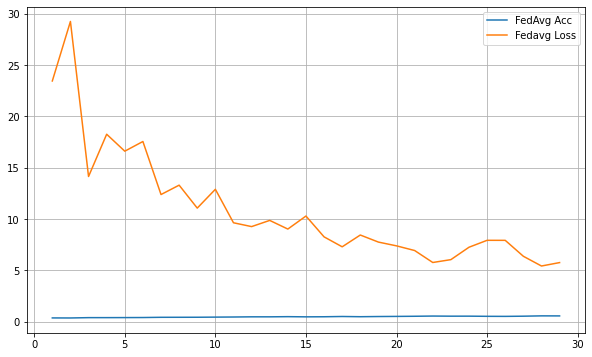

In [3]:
num = 6
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

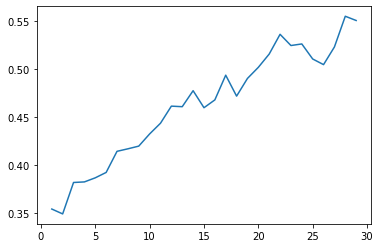

In [4]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [5]:
print(average_acc_list,'\n') 
print(average_loss_list)

[nan, 0.35437888763844966, 0.34930222295224667, 0.38201444430483716, 0.3826149989333418, 0.38687110969589816, 0.39247555509209625, 0.4144500000609292, 0.4170627787709236, 0.41986999921500684, 0.4325361108200418, 0.4436994456582599, 0.46148833367559644, 0.46090055476460184, 0.4775561103804244, 0.459836112583677, 0.4679727785289287, 0.493693333119154, 0.4719066661265161, 0.49031388900346234, 0.5018544445849127, 0.5156938867850436, 0.5362433339158693, 0.5245672227193912, 0.5262116644531488, 0.5105655543920066, 0.5046877784033617, 0.5230694439262152, 0.5550472229305241, 0.5506127774301502] 

[nan, 23.449368163612153, 29.249773998061816, 14.138959811131159, 18.258454171154238, 16.605803663863075, 17.54973800778389, 12.380434488587907, 13.294346947471302, 11.058130982187059, 12.89145782854822, 9.6287544839912, 9.255778875947, 9.859348707397778, 9.015820302234754, 10.284295324484507, 8.255407879749933, 7.286182545953327, 8.434999508327907, 7.745771654446919, 7.377979324592484, 6.9238012065490

# Labelwise Clustering

In [17]:
acc0 = [[], [0.6779999732971191, 0.564300000667572, 0.5845000147819519, 0.5383999943733215, 0.5805000066757202, 0.5580000281333923, 0.4975999891757965, 0.5217999815940857, 0.5320000052452087, 0.526199996471405, 0.5073999762535095, 0.5742999911308289, 0.5825999975204468, 0.46219998598098755, 0.44609999656677246, 0.45320001244544983, 0.45660001039505005, 0.46939998865127563, 0.48989999294281006, 0.5335999727249146, 0.4357999861240387, 0.40230000019073486, 0.41200000047683716, 0.5631999969482422, 0.45680001378059387, 0.4293000102043152, 0.527899980545044, 0.4043000042438507, 0.43540000915527344, 0.43529999256134033], [0.6366000175476074, 0.5604000091552734, 0.5694000124931335, 0.6136999726295471, 0.5712000131607056, 0.6223000288009644, 0.6316999793052673, 0.4334999918937683, 0.6104999780654907, 0.4803999960422516, 0.538100004196167, 0.5376999974250793, 0.5156000256538391, 0.5257999897003174, 0.6119999885559082, 0.4733999967575073, 0.5074999928474426, 0.6105999946594238, 0.5206000208854675, 0.5289000272750854, 0.5322999954223633, 0.5392000079154968, 0.5217000246047974, 0.5248000025749207, 0.5182999968528748, 0.5396000146865845, 0.5509999990463257, 0.4781000018119812, 0.5008000135421753, 0.5133000016212463], [0.5916000008583069, 0.6169000267982483, 0.6110000014305115, 0.7189000248908997, 0.6848999857902527, 0.6748999953269958, 0.7077000141143799, 0.5963000059127808, 0.7013000249862671, 0.6693999767303467, 0.6528000235557556, 0.6635000109672546, 0.6317999958992004, 0.6381999850273132, 0.6126000285148621, 0.6263999938964844, 0.6693000197410583, 0.6164000034332275, 0.629800021648407, 0.4740000069141388, 0.536899983882904, 0.5608999729156494, 0.5356000065803528, 0.5906000137329102, 0.5081999897956848, 0.5386000275611877, 0.5853000283241272, 0.5148000121116638, 0.5385000109672546, 0.5127000212669373], [0.6525999903678894, 0.6103000044822693, 0.6891999840736389, 0.5921000242233276, 0.6922000050544739, 0.6349999904632568, 0.7235999703407288, 0.6355000138282776, 0.7041000127792358, 0.6945000290870667, 0.6700000166893005, 0.5867999792098999, 0.5307000279426575, 0.5570999979972839, 0.621999979019165, 0.5810999870300293, 0.6262000203132629, 0.6254000067710876, 0.5128999948501587, 0.5509999990463257, 0.5033000111579895, 0.522599995136261, 0.5789999961853027, 0.5076000094413757, 0.6301000118255615, 0.5321999788284302, 0.5164999961853027, 0.527400016784668, 0.46140000224113464, 0.4790000021457672], [0.635699987411499, 0.6406000256538391, 0.6240000128746033, 0.611299991607666, 0.6708999872207642, 0.6906999945640564, 0.7146999835968018, 0.6273000240325928, 0.6165000200271606, 0.6721000075340271, 0.5974000096321106, 0.5835999846458435, 0.6155999898910522, 0.7182999849319458, 0.527899980545044, 0.5584999918937683, 0.5658000111579895, 0.6040999889373779, 0.5766000151634216, 0.4341999888420105, 0.5740000009536743, 0.5623999834060669, 0.6065999865531921, 0.666100025177002, 0.6852999925613403, 0.5293999910354614, 0.569100022315979, 0.6194999814033508, 0.5521000027656555, 0.7098000049591064], [0.6432999968528748, 0.6381000280380249, 0.6047000288963318, 0.5613999962806702, 0.6710000038146973, 0.6553000211715698, 0.6596999764442444, 0.6129999756813049, 0.6959999799728394, 0.5799999833106995, 0.567300021648407, 0.6061000227928162, 0.6205000281333923, 0.5048999786376953, 0.6060000061988831, 0.6820999979972839, 0.5760999917984009, 0.5546000003814697, 0.6675000190734863, 0.5336999893188477, 0.6728000044822693, 0.5795999765396118, 0.6438000202178955, 0.5730000138282776, 0.7282000184059143, 0.5152999758720398, 0.5777000188827515, 0.613099992275238, 0.6212000250816345, 0.6327999830245972], [0.6931999921798706, 0.6714000105857849, 0.6836000084877014, 0.6359999775886536, 0.7159000039100647, 0.5950999855995178, 0.6876999735832214, 0.6523000001907349, 0.6420999765396118, 0.6572999954223633, 0.7299000024795532, 0.6258999705314636, 0.7372000217437744, 0.736299991607666, 0.713699996471405, 0.649399995803833, 0.6765000224113464, 0.6729000210762024, 0.6179999709129333, 0.7269999980926514, 0.5738999843597412, 0.6359999775886536, 0.6381999850273132, 0.6603999733924866, 0.7113000154495239, 0.6625000238418579, 0.6888999938964844, 0.5728999972343445, 0.6579999923706055, 0.6154999732971191], [0.7269999980926514, 0.6707000136375427, 0.7324000000953674, 0.7088000178337097, 0.6912999749183655, 0.6428999900817871, 0.7001000046730042, 0.7440999746322632, 0.6933000087738037, 0.7226999998092651, 0.6985999941825867, 0.6784999966621399, 0.7120000123977661, 0.7091000080108643, 0.6747999787330627, 0.6072999835014343, 0.7002000212669373, 0.6930000185966492, 0.6245999932289124, 0.6183000206947327, 0.6525999903678894, 0.6080999970436096, 0.7135999798774719, 0.6389999985694885, 0.6586999893188477, 0.6417999863624573, 0.5655999779701233, 0.4966999888420105, 0.6191999912261963, 0.6049000024795532], [0.743399977684021, 0.7124999761581421, 0.6845999956130981, 0.701200008392334, 0.7677000164985657, 0.671999990940094, 0.7447999715805054, 0.6693000197410583, 0.6567000150680542, 0.7572000026702881, 0.6126000285148621, 0.6941999793052673, 0.580299973487854, 0.7257000207901001, 0.6662999987602234, 0.7350999712944031, 0.6931999921798706, 0.5950999855995178, 0.6409000158309937, 0.641700029373169, 0.630299985408783, 0.5522000193595886, 0.5898000001907349, 0.6492999792098999, 0.6197999715805054, 0.6718999743461609, 0.6531000137329102, 0.5753999948501587, 0.6015999913215637, 0.590499997138977], [0.6901999711990356, 0.7121999859809875, 0.7156000137329102, 0.7301999926567078, 0.6430000066757202, 0.7574999928474426, 0.7109000086784363, 0.73580002784729, 0.6265000104904175, 0.654699981212616, 0.7060999870300293, 0.6651999950408936, 0.7148000001907349, 0.6244000196456909, 0.703000009059906, 0.6680999994277954, 0.6442999839782715, 0.7368000149726868, 0.6851999759674072, 0.5782999992370605, 0.5414000153541565, 0.6669999957084656, 0.6679999828338623, 0.4968000054359436, 0.6269999742507935, 0.5527999997138977, 0.5974000096321106, 0.49380001425743103, 0.5430999994277954, 0.5755000114440918], [0.6705999970436096, 0.722599983215332, 0.7620999813079834, 0.7253999710083008, 0.7656000256538391, 0.7044000029563904, 0.7027000188827515, 0.6704999804496765, 0.7584999799728394, 0.6873000264167786, 0.7092000246047974, 0.6931999921798706, 0.7135999798774719, 0.621399998664856, 0.6334999799728394, 0.5806999802589417, 0.6568999886512756, 0.6809999942779541, 0.6869000196456909, 0.6693000197410583, 0.691100001335144, 0.5365999937057495, 0.6703000068664551, 0.6953999996185303, 0.6452000141143799, 0.6061999797821045, 0.5256999731063843, 0.6229000091552734, 0.6909999847412109, 0.6445000171661377], [0.7674999833106995, 0.7290999889373779, 0.6753000020980835, 0.7005000114440918, 0.6797000169754028, 0.739300012588501, 0.666700005531311, 0.7404000163078308, 0.7092000246047974, 0.7350000143051147, 0.7002999782562256, 0.6733999848365784, 0.6274999976158142, 0.7513999938964844, 0.6527000069618225, 0.6829000115394592, 0.6395999789237976, 0.6506999731063843, 0.5968000292778015, 0.6421999931335449, 0.6305999755859375, 0.6543999910354614, 0.569599986076355, 0.6715999841690063, 0.642799973487854, 0.6366000175476074, 0.6420000195503235, 0.7028999924659729, 0.614799976348877, 0.6187999844551086], [0.7559000253677368, 0.7243000268936157, 0.6915000081062317, 0.7497000098228455, 0.6931999921798706, 0.7427999973297119, 0.6959999799728394, 0.7120000123977661, 0.7096999883651733, 0.6933000087738037, 0.7196000218391418, 0.6439999938011169, 0.7645999789237976, 0.6970000267028809, 0.7113999724388123, 0.675000011920929, 0.767799973487854, 0.6873000264167786, 0.6273000240325928, 0.6237999796867371, 0.552299976348877, 0.694599986076355, 0.656499981880188, 0.6215000152587891, 0.6037999987602234, 0.5346999764442444, 0.6297000050544739, 0.6290000081062317, 0.5694000124931335, 0.5241000056266785], [0.7035999894142151, 0.6690000295639038, 0.704200029373169, 0.7746999859809875, 0.7594000101089478, 0.7148000001907349, 0.6809999942779541, 0.7261999845504761, 0.7297999858856201, 0.7524999976158142, 0.718500018119812, 0.7379999756813049, 0.7034000158309937, 0.6333000063896179, 0.6518999934196472, 0.7184000015258789, 0.6255000233650208, 0.6534000039100647, 0.6108999848365784, 0.6087999939918518, 0.7111999988555908, 0.722100019454956, 0.6890000104904175, 0.6905999779701233, 0.6513000130653381, 0.6288999915122986, 0.6449999809265137, 0.6748999953269958, 0.6891999840736389, 0.7330999970436096], [0.7700999975204468, 0.7360000014305115, 0.7084000110626221, 0.6865000128746033, 0.7019000053405762, 0.7078999876976013, 0.7444000244140625, 0.715399980545044, 0.7353000044822693, 0.7009000182151794, 0.7742000222206116, 0.7184000015258789, 0.657800018787384, 0.7185999751091003, 0.694100022315979, 0.6766999959945679, 0.7073000073432922, 0.7369999885559082, 0.6840000152587891, 0.7544999718666077, 0.7346000075340271, 0.6837999820709229, 0.6816999912261963, 0.743399977684021, 0.7452999949455261, 0.7250999808311462, 0.6805999875068665, 0.6180999875068665, 0.5884000062942505, 0.5814999938011169], [0.6958000063896179, 0.7875000238418579, 0.754800021648407, 0.7549999952316284, 0.7781999707221985, 0.7056000232696533, 0.744700014591217, 0.7131999731063843, 0.6920999884605408, 0.7757999897003174, 0.7861999869346619, 0.7046999931335449, 0.6879000067710876, 0.6801999807357788, 0.7111999988555908, 0.7483999729156494, 0.7534000277519226, 0.7656000256538391, 0.7199000120162964, 0.7472000122070312, 0.7124999761581421, 0.640500009059906, 0.6309000253677368, 0.675000011920929, 0.6952999830245972, 0.6883999705314636, 0.6459000110626221, 0.6876000165939331, 0.6621000170707703, 0.5814999938011169], [0.7177000045776367, 0.7502999901771545, 0.7324000000953674, 0.7407000064849854, 0.7667999863624573, 0.7926999926567078, 0.7307999730110168, 0.7652000188827515, 0.7050999999046326, 0.7080000042915344, 0.7427999973297119, 0.7516999840736389, 0.7073000073432922, 0.8027999997138977, 0.7197999954223633, 0.6761000156402588, 0.6707000136375427, 0.6226999759674072, 0.6406999826431274, 0.7437000274658203, 0.632099986076355, 0.7473000288009644, 0.6863999962806702, 0.6026999950408936, 0.5834000110626221, 0.6248000264167786, 0.5879999995231628, 0.6574000120162964, 0.6179999709129333, 0.6089000105857849], [0.7674000263214111, 0.8012999892234802, 0.6972000002861023, 0.8113999962806702, 0.7314000129699707, 0.7197999954223633, 0.7854999899864197, 0.7055000066757202, 0.7609000205993652, 0.7458999752998352, 0.6945000290870667, 0.7339000105857849, 0.6937000155448914, 0.7192999720573425, 0.6960999965667725, 0.708899974822998, 0.736299991607666, 0.7397000193595886, 0.7297000288963318, 0.7494000196456909, 0.6865000128746033, 0.7347999811172485, 0.7714999914169312, 0.7659000158309937, 0.7325999736785889, 0.6388999819755554, 0.6855000257492065, 0.6787999868392944, 0.7261000275611877, 0.7559000253677368], [0.7206000089645386, 0.7483999729156494, 0.7459999918937683, 0.7857999801635742, 0.7217000126838684, 0.7346000075340271, 0.7560999989509583, 0.7548999786376953, 0.6793000102043152, 0.7247999906539917, 0.7477999925613403, 0.7028999924659729, 0.670799970626831, 0.7784000039100647, 0.6736999750137329, 0.7426000237464905, 0.6887999773025513, 0.7976999878883362, 0.6675000190734863, 0.7159000039100647, 0.689300000667572, 0.5906999707221985, 0.6122999787330627, 0.6622999906539917, 0.6794000267982483, 0.7160000205039978, 0.6572999954223633, 0.6459000110626221, 0.6869999766349792, 0.6304000020027161], [0.7494000196456909, 0.7246000170707703, 0.7983999848365784, 0.7279000282287598, 0.7426999807357788, 0.7623000144958496, 0.7141000032424927, 0.7620999813079834, 0.786300003528595, 0.7400000095367432, 0.7541000247001648, 0.7594000101089478, 0.7591999769210815, 0.7677000164985657, 0.7315000295639038, 0.7002000212669373, 0.7070000171661377, 0.7627000212669373, 0.7476999759674072, 0.566100001335144, 0.7542999982833862, 0.6898000240325928, 0.6796000003814697, 0.6517999768257141, 0.6190999746322632, 0.7577999830245972, 0.5439000129699707, 0.7181000113487244, 0.6704999804496765, 0.6134999990463257], [0.7181000113487244, 0.7182999849319458, 0.7251999974250793, 0.6992999911308289, 0.7785000205039978, 0.7699999809265137, 0.7384999990463257, 0.5672000050544739, 0.767799973487854, 0.6740999817848206, 0.6827999949455261, 0.7067999839782715, 0.7260000109672546, 0.7527999877929688, 0.7642999887466431, 0.6621000170707703, 0.7263000011444092, 0.5906999707221985, 0.7019000053405762, 0.6632000207901001, 0.7825999855995178, 0.6646000146865845, 0.6437000036239624, 0.6743999719619751, 0.7002000212669373, 0.6744999885559082, 0.6272000074386597, 0.6689000129699707, 0.7836999893188477, 0.6083999872207642], [0.7372000217437744, 0.7592999935150146, 0.7434999942779541, 0.6908000111579895, 0.7542999982833862, 0.7563999891281128, 0.7853999733924866, 0.7342000007629395, 0.7192000150680542, 0.7163000106811523, 0.7770000100135803, 0.7080000042915344, 0.7580999732017517, 0.7820000052452087, 0.7555999755859375, 0.7623000144958496, 0.7129999995231628, 0.7103999853134155, 0.6901999711990356, 0.725600004196167, 0.6583999991416931, 0.7675999999046326, 0.6543999910354614, 0.7590000033378601, 0.6776000261306763, 0.7111999988555908, 0.7077999711036682, 0.6650999784469604, 0.7793999910354614, 0.7074999809265137], [0.7617999911308289, 0.7249000072479248, 0.767300009727478, 0.742900013923645, 0.7565000057220459, 0.70660001039505, 0.800599992275238, 0.7709000110626221, 0.7264999747276306, 0.7505000233650208, 0.7979999780654907, 0.7879999876022339, 0.7628999948501587, 0.7651000022888184, 0.6444000005722046, 0.7537000179290771, 0.6725999712944031, 0.8026000261306763, 0.6829000115394592, 0.6553000211715698, 0.7911999821662903, 0.7493000030517578, 0.7498999834060669, 0.7178999781608582, 0.751800000667572, 0.7224000096321106, 0.796500027179718, 0.7461000084877014, 0.7523000240325928, 0.7182999849319458], [0.7609000205993652, 0.7477999925613403, 0.7631000280380249, 0.7407000064849854, 0.7462999820709229, 0.7361999750137329, 0.8101000189781189, 0.7366999983787537, 0.7623999714851379, 0.7986999750137329, 0.8065000176429749, 0.7437000274658203, 0.8030999898910522, 0.7713000178337097, 0.7634999752044678, 0.6883999705314636, 0.7906000018119812, 0.7102000117301941, 0.6973000168800354, 0.7935000061988831, 0.7045999765396118, 0.6980000138282776, 0.6933000087738037, 0.682200014591217, 0.732699990272522, 0.7211999893188477, 0.6858000159263611, 0.7111999988555908, 0.7531999945640564, 0.6628999710083008], [0.814300000667572, 0.744700014591217, 0.7954999804496765, 0.7804999947547913, 0.7368000149726868, 0.7554000020027161, 0.743399977684021, 0.7734000086784363, 0.7597000002861023, 0.8029999732971191, 0.7185999751091003, 0.7373999953269958, 0.6832000017166138, 0.7355999946594238, 0.6561999917030334, 0.6431000232696533, 0.6413000226020813, 0.7429999709129333, 0.7592999935150146, 0.60589998960495, 0.7649999856948853, 0.7049999833106995, 0.6912000179290771, 0.7452999949455261, 0.7217000126838684, 0.6801999807357788, 0.5996999740600586, 0.7282000184059143, 0.661899983882904, 0.6664999723434448], [0.7278000116348267, 0.7526000142097473, 0.7523999810218811, 0.8194000124931335, 0.7687000036239624, 0.7512000203132629, 0.7276999950408936, 0.720300018787384, 0.7311000227928162, 0.7527999877929688, 0.7239000201225281, 0.6822999715805054, 0.722000002861023, 0.7694000005722046, 0.8019000291824341, 0.7207000255584717, 0.7638999819755554, 0.7588000297546387, 0.7684000134468079, 0.7329000234603882, 0.7746000289916992, 0.6966999769210815, 0.6868000030517578, 0.6841999888420105, 0.6578999757766724, 0.7597000002861023, 0.779699981212616, 0.6401000022888184, 0.791100025177002, 0.7822999954223633], [0.7991999983787537, 0.7451000213623047, 0.7538999915122986, 0.7275999784469604, 0.7423999905586243, 0.7752000093460083, 0.734000027179718, 0.8108999729156494, 0.6976000070571899, 0.7358999848365784, 0.8152999877929688, 0.7724999785423279, 0.7457000017166138, 0.7597000002861023, 0.7997999787330627, 0.7286999821662903, 0.7134000062942505, 0.763700008392334, 0.7239000201225281, 0.7152000069618225, 0.7717999815940857, 0.769599974155426, 0.6966999769210815, 0.7346000075340271, 0.7731000185012817, 0.7443000078201294, 0.6822999715805054, 0.6521999835968018, 0.7021999955177307, 0.5860999822616577], [0.7623000144958496, 0.7653999924659729, 0.746999979019165, 0.802299976348877, 0.7950999736785889, 0.7597000002861023, 0.7638000249862671, 0.7064999938011169, 0.8026000261306763, 0.757099986076355, 0.7350000143051147, 0.7091000080108643, 0.7728000283241272, 0.755299985408783, 0.6866000294685364, 0.7609000205993652, 0.7562000155448914, 0.8051000237464905, 0.7192000150680542, 0.7152000069618225, 0.7089999914169312, 0.7416999936103821, 0.732699990272522, 0.6506999731063843, 0.7300999760627747, 0.6747000217437744, 0.7415000200271606, 0.711899995803833, 0.6334999799728394, 0.6703000068664551], [0.7871000170707703, 0.7921000123023987, 0.7666000127792358, 0.7748000025749207, 0.7311000227928162, 0.7628999948501587, 0.7577999830245972, 0.8108999729156494, 0.8158000111579895, 0.6840000152587891, 0.6672000288963318, 0.7750999927520752, 0.7454000115394592, 0.6858999729156494, 0.7426999807357788, 0.7319999933242798, 0.6517000198364258, 0.7056999802589417, 0.6536999940872192, 0.7213000059127808, 0.7190999984741211, 0.6865000128746033, 0.6873999834060669, 0.7257000207901001, 0.7544999718666077, 0.727400004863739, 0.7128000259399414, 0.6642000079154968, 0.7368000149726868, 0.7315000295639038], [0.763700008392334, 0.7282999753952026, 0.8039000034332275, 0.7932000160217285, 0.7258999943733215, 0.7526000142097473, 0.7843000292778015, 0.7511000037193298, 0.742900013923645, 0.7508999705314636, 0.6629999876022339, 0.7093999981880188, 0.7269999980926514, 0.7138000130653381, 0.7454000115394592, 0.743399977684021, 0.7067000269889832, 0.7281000018119812, 0.7062000036239624, 0.6607000231742859, 0.7171000242233276, 0.7242000102996826, 0.5922999978065491, 0.6068000197410583, 0.7736999988555908, 0.6355999708175659, 0.6360999941825867, 0.6807000041007996, 0.6629999876022339, 0.7483000159263611]]
loss0 = [[], [2.085582971572876, 2.2764992713928223, 2.3834614753723145, 2.20194149017334, 2.0974221229553223, 2.134422540664673, 1.971610188484192, 2.7874972820281982, 3.679584264755249, 4.949600696563721, 3.6984801292419434, 2.6089413166046143, 2.924860715866089, 4.056894302368164, 3.6378281116485596, 2.796048402786255, 4.815720081329346, 5.141807556152344, 3.317328453063965, 5.131733417510986, 4.745514392852783, 6.539519786834717, 5.45644474029541, 7.551033020019531, 7.640514850616455, 8.18695068359375, 4.857736110687256, 9.776069641113281, 4.2298078536987305, 3.5606887340545654], [1.7770230770111084, 1.5816044807434082, 1.9064593315124512, 2.4542031288146973, 2.53460693359375, 2.4944090843200684, 1.8017277717590332, 3.5425610542297363, 2.8061981201171875, 3.2581112384796143, 3.562791109085083, 3.485332727432251, 2.6400978565216064, 4.334409236907959, 3.5071804523468018, 2.8400135040283203, 3.3085434436798096, 4.78731107711792, 2.887044906616211, 3.4962410926818848, 3.2518467903137207, 2.1089377403259277, 5.65755033493042, 5.199587821960449, 4.832274913787842, 3.1608803272247314, 2.8682916164398193, 3.5801479816436768, 5.123785018920898, 3.52054500579834], [2.159250020980835, 2.74145770072937, 2.71899151802063, 1.8861310482025146, 2.362381935119629, 2.16854190826416, 1.0917010307312012, 1.5714945793151855, 1.0484412908554077, 2.02703857421875, 1.090267539024353, 2.3075497150421143, 2.208209276199341, 2.320293664932251, 1.8239257335662842, 1.7434462308883667, 2.3101940155029297, 1.618845820426941, 2.7436695098876953, 2.5463969707489014, 4.049735069274902, 2.1898927688598633, 2.7502119541168213, 3.8352344036102295, 2.1684458255767822, 4.34962272644043, 2.645218849182129, 3.2086875438690186, 2.3858344554901123, 3.860642194747925], [2.049952983856201, 2.6231980323791504, 1.0726239681243896, 1.7346863746643066, 1.1636085510253906, 1.4959821701049805, 1.1268612146377563, 1.770568609237671, 1.7827099561691284, 1.9309914112091064, 1.2889822721481323, 2.550504684448242, 2.6843791007995605, 2.528458595275879, 2.033557653427124, 1.8469070196151733, 2.4602363109588623, 2.346100091934204, 5.104601860046387, 4.174623489379883, 5.597989559173584, 3.243809938430786, 4.528241157531738, 5.756164073944092, 4.115622043609619, 3.9384164810180664, 4.295685768127441, 3.33382511138916, 4.750516891479492, 4.295976161956787], [2.314570426940918, 2.0358972549438477, 2.08079195022583, 1.4015746116638184, 2.3579909801483154, 2.457397937774658, 1.1760066747665405, 1.6976609230041504, 1.2686240673065186, 1.5054415464401245, 1.348539113998413, 2.8792941570281982, 4.106029987335205, 3.184891700744629, 3.674248456954956, 2.635848045349121, 2.0625455379486084, 2.3387632369995117, 2.170839786529541, 5.233283996582031, 4.163885593414307, 3.652472972869873, 4.03032922744751, 2.3425750732421875, 3.6320176124572754, 5.848601341247559, 2.3237552642822266, 2.9925177097320557, 2.8661370277404785, 2.8093972206115723], [2.074497938156128, 1.1779123544692993, 1.634402871131897, 2.383519411087036, 1.4366463422775269, 1.6528884172439575, 2.0873498916625977, 2.8585293292999268, 1.0638121366500854, 3.102604389190674, 3.3131601810455322, 2.9287266731262207, 3.4098498821258545, 2.519162893295288, 3.118877649307251, 2.2940025329589844, 2.124105215072632, 1.6407982110977173, 3.4876344203948975, 4.232533931732178, 2.240978956222534, 4.836360454559326, 2.740636110305786, 2.60970139503479, 2.391953229904175, 2.744499921798706, 2.8550689220428467, 1.7954312562942505, 3.4929420948028564, 3.3020758628845215], [1.1410263776779175, 1.740720272064209, 1.2928658723831177, 1.6172641515731812, 2.085611343383789, 1.8980152606964111, 1.763031005859375, 1.916846513748169, 1.7940961122512817, 1.4824931621551514, 1.2814089059829712, 1.8807966709136963, 1.739425539970398, 0.9360743165016174, 1.405778169631958, 1.7579948902130127, 1.6327756643295288, 1.7807804346084595, 2.991194009780884, 1.8057808876037598, 2.620762586593628, 2.678943634033203, 1.5516427755355835, 3.581928014755249, 2.309593439102173, 4.145369529724121, 1.6433206796646118, 2.4273622035980225, 1.9242258071899414, 3.0885159969329834], [1.1403411626815796, 2.1462862491607666, 1.3664555549621582, 1.2714227437973022, 1.2836589813232422, 2.1449034214019775, 2.0747690200805664, 0.9972640872001648, 2.3367245197296143, 1.4914237260818481, 2.113982915878296, 3.466008186340332, 1.036697268486023, 4.291955471038818, 1.5621802806854248, 2.7119758129119873, 2.0714173316955566, 2.0631027221679688, 2.9576914310455322, 1.4460393190383911, 2.8281960487365723, 1.8892388343811035, 1.5291721820831299, 1.5903831720352173, 1.5023761987686157, 2.808426856994629, 2.4378645420074463, 3.04313588142395, 2.028904438018799, 2.8599133491516113], [1.3808872699737549, 1.2808798551559448, 1.6292824745178223, 1.6374443769454956, 1.067690372467041, 2.0131914615631104, 1.080883502960205, 1.748993158340454, 2.975628137588501, 1.5230002403259277, 2.6204159259796143, 1.6464154720306396, 3.3646175861358643, 2.2022547721862793, 1.3446269035339355, 1.2537957429885864, 2.250727653503418, 2.984272003173828, 3.242540121078491, 2.323383092880249, 3.006901502609253, 5.838322162628174, 4.060890197753906, 1.7914447784423828, 2.7964425086975098, 1.684767723083496, 3.7809507846832275, 3.8747718334198, 2.1766433715820312, 3.9993081092834473], [2.1895861625671387, 2.1105287075042725, 2.6621086597442627, 1.348507285118103, 1.6718392372131348, 1.99544095993042, 2.1779255867004395, 1.4329655170440674, 2.84796142578125, 2.395700693130493, 1.6168104410171509, 2.077596426010132, 2.1655242443084717, 2.2883739471435547, 2.4874801635742188, 1.46673583984375, 2.633188009262085, 1.830204725265503, 1.2303626537322998, 3.652047634124756, 4.469184875488281, 1.6739023923873901, 1.9857070446014404, 4.788586139678955, 4.497880935668945, 2.904539108276367, 2.7062346935272217, 7.893313407897949, 3.0871996879577637, 2.0237598419189453], [2.7347216606140137, 1.834334135055542, 1.0119022130966187, 1.2044975757598877, 1.6733003854751587, 1.382617712020874, 1.825157642364502, 2.3886659145355225, 1.3322582244873047, 1.4417625665664673, 1.2420870065689087, 2.522259473800659, 1.7424734830856323, 2.4853622913360596, 2.2199578285217285, 2.6384494304656982, 2.277520179748535, 1.9103851318359375, 1.337058424949646, 2.01770281791687, 1.82088041305542, 3.6777772903442383, 3.3459179401397705, 2.0196847915649414, 1.586548089981079, 2.716604709625244, 5.829920768737793, 4.090620994567871, 1.6031700372695923, 1.7891031503677368], [0.8923011422157288, 2.1760692596435547, 3.5328707695007324, 1.6075966358184814, 1.6999226808547974, 1.412171483039856, 1.9784159660339355, 1.0786586999893188, 2.1471750736236572, 1.2052819728851318, 2.2396576404571533, 1.872901201248169, 2.7049241065979004, 1.9524630308151245, 2.915569543838501, 1.615095853805542, 2.0671451091766357, 2.007225751876831, 3.1897478103637695, 2.182042121887207, 2.836958646774292, 2.4708847999572754, 2.827817440032959, 2.0929408073425293, 2.712568521499634, 3.267137289047241, 3.469290256500244, 2.6140477657318115, 3.2773191928863525, 3.4396913051605225], [1.0535187721252441, 2.2750513553619385, 2.1634349822998047, 1.1791067123413086, 1.5369824171066284, 1.0328161716461182, 3.2009239196777344, 1.5813685655593872, 2.8034510612487793, 1.2536814212799072, 1.5472184419631958, 2.4315292835235596, 1.0676765441894531, 2.047213077545166, 2.103327512741089, 2.3583297729492188, 0.9826846718788147, 1.6176949739456177, 2.5113325119018555, 2.7976508140563965, 5.0191755294799805, 2.2956652641296387, 1.7459535598754883, 1.7316503524780273, 2.3542518615722656, 2.3975675106048584, 2.0386664867401123, 2.4113242626190186, 4.019559860229492, 7.611798286437988], [1.2299683094024658, 2.1180694103240967, 1.5839440822601318, 1.4550918340682983, 1.021686315536499, 1.4959255456924438, 1.6621671915054321, 1.2513561248779297, 1.3385003805160522, 1.2569677829742432, 1.3333072662353516, 1.4038331508636475, 1.883156657218933, 3.868659019470215, 1.9308359622955322, 1.767703890800476, 2.4651308059692383, 2.7658116817474365, 2.662122964859009, 2.5030529499053955, 1.8467400074005127, 1.9650038480758667, 1.9426074028015137, 1.579652190208435, 3.4490535259246826, 2.101839303970337, 2.17287540435791, 1.7005119323730469, 1.6272038221359253, 1.7817541360855103], [0.9679542183876038, 1.1874045133590698, 1.7707775831222534, 1.8874046802520752, 1.6358647346496582, 1.468248724937439, 0.9467502236366272, 1.3625836372375488, 1.8255277872085571, 1.537446141242981, 1.0230556726455688, 1.0583497285842896, 1.7379822731018066, 1.7039189338684082, 1.4989721775054932, 1.7698638439178467, 2.4598493576049805, 1.677162528038025, 1.5331766605377197, 1.908687949180603, 0.9073541164398193, 1.6241825819015503, 1.3771259784698486, 2.234649419784546, 1.3515241146087646, 2.6055076122283936, 1.4635790586471558, 1.7012128829956055, 4.3871541023254395, 3.617417573928833], [1.7708407640457153, 0.8636329174041748, 2.4744396209716797, 1.239195466041565, 1.0994149446487427, 1.2557896375656128, 1.2536348104476929, 2.3569540977478027, 2.300905466079712, 1.1575932502746582, 0.7018889784812927, 1.8926414251327515, 3.797783136367798, 3.261547565460205, 1.7177443504333496, 1.0954203605651855, 1.177623987197876, 1.0070279836654663, 1.3179631233215332, 1.3971502780914307, 2.3184056282043457, 1.8641554117202759, 1.5942836999893188, 1.8813749551773071, 1.2926281690597534, 1.457375407218933, 1.6205261945724487, 2.3000130653381348, 1.7052751779556274, 5.093040943145752], [1.5057998895645142, 1.1756967306137085, 1.0887583494186401, 0.7986384034156799, 1.6386101245880127, 0.9974126815795898, 1.8596374988555908, 1.0501627922058105, 1.9194130897521973, 1.5896763801574707, 1.1241610050201416, 1.4026904106140137, 1.5452754497528076, 1.1081383228302002, 1.535978078842163, 1.697440266609192, 1.7239656448364258, 2.6869852542877197, 1.6896560192108154, 1.4852545261383057, 4.294342041015625, 1.2017673254013062, 2.257357358932495, 2.8236589431762695, 3.4660913944244385, 3.3074140548706055, 2.572709321975708, 1.722625732421875, 2.5578508377075195, 3.7373764514923096], [1.5605969429016113, 1.0864733457565308, 1.657074213027954, 1.1430344581604004, 1.1312581300735474, 1.7096935510635376, 1.0447171926498413, 2.1496474742889404, 1.1034464836120605, 1.034496545791626, 1.2133510112762451, 1.1736552715301514, 1.6769328117370605, 1.5930060148239136, 2.5976459980010986, 1.5007822513580322, 1.3709228038787842, 1.3270138502120972, 1.7341228723526, 1.1197959184646606, 1.8062564134597778, 1.4197356700897217, 1.5760105848312378, 1.3195444345474243, 1.6927582025527954, 1.2100476026535034, 2.2845396995544434, 2.9320333003997803, 1.4495952129364014, 1.2062612771987915], [1.9973163604736328, 1.1093701124191284, 1.714906096458435, 0.8197327852249146, 2.432485818862915, 1.8094767332077026, 1.1501529216766357, 0.8803695440292358, 1.4509316682815552, 1.6216570138931274, 1.1835119724273682, 2.8737902641296387, 2.772632122039795, 0.8189969658851624, 1.5709738731384277, 1.0590990781784058, 3.852473020553589, 0.8732524514198303, 2.4655747413635254, 1.8252480030059814, 1.6526308059692383, 4.744729518890381, 3.265331983566284, 1.9679855108261108, 2.856663703918457, 2.2351150512695312, 2.885903835296631, 1.8846147060394287, 1.8430875539779663, 3.06868052482605], [1.510870337486267, 1.6274151802062988, 0.8046683073043823, 1.0210082530975342, 1.4468085765838623, 1.873589038848877, 2.3195605278015137, 1.2080931663513184, 0.8501247763633728, 1.839593768119812, 1.4349395036697388, 1.0388413667678833, 1.6241563558578491, 0.8750852346420288, 1.5433683395385742, 1.5223844051361084, 1.761236310005188, 1.257698655128479, 1.6653196811676025, 4.679710388183594, 1.6577922105789185, 1.5279310941696167, 2.222827434539795, 2.0611228942871094, 2.2976508140563965, 1.2491731643676758, 3.0378150939941406, 1.34170663356781, 1.0177141427993774, 3.652554988861084], [2.257521390914917, 1.120605707168579, 2.1165685653686523, 2.0027239322662354, 0.8559243083000183, 0.8523616194725037, 1.024064540863037, 3.69370698928833, 0.9558373093605042, 2.558448314666748, 3.5186612606048584, 2.0749857425689697, 1.2491081953048706, 1.6127547025680542, 1.318902850151062, 2.1563174724578857, 1.4926828145980835, 4.379548072814941, 1.8783154487609863, 2.5277538299560547, 0.8141758441925049, 2.8720741271972656, 1.9606456756591797, 2.8160088062286377, 1.4797396659851074, 2.107962131500244, 2.8339152336120605, 2.0170254707336426, 1.6170202493667603, 2.805499792098999], [1.274323582649231, 1.818955898284912, 0.9202849864959717, 2.042245626449585, 1.3227369785308838, 0.9859874248504639, 1.150921106338501, 1.4598201513290405, 2.0201334953308105, 1.530898094177246, 1.0390794277191162, 1.2852158546447754, 1.2538782358169556, 1.0118664503097534, 1.6760015487670898, 1.1661967039108276, 1.6469818353652954, 3.0642642974853516, 2.1782824993133545, 2.110074281692505, 1.7305761575698853, 0.9928745031356812, 2.4836487770080566, 1.1138261556625366, 2.0884957313537598, 1.679914116859436, 2.2101364135742188, 2.1509103775024414, 1.4901992082595825, 2.3578672409057617], [1.6827625036239624, 2.1175081729888916, 1.2327945232391357, 2.4923970699310303, 1.5675503015518188, 1.2816542387008667, 1.25798761844635, 1.1142641305923462, 1.170217514038086, 1.4731061458587646, 0.7929788827896118, 1.0498309135437012, 1.5388927459716797, 0.915358304977417, 2.774750232696533, 0.9765143394470215, 2.392282009124756, 0.8628186583518982, 1.9277567863464355, 2.422722816467285, 0.8681050539016724, 1.4735498428344727, 1.318086862564087, 1.8293243646621704, 1.472672939300537, 1.7147507667541504, 0.836976945400238, 1.1985065937042236, 1.462548851966858, 1.6650216579437256], [1.4305630922317505, 2.137200355529785, 1.245945930480957, 1.3840895891189575, 1.3081518411636353, 2.312640905380249, 0.7750486135482788, 0.9345521330833435, 2.1551380157470703, 0.8420635461807251, 0.8739063739776611, 1.3698052167892456, 0.9101017713546753, 1.2957215309143066, 1.5145268440246582, 1.941752314567566, 1.1814044713974, 2.5498850345611572, 1.9460192918777466, 0.8509554862976074, 1.8883610963821411, 1.1634713411331177, 1.567625641822815, 1.4040746688842773, 1.5238021612167358, 1.4429078102111816, 1.806687831878662, 1.3945757150650024, 1.4108370542526245, 2.0205705165863037], [0.7826076149940491, 2.788072109222412, 0.8927670121192932, 0.9410409927368164, 2.128242254257202, 1.5836491584777832, 1.394383192062378, 1.0980263948440552, 1.4806445837020874, 0.8638834953308105, 1.3930065631866455, 1.1156880855560303, 1.986001968383789, 2.081486225128174, 2.3630969524383545, 2.6019210815429688, 2.552915334701538, 1.1201704740524292, 1.1337177753448486, 4.344191551208496, 1.2192120552062988, 2.319096326828003, 2.4560351371765137, 1.0247275829315186, 2.3571009635925293, 2.3619906902313232, 2.643573760986328, 1.0449951887130737, 2.303100109100342, 2.1166794300079346], [1.492101788520813, 1.1076446771621704, 1.2369722127914429, 0.8494927883148193, 1.1948175430297852, 1.5158802270889282, 1.5299657583236694, 1.4301344156265259, 1.0996983051300049, 1.1061040163040161, 1.9761290550231934, 2.8674352169036865, 2.639047861099243, 1.1370350122451782, 1.1844074726104736, 1.5595446825027466, 1.228058934211731, 1.2163670063018799, 1.2642414569854736, 5.056903839111328, 1.2880444526672363, 1.5606436729431152, 3.017986297607422, 1.7707066535949707, 2.784519672393799, 1.276594877243042, 1.5751101970672607, 4.520912170410156, 1.2896525859832764, 1.1062861680984497], [0.7524707913398743, 1.9536306858062744, 1.4015471935272217, 1.5962498188018799, 2.1725006103515625, 1.1714112758636475, 1.070668339729309, 0.8646315336227417, 2.5177886486053467, 1.2917871475219727, 0.9020541906356812, 1.342848300933838, 1.5226194858551025, 1.506176471710205, 0.8234214782714844, 1.5520216226577759, 1.8080451488494873, 1.5220662355422974, 1.564453125, 2.793137788772583, 1.316834568977356, 1.769574761390686, 2.3222780227661133, 1.3714903593063354, 0.9872623085975647, 1.8291049003601074, 2.278029203414917, 3.6391499042510986, 1.6031081676483154, 3.1572799682617188], [1.7180812358856201, 1.8743196725845337, 1.3154864311218262, 0.9507812261581421, 0.9726446270942688, 1.5143883228302002, 1.5087934732437134, 2.219571828842163, 0.9272237420082092, 2.0742599964141846, 2.623466968536377, 2.089848518371582, 1.1586713790893555, 2.906700849533081, 2.6201493740081787, 1.11710786819458, 1.2134548425674438, 1.0746937990188599, 1.3889251947402954, 2.062910795211792, 1.645459532737732, 1.693599820137024, 1.774965763092041, 2.2722206115722656, 1.6900404691696167, 3.827958106994629, 1.2458616495132446, 1.9405860900878906, 3.4897284507751465, 1.6020100116729736], [0.8691221475601196, 1.2041059732437134, 0.9328654408454895, 1.1991357803344727, 1.591244101524353, 1.2235796451568604, 1.1077842712402344, 0.7174139618873596, 0.7354415655136108, 1.9691964387893677, 2.1786484718322754, 1.1716713905334473, 1.0072221755981445, 2.504185438156128, 1.4368115663528442, 1.2855123281478882, 2.553257465362549, 1.4271323680877686, 3.341261625289917, 2.9960741996765137, 2.7895431518554688, 1.5898094177246094, 1.8925511837005615, 3.205550193786621, 1.0021542310714722, 2.840548038482666, 1.5453176498413086, 2.63834285736084, 1.4528021812438965, 1.6175642013549805], [0.8725661039352417, 2.4168479442596436, 1.0677146911621094, 0.9208623766899109, 1.927762508392334, 1.6541242599487305, 0.9510189294815063, 1.2922327518463135, 1.2714760303497314, 1.4653851985931396, 3.7194604873657227, 2.5590081214904785, 1.8674765825271606, 1.4362233877182007, 1.865534782409668, 2.4912564754486084, 1.4758957624435425, 1.3285595178604126, 2.195981740951538, 2.733576774597168, 1.7215404510498047, 1.1814688444137573, 2.6554436683654785, 2.6823976039886475, 1.2798773050308228, 3.2528066635131836, 2.4259748458862305, 6.5944366455078125, 2.5583574771881104, 1.5725963115692139]] 

acc1 = [[], [0.6310999989509583, 0.5149999856948853, 0.5503000020980835, 0.5855000019073486, 0.6065999865531921, 0.5896000266075134, 0.5824999809265137, 0.5228999853134155, 0.6039999723434448, 0.5527999997138977, 0.6182000041007996, 0.5425999760627747, 0.4918999969959259, 0.49939998984336853, 0.4738999903202057, 0.40619999170303345, 0.47450000047683716, 0.5393999814987183, 0.5067999958992004, 0.531499981880188, 0.49880000948905945, 0.6139000058174133, 0.5611000061035156, 0.5185999870300293, 0.5810999870300293, 0.5052000284194946, 0.4968999922275543, 0.44519999623298645, 0.555899977684021, 0.4943999946117401], [0.6134999990463257, 0.6212000250816345, 0.4819999933242798, 0.5525000095367432, 0.6937000155448914, 0.6136999726295471, 0.5378000140190125, 0.593999981880188, 0.6366000175476074, 0.6171000003814697, 0.6148999929428101, 0.603600025177002, 0.5145999789237976, 0.5753999948501587, 0.5544999837875366, 0.45179998874664307, 0.5005999803543091, 0.6690999865531921, 0.5825999975204468, 0.578499972820282, 0.6067000031471252, 0.5929999947547913, 0.6039000153541565, 0.5446000099182129, 0.5932000279426575, 0.5170999765396118, 0.5235000252723694, 0.48399999737739563, 0.4043000042438507, 0.3702000081539154], [0.6137999892234802, 0.6218000054359436, 0.5694000124931335, 0.6043999791145325, 0.6377999782562256, 0.611299991607666, 0.6560999751091003, 0.5662000179290771, 0.5835999846458435, 0.6021999716758728, 0.6337000131607056, 0.6298999786376953, 0.5472000241279602, 0.5583999752998352, 0.6043000221252441, 0.5855000019073486, 0.5534999966621399, 0.5105999708175659, 0.586899995803833, 0.5270000100135803, 0.6007999777793884, 0.4699999988079071, 0.5139999985694885, 0.5097000002861023, 0.40209999680519104, 0.3846000134944916, 0.38679999113082886, 0.5127000212669373, 0.40560001134872437, 0.49709999561309814], [0.5968999862670898, 0.6334999799728394, 0.6610999703407288, 0.6723999977111816, 0.6855000257492065, 0.6723999977111816, 0.6557999849319458, 0.6503000259399414, 0.6514000296592712, 0.6983000040054321, 0.6315000057220459, 0.6348000168800354, 0.5913000106811523, 0.6241999864578247, 0.5824999809265137, 0.6141999959945679, 0.6704000234603882, 0.5570999979972839, 0.6304000020027161, 0.5769000053405762, 0.6258999705314636, 0.6097000241279602, 0.6243000030517578, 0.5629000067710876, 0.5435000061988831, 0.44440001249313354, 0.5213000178337097, 0.5658000111579895, 0.5052000284194946, 0.5253000259399414], [0.671999990940094, 0.6385999917984009, 0.5407999753952026, 0.6204000115394592, 0.7014999985694885, 0.682699978351593, 0.7042999863624573, 0.6541000008583069, 0.7229999899864197, 0.5896000266075134, 0.6894000172615051, 0.6333000063896179, 0.6241999864578247, 0.6571999788284302, 0.6901000142097473, 0.6061999797821045, 0.6495000123977661, 0.5794000029563904, 0.616599977016449, 0.6517999768257141, 0.6514999866485596, 0.42649999260902405, 0.5400000214576721, 0.5164999961853027, 0.5360000133514404, 0.477400004863739, 0.6036999821662903, 0.6565999984741211, 0.6509000062942505, 0.5447999835014343], [0.6784999966621399, 0.6237999796867371, 0.6639999747276306, 0.7132999897003174, 0.7279999852180481, 0.7021999955177307, 0.7253999710083008, 0.690500020980835, 0.5719000101089478, 0.656499981880188, 0.6438000202178955, 0.6521000266075134, 0.5788999795913696, 0.6675999760627747, 0.6136999726295471, 0.5396000146865845, 0.6733999848365784, 0.6191999912261963, 0.5863000154495239, 0.6341999769210815, 0.6121000051498413, 0.5598999857902527, 0.5925999879837036, 0.5332000255584717, 0.579200029373169, 0.5508999824523926, 0.5493000149726868, 0.6628999710083008, 0.5741000175476074, 0.5277000069618225], [0.6341000199317932, 0.6392999887466431, 0.6924999952316284, 0.6920999884605408, 0.6952000260353088, 0.6542999744415283, 0.6409000158309937, 0.663100004196167, 0.7017999887466431, 0.6904000043869019, 0.7020999789237976, 0.6998999714851379, 0.650600016117096, 0.638700008392334, 0.6694999933242798, 0.7495999932289124, 0.5907999873161316, 0.690500020980835, 0.5651000142097473, 0.6908000111579895, 0.6976000070571899, 0.6948999762535095, 0.6881999969482422, 0.637499988079071, 0.5394999980926514, 0.6689000129699707, 0.4498000144958496, 0.572700023651123, 0.5806000232696533, 0.6219000220298767], [0.6437000036239624, 0.7401999831199646, 0.6147000193595886, 0.6786999702453613, 0.7523999810218811, 0.7207000255584717, 0.678600013256073, 0.664900004863739, 0.6836000084877014, 0.6825000047683716, 0.6912000179290771, 0.6686000227928162, 0.6820999979972839, 0.6115000247955322, 0.6700999736785889, 0.6585000157356262, 0.7211999893188477, 0.7064999938011169, 0.6341999769210815, 0.609000027179718, 0.6814000010490417, 0.5307999849319458, 0.6481000185012817, 0.6531000137329102, 0.5478000044822693, 0.5831000208854675, 0.6172999739646912, 0.5494999885559082, 0.6610000133514404, 0.6406999826431274], [0.6588000059127808, 0.6780999898910522, 0.7135000228881836, 0.7002000212669373, 0.6466000080108643, 0.6661999821662903, 0.7540000081062317, 0.6854000091552734, 0.6407999992370605, 0.6730999946594238, 0.6966000199317932, 0.6575000286102295, 0.6378999948501587, 0.6317999958992004, 0.6291000247001648, 0.5974000096321106, 0.7594000101089478, 0.6412000060081482, 0.659500002861023, 0.6449000239372253, 0.49399998784065247, 0.6488999724388123, 0.6498000025749207, 0.6069999933242798, 0.6316999793052673, 0.6452999711036682, 0.683899998664856, 0.6721000075340271, 0.6121000051498413, 0.6337000131607056], [0.7580000162124634, 0.7310000061988831, 0.7305999994277954, 0.7103000283241272, 0.7267000079154968, 0.7121000289916992, 0.7206000089645386, 0.7426000237464905, 0.7400000095367432, 0.689300000667572, 0.6384000182151794, 0.6010000109672546, 0.6812999844551086, 0.734499990940094, 0.7594000101089478, 0.6920999884605408, 0.6306999921798706, 0.6984000205993652, 0.6182000041007996, 0.6504999995231628, 0.6717000007629395, 0.6601999998092651, 0.6872000098228455, 0.5710999965667725, 0.701200008392334, 0.6550999879837036, 0.5928000211715698, 0.6772000193595886, 0.6758999824523926, 0.6575000286102295], [0.7663000226020813, 0.7565000057220459, 0.722100019454956, 0.7781000137329102, 0.7397000193595886, 0.6855000257492065, 0.7498000264167786, 0.7106999754905701, 0.6618000268936157, 0.7401999831199646, 0.6266999840736389, 0.678600013256073, 0.7142999768257141, 0.6866000294685364, 0.7620999813079834, 0.6060000061988831, 0.6439999938011169, 0.7271000146865845, 0.7236999869346619, 0.5878999829292297, 0.7092000246047974, 0.6215000152587891, 0.7513999938964844, 0.722599983215332, 0.5995000004768372, 0.6905999779701233, 0.6773999929428101, 0.5238999724388123, 0.6208999752998352, 0.5580999851226807], [0.7275999784469604, 0.6883999705314636, 0.7666000127792358, 0.7534000277519226, 0.6273000240325928, 0.7716000080108643, 0.6692000031471252, 0.7426999807357788, 0.7753000259399414, 0.72079998254776, 0.7092000246047974, 0.739300012588501, 0.7087000012397766, 0.7263000011444092, 0.671999990940094, 0.7117999792098999, 0.6625000238418579, 0.6898999810218811, 0.7781999707221985, 0.6337000131607056, 0.6722999811172485, 0.6478000283241272, 0.703499972820282, 0.7146000266075134, 0.7188000082969666, 0.6498000025749207, 0.6204000115394592, 0.6212999820709229, 0.6065999865531921, 0.6704000234603882], [0.6859999895095825, 0.7215999960899353, 0.7634000182151794, 0.7574999928474426, 0.7843999862670898, 0.7935000061988831, 0.728600025177002, 0.7390000224113464, 0.6873999834060669, 0.7175999879837036, 0.6834999918937683, 0.7569000124931335, 0.7146000266075134, 0.6539000272750854, 0.6087999939918518, 0.6297000050544739, 0.6736000180244446, 0.6567000150680542, 0.701200008392334, 0.6471999883651733, 0.6345000267028809, 0.7447999715805054, 0.7674999833106995, 0.616599977016449, 0.7269999980926514, 0.5437999963760376, 0.6518999934196472, 0.5677000284194946, 0.635200023651123, 0.6694999933242798], [0.6816999912261963, 0.7660999894142151, 0.6902999877929688, 0.7788000106811523, 0.751800000667572, 0.7232000231742859, 0.7299000024795532, 0.7342000007629395, 0.6574000120162964, 0.7354000210762024, 0.7763000130653381, 0.7067999839782715, 0.6888999938964844, 0.7315999865531921, 0.7892000079154968, 0.7572000026702881, 0.7171000242233276, 0.6643000245094299, 0.7699999809265137, 0.7228999733924866, 0.7263000011444092, 0.6775000095367432, 0.6773999929428101, 0.5910000205039978, 0.6481000185012817, 0.7123000025749207, 0.6431000232696533, 0.5979999899864197, 0.7038999795913696, 0.66839998960495], [0.7089999914169312, 0.736299991607666, 0.7746000289916992, 0.7310000061988831, 0.7717000246047974, 0.7541000247001648, 0.7601000070571899, 0.7166000008583069, 0.7864999771118164, 0.6958000063896179, 0.7214000225067139, 0.6858000159263611, 0.7124999761581421, 0.6743999719619751, 0.7181000113487244, 0.6789000034332275, 0.7102000117301941, 0.6972000002861023, 0.7152000069618225, 0.682200014591217, 0.651199996471405, 0.6608999967575073, 0.6873999834060669, 0.6972000002861023, 0.6783000230789185, 0.6538000106811523, 0.6949999928474426, 0.5922999978065491, 0.7386999726295471, 0.6320000290870667], [0.6868000030517578, 0.7110999822616577, 0.7397000193595886, 0.7200000286102295, 0.7570000290870667, 0.7439000010490417, 0.7027000188827515, 0.7775999903678894, 0.7272999882698059, 0.7372999787330627, 0.7587000131607056, 0.714900016784668, 0.6563000082969666, 0.6674000024795532, 0.730400025844574, 0.6539000272750854, 0.737500011920929, 0.7379000186920166, 0.6815999746322632, 0.5684000253677368, 0.6906999945640564, 0.6852999925613403, 0.7163000106811523, 0.6309999823570251, 0.70169997215271, 0.6962000131607056, 0.5986999869346619, 0.5522000193595886, 0.6808000206947327, 0.7717000246047974], [0.777999997138977, 0.7523000240325928, 0.7958999872207642, 0.7483000159263611, 0.767300009727478, 0.7723000049591064, 0.7401000261306763, 0.7853000164031982, 0.762499988079071, 0.7577000260353088, 0.7638999819755554, 0.699999988079071, 0.7251999974250793, 0.7573999762535095, 0.7524999976158142, 0.71670001745224, 0.6783999800682068, 0.7232000231742859, 0.7473999857902527, 0.7720000147819519, 0.6478999853134155, 0.6904000043869019, 0.6560999751091003, 0.685699999332428, 0.5985999703407288, 0.7121999859809875, 0.7042999863624573, 0.7282999753952026, 0.6225000023841858, 0.6934000253677368], [0.7937999963760376, 0.7387999892234802, 0.745199978351593, 0.698199987411499, 0.7218999862670898, 0.703000009059906, 0.7271999716758728, 0.7587000131607056, 0.7498000264167786, 0.7663999795913696, 0.7300000190734863, 0.7512999773025513, 0.71670001745224, 0.6651999950408936, 0.7476000189781189, 0.656000018119812, 0.7163000106811523, 0.7057999968528748, 0.7160000205039978, 0.6935999989509583, 0.6636999845504761, 0.6478999853134155, 0.6169000267982483, 0.6852999925613403, 0.6132000088691711, 0.6294000148773193, 0.6917999982833862, 0.5756999850273132, 0.7423999905586243, 0.65420001745224], [0.7300000190734863, 0.7318999767303467, 0.7864999771118164, 0.8003000020980835, 0.6730999946594238, 0.7271000146865845, 0.8217999935150146, 0.6205000281333923, 0.7843000292778015, 0.7670999765396118, 0.7537999749183655, 0.7795000076293945, 0.6895999908447266, 0.7498000264167786, 0.689300000667572, 0.6243000030517578, 0.7508000135421753, 0.6807000041007996, 0.7444000244140625, 0.6158000230789185, 0.6712999939918518, 0.6651999950408936, 0.6427000164985657, 0.6560999751091003, 0.6869000196456909, 0.683899998664856, 0.6617000102996826, 0.548799991607666, 0.5841000080108643, 0.6419000029563904], [0.7968999743461609, 0.7415000200271606, 0.7702000141143799, 0.7357000112533569, 0.7639999985694885, 0.7401999831199646, 0.7538999915122986, 0.7724999785423279, 0.7918999791145325, 0.7659000158309937, 0.7480999827384949, 0.7423999905586243, 0.7294999957084656, 0.7533000111579895, 0.7544000148773193, 0.6389999985694885, 0.7009000182151794, 0.6952999830245972, 0.6471999883651733, 0.7730000019073486, 0.7680000066757202, 0.6826000213623047, 0.670199990272522, 0.6801999807357788, 0.7432000041007996, 0.5939000248908997, 0.6187999844551086, 0.7458999752998352, 0.6794000267982483, 0.7142000198364258], [0.7833999991416931, 0.7746000289916992, 0.7839000225067139, 0.7728000283241272, 0.7559999823570251, 0.7872999906539917, 0.8061000108718872, 0.7681999802589417, 0.7856000065803528, 0.743399977684021, 0.8051999807357788, 0.7748000025749207, 0.7994999885559082, 0.7601000070571899, 0.8009999990463257, 0.7457000017166138, 0.7317000031471252, 0.7315000295639038, 0.704800009727478, 0.6862000226974487, 0.717199981212616, 0.7621999979019165, 0.6801000237464905, 0.6485000252723694, 0.6765000224113464, 0.7225000262260437, 0.7644000053405762, 0.7480999827384949, 0.6417999863624573, 0.652999997138977], [0.6917999982833862, 0.7436000108718872, 0.7983999848365784, 0.7222999930381775, 0.8012999892234802, 0.7407000064849854, 0.7559999823570251, 0.7232999801635742, 0.7390999794006348, 0.7886000275611877, 0.7529000043869019, 0.7145000100135803, 0.7713000178337097, 0.6800000071525574, 0.652899980545044, 0.7124999761581421, 0.6643000245094299, 0.7378000020980835, 0.7610999941825867, 0.5843999981880188, 0.6531999707221985, 0.6545000076293945, 0.7563999891281128, 0.7261999845504761, 0.7771000266075134, 0.6510000228881836, 0.7135000228881836, 0.6391000151634216, 0.6783000230789185, 0.6507999897003174], [0.7699999809265137, 0.7452999949455261, 0.7447999715805054, 0.7545999884605408, 0.7652999758720398, 0.7164000272750854, 0.7994999885559082, 0.8169999718666077, 0.7565000057220459, 0.7538999915122986, 0.7566999793052673, 0.715399980545044, 0.7735000252723694, 0.7616000175476074, 0.7213000059127808, 0.6955999732017517, 0.7502999901771545, 0.755299985408783, 0.705299973487854, 0.7300999760627747, 0.6862999796867371, 0.6820999979972839, 0.6353999972343445, 0.6815999746322632, 0.628600001335144, 0.733299970626831, 0.7527999877929688, 0.7189000248908997, 0.7117999792098999, 0.632099986076355], [0.7542999982833862, 0.7616999745368958, 0.7997000217437744, 0.6389999985694885, 0.7480000257492065, 0.7504000067710876, 0.7892000079154968, 0.7803999781608582, 0.7437000274658203, 0.7954000234603882, 0.7954000234603882, 0.7850000262260437, 0.7340999841690063, 0.760699987411499, 0.7303000092506409, 0.739300012588501, 0.7634999752044678, 0.7524999976158142, 0.7207000255584717, 0.6653000116348267, 0.7451000213623047, 0.7269999980926514, 0.6852999925613403, 0.7269999980926514, 0.7319999933242798, 0.680400013923645, 0.7178999781608582, 0.6018999814987183, 0.758400022983551, 0.6496000289916992], [0.7157999873161316, 0.7487999796867371, 0.7585999965667725, 0.7638000249862671, 0.779699981212616, 0.748199999332428, 0.7562999725341797, 0.761900007724762, 0.6531000137329102, 0.8253999948501587, 0.7544999718666077, 0.7577000260353088, 0.7742999792098999, 0.7773000001907349, 0.8104000091552734, 0.7098000049591064, 0.6898999810218811, 0.7228000164031982, 0.7304999828338623, 0.7641000151634216, 0.7361999750137329, 0.7710000276565552, 0.7110999822616577, 0.6345999836921692, 0.8019999861717224, 0.7502999901771545, 0.66839998960495, 0.7279000282287598, 0.7242000102996826, 0.7408000230789185], [0.7843999862670898, 0.7835999727249146, 0.784600019454956, 0.7562000155448914, 0.7577000260353088, 0.7459999918937683, 0.7638999819755554, 0.6431999802589417, 0.7612000107765198, 0.7555000185966492, 0.770799994468689, 0.7283999919891357, 0.6952000260353088, 0.6137999892234802, 0.8026000261306763, 0.7615000009536743, 0.7131999731063843, 0.7646999955177307, 0.7444000244140625, 0.7903000116348267, 0.7408999800682068, 0.6643000245094299, 0.7059999704360962, 0.6134999990463257, 0.7404000163078308, 0.6880999803543091, 0.7534000277519226, 0.6431000232696533, 0.7530999779701233, 0.7465999722480774], [0.7275000214576721, 0.7716000080108643, 0.7296000123023987, 0.7825999855995178, 0.7405999898910522, 0.7750999927520752, 0.8019999861717224, 0.7831000089645386, 0.771399974822998, 0.7366999983787537, 0.7439000010490417, 0.8007000088691711, 0.7925999760627747, 0.7867000102996826, 0.7106999754905701, 0.7860000133514404, 0.7080000042915344, 0.7192999720573425, 0.7267000079154968, 0.7720000147819519, 0.6449000239372253, 0.6053000092506409, 0.692799985408783, 0.7289999723434448, 0.7802000045776367, 0.7598000168800354, 0.645799994468689, 0.7077000141143799, 0.6173999905586243, 0.5971999764442444], [0.7497000098228455, 0.7695000171661377, 0.7914000153541565, 0.8037999868392944, 0.7093999981880188, 0.7493000030517578, 0.8098000288009644, 0.8133999705314636, 0.7939000129699707, 0.8032000064849854, 0.8119999766349792, 0.7402999997138977, 0.7570000290870667, 0.7912999987602234, 0.607200026512146, 0.781000018119812, 0.6969000101089478, 0.8219000101089478, 0.8069999814033508, 0.7365000247955322, 0.6952000260353088, 0.6265000104904175, 0.6917999982833862, 0.7702000141143799, 0.7684000134468079, 0.6310999989509583, 0.6682999730110168, 0.6700999736785889, 0.7002000212669373, 0.7742000222206116], [0.7612000107765198, 0.727400004863739, 0.7975000143051147, 0.7865999937057495, 0.7904999852180481, 0.7196999788284302, 0.7757999897003174, 0.7896999716758728, 0.761900007724762, 0.7135999798774719, 0.7915999889373779, 0.7699000239372253, 0.769599974155426, 0.7868000268936157, 0.7861999869346619, 0.7006999850273132, 0.7799999713897705, 0.7623999714851379, 0.7853000164031982, 0.7781000137329102, 0.7551000118255615, 0.8097000122070312, 0.7943999767303467, 0.7322999835014343, 0.7124000191688538, 0.6639999747276306, 0.7585999965667725, 0.6553999781608582, 0.6503000259399414, 0.7534999847412109], [0.7437999844551086, 0.7932000160217285, 0.7293000221252441, 0.708899974822998, 0.7182999849319458, 0.7117999792098999, 0.7235999703407288, 0.7504000067710876, 0.704200029373169, 0.7199000120162964, 0.7228999733924866, 0.7444999814033508, 0.7350999712944031, 0.7498999834060669, 0.8098999857902527, 0.751800000667572, 0.7527999877929688, 0.7635999917984009, 0.7358999848365784, 0.772599995136261, 0.7656999826431274, 0.678600013256073, 0.7077000141143799, 0.7328000068664551, 0.6876000165939331, 0.7912999987602234, 0.7096999883651733, 0.7124999761581421, 0.6546000242233276, 0.7372000217437744]]
loss1 = [[], [2.480595588684082, 3.115629196166992, 2.7198309898376465, 2.207836627960205, 2.4815330505371094, 2.6962838172912598, 3.1778995990753174, 2.1862945556640625, 2.1850457191467285, 2.539656400680542, 1.8069368600845337, 5.347643852233887, 3.497664451599121, 4.595916748046875, 6.351790904998779, 4.7340521812438965, 3.9380526542663574, 1.8669586181640625, 2.6789629459381104, 4.27000093460083, 2.9107985496520996, 5.214457035064697, 2.882035255432129, 5.148708820343018, 3.9805588722229004, 4.3914079666137695, 6.2214274406433105, 4.114058494567871, 5.699498176574707, 5.071108818054199], [2.066370725631714, 2.2500221729278564, 2.1416497230529785, 2.128866195678711, 1.7645429372787476, 2.001437187194824, 3.0115630626678467, 1.9278184175491333, 2.5677733421325684, 3.5872929096221924, 1.795508623123169, 1.7091164588928223, 3.3847272396087646, 2.2846157550811768, 3.1918866634368896, 3.677480459213257, 5.786477565765381, 2.8973820209503174, 2.489877700805664, 3.77891206741333, 2.7493603229522705, 3.4267406463623047, 1.770203709602356, 3.0171992778778076, 2.4576611518859863, 2.542693853378296, 2.128803253173828, 4.696479797363281, 2.3427937030792236, 4.241727352142334], [1.7032629251480103, 2.840257167816162, 1.9514943361282349, 1.907453179359436, 2.1252386569976807, 1.5952337980270386, 2.5011556148529053, 3.058262586593628, 3.425450325012207, 1.5282351970672607, 2.679699659347534, 2.4934568405151367, 3.544373035430908, 2.877284526824951, 3.378171443939209, 3.8309481143951416, 4.226621627807617, 2.4109139442443848, 4.740980625152588, 2.1209325790405273, 2.790729522705078, 3.777456521987915, 4.469723224639893, 2.791325569152832, 8.098179817199707, 5.948387622833252, 5.857643127441406, 4.7283430099487305, 3.876277446746826, 5.423312664031982], [3.7814242839813232, 1.728835105895996, 1.7392501831054688, 3.4516656398773193, 1.8029539585113525, 2.354281187057495, 2.3908166885375977, 2.6484622955322266, 1.641809344291687, 2.2285468578338623, 1.6107569932937622, 3.084933042526245, 2.1434202194213867, 3.168039083480835, 4.780054569244385, 2.875101327896118, 3.5304179191589355, 3.244460105895996, 2.5257062911987305, 2.9496448040008545, 3.045397996902466, 1.884859561920166, 3.9728264808654785, 7.5911993980407715, 5.222612380981445, 4.886457443237305, 4.6445207595825195, 3.7488210201263428, 3.3300468921661377, 3.43202805519104], [2.0945932865142822, 2.287255048751831, 3.5512125492095947, 3.157020092010498, 1.9422814846038818, 1.860663890838623, 1.9120292663574219, 2.8391711711883545, 1.7461007833480835, 2.0071053504943848, 1.521947979927063, 2.0450494289398193, 4.92174768447876, 1.9138942956924438, 2.4032559394836426, 2.7071568965911865, 2.335543632507324, 3.3359785079956055, 2.218045473098755, 2.5797793865203857, 2.0335850715637207, 5.738709926605225, 4.495494365692139, 2.9807980060577393, 3.53965163230896, 4.616507053375244, 3.269773244857788, 1.8467717170715332, 1.3946198225021362, 3.4705305099487305], [2.420250415802002, 1.7108275890350342, 1.49537193775177, 1.2831732034683228, 1.497444987297058, 2.217437505722046, 1.9084136486053467, 2.2393853664398193, 2.8514974117279053, 2.1886487007141113, 2.100881338119507, 3.9169743061065674, 2.727450370788574, 3.979022741317749, 2.1524088382720947, 2.5252089500427246, 1.7319424152374268, 2.0313637256622314, 2.946272134780884, 2.8432669639587402, 1.605339527130127, 2.959808111190796, 2.814023494720459, 5.8243231773376465, 2.3510444164276123, 3.17175555229187, 4.360933303833008, 3.468822956085205, 3.46970272064209, 4.5814032554626465], [1.6757160425186157, 2.6398415565490723, 1.529722809791565, 1.307517409324646, 1.8238273859024048, 2.451016902923584, 2.443906307220459, 2.653397560119629, 1.3682159185409546, 1.826249599456787, 2.2632813453674316, 1.7914695739746094, 2.5736634731292725, 1.6519230604171753, 1.5362721681594849, 1.3419017791748047, 2.2811532020568848, 1.3637317419052124, 2.800370216369629, 1.8149269819259644, 1.2071833610534668, 2.5606679916381836, 1.5419244766235352, 2.1563973426818848, 2.8922202587127686, 3.4432833194732666, 4.883087158203125, 3.4931182861328125, 2.3294336795806885, 2.246445894241333], [2.293933868408203, 1.655407190322876, 2.4446983337402344, 1.9635244607925415, 0.9817149639129639, 1.2633942365646362, 1.6737748384475708, 1.2679003477096558, 2.168325185775757, 1.719909906387329, 1.4839144945144653, 2.0465049743652344, 2.542043447494507, 2.362990617752075, 2.7516133785247803, 1.6309148073196411, 1.8146904706954956, 2.396475076675415, 2.1643319129943848, 2.4408936500549316, 1.370369553565979, 3.2332797050476074, 1.7359745502471924, 2.4028663635253906, 2.634812831878662, 3.0895509719848633, 4.138949394226074, 3.3024628162384033, 1.6103639602661133, 2.9119791984558105], [1.9534786939620972, 2.606675624847412, 2.3305253982543945, 1.2900035381317139, 2.644710063934326, 1.778544545173645, 2.54223895072937, 1.2706270217895508, 2.7386155128479004, 4.033518314361572, 1.3310121297836304, 1.4197654724121094, 2.3809404373168945, 2.3362481594085693, 1.879296898841858, 3.792343854904175, 2.098803997039795, 2.702770233154297, 2.5304718017578125, 2.4638876914978027, 3.4053335189819336, 1.6792876720428467, 2.175916910171509, 3.021660566329956, 2.5481863021850586, 2.0627315044403076, 2.2564616203308105, 1.7773630619049072, 2.0006234645843506, 3.009296178817749], [0.8062094449996948, 2.0590178966522217, 1.0146476030349731, 1.3647387027740479, 1.6740859746932983, 1.0331885814666748, 1.3358066082000732, 1.1456371545791626, 1.0173395872116089, 1.6508851051330566, 2.5774459838867188, 3.348619222640991, 2.6874277591705322, 1.3581396341323853, 1.6434179544448853, 1.651214599609375, 1.9417794942855835, 1.3980172872543335, 2.600951910018921, 3.3680882453918457, 3.221727132797241, 3.7640199661254883, 1.956823468208313, 3.4952218532562256, 1.7864381074905396, 1.4663832187652588, 3.247047185897827, 1.2961158752441406, 2.0927393436431885, 4.50072717666626], [1.9332525730133057, 1.112539291381836, 1.238714575767517, 0.8548712134361267, 1.4543653726577759, 2.7821483612060547, 1.9884378910064697, 1.3834038972854614, 1.9634599685668945, 1.353978157043457, 2.777831792831421, 1.6313328742980957, 1.9585131406784058, 2.0740134716033936, 1.216413140296936, 2.1033291816711426, 2.469947338104248, 1.5247979164123535, 2.226264238357544, 2.4204354286193848, 1.1951507329940796, 1.593781590461731, 1.1172930002212524, 1.3866798877716064, 2.999234437942505, 1.6048576831817627, 2.6834170818328857, 4.5935959815979, 3.6143152713775635, 2.943270444869995], [1.5958436727523804, 2.459792375564575, 1.1435215473175049, 1.018964409828186, 1.9734244346618652, 1.2351417541503906, 1.3662474155426025, 1.5044749975204468, 0.914191722869873, 1.6452300548553467, 2.467776298522949, 1.071683645248413, 2.713376998901367, 1.7323873043060303, 1.9265720844268799, 1.8346824645996094, 2.1194372177124023, 1.8503059148788452, 1.583497166633606, 2.2383522987365723, 2.512871503829956, 2.389310359954834, 2.354337215423584, 1.4997873306274414, 1.648720145225525, 1.3935202360153198, 3.0861172676086426, 2.676968574523926, 1.7346101999282837, 1.8146376609802246], [1.7207136154174805, 1.294947624206543, 1.1653053760528564, 1.175789475440979, 0.9110820293426514, 0.8837831020355225, 1.6004698276519775, 1.4960155487060547, 1.418718695640564, 1.3303030729293823, 1.936064600944519, 1.22553551197052, 1.5884777307510376, 2.0064589977264404, 3.150580406188965, 2.4107542037963867, 1.625353455543518, 1.715970754623413, 1.7504554986953735, 2.04117488861084, 4.117702960968018, 1.54976224899292, 0.9338997006416321, 3.146620750427246, 1.2068500518798828, 3.1360161304473877, 4.1883673667907715, 3.509783983230591, 3.105191946029663, 1.8248376846313477], [2.4157607555389404, 1.0324785709381104, 1.6473623514175415, 0.7763667106628418, 1.5202765464782715, 2.245316982269287, 2.135775089263916, 1.0932756662368774, 1.9993677139282227, 1.3181949853897095, 1.3015029430389404, 1.3133143186569214, 2.207780361175537, 1.1634654998779297, 1.1623971462249756, 1.6224509477615356, 1.5372992753982544, 2.0291500091552734, 0.8425406217575073, 1.5139726400375366, 1.1149033308029175, 2.4349303245544434, 2.1137683391571045, 4.040871620178223, 2.384216785430908, 1.5096179246902466, 2.866652727127075, 2.978421211242676, 1.614917278289795, 3.786428213119507], [1.3753249645233154, 1.0702276229858398, 1.2791543006896973, 1.1217633485794067, 1.133798360824585, 0.8929601311683655, 2.1506738662719727, 1.4574198722839355, 0.8726660013198853, 1.2740141153335571, 1.392276644706726, 2.1577024459838867, 2.1783950328826904, 3.2147934436798096, 1.5526303052902222, 2.6464645862579346, 2.0941007137298584, 1.3162641525268555, 1.5345548391342163, 1.6211456060409546, 3.2049999237060547, 2.816671848297119, 2.668944835662842, 1.2077288627624512, 1.6516013145446777, 2.282994270324707, 2.1308884620666504, 2.4521727561950684, 1.1343010663986206, 2.3821017742156982], [1.749731421470642, 2.0696563720703125, 1.4840279817581177, 1.9265224933624268, 1.5271978378295898, 1.8888564109802246, 1.9859340190887451, 1.2017250061035156, 1.1373414993286133, 1.0346953868865967, 1.032211184501648, 2.0773119926452637, 2.6521456241607666, 2.5973284244537354, 1.2384370565414429, 2.7277934551239014, 1.4289939403533936, 2.561952829360962, 1.5717185735702515, 4.142820358276367, 1.7809034585952759, 1.252049207687378, 1.567193865776062, 2.2328402996063232, 1.6881263256072998, 2.518645763397217, 3.9498636722564697, 3.7457633018493652, 1.306648850440979, 1.963546633720398], [1.3278212547302246, 1.4871128797531128, 1.1029376983642578, 1.3149919509887695, 1.1424511671066284, 1.267878532409668, 1.1288375854492188, 0.8314414024353027, 1.3741685152053833, 0.9931929707527161, 1.1294413805007935, 2.0245096683502197, 1.382170557975769, 1.202880620956421, 1.1779215335845947, 1.3054826259613037, 2.3491790294647217, 1.6629191637039185, 1.0612916946411133, 1.1040593385696411, 5.785358428955078, 2.1326305866241455, 1.993505835533142, 1.9045459032058716, 4.625011444091797, 2.1975319385528564, 1.8433042764663696, 1.5540668964385986, 2.797816276550293, 1.8251928091049194], [0.9788619875907898, 1.067396640777588, 1.223371148109436, 1.5327389240264893, 1.734602689743042, 1.558555006980896, 1.3899641036987305, 1.2344341278076172, 1.722037672996521, 1.2822483777999878, 1.6698389053344727, 1.1271473169326782, 1.1325651407241821, 1.6997483968734741, 1.427362322807312, 1.5504952669143677, 1.4817380905151367, 1.687812089920044, 1.5018492937088013, 1.3879425525665283, 3.530089855194092, 1.849656581878662, 2.4722893238067627, 2.794828414916992, 2.479595422744751, 1.855448842048645, 2.4574692249298096, 3.1530163288116455, 1.468843936920166, 1.9296900033950806], [1.4288690090179443, 1.2475216388702393, 1.1850966215133667, 0.8942108154296875, 2.3317387104034424, 1.5561851263046265, 0.7647333145141602, 2.366854667663574, 1.2910234928131104, 1.0694862604141235, 1.0465418100357056, 0.9831470847129822, 2.157947063446045, 1.4075157642364502, 2.3678808212280273, 3.5770559310913086, 1.970922827720642, 2.0481255054473877, 1.2918757200241089, 2.7040958404541016, 1.8363866806030273, 1.488708734512329, 2.550889730453491, 3.219762086868286, 1.8223017454147339, 2.609163999557495, 5.068868160247803, 5.010504245758057, 3.955639123916626, 4.625813961029053], [0.8108962178230286, 1.457748293876648, 1.2664451599121094, 1.698179841041565, 0.9238497018814087, 1.6909246444702148, 1.1393028497695923, 0.8736728429794312, 1.165099859237671, 1.3302855491638184, 1.3196371793746948, 1.4597630500793457, 1.2119256258010864, 1.3770709037780762, 1.089790940284729, 1.6350563764572144, 3.5168776512145996, 1.9777626991271973, 2.6281516551971436, 1.2295185327529907, 1.61344575881958, 2.255077600479126, 1.6776572465896606, 1.4994916915893555, 2.022773027420044, 1.5008938312530518, 3.41465425491333, 1.898625373840332, 1.7816107273101807, 1.2749720811843872], [1.1835180521011353, 1.041226863861084, 1.3381577730178833, 1.2698897123336792, 1.2885488271713257, 1.064057469367981, 0.8164939880371094, 0.9495560526847839, 1.0636032819747925, 1.0993976593017578, 1.0845468044281006, 1.2736018896102905, 1.3134732246398926, 1.7010694742202759, 0.8891716003417969, 1.9343647956848145, 1.1979104280471802, 1.230014443397522, 2.4898548126220703, 2.6702053546905518, 1.4020729064941406, 1.0618181228637695, 2.0168139934539795, 2.4844865798950195, 2.1918563842773438, 1.743237853050232, 1.1816620826721191, 2.9092471599578857, 1.989842414855957, 2.351069211959839], [3.232980489730835, 1.115809679031372, 0.7687016129493713, 1.2895773649215698, 0.9198451042175293, 2.0320241451263428, 1.1287163496017456, 1.7218273878097534, 1.6531111001968384, 0.8941689729690552, 1.7158451080322266, 1.4383841753005981, 1.4007209539413452, 1.7620586156845093, 2.7421624660491943, 1.7524769306182861, 2.1254942417144775, 1.907853364944458, 1.1160571575164795, 3.7539241313934326, 3.115584135055542, 1.7154638767242432, 1.7082492113113403, 1.2250621318817139, 0.9399352669715881, 2.0716445446014404, 1.334768533706665, 2.1887776851654053, 1.6055530309677124, 3.001594066619873], [1.2227848768234253, 1.0442631244659424, 1.4677132368087769, 1.1338958740234375, 0.9897266626358032, 2.1831750869750977, 1.0703842639923096, 0.8805156946182251, 0.8978137969970703, 2.1170108318328857, 1.1471728086471558, 1.3300470113754272, 0.9078006744384766, 1.0670433044433594, 2.690990924835205, 2.4873995780944824, 1.6273947954177856, 2.101778984069824, 2.0436341762542725, 1.66015625, 1.7025636434555054, 2.7420194149017334, 2.3455069065093994, 2.9486918449401855, 3.2573344707489014, 2.06730580329895, 1.004289984703064, 2.5081403255462646, 1.7188146114349365, 3.3777565956115723], [1.0400311946868896, 1.1380261182785034, 0.8212477564811707, 2.885781764984131, 1.4459264278411865, 1.0364398956298828, 0.93341463804245, 1.1545612812042236, 1.9640158414840698, 0.8974170684814453, 1.3897678852081299, 1.0646185874938965, 1.2008548974990845, 1.2618858814239502, 1.5571999549865723, 2.0142505168914795, 1.1118292808532715, 1.2788289785385132, 1.701371669769287, 3.5321218967437744, 1.2038679122924805, 1.3523286581039429, 1.9059343338012695, 1.2012256383895874, 2.1444966793060303, 2.251296043395996, 3.570598840713501, 2.749354124069214, 1.4290797710418701, 2.929436445236206], [2.107814311981201, 1.8628181219100952, 1.4632903337478638, 2.3296124935150146, 1.0658231973648071, 1.073707938194275, 1.6501740217208862, 2.06510066986084, 2.7108566761016846, 0.7273144721984863, 1.1611685752868652, 1.7651126384735107, 1.253477692604065, 1.589909553527832, 0.7597932815551758, 1.8567763566970825, 2.5973806381225586, 2.843106985092163, 1.741477131843567, 1.9420466423034668, 1.659794569015503, 1.1551275253295898, 2.5387332439422607, 2.552260637283325, 0.7933330535888672, 1.9339618682861328, 2.5716421604156494, 1.9655369520187378, 1.6326589584350586, 1.001970648765564], [0.8946170210838318, 0.9193378686904907, 1.312761902809143, 1.4621914625167847, 1.631696105003357, 1.3928239345550537, 1.2259886264801025, 2.5909602642059326, 1.2026686668395996, 1.1104692220687866, 1.26661217212677, 1.9246773719787598, 1.6876351833343506, 2.645097017288208, 0.9046096801757812, 1.6725345849990845, 1.044255018234253, 1.240067481994629, 2.400630235671997, 1.0496612787246704, 1.7103009223937988, 2.0028440952301025, 1.810430645942688, 4.237539291381836, 1.0908982753753662, 2.3215131759643555, 1.3358395099639893, 2.762556314468384, 1.2087877988815308, 1.5233378410339355], [1.3490933179855347, 0.8200919032096863, 2.2550950050354004, 1.4317798614501953, 2.0315868854522705, 1.4720796346664429, 0.921303391456604, 1.0839717388153076, 1.2824276685714722, 2.100670576095581, 1.8933560848236084, 1.2621798515319824, 0.7855474352836609, 1.09053373336792, 2.1799840927124023, 1.1747031211853027, 1.925239086151123, 1.9533036947250366, 2.213789939880371, 1.1392571926116943, 1.6628663539886475, 2.773184061050415, 1.6481242179870605, 1.8325400352478027, 1.671282410621643, 1.1132755279541016, 2.9644923210144043, 2.7719433307647705, 1.7900925874710083, 7.653698444366455], [1.3787485361099243, 1.2088587284088135, 0.9759703278541565, 0.7653630375862122, 2.1011359691619873, 1.5732474327087402, 0.8359510898590088, 0.9697349667549133, 0.9203274250030518, 1.0063151121139526, 1.2677056789398193, 2.5032002925872803, 1.8051173686981201, 0.9486089944839478, 6.166944980621338, 0.9060883522033691, 2.8845407962799072, 0.8333784341812134, 0.9676119089126587, 1.2720885276794434, 1.551606297492981, 2.6915316581726074, 1.8681714534759521, 1.1959792375564575, 1.6411031484603882, 2.1890430450439453, 2.133533477783203, 1.98771071434021, 1.9442627429962158, 1.126731038093567], [1.075411319732666, 1.6882107257843018, 0.6858013868331909, 1.1637182235717773, 0.9709278345108032, 2.3441364765167236, 1.1917439699172974, 1.108837366104126, 1.2168556451797485, 2.3267483711242676, 0.9558950066566467, 1.1979787349700928, 1.1173772811889648, 1.8012033700942993, 1.1776424646377563, 2.864375352859497, 1.8900035619735718, 1.433963656425476, 1.431195855140686, 1.0479339361190796, 1.2776914834976196, 1.1942673921585083, 1.4697165489196777, 2.6501264572143555, 1.6767507791519165, 3.2057089805603027, 2.100452423095703, 3.4559504985809326, 3.0541701316833496, 1.2189991474151611], [2.0989909172058105, 1.154971718788147, 1.6308430433273315, 2.322094440460205, 2.113420009613037, 1.7944730520248413, 1.9698801040649414, 1.8096197843551636, 2.8122828006744385, 1.6428017616271973, 1.608541488647461, 1.4086891412734985, 1.2097704410552979, 2.0122077465057373, 0.7151876091957092, 1.608721137046814, 1.3002814054489136, 1.8777666091918945, 2.1897759437561035, 1.3669722080230713, 1.0441051721572876, 2.538590431213379, 2.8544235229492188, 1.2337265014648438, 3.202141523361206, 1.2901365756988525, 1.2046964168548584, 1.5505540370941162, 3.2073442935943604, 1.5503137111663818]] 

acc2 = [[], [0.48100000619888306, 0.5550000071525574, 0.5454000234603882, 0.4788999855518341, 0.5299000144004822, 0.5629000067710876, 0.5918999910354614, 0.6004999876022339, 0.5920000076293945, 0.5105999708175659, 0.5918999910354614, 0.6442999839782715, 0.5309000015258789, 0.48179998993873596, 0.5271999835968018, 0.6190000176429749, 0.6031000018119812, 0.38760000467300415, 0.48399999737739563, 0.5543000102043152, 0.3917999863624573, 0.39430001378059387, 0.49300000071525574, 0.5270000100135803, 0.5511000156402588, 0.44999998807907104, 0.43470001220703125, 0.3853999972343445, 0.44530001282691956, 0.5012000203132629], [0.574400007724762, 0.49810001254081726, 0.6912000179290771, 0.6134999990463257, 0.6021000146865845, 0.6360999941825867, 0.6679999828338623, 0.600600004196167, 0.5590999722480774, 0.58160001039505, 0.6510000228881836, 0.6083999872207642, 0.6506999731063843, 0.501800000667572, 0.558899998664856, 0.6708999872207642, 0.6337000131607056, 0.6147000193595886, 0.5412999987602234, 0.5335999727249146, 0.5633999705314636, 0.4368000030517578, 0.5629000067710876, 0.5464000105857849, 0.4503999948501587, 0.4519999921321869, 0.6115999817848206, 0.48989999294281006, 0.54830002784729, 0.6007000207901001], [0.6033999919891357, 0.7045999765396118, 0.6658999919891357, 0.5965999960899353, 0.6800000071525574, 0.6281999945640564, 0.6236000061035156, 0.6001999974250793, 0.6402999758720398, 0.6290000081062317, 0.5163000226020813, 0.5113000273704529, 0.6029000282287598, 0.5728999972343445, 0.5223000049591064, 0.5879999995231628, 0.5734999775886536, 0.5547999739646912, 0.48579999804496765, 0.5095000267028809, 0.48019999265670776, 0.4526999890804291, 0.6904000043869019, 0.5612999796867371, 0.588699996471405, 0.4147000014781952, 0.5670999884605408, 0.46000000834465027, 0.47519999742507935, 0.4754999876022339], [0.5952000021934509, 0.645799994468689, 0.6608999967575073, 0.6205000281333923, 0.6704999804496765, 0.6700999736785889, 0.60589998960495, 0.6147000193595886, 0.5817999839782715, 0.5940999984741211, 0.6468999981880188, 0.5839999914169312, 0.5616000294685364, 0.6323999762535095, 0.5938000082969666, 0.5403000116348267, 0.5245000123977661, 0.6200000047683716, 0.7069000005722046, 0.5641999840736389, 0.5169000029563904, 0.5911999940872192, 0.6144000291824341, 0.5705000162124634, 0.546999990940094, 0.5877000093460083, 0.5939000248908997, 0.5637000203132629, 0.5335000157356262, 0.6008999943733215], [0.6388000249862671, 0.7218999862670898, 0.5756000280380249, 0.635200023651123, 0.64410001039505, 0.6539999842643738, 0.6870999932289124, 0.6682999730110168, 0.7342000007629395, 0.5993000268936157, 0.6672000288963318, 0.6226000189781189, 0.6123999953269958, 0.6884999871253967, 0.6478000283241272, 0.6262999773025513, 0.5598999857902527, 0.6958000063896179, 0.6388999819755554, 0.6079000234603882, 0.5248000025749207, 0.5662000179290771, 0.5546000003814697, 0.5853000283241272, 0.5712000131607056, 0.5285999774932861, 0.6067000031471252, 0.5511999726295471, 0.5449000000953674, 0.43709999322891235], [0.6341999769210815, 0.7013999819755554, 0.6207000017166138, 0.6380000114440918, 0.6327999830245972, 0.695900022983551, 0.724399983882904, 0.724399983882904, 0.6449000239372253, 0.6428999900817871, 0.6449000239372253, 0.6705999970436096, 0.6281999945640564, 0.5927000045776367, 0.5938000082969666, 0.7319999933242798, 0.6682999730110168, 0.5842000246047974, 0.6018000245094299, 0.6256999969482422, 0.6287000179290771, 0.6215000152587891, 0.5716999769210815, 0.576200008392334, 0.5795000195503235, 0.5997999906539917, 0.5819000005722046, 0.5266000032424927, 0.6078000068664551, 0.557200014591217], [0.6909999847412109, 0.6572999954223633, 0.6955000162124634, 0.7527999877929688, 0.6603000164031982, 0.6572999954223633, 0.7210000157356262, 0.6779000163078308, 0.6685000061988831, 0.6532999873161316, 0.6873000264167786, 0.6353999972343445, 0.5724999904632568, 0.6506999731063843, 0.6510999798774719, 0.6661999821662903, 0.6371999979019165, 0.5329999923706055, 0.4503999948501587, 0.5976999998092651, 0.5875999927520752, 0.6437000036239624, 0.5853000283241272, 0.5827999711036682, 0.5393000245094299, 0.5383999943733215, 0.6758999824523926, 0.5663999915122986, 0.6488999724388123, 0.6432999968528748], [0.6895999908447266, 0.7190999984741211, 0.6984999775886536, 0.6898000240325928, 0.7009000182151794, 0.6980999708175659, 0.691100001335144, 0.7057999968528748, 0.6310999989509583, 0.7163000106811523, 0.6521000266075134, 0.6068999767303467, 0.6779000163078308, 0.6241000294685364, 0.7572000026702881, 0.6312999725341797, 0.5620999932289124, 0.6193000078201294, 0.6693999767303467, 0.6614999771118164, 0.6134999990463257, 0.5593000054359436, 0.6574000120162964, 0.586899995803833, 0.6341000199317932, 0.5913000106811523, 0.6183000206947327, 0.5579000115394592, 0.65829998254776, 0.6669999957084656], [0.6924999952316284, 0.7116000056266785, 0.6473000049591064, 0.7411999702453613, 0.6545000076293945, 0.7613000273704529, 0.6712999939918518, 0.7386999726295471, 0.6693000197410583, 0.7354999780654907, 0.6899999976158142, 0.7384999990463257, 0.7105000019073486, 0.6539000272750854, 0.6183000206947327, 0.6550999879837036, 0.6463000178337097, 0.6499999761581421, 0.6574000120162964, 0.7324000000953674, 0.6359999775886536, 0.5401999950408936, 0.5651999711990356, 0.5673999786376953, 0.6804999709129333, 0.6858000159263611, 0.7121999859809875, 0.6050000190734863, 0.6229000091552734, 0.5864999890327454], [0.7443000078201294, 0.748199999332428, 0.727400004863739, 0.7132999897003174, 0.713699996471405, 0.7113999724388123, 0.7253000140190125, 0.7447999715805054, 0.717199981212616, 0.6625999808311462, 0.7077000141143799, 0.605400025844574, 0.6816999912261963, 0.7006000280380249, 0.656000018119812, 0.6837000250816345, 0.6032999753952026, 0.6554999947547913, 0.6274999976158142, 0.6983000040054321, 0.6730999946594238, 0.7396000027656555, 0.7214999794960022, 0.6308000087738037, 0.6417999863624573, 0.6220999956130981, 0.641700029373169, 0.6198999881744385, 0.578499972820282, 0.6062999963760376], [0.7204999923706055, 0.6843000054359436, 0.7569000124931335, 0.7486000061035156, 0.6757000088691711, 0.7537999749183655, 0.7516000270843506, 0.6852999925613403, 0.7027999758720398, 0.7434999942779541, 0.7289999723434448, 0.7189000248908997, 0.6704000234603882, 0.6766999959945679, 0.6984999775886536, 0.6762999892234802, 0.6394000053405762, 0.7089999914169312, 0.6668999791145325, 0.6550999879837036, 0.6107000112533569, 0.6783999800682068, 0.6707000136375427, 0.6798999905586243, 0.6951000094413757, 0.7335000038146973, 0.659500002861023, 0.592199981212616, 0.5550000071525574, 0.6276999711990356], [0.7348999977111816, 0.6601999998092651, 0.6818000078201294, 0.7330999970436096, 0.7339000105857849, 0.7214000225067139, 0.7400000095367432, 0.6365000009536743, 0.6550999879837036, 0.6729999780654907, 0.692300021648407, 0.7253000140190125, 0.7584999799728394, 0.6951000094413757, 0.6578999757766724, 0.6897000074386597, 0.7071999907493591, 0.6992999911308289, 0.6707000136375427, 0.5735999941825867, 0.7502999901771545, 0.6236000061035156, 0.6365000009536743, 0.7336999773979187, 0.6183000206947327, 0.604200005531311, 0.555400013923645, 0.5583999752998352, 0.6136000156402588, 0.689300000667572], [0.718999981880188, 0.771399974822998, 0.7408999800682068, 0.6947000026702881, 0.7092999815940857, 0.7616999745368958, 0.7181000113487244, 0.7121000289916992, 0.6333000063896179, 0.6815999746322632, 0.7540000081062317, 0.67330002784729, 0.6714000105857849, 0.7416999936103821, 0.6870999932289124, 0.7037000060081482, 0.6175000071525574, 0.72079998254776, 0.7434999942779541, 0.6783000230789185, 0.5953999757766724, 0.6083999872207642, 0.7519000172615051, 0.6412000060081482, 0.6467000246047974, 0.6226999759674072, 0.6597999930381775, 0.625, 0.5867000222206116, 0.652400016784668], [0.713699996471405, 0.7233999967575073, 0.7161999940872192, 0.6546000242233276, 0.6783999800682068, 0.7032999992370605, 0.7727000117301941, 0.739300012588501, 0.708299994468689, 0.7552000284194946, 0.6962000131607056, 0.75, 0.7279000282287598, 0.6484000086784363, 0.7222999930381775, 0.7215999960899353, 0.6432999968528748, 0.7810999751091003, 0.6832000017166138, 0.6169000267982483, 0.6869999766349792, 0.6578999757766724, 0.6938999891281128, 0.78329998254776, 0.6707000136375427, 0.6007000207901001, 0.5946999788284302, 0.5424000024795532, 0.6274999976158142, 0.7272999882698059], [0.7444999814033508, 0.7549999952316284, 0.7785000205039978, 0.7652999758720398, 0.7450000047683716, 0.7578999996185303, 0.7257999777793884, 0.6804999709129333, 0.7368999719619751, 0.7113999724388123, 0.7473999857902527, 0.7286999821662903, 0.734499990940094, 0.7402999997138977, 0.6654000282287598, 0.657800018787384, 0.7436000108718872, 0.652999997138977, 0.7258999943733215, 0.7678999900817871, 0.7312999963760376, 0.6182000041007996, 0.7358999848365784, 0.7394000291824341, 0.6007000207901001, 0.6647999882698059, 0.6665999889373779, 0.6201000213623047, 0.5934000015258789, 0.6194000244140625], [0.7975999712944031, 0.7246000170707703, 0.7386000156402588, 0.745199978351593, 0.7504000067710876, 0.7742999792098999, 0.7537999749183655, 0.7603999972343445, 0.7099999785423279, 0.682699978351593, 0.7150999903678894, 0.7684000134468079, 0.7138000130653381, 0.7440999746322632, 0.6884999871253967, 0.6876000165939331, 0.7074000239372253, 0.6953999996185303, 0.7279999852180481, 0.7487000226974487, 0.7469000220298767, 0.7170000076293945, 0.6826000213623047, 0.6718000173568726, 0.6575999855995178, 0.6521000266075134, 0.6819000244140625, 0.7064999938011169, 0.7501000165939331, 0.6787999868392944], [0.7161999940872192, 0.6888999938964844, 0.7009000182151794, 0.7526000142097473, 0.7401000261306763, 0.6668999791145325, 0.782800018787384, 0.7325000166893005, 0.7196000218391418, 0.7383000254631042, 0.766700029373169, 0.7781000137329102, 0.786300003528595, 0.7139000296592712, 0.7429999709129333, 0.7278000116348267, 0.650600016117096, 0.7272999882698059, 0.7616000175476074, 0.697700023651123, 0.7026000022888184, 0.6205999851226807, 0.7706999778747559, 0.6420000195503235, 0.640500009059906, 0.7317000031471252, 0.7113999724388123, 0.7257999777793884, 0.6786999702453613, 0.5827999711036682], [0.739300012588501, 0.7621999979019165, 0.7674000263214111, 0.7300999760627747, 0.7745000123977661, 0.7670999765396118, 0.7462999820709229, 0.7267000079154968, 0.6929000020027161, 0.7249000072479248, 0.7159000039100647, 0.8008999824523926, 0.7121000289916992, 0.7157999873161316, 0.736299991607666, 0.7806000113487244, 0.6886000037193298, 0.6952999830245972, 0.6875, 0.7603999972343445, 0.6676999926567078, 0.6955000162124634, 0.7548999786376953, 0.5447999835014343, 0.7202000021934509, 0.6700999736785889, 0.6934000253677368, 0.7706000208854675, 0.6621000170707703, 0.7577999830245972], [0.7649999856948853, 0.7738000154495239, 0.7432000041007996, 0.7741000056266785, 0.7462000250816345, 0.7914000153541565, 0.7567999958992004, 0.7728999853134155, 0.7142999768257141, 0.7401999831199646, 0.6413999795913696, 0.7098000049591064, 0.7347999811172485, 0.7214999794960022, 0.7017999887466431, 0.7386000156402588, 0.7591999769210815, 0.7753999829292297, 0.6492000222206116, 0.7178000211715698, 0.6793000102043152, 0.7174999713897705, 0.7014999985694885, 0.705299973487854, 0.7135000228881836, 0.6434000134468079, 0.713699996471405, 0.7074000239372253, 0.7795000076293945, 0.5974000096321106], [0.7580000162124634, 0.7275999784469604, 0.7714999914169312, 0.7434999942779541, 0.7807000279426575, 0.7822999954223633, 0.7455999851226807, 0.7060999870300293, 0.7103000283241272, 0.7764999866485596, 0.6858999729156494, 0.6850000023841858, 0.6656000018119812, 0.7932000160217285, 0.7221999764442444, 0.7263000011444092, 0.739300012588501, 0.7993999719619751, 0.7767000198364258, 0.6873000264167786, 0.697700023651123, 0.6984999775886536, 0.8180999755859375, 0.6848999857902527, 0.6870999932289124, 0.753000020980835, 0.6676999926567078, 0.7626000046730042, 0.6189000010490417, 0.7563999891281128], [0.7350999712944031, 0.7741000056266785, 0.7893000245094299, 0.7174999713897705, 0.7443000078201294, 0.7621999979019165, 0.7932999730110168, 0.7904000282287598, 0.7677000164985657, 0.7433000206947327, 0.7245000004768372, 0.7552000284194946, 0.7318000197410583, 0.7405999898910522, 0.7821999788284302, 0.7132999897003174, 0.6644999980926514, 0.7527999877929688, 0.7788000106811523, 0.6486999988555908, 0.7526999711990356, 0.7196000218391418, 0.694599986076355, 0.7138000130653381, 0.5831999778747559, 0.6865000128746033, 0.6801999807357788, 0.6575000286102295, 0.6310999989509583, 0.7179999947547913], [0.7616000175476074, 0.7421000003814697, 0.7429999709129333, 0.7717000246047974, 0.7432000041007996, 0.744700014591217, 0.7050999999046326, 0.6800000071525574, 0.786300003528595, 0.7253999710083008, 0.6998000144958496, 0.7347000241279602, 0.7035999894142151, 0.7486000061035156, 0.7246999740600586, 0.6973000168800354, 0.7314000129699707, 0.7896999716758728, 0.6919999718666077, 0.7739999890327454, 0.757099986076355, 0.727400004863739, 0.7337999939918518, 0.7020999789237976, 0.7549999952316284, 0.6825000047683716, 0.6353999972343445, 0.7501000165939331, 0.7064999938011169, 0.6215999722480774], [0.7760999798774719, 0.71670001745224, 0.7932000160217285, 0.761900007724762, 0.7882000207901001, 0.6869999766349792, 0.7919999957084656, 0.7213000059127808, 0.7983999848365784, 0.6980000138282776, 0.7275999784469604, 0.6660000085830688, 0.7727000117301941, 0.7373999953269958, 0.7613999843597412, 0.6822999715805054, 0.7414000034332275, 0.7005000114440918, 0.7822999954223633, 0.7444000244140625, 0.6486999988555908, 0.7063999772071838, 0.6450999975204468, 0.6151999831199646, 0.6535999774932861, 0.6682999730110168, 0.7414000034332275, 0.6371999979019165, 0.664900004863739, 0.6315000057220459], [0.7706999778747559, 0.8082000017166138, 0.7767999768257141, 0.7634999752044678, 0.7598999738693237, 0.7620999813079834, 0.8026000261306763, 0.7282000184059143, 0.7178999781608582, 0.7347999811172485, 0.807699978351593, 0.7836999893188477, 0.7443000078201294, 0.7337999939918518, 0.7684999704360962, 0.7383999824523926, 0.7799999713897705, 0.7803000211715698, 0.7257999777793884, 0.7232999801635742, 0.6855999827384949, 0.6729999780654907, 0.6966000199317932, 0.7268999814987183, 0.8030999898910522, 0.7354000210762024, 0.6919000148773193, 0.7289000153541565, 0.70660001039505, 0.675000011920929], [0.7657999992370605, 0.784600019454956, 0.7555000185966492, 0.8090000152587891, 0.7328000068664551, 0.7462000250816345, 0.741100013256073, 0.7419999837875366, 0.7562999725341797, 0.7170000076293945, 0.76910001039505, 0.7878000140190125, 0.6692000031471252, 0.70660001039505, 0.682200014591217, 0.7412999868392944, 0.7120000123977661, 0.708299994468689, 0.7231000065803528, 0.7465000152587891, 0.7170000076293945, 0.6678000092506409, 0.7071999907493591, 0.6129000186920166, 0.6484000086784363, 0.7049999833106995, 0.705299973487854, 0.6973999738693237, 0.6599000096321106, 0.7170000076293945], [0.7760000228881836, 0.7800999879837036, 0.7752000093460083, 0.7319999933242798, 0.7627000212669373, 0.7246000170707703, 0.7074999809265137, 0.784600019454956, 0.7429999709129333, 0.7038999795913696, 0.7340999841690063, 0.7926999926567078, 0.7401999831199646, 0.7156999707221985, 0.7612000107765198, 0.7261999845504761, 0.7903000116348267, 0.6703000068664551, 0.7231000065803528, 0.7204999923706055, 0.6599000096321106, 0.705299973487854, 0.7052000164985657, 0.6761999726295471, 0.7990999817848206, 0.7042999863624573, 0.7846999764442444, 0.642799973487854, 0.6524999737739563, 0.7322999835014343], [0.7727000117301941, 0.7508000135421753, 0.7735000252723694, 0.8120999932289124, 0.7716000080108643, 0.7427999973297119, 0.7879999876022339, 0.7095999717712402, 0.7035999894142151, 0.7350999712944031, 0.7491999864578247, 0.7387999892234802, 0.8008999824523926, 0.7450000047683716, 0.7602999806404114, 0.7174999713897705, 0.7858999967575073, 0.7373999953269958, 0.695900022983551, 0.7978000044822693, 0.650600016117096, 0.7991999983787537, 0.7028999924659729, 0.7361999750137329, 0.6636999845504761, 0.6008999943733215, 0.6557999849319458, 0.6736999750137329, 0.7439000010490417, 0.7512000203132629], [0.8240000009536743, 0.7797999978065491, 0.7538999915122986, 0.7307000160217285, 0.7599999904632568, 0.7630000114440918, 0.738099992275238, 0.7174999713897705, 0.7728000283241272, 0.7045999765396118, 0.7548999786376953, 0.7240999937057495, 0.7038000226020813, 0.8073999881744385, 0.5852000117301941, 0.7559000253677368, 0.7125999927520752, 0.6608999967575073, 0.7461000084877014, 0.7303000092506409, 0.6420000195503235, 0.6661999821662903, 0.7290999889373779, 0.734000027179718, 0.6836000084877014, 0.7271999716758728, 0.6013000011444092, 0.6729000210762024, 0.6922000050544739, 0.7190999984741211], [0.7929999828338623, 0.798799991607666, 0.7597000002861023, 0.7998999953269958, 0.7886000275611877, 0.7555999755859375, 0.7664999961853027, 0.8201000094413757, 0.7602999806404114, 0.7455999851226807, 0.7684000134468079, 0.7660999894142151, 0.7591000199317932, 0.7720000147819519, 0.7325999736785889, 0.6920999884605408, 0.7628999948501587, 0.6904000043869019, 0.7829999923706055, 0.7121000289916992, 0.7378000020980835, 0.7103000283241272, 0.6773999929428101, 0.6482999920845032, 0.7041000127792358, 0.7807000279426575, 0.6603000164031982, 0.7164999842643738, 0.6769000291824341, 0.6413999795913696], [0.7394000291824341, 0.7379000186920166, 0.7070000171661377, 0.8094000220298767, 0.7476999759674072, 0.7524999976158142, 0.7615000009536743, 0.7964000105857849, 0.7523000240325928, 0.732699990272522, 0.6776999831199646, 0.7305999994277954, 0.7408000230789185, 0.6715999841690063, 0.7206000089645386, 0.760200023651123, 0.7835000157356262, 0.7849000096321106, 0.7620999813079834, 0.7095000147819519, 0.7670000195503235, 0.6658999919891357, 0.8001000285148621, 0.7886000275611877, 0.6590999960899353, 0.6736000180244446, 0.6729999780654907, 0.671500027179718, 0.7127000093460083, 0.6934000253677368]]
loss2 = [[], [2.159275531768799, 2.8963162899017334, 1.877299427986145, 2.682180166244507, 2.436870574951172, 1.8993381261825562, 2.4476263523101807, 1.0642329454421997, 2.303704023361206, 1.633848786354065, 1.97493577003479, 1.7445130348205566, 3.45733904838562, 2.82564640045166, 5.137835502624512, 3.3011739253997803, 2.4809906482696533, 3.436910629272461, 2.805253505706787, 4.596777439117432, 2.1935694217681885, 3.8151726722717285, 7.36963415145874, 6.1198835372924805, 6.473137378692627, 10.593232154846191, 5.890676498413086, 3.2532012462615967, 7.323775768280029, 5.77763557434082], [1.7397139072418213, 2.420001745223999, 0.9626576900482178, 2.0357179641723633, 1.716981291770935, 1.1428354978561401, 0.9086623787879944, 2.0462682247161865, 2.298830509185791, 1.834907054901123, 2.281250476837158, 2.305144786834717, 2.1481595039367676, 2.1775577068328857, 2.5047104358673096, 2.340819835662842, 1.9125832319259644, 1.6090540885925293, 2.9556844234466553, 7.78597354888916, 2.351392984390259, 3.4654550552368164, 2.8792409896850586, 5.076669692993164, 2.3913180828094482, 4.22002649307251, 2.2073252201080322, 3.5455079078674316, 4.6593451499938965, 4.431472301483154], [1.7086554765701294, 1.6095027923583984, 1.023146629333496, 3.066516876220703, 1.0787997245788574, 2.7715811729431152, 2.0828990936279297, 2.809105396270752, 1.4845882654190063, 2.4741334915161133, 2.399791955947876, 2.442875862121582, 2.279595375061035, 2.5931077003479004, 3.2801578044891357, 3.967575788497925, 1.772909164428711, 5.689348220825195, 4.648261547088623, 4.972567081451416, 4.1107563972473145, 2.8674776554107666, 3.542022228240967, 3.202653408050537, 2.4296622276306152, 2.774556875228882, 3.577847719192505, 5.533557891845703, 4.68463659286499, 3.33522891998291], [1.9703091382980347, 1.3497141599655151, 0.903053879737854, 2.859356164932251, 2.354508876800537, 1.8589808940887451, 2.089440107345581, 2.070651054382324, 2.00765323638916, 3.033216953277588, 2.593302011489868, 2.4779791831970215, 3.6941847801208496, 1.7366331815719604, 2.406266689300537, 3.347450017929077, 7.1344404220581055, 1.7292331457138062, 2.0294411182403564, 1.789278507232666, 2.309539794921875, 4.128777503967285, 2.04118275642395, 2.8235692977905273, 2.633209705352783, 4.589542388916016, 2.705350637435913, 2.4328417778015137, 4.420588493347168, 2.915975332260132], [2.489915132522583, 1.2469958066940308, 2.0328245162963867, 1.9345468282699585, 1.5182743072509766, 1.3601157665252686, 1.7447597980499268, 2.697202682495117, 2.063804864883423, 2.722461223602295, 3.1428685188293457, 3.2167303562164307, 2.4999287128448486, 3.0466036796569824, 3.3093011379241943, 2.326141834259033, 3.6507670879364014, 2.1998233795166016, 2.9522674083709717, 3.462430477142334, 3.518821954727173, 3.2455928325653076, 3.712733268737793, 3.0153005123138428, 4.993762493133545, 2.5989716053009033, 3.554262399673462, 5.253742694854736, 3.5281245708465576, 5.44443416595459], [2.0505552291870117, 2.4503118991851807, 2.26488995552063, 1.2172470092773438, 2.2107717990875244, 1.4168981313705444, 1.7261238098144531, 1.5783590078353882, 2.799459457397461, 3.230832099914551, 2.8169803619384766, 2.3993754386901855, 1.4658013582229614, 2.4674782752990723, 2.0379061698913574, 1.3944337368011475, 2.5064568519592285, 1.5898991823196411, 4.589280128479004, 2.4921324253082275, 1.8606927394866943, 4.929670333862305, 3.425145387649536, 8.440600395202637, 2.595954656600952, 3.411355495452881, 3.6336255073547363, 2.069014072418213, 2.8006110191345215, 2.600390911102295], [2.2117364406585693, 1.4647159576416016, 1.9448487758636475, 1.9993250370025635, 1.8820241689682007, 3.549811601638794, 2.2459840774536133, 1.4257328510284424, 1.7500795125961304, 2.782308340072632, 1.873409628868103, 3.049708604812622, 2.611280918121338, 1.7929353713989258, 1.518826961517334, 2.651103973388672, 1.790793538093567, 3.1111838817596436, 4.27937126159668, 3.1496317386627197, 4.0730085372924805, 2.726694107055664, 3.9807868003845215, 2.0521419048309326, 4.966253280639648, 5.591762065887451, 3.3846242427825928, 6.076211929321289, 2.947505474090576, 2.5192081928253174], [1.093535304069519, 1.4204434156417847, 1.874373197555542, 2.321983575820923, 1.5321836471557617, 1.481330156326294, 1.3910399675369263, 1.9723552465438843, 2.230875015258789, 1.2242168188095093, 3.4224140644073486, 1.7063796520233154, 1.8446203470230103, 2.570470094680786, 0.8875481486320496, 2.2195286750793457, 2.4073619842529297, 1.8740800619125366, 2.5313472747802734, 2.8515095710754395, 1.6212674379348755, 2.1780900955200195, 3.2734217643737793, 3.3255977630615234, 2.880497932434082, 3.3956217765808105, 3.282376527786255, 4.352909088134766, 1.7506216764450073, 4.071864128112793], [1.741591453552246, 1.752417802810669, 1.8278331756591797, 1.6354727745056152, 1.7283862829208374, 1.0950850248336792, 2.3919339179992676, 1.284568428993225, 1.6687763929367065, 2.468780517578125, 1.641970157623291, 0.986265242099762, 1.388698697090149, 2.2159245014190674, 2.390033721923828, 2.315660238265991, 2.2293014526367188, 1.5166239738464355, 2.055316686630249, 1.2581887245178223, 4.175997257232666, 6.043359279632568, 4.581734657287598, 1.980486273765564, 2.675947427749634, 2.507265329360962, 2.27563738822937, 3.147387981414795, 2.6346652507781982, 3.189344644546509], [1.4166569709777832, 0.9861183762550354, 2.326368808746338, 1.292665719985962, 3.5835070610046387, 1.7348991632461548, 1.6122580766677856, 1.0389947891235352, 1.5673106908798218, 2.551299810409546, 1.439118504524231, 2.500411033630371, 2.4000046253204346, 1.4919949769973755, 3.0024352073669434, 2.7486345767974854, 2.117591381072998, 2.6702723503112793, 2.3983418941497803, 1.6889841556549072, 2.9652159214019775, 1.4474014043807983, 1.4151279926300049, 1.9836483001708984, 1.9533076286315918, 4.721072673797607, 1.3843753337860107, 2.200437545776367, 5.070618152618408, 3.4551937580108643], [2.388009786605835, 2.374664783477783, 1.2536202669143677, 1.0008074045181274, 2.309174060821533, 1.260190486907959, 1.3415765762329102, 3.1422224044799805, 1.157366394996643, 1.2589952945709229, 2.3920459747314453, 1.607485294342041, 2.6831347942352295, 1.7367751598358154, 3.1148269176483154, 1.7775638103485107, 1.9228613376617432, 1.6913254261016846, 2.236856460571289, 2.7764065265655518, 3.2250795364379883, 2.2600080966949463, 2.4712603092193604, 2.144984006881714, 1.6183942556381226, 1.3722105026245117, 2.692026376724243, 2.838787317276001, 5.807131290435791, 1.981473684310913], [1.0113859176635742, 1.5653406381607056, 3.6407859325408936, 1.5001626014709473, 1.1331446170806885, 2.372826099395752, 1.3390889167785645, 2.9788951873779297, 2.3094568252563477, 1.9630659818649292, 2.245664596557617, 1.3218498229980469, 1.117996335029602, 2.51550555229187, 1.9137182235717773, 1.3760935068130493, 1.1237915754318237, 1.572390079498291, 1.8479140996932983, 3.469783306121826, 1.264220952987671, 3.5803284645080566, 2.4843921661376953, 1.389629602432251, 2.471416711807251, 3.49664568901062, 2.665252447128296, 3.3472375869750977, 3.001039743423462, 2.3129546642303467], [1.8133224248886108, 1.1314949989318848, 1.0681153535842896, 1.7658097743988037, 1.5515397787094116, 1.1235309839248657, 1.9801769256591797, 2.310515880584717, 2.719050884246826, 1.920231819152832, 1.0798499584197998, 2.2545125484466553, 2.201022148132324, 1.8565000295639038, 2.693620443344116, 1.7466374635696411, 2.2028074264526367, 1.8417894840240479, 2.2080347537994385, 3.0821681022644043, 2.970294237136841, 2.6406915187835693, 1.2564678192138672, 3.9324023723602295, 2.2070934772491455, 1.7816156148910522, 1.7659634351730347, 3.0488357543945312, 2.2687666416168213, 2.3220560550689697], [1.8771982192993164, 1.6618945598602295, 1.2486813068389893, 2.8456010818481445, 1.190329670906067, 1.3945361375808716, 1.5585230588912964, 1.4056166410446167, 1.8869560956954956, 1.6444183588027954, 1.5853155851364136, 1.099762201309204, 1.347554087638855, 2.8724477291107178, 1.237213134765625, 1.4597060680389404, 3.1916630268096924, 2.8351986408233643, 1.4511369466781616, 2.522315263748169, 4.705083847045898, 1.8082575798034668, 1.3944288492202759, 0.8804434537887573, 3.2543792724609375, 2.367739677429199, 2.954514980316162, 9.520185470581055, 2.4938127994537354, 1.721051573753357], [1.8768529891967773, 1.580108404159546, 0.8879980444908142, 0.960827648639679, 1.067182183265686, 1.4346355199813843, 1.3945558071136475, 2.1637344360351562, 1.1985806226730347, 1.3955199718475342, 1.352587342262268, 1.4979262351989746, 1.3853706121444702, 1.091448187828064, 3.1330747604370117, 2.8700735569000244, 1.894195318222046, 2.448035717010498, 1.8007371425628662, 1.3328492641448975, 1.7186365127563477, 3.873610258102417, 1.932206392288208, 1.3814500570297241, 1.934790015220642, 1.8565456867218018, 1.4690518379211426, 2.9615674018859863, 3.11430287361145, 3.3182265758514404], [1.0051729679107666, 2.5459771156311035, 1.3590104579925537, 1.5231671333312988, 2.0090925693511963, 0.9291164875030518, 1.6438207626342773, 1.2919859886169434, 1.304835557937622, 1.6859171390533447, 1.626094937324524, 1.3092702627182007, 1.768494963645935, 1.0652509927749634, 2.270801067352295, 2.3288235664367676, 1.5857707262039185, 1.8732154369354248, 3.101353645324707, 1.2509747743606567, 1.1309517621994019, 2.3782525062561035, 2.183764934539795, 5.079699993133545, 3.084526538848877, 1.813162922859192, 1.7782349586486816, 1.7036775350570679, 2.322951078414917, 1.4692578315734863], [1.4676162004470825, 2.0312447547912598, 1.5489715337753296, 1.118215799331665, 1.4682304859161377, 1.4631109237670898, 0.9809336066246033, 1.2676904201507568, 1.335075855255127, 1.9320683479309082, 1.8019435405731201, 1.3761390447616577, 0.9986289143562317, 1.796774983406067, 1.2261155843734741, 1.1838027238845825, 3.2057604789733887, 1.7226439714431763, 3.118129253387451, 2.823974609375, 2.1577889919281006, 2.3334827423095703, 1.5223863124847412, 2.20971417427063, 3.695436716079712, 1.140662670135498, 2.067622184753418, 1.7590396404266357, 4.467128753662109, 2.9327962398529053], [1.4083054065704346, 2.5153963565826416, 1.1031851768493652, 1.7515548467636108, 1.1926462650299072, 1.2027698755264282, 1.414716362953186, 1.4634987115859985, 1.186034917831421, 1.7430076599121094, 1.631056785583496, 1.0083215236663818, 2.1775448322296143, 2.4178123474121094, 1.2132023572921753, 1.0461987257003784, 2.385334014892578, 1.6425179243087769, 1.6405545473098755, 1.03641676902771, 2.1320624351501465, 2.4862630367279053, 1.0661793947219849, 3.5345139503479004, 2.978673219680786, 2.3666539192199707, 2.0244572162628174, 1.2282748222351074, 1.9560219049453735, 2.285935640335083], [0.9569050669670105, 1.0146461725234985, 1.505920648574829, 1.0872938632965088, 1.9512759447097778, 0.8487722873687744, 1.1933914422988892, 1.1729506254196167, 1.9463285207748413, 1.8092306852340698, 3.623950719833374, 2.4148740768432617, 1.7126189470291138, 2.2350051403045654, 1.948488473892212, 1.3491421937942505, 2.046924114227295, 1.559280514717102, 2.4211223125457764, 1.0488507747650146, 1.7526980638504028, 1.7102617025375366, 1.8758282661437988, 1.7105716466903687, 1.6543452739715576, 3.4842145442962646, 1.563412070274353, 1.7186390161514282, 0.9016954302787781, 3.2467944622039795], [1.0496947765350342, 1.4682090282440186, 0.8763754963874817, 1.3505061864852905, 0.9154078364372253, 1.0686547756195068, 2.7209877967834473, 1.4043397903442383, 2.23348331451416, 1.4205609560012817, 2.248971462249756, 3.289365291595459, 2.5518293380737305, 1.0720328092575073, 2.113386392593384, 2.3276007175445557, 1.8305158615112305, 1.0107002258300781, 1.8871651887893677, 1.5002200603485107, 2.5496649742126465, 2.4472858905792236, 1.3226207494735718, 1.6780974864959717, 2.298786163330078, 2.2515270709991455, 1.8294481039047241, 1.1480683088302612, 2.8897321224212646, 1.0480371713638306], [2.136490821838379, 0.8790451288223267, 1.452111840248108, 2.013367176055908, 1.331158995628357, 1.2351936101913452, 1.0167156457901, 1.0414384603500366, 2.1043145656585693, 1.1195330619812012, 0.968818187713623, 1.3014285564422607, 1.3790475130081177, 1.6285743713378906, 1.3277841806411743, 1.5280969142913818, 1.552139401435852, 1.6312447786331177, 1.499592661857605, 2.978062391281128, 1.188889503479004, 1.3692359924316406, 3.4043831825256348, 1.827664852142334, 2.6777327060699463, 1.4666777849197388, 1.2178781032562256, 2.727855920791626, 2.3293206691741943, 2.239443778991699], [1.6179261207580566, 1.0211254358291626, 1.8404392004013062, 0.932174026966095, 1.7881584167480469, 1.2460823059082031, 1.7225087881088257, 1.3699824810028076, 1.7289307117462158, 0.9593642354011536, 2.2132513523101807, 1.4672563076019287, 3.0376923084259033, 1.736806869506836, 1.611375331878662, 1.9598358869552612, 1.2861559391021729, 0.9622253179550171, 2.095057725906372, 1.3162710666656494, 1.9148286581039429, 1.4500389099121094, 1.8815898895263672, 2.4053242206573486, 0.9833983182907104, 1.2721792459487915, 2.0732600688934326, 1.238011360168457, 1.7480945587158203, 1.9772312641143799], [1.3560256958007812, 2.7247350215911865, 1.4033797979354858, 1.1662770509719849, 1.652397871017456, 1.7663301229476929, 0.8764651417732239, 1.8864798545837402, 1.056878924369812, 1.9518872499465942, 1.3633455038070679, 1.7060011625289917, 1.1503145694732666, 1.2581509351730347, 1.1240973472595215, 1.688887357711792, 1.7600470781326294, 1.6065843105316162, 1.5009591579437256, 1.7235318422317505, 3.182732582092285, 1.3383821249008179, 2.4682273864746094, 4.930793762207031, 3.05661940574646, 1.7059155702590942, 2.005946397781372, 3.428464889526367, 2.971536159515381, 3.5649633407592773], [1.2284642457962036, 0.887340247631073, 1.1951912641525269, 1.2034951448440552, 1.484110951423645, 1.243688941001892, 0.9905719757080078, 1.2197662591934204, 1.41926908493042, 1.4091016054153442, 0.8705774545669556, 1.1728471517562866, 1.7009589672088623, 1.2247309684753418, 2.3101789951324463, 1.6137597560882568, 0.821727454662323, 0.8815012574195862, 1.715570330619812, 2.114356756210327, 1.971835732460022, 1.9404152631759644, 1.9039273262023926, 1.6822839975357056, 1.015660285949707, 1.887385368347168, 2.039930582046509, 2.187412977218628, 2.2122128009796143, 2.1934409141540527], [1.1222864389419556, 1.0263087749481201, 1.4497754573822021, 0.7659990787506104, 1.3442531824111938, 1.5881989002227783, 1.071854591369629, 1.8455724716186523, 1.2934833765029907, 1.7815996408462524, 1.1868574619293213, 1.0822426080703735, 2.8143203258514404, 1.861194372177124, 2.1406006813049316, 1.3800249099731445, 3.009261131286621, 1.5115967988967896, 2.374671220779419, 1.0966510772705078, 2.795768976211548, 1.7172572612762451, 1.8942675590515137, 3.9853997230529785, 6.654660224914551, 1.6663286685943604, 2.2772059440612793, 1.773629069328308, 1.7368402481079102, 2.5946340560913086], [1.2761294841766357, 1.3103249073028564, 1.5420572757720947, 1.6172876358032227, 1.1079342365264893, 1.981812834739685, 1.1053082942962646, 1.084972620010376, 1.9465974569320679, 2.288320779800415, 1.8928614854812622, 0.9990595579147339, 1.2811486721038818, 1.4486114978790283, 0.8843766450881958, 1.9080734252929688, 1.1879998445510864, 2.180070400238037, 1.8226642608642578, 1.9563183784484863, 2.7992191314697266, 3.1819653511047363, 4.266274452209473, 2.06913685798645, 1.0944350957870483, 2.5758144855499268, 0.9034444093704224, 1.8928576707839966, 3.309676170349121, 1.6401336193084717], [1.385690689086914, 1.790563702583313, 1.709146499633789, 0.7337599396705627, 1.4445672035217285, 1.3580267429351807, 0.8390779495239258, 2.3737449645996094, 1.53885018825531, 2.047917604446411, 2.2199532985687256, 1.503159523010254, 1.3747755289077759, 1.459243655204773, 1.535282850265503, 2.678452253341675, 1.182266116142273, 1.8792718648910522, 2.254650115966797, 1.128808617591858, 3.0441648960113525, 1.0132561922073364, 1.846621036529541, 1.4249494075775146, 3.245861053466797, 3.105970621109009, 1.8822287321090698, 2.081125020980835, 1.5307822227478027, 1.8684486150741577], [0.7671568989753723, 1.2341352701187134, 1.501999020576477, 1.3939692974090576, 1.7627580165863037, 1.9644005298614502, 1.7567189931869507, 1.4547072649002075, 0.943922758102417, 2.1719555854797363, 1.366989016532898, 2.338015079498291, 2.391204595565796, 0.85117107629776, 5.025177478790283, 1.490199089050293, 1.6014224290847778, 3.813265562057495, 1.465598702430725, 1.899003267288208, 1.6912357807159424, 2.6024246215820312, 1.8658511638641357, 1.9111136198043823, 3.0018060207366943, 1.33073091506958, 3.9855105876922607, 1.9109222888946533, 2.0393848419189453, 1.7140535116195679], [1.033740520477295, 0.8918415307998657, 1.4020771980285645, 0.778586745262146, 0.8741461038589478, 1.4335942268371582, 1.1383814811706543, 0.8079859614372253, 1.637159824371338, 0.9488067626953125, 1.097944974899292, 0.9935246109962463, 1.1638129949569702, 1.098064661026001, 1.3502137660980225, 1.9629437923431396, 1.458031177520752, 2.8160994052886963, 1.2341156005859375, 3.031497001647949, 1.1497187614440918, 2.057201385498047, 3.345731258392334, 1.6787619590759277, 2.9375178813934326, 1.112337350845337, 3.1607677936553955, 1.6524218320846558, 3.3583881855010986, 1.5374934673309326], [1.5973913669586182, 1.3857359886169434, 1.7732830047607422, 0.9961384534835815, 1.3586074113845825, 1.283006191253662, 1.2663841247558594, 1.2331351041793823, 1.7626827955245972, 1.7798583507537842, 2.4511003494262695, 2.708674430847168, 1.4494863748550415, 3.255626678466797, 2.604851245880127, 1.7006562948226929, 1.3352607488632202, 1.5354492664337158, 1.5703516006469727, 2.027890682220459, 1.572520136833191, 2.0176684856414795, 0.8426347374916077, 1.2573459148406982, 1.8218486309051514, 2.516768217086792, 2.796733856201172, 3.4653258323669434, 2.63317608833313, 2.7172436714172363]] 

acc3 = [[], [0.6014000177383423, 0.60589998960495, 0.5263000130653381, 0.5156000256538391, 0.5440000295639038, 0.4593000113964081, 0.48840001225471497, 0.5849000215530396, 0.503000020980835, 0.47540000081062317, 0.5841000080108643, 0.4778999984264374, 0.5088000297546387, 0.4952999949455261, 0.45509999990463257, 0.512499988079071, 0.4916999936103821, 0.4668999910354614, 0.604200005531311, 0.4810999929904938, 0.42649999260902405, 0.4595000147819519, 0.4745999872684479, 0.44749999046325684, 0.4325000047683716, 0.43540000915527344, 0.4986000061035156, 0.44620001316070557, 0.43059998750686646, 0.33410000801086426], [0.6922000050544739, 0.5735999941825867, 0.5252000093460083, 0.642300009727478, 0.5187000036239624, 0.6078000068664551, 0.5748999714851379, 0.6409000158309937, 0.5867999792098999, 0.5873000025749207, 0.6003999710083008, 0.5393999814987183, 0.5971999764442444, 0.5956000089645386, 0.5975000262260437, 0.5752000212669373, 0.5972999930381775, 0.5130000114440918, 0.49230000376701355, 0.5364999771118164, 0.574400007724762, 0.5821999907493591, 0.49549999833106995, 0.5360999703407288, 0.4984999895095825, 0.5569999814033508, 0.46299999952316284, 0.4745999872684479, 0.4997999966144562, 0.4706999957561493], [0.6567000150680542, 0.5691999793052673, 0.6013000011444092, 0.6513000130653381, 0.638700008392334, 0.6173999905586243, 0.616100013256073, 0.5717999935150146, 0.6371999979019165, 0.6299999952316284, 0.5278000235557556, 0.5807999968528748, 0.6244999766349792, 0.4814000129699707, 0.517799973487854, 0.49810001254081726, 0.520799994468689, 0.531000018119812, 0.5090000033378601, 0.5015000104904175, 0.5383999943733215, 0.5490000247955322, 0.5327000021934509, 0.5260000228881836, 0.5644000172615051, 0.4975000023841858, 0.5382999777793884, 0.5217000246047974, 0.5745000243186951, 0.5059999823570251], [0.5623999834060669, 0.6636999845504761, 0.6265000104904175, 0.6294000148773193, 0.6359000205993652, 0.6636999845504761, 0.6753000020980835, 0.6395000219345093, 0.5849000215530396, 0.5943999886512756, 0.5884000062942505, 0.6344000101089478, 0.6470000147819519, 0.5139999985694885, 0.5867000222206116, 0.5715000033378601, 0.5178999900817871, 0.5587999820709229, 0.6227999925613403, 0.590499997138977, 0.5659000277519226, 0.5483999848365784, 0.5519999861717224, 0.545199990272522, 0.5145999789237976, 0.49380001425743103, 0.5457000136375427, 0.43299999833106995, 0.40779998898506165, 0.534500002861023], [0.5992000102996826, 0.6832000017166138, 0.6858000159263611, 0.646399974822998, 0.6431000232696533, 0.7103999853134155, 0.6488999724388123, 0.6923999786376953, 0.6621999740600586, 0.5777999758720398, 0.652400016784668, 0.6590999960899353, 0.6126999855041504, 0.667900025844574, 0.6589000225067139, 0.6553999781608582, 0.5446000099182129, 0.6151000261306763, 0.5318999886512756, 0.6071000099182129, 0.5676000118255615, 0.6092000007629395, 0.5016000270843506, 0.6123999953269958, 0.6377999782562256, 0.6434000134468079, 0.4941999912261963, 0.671500027179718, 0.5192999839782715, 0.5376999974250793], [0.675599992275238, 0.7117000222206116, 0.5497999787330627, 0.6532999873161316, 0.7300999760627747, 0.6496999859809875, 0.6420999765396118, 0.6218000054359436, 0.7368999719619751, 0.6845999956130981, 0.7195000052452087, 0.614300012588501, 0.6132000088691711, 0.6499999761581421, 0.5961999893188477, 0.5952000021934509, 0.6243000030517578, 0.5842999815940857, 0.5214999914169312, 0.5435000061988831, 0.5307000279426575, 0.6917999982833862, 0.6111000180244446, 0.5315999984741211, 0.609000027179718, 0.6593000292778015, 0.590499997138977, 0.5228999853134155, 0.5436999797821045, 0.5698999762535095], [0.641700029373169, 0.6482999920845032, 0.6527000069618225, 0.5871999859809875, 0.6866999864578247, 0.6826000213623047, 0.7142000198364258, 0.7134000062942505, 0.7067000269889832, 0.6215999722480774, 0.6866999864578247, 0.6029000282287598, 0.6775000095367432, 0.5910000205039978, 0.5900999903678894, 0.5723999738693237, 0.6218000054359436, 0.7113000154495239, 0.5877000093460083, 0.5685999989509583, 0.6227999925613403, 0.49900001287460327, 0.6801000237464905, 0.6650000214576721, 0.5674999952316284, 0.6807000041007996, 0.5101000070571899, 0.6575000286102295, 0.6682999730110168, 0.5788000226020813], [0.7214000225067139, 0.6567000150680542, 0.6596999764442444, 0.7472000122070312, 0.6901000142097473, 0.7021999955177307, 0.6380000114440918, 0.7200000286102295, 0.6888999938964844, 0.7287999987602234, 0.6847000122070312, 0.5760999917984009, 0.6392999887466431, 0.6747999787330627, 0.5770000219345093, 0.6837999820709229, 0.6805999875068665, 0.6643000245094299, 0.6868000030517578, 0.5400999784469604, 0.5954999923706055, 0.5067999958992004, 0.7110999822616577, 0.6571000218391418, 0.5835999846458435, 0.5557000041007996, 0.5566999912261963, 0.5943999886512756, 0.5717999935150146, 0.491100013256073], [0.6991999745368958, 0.6735000014305115, 0.6819999814033508, 0.6464999914169312, 0.6736999750137329, 0.6334999799728394, 0.7526999711990356, 0.6829000115394592, 0.6507999897003174, 0.692300021648407, 0.6916000247001648, 0.7156999707221985, 0.7111999988555908, 0.7289999723434448, 0.6780999898910522, 0.6861000061035156, 0.7031000256538391, 0.7250999808311462, 0.6452000141143799, 0.6643000245094299, 0.669700026512146, 0.7080000042915344, 0.6269000172615051, 0.6837999820709229, 0.6389999985694885, 0.6822999715805054, 0.7224000096321106, 0.7005000114440918, 0.569100022315979, 0.5895000100135803], [0.6913999915122986, 0.7193999886512756, 0.6963000297546387, 0.7294999957084656, 0.6863999962806702, 0.7396000027656555, 0.6570000052452087, 0.6599000096321106, 0.7166000008583069, 0.7102000117301941, 0.6089000105857849, 0.637499988079071, 0.5795999765396118, 0.6633999943733215, 0.6326000094413757, 0.5795999765396118, 0.704800009727478, 0.6439999938011169, 0.6216999888420105, 0.6280999779701233, 0.5210000276565552, 0.6499999761581421, 0.6944000124931335, 0.713100016117096, 0.5935999751091003, 0.6240000128746033, 0.6001999974250793, 0.6018000245094299, 0.6664000153541565, 0.5471000075340271], [0.682699978351593, 0.7580000162124634, 0.724399983882904, 0.6358000040054321, 0.6952999830245972, 0.7271999716758728, 0.6625999808311462, 0.725600004196167, 0.6717000007629395, 0.7081999778747559, 0.7080000042915344, 0.6747999787330627, 0.7056000232696533, 0.6862000226974487, 0.7228000164031982, 0.6898999810218811, 0.6010000109672546, 0.6919999718666077, 0.6812000274658203, 0.6870999932289124, 0.6812999844551086, 0.6083999872207642, 0.7269999980926514, 0.6262999773025513, 0.6412000060081482, 0.5289999842643738, 0.695900022983551, 0.6410999894142151, 0.5436999797821045, 0.48399999737739563], [0.765500009059906, 0.7310000061988831, 0.7357000112533569, 0.7268999814987183, 0.7599999904632568, 0.7473999857902527, 0.7603999972343445, 0.7580999732017517, 0.7430999875068665, 0.6894000172615051, 0.7642999887466431, 0.6972000002861023, 0.6340000033378601, 0.6948999762535095, 0.6176000237464905, 0.5746999979019165, 0.7226999998092651, 0.7117000222206116, 0.6430000066757202, 0.6474999785423279, 0.7599999904632568, 0.6586999893188477, 0.597000002861023, 0.7142000198364258, 0.6481000185012817, 0.7178999781608582, 0.699400007724762, 0.6104999780654907, 0.6330999732017517, 0.6915000081062317], [0.7196000218391418, 0.7688000202178955, 0.7300000190734863, 0.7588000297546387, 0.6991999745368958, 0.6438999772071838, 0.7398999929428101, 0.7818999886512756, 0.667900025844574, 0.7145000100135803, 0.7260000109672546, 0.7566999793052673, 0.7139999866485596, 0.6851000189781189, 0.6863999962806702, 0.6244999766349792, 0.7566999793052673, 0.5659999847412109, 0.6956999897956848, 0.7505000233650208, 0.6837000250816345, 0.6480000019073486, 0.6021000146865845, 0.6302000284194946, 0.6521999835968018, 0.7179999947547913, 0.7087000012397766, 0.6593999862670898, 0.6129000186920166, 0.6729000210762024], [0.7480999827384949, 0.6348000168800354, 0.729200005531311, 0.7728999853134155, 0.7477999925613403, 0.7064999938011169, 0.7315999865531921, 0.7603999972343445, 0.7473999857902527, 0.7214000225067139, 0.7698000073432922, 0.6714000105857849, 0.6976000070571899, 0.6844000220298767, 0.7232999801635742, 0.7106000185012817, 0.7010999917984009, 0.6876999735832214, 0.6417999863624573, 0.6489999890327454, 0.7081999778747559, 0.6334999799728394, 0.7437999844551086, 0.6528000235557556, 0.656000018119812, 0.704200029373169, 0.6696000099182129, 0.5842000246047974, 0.7710999846458435, 0.6636999845504761], [0.7396000027656555, 0.7231000065803528, 0.7394000291824341, 0.7276999950408936, 0.7573000192642212, 0.7750999927520752, 0.7142999768257141, 0.7085000276565552, 0.7109000086784363, 0.7336999773979187, 0.7172999978065491, 0.7398999929428101, 0.7554000020027161, 0.6901999711990356, 0.7028999924659729, 0.7484999895095825, 0.6970000267028809, 0.7257999777793884, 0.694100022315979, 0.6881999969482422, 0.7889999747276306, 0.6151000261306763, 0.6744999885559082, 0.6535999774932861, 0.6654000282287598, 0.5471000075340271, 0.6836000084877014, 0.6812999844551086, 0.5875999927520752, 0.656499981880188], [0.7394999861717224, 0.7006000280380249, 0.725600004196167, 0.7585999965667725, 0.7717000246047974, 0.7253000140190125, 0.7677000164985657, 0.7283999919891357, 0.7434999942779541, 0.7562000155448914, 0.7710000276565552, 0.781499981880188, 0.7325999736785889, 0.6790000200271606, 0.708299994468689, 0.7037000060081482, 0.7639999985694885, 0.7720999717712402, 0.671999990940094, 0.67330002784729, 0.7032999992370605, 0.585099995136261, 0.7042999863624573, 0.7232000231742859, 0.6818000078201294, 0.6937000155448914, 0.5810999870300293, 0.718500018119812, 0.6480000019073486, 0.7685999870300293], [0.7850000262260437, 0.7667999863624573, 0.7315000295639038, 0.7027000188827515, 0.7143999934196472, 0.7581999897956848, 0.7533000111579895, 0.7245000004768372, 0.7271000146865845, 0.7261999845504761, 0.777999997138977, 0.7657999992370605, 0.7447999715805054, 0.7541000247001648, 0.7361000180244446, 0.6129999756813049, 0.7531999945640564, 0.7210999727249146, 0.6920999884605408, 0.703499972820282, 0.6906999945640564, 0.6370000243186951, 0.5738999843597412, 0.6442999839782715, 0.6797999739646912, 0.7218999862670898, 0.6542999744415283, 0.6334999799728394, 0.7111999988555908, 0.6011999845504761], [0.7210999727249146, 0.6686000227928162, 0.7035999894142151, 0.739799976348877, 0.784600019454956, 0.6851000189781189, 0.7577000260353088, 0.7793999910354614, 0.6854000091552734, 0.7225000262260437, 0.7167999744415283, 0.7560999989509583, 0.6216999888420105, 0.6486999988555908, 0.666700005531311, 0.6240000128746033, 0.6295999884605408, 0.7386999726295471, 0.6906999945640564, 0.6510999798774719, 0.682699978351593, 0.7407000064849854, 0.6229000091552734, 0.6189000010490417, 0.6869999766349792, 0.5594000220298767, 0.6297000050544739, 0.5972999930381775, 0.6736000180244446, 0.703000009059906], [0.7353000044822693, 0.7203999757766724, 0.7297000288963318, 0.7939000129699707, 0.7799999713897705, 0.7426999807357788, 0.6944000124931335, 0.7116000056266785, 0.7677000164985657, 0.7337999939918518, 0.777899980545044, 0.6729000210762024, 0.707099974155426, 0.7008000016212463, 0.7290999889373779, 0.7871000170707703, 0.7419000267982483, 0.7005000114440918, 0.7340999841690063, 0.694599986076355, 0.6718999743461609, 0.7281000018119812, 0.6399999856948853, 0.6539000272750854, 0.7257999777793884, 0.7333999872207642, 0.694100022315979, 0.6157000064849854, 0.6632000207901001, 0.6919999718666077], [0.7109000086784363, 0.7698000073432922, 0.7145000100135803, 0.8004999756813049, 0.7444999814033508, 0.7376000285148621, 0.8062000274658203, 0.7817999720573425, 0.6686999797821045, 0.7035999894142151, 0.8062000274658203, 0.8026000261306763, 0.7009999752044678, 0.7134000062942505, 0.7714999914169312, 0.734000027179718, 0.713100016117096, 0.7657999992370605, 0.7073000073432922, 0.7390999794006348, 0.7339000105857849, 0.7067000269889832, 0.6969000101089478, 0.6230000257492065, 0.6353999972343445, 0.707099974155426, 0.732699990272522, 0.6230999827384949, 0.7057999968528748, 0.5891000032424927], [0.7795000076293945, 0.7724000215530396, 0.7940000295639038, 0.7034000158309937, 0.7692999839782715, 0.7520999908447266, 0.6783999800682068, 0.7472000122070312, 0.7702999711036682, 0.7562999725341797, 0.6664999723434448, 0.6643000245094299, 0.7670000195503235, 0.7319999933242798, 0.7389000058174133, 0.637499988079071, 0.7782999873161316, 0.671999990940094, 0.761900007724762, 0.7361000180244446, 0.7106000185012817, 0.7192999720573425, 0.6955000162124634, 0.7179999947547913, 0.628600001335144, 0.7487999796867371, 0.5684000253677368, 0.6717000007629395, 0.5310999751091003, 0.6740999817848206], [0.7767000198364258, 0.7993000149726868, 0.7450000047683716, 0.7685999870300293, 0.7408000230789185, 0.7210000157356262, 0.7885000109672546, 0.7056999802589417, 0.7784000039100647, 0.6980999708175659, 0.7669000029563904, 0.7414000034332275, 0.7365999817848206, 0.6177999973297119, 0.6675999760627747, 0.7185999751091003, 0.671500027179718, 0.7592999935150146, 0.7488999962806702, 0.7020999789237976, 0.7355999946594238, 0.6432999968528748, 0.680899977684021, 0.6805999875068665, 0.745199978351593, 0.7026000022888184, 0.5950999855995178, 0.6833000183105469, 0.6735000014305115, 0.6531999707221985], [0.7896999716758728, 0.7251999974250793, 0.7141000032424927, 0.7095000147819519, 0.7249000072479248, 0.7839999794960022, 0.781499981880188, 0.7753000259399414, 0.7329999804496765, 0.6969000101089478, 0.7304999828338623, 0.7942000031471252, 0.733299970626831, 0.7646999955177307, 0.7206000089645386, 0.7394999861717224, 0.7764999866485596, 0.7089999914169312, 0.6861000061035156, 0.7200000286102295, 0.7128999829292297, 0.678600013256073, 0.8054999709129333, 0.6783999800682068, 0.7591000199317932, 0.734000027179718, 0.7138000130653381, 0.6797999739646912, 0.6330000162124634, 0.6272000074386597], [0.7879999876022339, 0.7666000127792358, 0.7767999768257141, 0.7340999841690063, 0.7566999793052673, 0.7728999853134155, 0.8256000280380249, 0.7886000275611877, 0.7653999924659729, 0.7357000112533569, 0.7700999975204468, 0.8115000128746033, 0.7426999807357788, 0.7407000064849854, 0.7594000101089478, 0.7613999843597412, 0.7742000222206116, 0.7815999984741211, 0.722100019454956, 0.6984000205993652, 0.6693999767303467, 0.7078999876976013, 0.7476000189781189, 0.5605000257492065, 0.6656000018119812, 0.7788000106811523, 0.698199987411499, 0.6495000123977661, 0.7498000264167786, 0.6482999920845032], [0.7475000023841858, 0.7702999711036682, 0.8091999888420105, 0.7659000158309937, 0.7739999890327454, 0.7508999705314636, 0.7493000030517578, 0.7275000214576721, 0.8065999746322632, 0.7353000044822693, 0.8102999925613403, 0.7968999743461609, 0.7822999954223633, 0.7343000173568726, 0.7283999919891357, 0.7533000111579895, 0.6780999898910522, 0.7013999819755554, 0.777400016784668, 0.751800000667572, 0.6898999810218811, 0.7337999939918518, 0.7192999720573425, 0.7989000082015991, 0.7572000026702881, 0.6743999719619751, 0.6686000227928162, 0.6685000061988831, 0.7620000243186951, 0.7049000263214111], [0.7967000007629395, 0.7062000036239624, 0.7311999797821045, 0.7598000168800354, 0.8019999861717224, 0.7437999844551086, 0.7502999901771545, 0.7968999743461609, 0.7656000256538391, 0.7741000056266785, 0.8094000220298767, 0.6449999809265137, 0.6956999897956848, 0.6783000230789185, 0.7628999948501587, 0.794700026512146, 0.7397000193595886, 0.7408999800682068, 0.7085999846458435, 0.7394000291824341, 0.7307999730110168, 0.7024999856948853, 0.7055000066757202, 0.6815999746322632, 0.7214999794960022, 0.7024000287055969, 0.6880999803543091, 0.6901000142097473, 0.632099986076355, 0.684499979019165], [0.7803000211715698, 0.7890999913215637, 0.7127000093460083, 0.7342000007629395, 0.7487999796867371, 0.7566999793052673, 0.7770000100135803, 0.8101000189781189, 0.7610999941825867, 0.736299991607666, 0.6547999978065491, 0.7595999836921692, 0.7520999908447266, 0.7171000242233276, 0.7146000266075134, 0.7436000108718872, 0.7591000199317932, 0.692799985408783, 0.7757999897003174, 0.7475000023841858, 0.7576000094413757, 0.7027000188827515, 0.7684000134468079, 0.6876999735832214, 0.7667999863624573, 0.6467999815940857, 0.7871000170707703, 0.7609999775886536, 0.63919997215271, 0.7293000221252441], [0.7544000148773193, 0.7684000134468079, 0.7488999962806702, 0.8177000284194946, 0.754800021648407, 0.7949000000953674, 0.7972000241279602, 0.815500020980835, 0.6798999905586243, 0.7749000191688538, 0.8141000270843506, 0.7379000186920166, 0.7355999946594238, 0.7825999855995178, 0.8043000102043152, 0.6320000290870667, 0.7121000289916992, 0.6571000218391418, 0.7549999952316284, 0.7545999884605408, 0.7458999752998352, 0.7160000205039978, 0.741100013256073, 0.6547999978065491, 0.7692999839782715, 0.6715999841690063, 0.7116000056266785, 0.6413000226020813, 0.557699978351593, 0.6919999718666077], [0.8241999745368958, 0.7214999794960022, 0.741100013256073, 0.7430999875068665, 0.7581999897956848, 0.7432000041007996, 0.7293000221252441, 0.7339000105857849, 0.7889999747276306, 0.7922000288963318, 0.7804999947547913, 0.741599977016449, 0.8125, 0.7325999736785889, 0.7282000184059143, 0.7135999798774719, 0.7850000262260437, 0.6765999794006348, 0.7644000053405762, 0.7078999876976013, 0.7232999801635742, 0.7404999732971191, 0.7688999772071838, 0.7547000050544739, 0.7233999967575073, 0.7027999758720398, 0.7046999931335449, 0.6947000026702881, 0.692799985408783, 0.6509000062942505], [0.7480999827384949, 0.7633000016212463, 0.7906000018119812, 0.7565000057220459, 0.7843000292778015, 0.7971000075340271, 0.7623000144958496, 0.7792999744415283, 0.7700999975204468, 0.7491999864578247, 0.7523000240325928, 0.7986000180244446, 0.7803999781608582, 0.733299970626831, 0.7321000099182129, 0.7332000136375427, 0.7480000257492065, 0.7358999848365784, 0.6848999857902527, 0.6793000102043152, 0.722000002861023, 0.6845999956130981, 0.7612000107765198, 0.7560999989509583, 0.7922000288963318, 0.5221999883651733, 0.6650000214576721, 0.6705999970436096, 0.6759999990463257, 0.6930000185966492]]
loss3 = [[], [2.2031056880950928, 2.2383956909179688, 2.0562870502471924, 2.277810573577881, 1.377949595451355, 2.4061927795410156, 3.5134387016296387, 2.041548013687134, 4.294424057006836, 2.2512872219085693, 4.851284027099609, 4.008057594299316, 3.8328046798706055, 3.5575995445251465, 4.4453935623168945, 3.115852117538452, 4.614968776702881, 2.433995008468628, 1.824675440788269, 4.529988765716553, 4.717458248138428, 4.804551124572754, 9.335278511047363, 5.417645454406738, 5.577816963195801, 7.038949966430664, 4.154672145843506, 10.960049629211426, 3.130267858505249, 6.187346935272217], [1.8017067909240723, 2.603987216949463, 1.809322714805603, 1.5254055261611938, 1.8559578657150269, 1.9746469259262085, 1.8932095766067505, 1.3913334608078003, 1.9301378726959229, 1.674336314201355, 2.7827682495117188, 3.0944838523864746, 2.462327241897583, 2.0525524616241455, 2.7559123039245605, 2.768573522567749, 2.695793390274048, 3.4737844467163086, 3.4005050659179688, 1.8544374704360962, 5.823307514190674, 3.2969253063201904, 2.7840795516967773, 2.514692783355713, 3.088804244995117, 2.0973639488220215, 4.837988376617432, 3.803945779800415, 3.3581788539886475, 2.3904855251312256], [1.5599693059921265, 2.0447354316711426, 2.3334031105041504, 2.108097553253174, 1.713064432144165, 2.696857213973999, 2.7242581844329834, 3.4126617908477783, 2.0171303749084473, 1.8956589698791504, 3.319223403930664, 3.2855160236358643, 2.303182601928711, 2.6405012607574463, 3.195321559906006, 4.551891803741455, 3.4994754791259766, 2.8305530548095703, 4.432835102081299, 4.278295516967773, 4.104574680328369, 4.3533501625061035, 1.812270164489746, 4.4394097328186035, 3.949455976486206, 5.344944000244141, 3.317795991897583, 2.4492764472961426, 3.0571787357330322, 3.8069586753845215], [1.8909860849380493, 1.6359938383102417, 2.572129249572754, 2.251887798309326, 1.7864060401916504, 1.5261547565460205, 1.471207618713379, 2.122753381729126, 4.012627124786377, 2.943446159362793, 5.771043300628662, 4.156487941741943, 4.40640926361084, 3.0893936157226562, 3.144733428955078, 2.271404504776001, 4.067592620849609, 2.2847633361816406, 2.542452096939087, 3.266246795654297, 5.63670539855957, 2.9909327030181885, 3.410212516784668, 3.6363162994384766, 2.1396358013153076, 3.897902250289917, 5.236311435699463, 4.428068161010742, 5.994999408721924, 3.881016492843628], [3.04573130607605, 1.412597894668579, 2.7840142250061035, 2.08567476272583, 1.8424978256225586, 1.223591923713684, 3.0848329067230225, 1.627600908279419, 1.4206976890563965, 2.3733723163604736, 3.8690438270568848, 2.9392898082733154, 2.835747241973877, 3.366297960281372, 2.1880862712860107, 2.9176573753356934, 2.924868106842041, 1.691280484199524, 2.95259690284729, 2.5903255939483643, 2.318702459335327, 4.589043140411377, 4.270934581756592, 4.17967414855957, 3.841060161590576, 3.120976209640503, 4.11598539352417, 1.6277326345443726, 3.117877960205078, 4.197514533996582], [2.848238945007324, 1.5037922859191895, 3.673436403274536, 2.0740907192230225, 1.2804174423217773, 2.4597134590148926, 1.4501259326934814, 1.4838570356369019, 1.0643799304962158, 1.5507620573043823, 1.533237338066101, 2.991215944290161, 3.1191487312316895, 2.536879301071167, 2.865356922149658, 1.9649263620376587, 2.1064555644989014, 6.20448637008667, 3.1308791637420654, 2.9057776927948, 6.686461925506592, 1.3398758172988892, 4.1461076736450195, 3.023738384246826, 3.3458499908447266, 3.089279890060425, 3.736206293106079, 3.2959799766540527, 2.3240251541137695, 3.1866164207458496], [2.0656051635742188, 1.3158397674560547, 2.9771950244903564, 1.9300451278686523, 1.949388027191162, 2.7748520374298096, 1.1875548362731934, 1.1057769060134888, 1.433004379272461, 2.7417893409729004, 2.001749277114868, 4.695890426635742, 1.3262200355529785, 2.941607713699341, 2.008528232574463, 2.08331298828125, 2.275726556777954, 1.3882423639297485, 1.8190685510635376, 4.104121685028076, 2.7519288063049316, 4.350346088409424, 1.3997621536254883, 2.233267068862915, 3.510852336883545, 2.364902973175049, 3.414400339126587, 2.365244150161743, 4.21491813659668, 1.9189400672912598], [2.821225881576538, 1.9287232160568237, 2.716702461242676, 2.4286673069000244, 1.2891594171524048, 2.1351070404052734, 1.5362547636032104, 1.4925885200500488, 2.468743085861206, 1.2111742496490479, 1.498964786529541, 3.070319175720215, 2.7092905044555664, 2.9546737670898438, 3.3782894611358643, 3.0317485332489014, 2.493260383605957, 2.743617057800293, 1.898227334022522, 4.039884090423584, 4.427680492401123, 3.1407134532928467, 1.6144306659698486, 2.0625858306884766, 2.5822932720184326, 3.7922844886779785, 3.491887092590332, 3.3514866828918457, 2.525832176208496, 4.733473300933838], [1.4382116794586182, 2.0159854888916016, 1.4422348737716675, 1.6301488876342773, 2.765270709991455, 2.3083114624023438, 1.8172683715820312, 1.2762842178344727, 1.9524604082107544, 1.6118131875991821, 1.7408676147460938, 1.2273281812667847, 1.2361496686935425, 1.5613961219787598, 1.3458327054977417, 1.7627962827682495, 3.595421075820923, 2.024940252304077, 2.5898358821868896, 2.200085163116455, 1.6979113817214966, 1.6709574460983276, 2.5676968097686768, 1.2459917068481445, 1.5723676681518555, 2.5711421966552734, 1.2688790559768677, 2.120610237121582, 4.920276641845703, 3.8106539249420166], [2.4314422607421875, 2.3431942462921143, 1.487040400505066, 1.139601230621338, 1.2775466442108154, 1.3641968965530396, 1.33608078956604, 2.625786781311035, 2.7732205390930176, 1.1701772212982178, 2.6280696392059326, 2.503319263458252, 1.8231050968170166, 3.4211761951446533, 3.152587890625, 2.933112382888794, 2.289133310317993, 2.7476437091827393, 4.476224422454834, 3.1553242206573486, 4.892168045043945, 2.3602256774902344, 1.7662482261657715, 0.9535136818885803, 1.9608945846557617, 1.9694671630859375, 4.3154120445251465, 3.6512582302093506, 2.101966619491577, 5.43709659576416], [1.9357644319534302, 1.3421354293823242, 1.5731717348098755, 2.2276525497436523, 2.3899729251861572, 2.1930811405181885, 1.8179322481155396, 1.3335522413253784, 1.5060670375823975, 1.7064428329467773, 1.0046073198318481, 2.022205352783203, 2.086012125015259, 1.801964282989502, 1.4955503940582275, 2.945098400115967, 4.212082386016846, 1.4946205615997314, 1.8934696912765503, 3.287780523300171, 3.1050195693969727, 2.565429449081421, 1.5202622413635254, 1.895868182182312, 3.0285708904266357, 4.028888702392578, 2.1334962844848633, 2.6213552951812744, 4.451393127441406, 5.6245832443237305], [1.1510870456695557, 1.512955665588379, 2.3233895301818848, 1.0810588598251343, 0.8723388910293579, 2.2342333793640137, 1.2036309242248535, 1.7634629011154175, 0.8419696092605591, 2.1707186698913574, 1.0066033601760864, 1.9828128814697266, 3.4113426208496094, 1.484532356262207, 2.3123605251312256, 2.8940629959106445, 1.7698949575424194, 3.002748727798462, 1.7666385173797607, 2.6716294288635254, 1.0745561122894287, 3.187145948410034, 2.3377535343170166, 1.8985084295272827, 1.9644851684570312, 1.4089148044586182, 2.2698287963867188, 3.1513092517852783, 2.407780170440674, 1.9062191247940063], [1.3256940841674805, 1.1786680221557617, 1.85586678981781, 1.9453333616256714, 1.3857660293579102, 1.594935417175293, 1.2262954711914062, 1.120951533317566, 1.6819019317626953, 2.224278450012207, 1.0479249954223633, 1.04032564163208, 2.279843330383301, 1.6631838083267212, 1.7960517406463623, 2.4306464195251465, 1.2296900749206543, 2.773689031600952, 2.0328245162963867, 1.2747658491134644, 2.5251944065093994, 2.2067747116088867, 3.522679328918457, 2.6947708129882812, 1.9383472204208374, 1.7916752099990845, 1.4887635707855225, 5.169220447540283, 3.686661720275879, 2.275747776031494], [2.0128700733184814, 1.393166184425354, 1.4625283479690552, 1.1505494117736816, 1.060690999031067, 3.097188949584961, 2.0628178119659424, 1.0261467695236206, 1.3022289276123047, 1.5293738842010498, 1.1344401836395264, 2.130812406539917, 1.1277649402618408, 2.0019304752349854, 1.3499199151992798, 1.1395272016525269, 3.004763126373291, 1.7034599781036377, 2.0652308464050293, 2.402815341949463, 2.275409460067749, 1.8399131298065186, 1.2804157733917236, 3.2447879314422607, 1.7933236360549927, 2.372100830078125, 2.615875720977783, 2.851749897003174, 1.081546664237976, 2.1552605628967285], [1.7091232538223267, 1.602807641029358, 1.061322808265686, 1.6099843978881836, 1.4865167140960693, 0.8766705989837646, 2.0638933181762695, 1.5815167427062988, 1.1675387620925903, 1.397468090057373, 1.4756929874420166, 1.2148936986923218, 0.9673594832420349, 1.6899362802505493, 1.3293099403381348, 1.7448394298553467, 1.1953150033950806, 1.1438828706741333, 2.132719039916992, 1.7170904874801636, 0.9572446346282959, 2.8194186687469482, 2.1082630157470703, 2.6703591346740723, 2.282275438308716, 2.5392861366271973, 2.2105555534362793, 1.9250736236572266, 2.725102424621582, 2.040982723236084], [2.316265344619751, 1.9630955457687378, 1.274540901184082, 1.0265865325927734, 1.0738499164581299, 1.1238459348678589, 0.9549732208251953, 1.3493950366973877, 1.4293458461761475, 1.0152872800827026, 1.375917673110962, 1.2785736322402954, 1.1225789785385132, 1.9660730361938477, 1.4643446207046509, 2.967869758605957, 2.528574228286743, 1.109732985496521, 2.5742383003234863, 1.9467042684555054, 1.5444769859313965, 3.393139362335205, 2.773103952407837, 2.03826642036438, 1.9383958578109741, 2.3783981800079346, 2.799255132675171, 1.419370174407959, 2.3420019149780273, 1.6406081914901733], [1.109695553779602, 2.3507308959960938, 2.070812463760376, 1.3294142484664917, 1.8297823667526245, 1.7163888216018677, 1.6232541799545288, 1.458140254020691, 1.8109822273254395, 1.7841423749923706, 1.029263973236084, 0.9572353363037109, 1.5990080833435059, 1.0292024612426758, 1.8139749765396118, 2.7587709426879883, 1.5688947439193726, 2.207343816757202, 2.0931003093719482, 1.2515125274658203, 2.6652653217315674, 2.430403232574463, 3.5887722969055176, 3.199434995651245, 2.4630239009857178, 2.231661558151245, 2.033676862716675, 2.8028926849365234, 1.4013227224349976, 3.505364179611206], [1.3779280185699463, 2.013033628463745, 1.480710506439209, 1.503188133239746, 0.9974060654640198, 1.2620186805725098, 1.1598106622695923, 1.3311736583709717, 1.4047352075576782, 1.6206544637680054, 2.5561373233795166, 1.0804418325424194, 2.5884997844696045, 2.575995922088623, 1.9708658456802368, 3.6535308361053467, 3.5036680698394775, 1.341975450515747, 2.1057662963867188, 2.7864811420440674, 2.544041156768799, 1.470930814743042, 3.008867025375366, 1.8486824035644531, 2.1604206562042236, 5.231544017791748, 2.2482330799102783, 3.054699182510376, 1.6297451257705688, 1.636351466178894], [1.8608031272888184, 1.7584062814712524, 1.7689673900604248, 0.9566802978515625, 0.7236805558204651, 1.0482134819030762, 1.9322986602783203, 2.3271749019622803, 1.1655465364456177, 1.2328476905822754, 1.418041467666626, 2.6773295402526855, 1.5478248596191406, 1.0891647338867188, 1.7667303085327148, 0.9135567545890808, 1.1638721227645874, 2.068492889404297, 1.547888159751892, 2.504096269607544, 4.128957271575928, 2.312554359436035, 2.3479604721069336, 1.6037317514419556, 1.2016959190368652, 1.5364844799041748, 2.714794635772705, 2.208949327468872, 2.2647483348846436, 2.3536465167999268], [1.7169617414474487, 1.7082642316818237, 2.2258410453796387, 0.969044029712677, 1.4277015924453735, 2.441716432571411, 0.9161671996116638, 1.0115506649017334, 1.4390350580215454, 2.274616241455078, 0.7145905494689941, 0.8736884593963623, 3.0054478645324707, 1.9445252418518066, 1.5021127462387085, 1.6478158235549927, 1.30443274974823, 0.8969691395759583, 1.7551039457321167, 1.846107006072998, 1.1448532342910767, 1.4071451425552368, 1.4224601984024048, 3.5794241428375244, 2.6250815391540527, 1.5323915481567383, 2.6531782150268555, 2.415503978729248, 1.5815658569335938, 3.754862070083618], [1.0748978853225708, 1.2390356063842773, 0.8661904335021973, 1.6057796478271484, 1.084916353225708, 1.4847849607467651, 3.186016798019409, 1.7396231889724731, 1.1824852228164673, 1.283094048500061, 2.411203622817993, 3.150627374649048, 1.0538630485534668, 1.8042340278625488, 2.2724769115448, 3.25542950630188, 0.8986490964889526, 1.7585999965667725, 1.568230152130127, 1.0649889707565308, 2.1054935455322266, 1.4073315858840942, 1.5624550580978394, 1.4477174282073975, 4.64840030670166, 1.4938539266586304, 2.673896074295044, 3.133856773376465, 4.299588203430176, 2.2875795364379883], [1.508200764656067, 1.072011113166809, 2.0580978393554688, 1.4819395542144775, 1.833838701248169, 1.3478553295135498, 0.9929875731468201, 1.7859874963760376, 0.9740435481071472, 1.5750654935836792, 1.8395938873291016, 1.6371537446975708, 1.1645872592926025, 2.445061445236206, 2.7355904579162598, 2.4804258346557617, 2.9646155834198, 1.413102149963379, 2.268634557723999, 2.4697153568267822, 1.359851360321045, 2.867318868637085, 2.620374917984009, 2.1396241188049316, 2.011793375015259, 2.1953275203704834, 2.9643166065216064, 1.9221020936965942, 2.712367296218872, 1.8057570457458496], [0.7404429316520691, 1.2155500650405884, 1.28042471408844, 2.03603196144104, 1.6519086360931396, 1.0915416479110718, 0.9993121027946472, 1.0539599657058716, 1.9076086282730103, 1.6586130857467651, 1.3310651779174805, 1.4417455196380615, 1.4132660627365112, 1.268587350845337, 2.090857744216919, 1.3266290426254272, 1.2528581619262695, 1.6116265058517456, 2.130439281463623, 1.7490323781967163, 2.0039923191070557, 2.422524929046631, 0.8462900519371033, 2.014742851257324, 1.1416741609573364, 2.0494585037231445, 2.59948992729187, 1.4626299142837524, 2.5526883602142334, 4.5272345542907715], [1.1860135793685913, 1.096152424812317, 1.8437910079956055, 1.8029308319091797, 1.3560208082199097, 1.0674787759780884, 0.6382424235343933, 1.2264467477798462, 1.1784992218017578, 1.5245380401611328, 1.20838463306427, 0.8847013711929321, 1.4936400651931763, 1.5340485572814941, 1.3949949741363525, 1.3974809646606445, 1.3744735717773438, 1.3058366775512695, 1.71004056930542, 4.492542743682861, 3.1162655353546143, 2.0218093395233154, 1.3821004629135132, 3.077683448791504, 3.1076924800872803, 1.0902791023254395, 3.231083393096924, 3.9676833152770996, 1.3590431213378906, 2.1418936252593994], [1.4959056377410889, 1.1085516214370728, 0.9010215997695923, 1.3778127431869507, 1.3598568439483643, 1.5752277374267578, 1.4157418012619019, 1.4909076690673828, 0.8912855386734009, 1.1862142086029053, 0.7955483198165894, 1.8277783393859863, 1.1925395727157593, 1.618422031402588, 1.2557997703552246, 1.801647663116455, 2.260267496109009, 2.1217081546783447, 1.0752497911453247, 1.0591353178024292, 1.8433189392089844, 2.2045772075653076, 1.9319617748260498, 0.9991480708122253, 1.4225817918777466, 1.2937825918197632, 2.32086443901062, 1.3995190858840942, 1.0538177490234375, 1.4244822263717651], [0.8458356261253357, 1.4257547855377197, 1.2333719730377197, 1.3224189281463623, 0.9594114422798157, 1.5795555114746094, 1.5732321739196777, 0.8484599590301514, 1.3309640884399414, 1.083195447921753, 0.8968134522438049, 3.5696699619293213, 2.818862199783325, 2.7193682193756104, 0.8829919099807739, 1.110777735710144, 1.4902136325836182, 1.581799030303955, 3.093655824661255, 1.6055916547775269, 1.2380958795547485, 1.3954319953918457, 2.0300891399383545, 2.7894628047943115, 2.7479610443115234, 2.5178747177124023, 1.2029744386672974, 3.809633493423462, 2.5276477336883545, 1.7171471118927002], [1.1939888000488281, 1.4237651824951172, 3.134514093399048, 1.152382493019104, 1.5313754081726074, 1.2603248357772827, 0.9651487469673157, 0.9179465770721436, 1.4127241373062134, 1.6599751710891724, 1.9026142358779907, 2.0234930515289307, 1.3604642152786255, 3.205021619796753, 1.2958440780639648, 1.7669429779052734, 1.5973057746887207, 2.5283567905426025, 2.1710145473480225, 2.0304439067840576, 1.9753433465957642, 1.881702184677124, 1.1410568952560425, 3.644854784011841, 1.1124788522720337, 1.4859932661056519, 1.1860653162002563, 1.3107056617736816, 2.3261778354644775, 1.725816249847412], [1.0618752241134644, 1.4565200805664062, 1.3177849054336548, 0.8365051746368408, 1.1725496053695679, 1.1210943460464478, 0.905019998550415, 0.8264591693878174, 2.1175601482391357, 1.3414642810821533, 0.8070010542869568, 1.5799174308776855, 1.3210238218307495, 1.11650812625885, 1.020463228225708, 3.217106819152832, 1.902647852897644, 4.853795051574707, 1.1964460611343384, 1.4593642950057983, 2.5209643840789795, 1.477902889251709, 1.685663104057312, 3.727536678314209, 0.9802677035331726, 3.772787570953369, 2.100552558898926, 2.2230849266052246, 3.2096004486083984, 2.7711362838745117], [0.8667769432067871, 1.7646178007125854, 1.9712737798690796, 1.1486178636550903, 1.1692192554473877, 1.2835381031036377, 1.8848531246185303, 1.3528449535369873, 0.9272726774215698, 0.8752907514572144, 1.2374151945114136, 1.7301093339920044, 1.0345375537872314, 1.9097154140472412, 2.2391865253448486, 1.5250566005706787, 0.8758794069290161, 2.132167100906372, 1.5240895748138428, 1.5534693002700806, 2.1947274208068848, 1.7308108806610107, 1.0924394130706787, 1.5669877529144287, 1.8770058155059814, 1.823533058166504, 3.096649408340454, 2.157212972640991, 1.695064663887024, 3.0005266666412354], [1.4317748546600342, 4.2467942237854, 1.056626796722412, 1.6582887172698975, 1.4314359426498413, 0.9315569400787354, 2.4401793479919434, 1.6056982278823853, 1.3298758268356323, 1.5615309476852417, 1.7415966987609863, 0.9149569272994995, 1.8403267860412598, 1.3117321729660034, 2.039210081100464, 1.863651990890503, 3.4110329151153564, 1.4684207439422607, 2.2639336585998535, 2.4224209785461426, 2.2015624046325684, 2.1601178646087646, 1.4921663999557495, 1.3379461765289307, 1.1220439672470093, 7.828002452850342, 2.7588138580322266, 3.0645501613616943, 1.5528877973556519, 1.7695964574813843]] 

acc4 = [[], [0.5383999943733215, 0.517799973487854, 0.5426999926567078, 0.5936999917030334, 0.6376000046730042, 0.5454999804496765, 0.6886000037193298, 0.5260999798774719, 0.4869000017642975, 0.5202999711036682, 0.6139000058174133, 0.4700999855995178, 0.4717999994754791, 0.5392000079154968, 0.5281000137329102, 0.49059998989105225, 0.5138999819755554, 0.5557000041007996, 0.5623000264167786, 0.44200000166893005, 0.45329999923706055, 0.6266999840736389, 0.5472000241279602, 0.5479000210762024, 0.5321999788284302, 0.421099990606308, 0.4494999945163727, 0.4293000102043152, 0.4562000036239624, 0.4691999852657318], [0.5971999764442444, 0.605400025844574, 0.5759000182151794, 0.6531000137329102, 0.5501000285148621, 0.578499972820282, 0.6191999912261963, 0.6693000197410583, 0.5848000049591064, 0.5906000137329102, 0.6337000131607056, 0.680899977684021, 0.6478999853134155, 0.6371999979019165, 0.6122999787330627, 0.5895000100135803, 0.517799973487854, 0.5163999795913696, 0.5964999794960022, 0.5248000025749207, 0.6305999755859375, 0.5561000108718872, 0.6266999840736389, 0.5958999991416931, 0.554099977016449, 0.46939998865127563, 0.5752000212669373, 0.48350000381469727, 0.5824999809265137, 0.5259000062942505], [0.6590999960899353, 0.6251000165939331, 0.6334999799728394, 0.6032999753952026, 0.6740999817848206, 0.6158999800682068, 0.6712999939918518, 0.6473000049591064, 0.620199978351593, 0.5950000286102295, 0.5530999898910522, 0.5396999716758728, 0.6965000033378601, 0.4961000084877014, 0.5760999917984009, 0.4918000102043152, 0.6158999800682068, 0.5108000040054321, 0.5719000101089478, 0.49300000071525574, 0.5224999785423279, 0.5690000057220459, 0.4726000130176544, 0.5151000022888184, 0.5806000232696533, 0.4300000071525574, 0.5331000089645386, 0.45669999718666077, 0.58160001039505, 0.608299970626831], [0.6140000224113464, 0.612500011920929, 0.6570000052452087, 0.6328999996185303, 0.5662000179290771, 0.7069000005722046, 0.6047000288963318, 0.6248999834060669, 0.652999997138977, 0.49630001187324524, 0.5307999849319458, 0.6545000076293945, 0.6323000192642212, 0.6898000240325928, 0.5720000267028809, 0.5533000230789185, 0.5532000064849854, 0.5443999767303467, 0.5584999918937683, 0.6050000190734863, 0.5992000102996826, 0.5552999973297119, 0.5922999978065491, 0.6205999851226807, 0.6365000009536743, 0.5666000247001648, 0.5942000150680542, 0.6074000000953674, 0.5590999722480774, 0.5825999975204468], [0.6690999865531921, 0.6323999762535095, 0.652400016784668, 0.6468999981880188, 0.6474999785423279, 0.6764000058174133, 0.6625000238418579, 0.7024999856948853, 0.6195999979972839, 0.6243000030517578, 0.6672000288963318, 0.682699978351593, 0.6654000282287598, 0.6625000238418579, 0.6908000111579895, 0.7160000205039978, 0.7017999887466431, 0.6004999876022339, 0.6132000088691711, 0.6144000291824341, 0.6201000213623047, 0.6420000195503235, 0.5813000202178955, 0.6090999841690063, 0.7141000032424927, 0.599399983882904, 0.6155999898910522, 0.6092000007629395, 0.6327000260353088, 0.5895000100135803], [0.6833000183105469, 0.6416000127792358, 0.7182000279426575, 0.6694999933242798, 0.722100019454956, 0.6707000136375427, 0.6057000160217285, 0.6421999931335449, 0.6500999927520752, 0.6970999836921692, 0.7189000248908997, 0.60589998960495, 0.732200026512146, 0.6525999903678894, 0.6254000067710876, 0.736299991607666, 0.614300012588501, 0.630299985408783, 0.5794000029563904, 0.6363000273704529, 0.6261000037193298, 0.6014999747276306, 0.5889000296592712, 0.7161999940872192, 0.4503999948501587, 0.5087000131607056, 0.6126000285148621, 0.5604000091552734, 0.503000020980835, 0.6292999982833862], [0.703000009059906, 0.6933000087738037, 0.6582000255584717, 0.6840999722480774, 0.6779000163078308, 0.6445000171661377, 0.6966999769210815, 0.6534000039100647, 0.6811000108718872, 0.6592000126838684, 0.6305999755859375, 0.5899999737739563, 0.6144000291824341, 0.5906000137329102, 0.6539999842643738, 0.6230000257492065, 0.6416000127792358, 0.7092999815940857, 0.5812000036239624, 0.6664000153541565, 0.6399999856948853, 0.5544999837875366, 0.579200029373169, 0.5519999861717224, 0.5077000260353088, 0.6586999893188477, 0.541700005531311, 0.588699996471405, 0.6445000171661377, 0.6060000061988831], [0.7042999863624573, 0.7339000105857849, 0.7095000147819519, 0.6890000104904175, 0.7348999977111816, 0.6966000199317932, 0.6800000071525574, 0.6324999928474426, 0.6571999788284302, 0.5763999819755554, 0.7246999740600586, 0.6531000137329102, 0.675599992275238, 0.6197999715805054, 0.6481999754905701, 0.6398000121116638, 0.6590999960899353, 0.6132000088691711, 0.6358000040054321, 0.6226999759674072, 0.630299985408783, 0.5324000120162964, 0.5182999968528748, 0.7286999821662903, 0.6207000017166138, 0.5048999786376953, 0.6366999745368958, 0.5777000188827515, 0.6851000189781189, 0.5974000096321106], [0.6486999988555908, 0.6284000277519226, 0.73089998960495, 0.7271999716758728, 0.7045999765396118, 0.6453999876976013, 0.7440999746322632, 0.6647999882698059, 0.6029999852180481, 0.6477000117301941, 0.6696000099182129, 0.6399999856948853, 0.6507999897003174, 0.6074000000953674, 0.593500018119812, 0.6894000172615051, 0.6495000123977661, 0.6449999809265137, 0.5669000148773193, 0.6712999939918518, 0.6466000080108643, 0.6751000285148621, 0.6233000159263611, 0.5773000121116638, 0.6003000140190125, 0.5878000259399414, 0.5982999801635742, 0.628600001335144, 0.5267999768257141, 0.5802000164985657], [0.6722999811172485, 0.6728000044822693, 0.7197999954223633, 0.7425000071525574, 0.6912999749183655, 0.70169997215271, 0.7660999894142151, 0.7229999899864197, 0.7102000117301941, 0.7070000171661377, 0.7329999804496765, 0.7124999761581421, 0.6992999911308289, 0.6478999853134155, 0.646399974822998, 0.6687999963760376, 0.7091000080108643, 0.6455000042915344, 0.7509999871253967, 0.6937999725341797, 0.7106999754905701, 0.6646999716758728, 0.7092999815940857, 0.7257000207901001, 0.6700999736785889, 0.6545000076293945, 0.6676999926567078, 0.661300003528595, 0.6407999992370605, 0.5724999904632568], [0.6682000160217285, 0.6866000294685364, 0.7006999850273132, 0.6942999958992004, 0.7059000134468079, 0.7422999739646912, 0.6880000233650208, 0.6832000017166138, 0.6854000091552734, 0.722599983215332, 0.6498000025749207, 0.692799985408783, 0.7088000178337097, 0.6869000196456909, 0.6776000261306763, 0.691100001335144, 0.6039999723434448, 0.6714000105857849, 0.7156000137329102, 0.6807000041007996, 0.6326000094413757, 0.7567999958992004, 0.6764000058174133, 0.6103000044822693, 0.5960000157356262, 0.5863000154495239, 0.6322000026702881, 0.6018999814987183, 0.5849000215530396, 0.5687999725341797], [0.713100016117096, 0.6942999958992004, 0.7537000179290771, 0.7436000108718872, 0.7695000171661377, 0.7515000104904175, 0.7404000163078308, 0.7379999756813049, 0.7767999768257141, 0.7113000154495239, 0.7401999831199646, 0.7161999940872192, 0.7276999950408936, 0.6689000129699707, 0.6890000104904175, 0.7045000195503235, 0.6991000175476074, 0.629800021648407, 0.7264000177383423, 0.6597999930381775, 0.6937000155448914, 0.6273999810218811, 0.6618000268936157, 0.5929999947547913, 0.7355999946594238, 0.6621999740600586, 0.6967999935150146, 0.6334999799728394, 0.6561999917030334, 0.7009999752044678], [0.7342000007629395, 0.7549999952316284, 0.7562000155448914, 0.7267000079154968, 0.6933000087738037, 0.6930999755859375, 0.7044000029563904, 0.7918999791145325, 0.6796000003814697, 0.7232000231742859, 0.7117999792098999, 0.7217000126838684, 0.6669999957084656, 0.6884999871253967, 0.7649000287055969, 0.7551000118255615, 0.7163000106811523, 0.7641000151634216, 0.7204999923706055, 0.6492999792098999, 0.7081000208854675, 0.7502999901771545, 0.7031000256538391, 0.651199996471405, 0.5981000065803528, 0.6200000047683716, 0.6195999979972839, 0.7071999907493591, 0.6833000183105469, 0.6491000056266785], [0.7161999940872192, 0.722599983215332, 0.6898999810218811, 0.7509999871253967, 0.7315000295639038, 0.7764999866485596, 0.7412999868392944, 0.7014999985694885, 0.725600004196167, 0.692300021648407, 0.7150999903678894, 0.6922000050544739, 0.7089999914169312, 0.7519000172615051, 0.7332000136375427, 0.7325000166893005, 0.6395000219345093, 0.7505000233650208, 0.7508999705314636, 0.7265999913215637, 0.7533000111579895, 0.6536999940872192, 0.6403999924659729, 0.6879000067710876, 0.6906999945640564, 0.7096999883651733, 0.6780999898910522, 0.713699996471405, 0.6455000042915344, 0.7329999804496765], [0.739300012588501, 0.666100025177002, 0.690500020980835, 0.7372999787330627, 0.7098000049591064, 0.7623999714851379, 0.7078999876976013, 0.722100019454956, 0.7595000267028809, 0.728600025177002, 0.7080000042915344, 0.6962000131607056, 0.6674000024795532, 0.7401999831199646, 0.6783000230789185, 0.6388999819755554, 0.5065000057220459, 0.6492999792098999, 0.5967000126838684, 0.569599986076355, 0.6876000165939331, 0.646399974822998, 0.6581000089645386, 0.61080002784729, 0.5884000062942505, 0.6450999975204468, 0.6345999836921692, 0.6122000217437744, 0.4681999981403351, 0.40209999680519104], [0.6772000193595886, 0.7954999804496765, 0.7045000195503235, 0.7178999781608582, 0.6836000084877014, 0.7129999995231628, 0.7501999735832214, 0.7078999876976013, 0.7480000257492065, 0.743399977684021, 0.732200026512146, 0.6521000266075134, 0.7193999886512756, 0.6883999705314636, 0.741599977016449, 0.6431000232696533, 0.6895999908447266, 0.6905999779701233, 0.761900007724762, 0.7843999862670898, 0.6363999843597412, 0.7009999752044678, 0.5756999850273132, 0.5734000205993652, 0.6924999952316284, 0.6031000018119812, 0.7037000060081482, 0.6385999917984009, 0.5788999795913696, 0.7372999787330627], [0.7813000082969666, 0.7940999865531921, 0.7434999942779541, 0.7423999905586243, 0.7556999921798706, 0.7682999968528748, 0.7734000086784363, 0.798799991607666, 0.7390000224113464, 0.8097000122070312, 0.7494000196456909, 0.7163000106811523, 0.7490000128746033, 0.6534000039100647, 0.6707000136375427, 0.618399977684021, 0.6966999769210815, 0.661899983882904, 0.7597000002861023, 0.7121000289916992, 0.6780999898910522, 0.7717000246047974, 0.6753000020980835, 0.6669999957084656, 0.6951000094413757, 0.7164999842643738, 0.7139999866485596, 0.753600001335144, 0.6869999766349792, 0.6410999894142151], [0.758899986743927, 0.7767999768257141, 0.737500011920929, 0.7371000051498413, 0.7505000233650208, 0.6460000276565552, 0.7738999724388123, 0.704200029373169, 0.680400013923645, 0.7358999848365784, 0.7360000014305115, 0.67330002784729, 0.7369999885559082, 0.6743999719619751, 0.6571000218391418, 0.7021999955177307, 0.7044000029563904, 0.7123000025749207, 0.7635999917984009, 0.7046999931335449, 0.7174999713897705, 0.63919997215271, 0.6245999932289124, 0.6848999857902527, 0.6833999752998352, 0.6396999955177307, 0.7409999966621399, 0.7789000272750854, 0.6700000166893005, 0.6865000128746033], [0.6996999979019165, 0.7415000200271606, 0.7547000050544739, 0.6858000159263611, 0.7520999908447266, 0.7386999726295471, 0.736299991607666, 0.7038999795913696, 0.7210000157356262, 0.7434999942779541, 0.7246999740600586, 0.6583999991416931, 0.7336000204086304, 0.6696000099182129, 0.7343000173568726, 0.723800003528595, 0.7775999903678894, 0.683899998664856, 0.7588000297546387, 0.6809999942779541, 0.7924000024795532, 0.6791999936103821, 0.6399999856948853, 0.6504999995231628, 0.7371000051498413, 0.6453999876976013, 0.6848000288009644, 0.7069000005722046, 0.6980000138282776, 0.6877999901771545], [0.7465999722480774, 0.7928000092506409, 0.7608000040054321, 0.7682999968528748, 0.7997000217437744, 0.7907000184059143, 0.6875, 0.6744999885559082, 0.713100016117096, 0.6736999750137329, 0.6489999890327454, 0.6687999963760376, 0.7616000175476074, 0.7337999939918518, 0.6924999952316284, 0.7121999859809875, 0.7664999961853027, 0.6396999955177307, 0.7009999752044678, 0.7699999809265137, 0.6794000267982483, 0.642300009727478, 0.6583999991416931, 0.7139000296592712, 0.6401000022888184, 0.7110999822616577, 0.7894999980926514, 0.690500020980835, 0.7524999976158142, 0.6471999883651733], [0.7224000096321106, 0.7685999870300293, 0.7663999795913696, 0.7342000007629395, 0.7871999740600586, 0.777899980545044, 0.7487000226974487, 0.7724000215530396, 0.7077000141143799, 0.6909000277519226, 0.732699990272522, 0.781000018119812, 0.7243000268936157, 0.684499979019165, 0.7246000170707703, 0.7419000267982483, 0.7182999849319458, 0.7253000140190125, 0.7085999846458435, 0.7437999844551086, 0.7287999987602234, 0.7049000263214111, 0.6779999732971191, 0.6442000269889832, 0.6861000061035156, 0.6123999953269958, 0.6244000196456909, 0.6165000200271606, 0.7293999791145325, 0.6601999998092651], [0.7864999771118164, 0.7829999923706055, 0.7322999835014343, 0.7434999942779541, 0.7511000037193298, 0.7652999758720398, 0.7342000007629395, 0.7638999819755554, 0.801800012588501, 0.7210000157356262, 0.8068000078201294, 0.6789000034332275, 0.7336000204086304, 0.7075999975204468, 0.7603999972343445, 0.7922000288963318, 0.7243000268936157, 0.785099983215332, 0.7688999772071838, 0.6675000190734863, 0.6654999852180481, 0.7447999715805054, 0.6622999906539917, 0.6378999948501587, 0.6665999889373779, 0.7294999957084656, 0.6984000205993652, 0.6251999735832214, 0.7077999711036682, 0.6642000079154968], [0.7922000288963318, 0.7254999876022339, 0.7124000191688538, 0.7440000176429749, 0.7685999870300293, 0.7530999779701233, 0.8066999912261963, 0.7918000221252441, 0.7766000032424927, 0.7494999766349792, 0.7448999881744385, 0.7389000058174133, 0.6419000029563904, 0.7833999991416931, 0.7615000009536743, 0.7635999917984009, 0.722100019454956, 0.8115000128746033, 0.7329000234603882, 0.7093999981880188, 0.6190999746322632, 0.7735999822616577, 0.6442999839782715, 0.7113999724388123, 0.717199981212616, 0.6266000270843506, 0.6728000044822693, 0.7175999879837036, 0.7734000086784363, 0.7472000122070312], [0.7592999935150146, 0.8288999795913696, 0.7229999899864197, 0.786300003528595, 0.7572000026702881, 0.7946000099182129, 0.7964000105857849, 0.801800012588501, 0.7526000142097473, 0.7229999899864197, 0.6851999759674072, 0.7573000192642212, 0.76419997215271, 0.6847000122070312, 0.7617999911308289, 0.7421000003814697, 0.7041000127792358, 0.7261999845504761, 0.6825000047683716, 0.683899998664856, 0.7444999814033508, 0.6877999901771545, 0.8066999912261963, 0.7179999947547913, 0.7132999897003174, 0.7110000252723694, 0.6753000020980835, 0.6161999702453613, 0.617900013923645, 0.7371000051498413], [0.7627000212669373, 0.7111999988555908, 0.7364000082015991, 0.7924000024795532, 0.7971000075340271, 0.7226999998092651, 0.7771000266075134, 0.78329998254776, 0.784600019454956, 0.7384999990463257, 0.7229999899864197, 0.7829999923706055, 0.7893999814987183, 0.7253000140190125, 0.7964000105857849, 0.7321000099182129, 0.7307000160217285, 0.7128999829292297, 0.7009999752044678, 0.7537000179290771, 0.6998999714851379, 0.8216999769210815, 0.7595999836921692, 0.7368000149726868, 0.7190999984741211, 0.704800009727478, 0.6769000291824341, 0.7768999934196472, 0.7182999849319458, 0.7091000080108643], [0.7267000079154968, 0.7591999769210815, 0.8122000098228455, 0.7723000049591064, 0.7666000127792358, 0.7107999920845032, 0.7542999982833862, 0.8040000200271606, 0.8001000285148621, 0.7786999940872192, 0.745199978351593, 0.7827000021934509, 0.6988999843597412, 0.7074000239372253, 0.7454000115394592, 0.7555000185966492, 0.7436000108718872, 0.761900007724762, 0.7168999910354614, 0.7498999834060669, 0.7365000247955322, 0.7728000283241272, 0.6654999852180481, 0.7300000190734863, 0.777899980545044, 0.7049000263214111, 0.689300000667572, 0.70660001039505, 0.5983999967575073, 0.6947000026702881], [0.7603999972343445, 0.7857999801635742, 0.7638999819755554, 0.7774999737739563, 0.7922000288963318, 0.760699987411499, 0.7490000128746033, 0.7445999979972839, 0.7972999811172485, 0.7556999921798706, 0.695900022983551, 0.7293999791145325, 0.7128999829292297, 0.7628999948501587, 0.7179999947547913, 0.7013999819755554, 0.776199996471405, 0.64410001039505, 0.6665999889373779, 0.6899999976158142, 0.6585999727249146, 0.7067000269889832, 0.5990999937057495, 0.762499988079071, 0.7700999975204468, 0.7085000276565552, 0.677299976348877, 0.6431000232696533, 0.7423999905586243, 0.7150999903678894], [0.7475000023841858, 0.7616999745368958, 0.7860999703407288, 0.7319999933242798, 0.7533000111579895, 0.7476000189781189, 0.7990999817848206, 0.784600019454956, 0.7347999811172485, 0.7466999888420105, 0.7440999746322632, 0.6726999878883362, 0.7688999772071838, 0.7942000031471252, 0.804099977016449, 0.7422999739646912, 0.7383000254631042, 0.7437999844551086, 0.7829999923706055, 0.70660001039505, 0.7114999890327454, 0.7724999785423279, 0.7093999981880188, 0.7896000146865845, 0.7070000171661377, 0.691100001335144, 0.8097000122070312, 0.7616000175476074, 0.7271000146865845, 0.7319999933242798], [0.7990000247955322, 0.7789000272750854, 0.7303000092506409, 0.8179000020027161, 0.7983999848365784, 0.8137000203132629, 0.7975000143051147, 0.7910000085830688, 0.7649000287055969, 0.7317000031471252, 0.7342000007629395, 0.8082000017166138, 0.8052999973297119, 0.8004000186920166, 0.8009999990463257, 0.8011000156402588, 0.741599977016449, 0.7455999851226807, 0.6787999868392944, 0.8277000188827515, 0.7924000024795532, 0.7426000237464905, 0.758899986743927, 0.7904000282287598, 0.77920001745224, 0.6891000270843506, 0.6299999952316284, 0.6384000182151794, 0.7857000231742859, 0.6575000286102295], [0.7768999934196472, 0.7563999891281128, 0.7770000100135803, 0.7710000276565552, 0.7099000215530396, 0.7357000112533569, 0.6947000026702881, 0.8095999956130981, 0.7723000049591064, 0.7355999946594238, 0.7107999920845032, 0.7174000144004822, 0.7516000270843506, 0.7473000288009644, 0.7204999923706055, 0.8112000226974487, 0.7114999890327454, 0.7537000179290771, 0.6935999989509583, 0.760200023651123, 0.7888000011444092, 0.7031000256538391, 0.71670001745224, 0.7181000113487244, 0.699400007724762, 0.6833999752998352, 0.705299973487854, 0.6873999834060669, 0.722599983215332, 0.7447999715805054]]
loss4 = [[], [3.2327017784118652, 1.7648265361785889, 3.8220746517181396, 1.1117523908615112, 1.1188770532608032, 2.0050840377807617, 1.9007004499435425, 2.2045645713806152, 2.2334237098693848, 2.3958263397216797, 4.175637722015381, 3.7416651248931885, 2.2246170043945312, 5.257101058959961, 4.679301738739014, 1.9325125217437744, 5.533415794372559, 4.036036491394043, 2.8106257915496826, 5.429484844207764, 3.078728437423706, 2.551804780960083, 2.7514402866363525, 5.378539085388184, 3.2902305126190186, 5.142069339752197, 8.151239395141602, 7.266026496887207, 4.0984578132629395, 6.709530353546143], [2.049720287322998, 1.8989882469177246, 1.466894507408142, 1.7584155797958374, 2.010366678237915, 2.442260503768921, 1.7871509790420532, 1.1137813329696655, 1.8248931169509888, 1.3344063758850098, 1.522816777229309, 1.8037478923797607, 2.1273066997528076, 2.7884650230407715, 1.9718427658081055, 2.1938600540161133, 2.2157533168792725, 3.3840324878692627, 3.15382981300354, 1.8742115497589111, 2.3998024463653564, 1.337348461151123, 1.9626927375793457, 2.296910047531128, 2.754181385040283, 2.947521209716797, 2.2468621730804443, 2.9084863662719727, 2.1906120777130127, 3.75349760055542], [2.3961739540100098, 1.4905154705047607, 1.961693525314331, 1.5816785097122192, 1.2641764879226685, 2.286149263381958, 1.4994900226593018, 1.8753447532653809, 2.1512703895568848, 1.9315451383590698, 2.5880327224731445, 1.8406912088394165, 1.959726333618164, 2.6186671257019043, 2.190053701400757, 3.7563958168029785, 3.5058887004852295, 2.927973985671997, 2.8369123935699463, 2.563739061355591, 3.1356585025787354, 2.137632131576538, 4.640786170959473, 4.692181587219238, 3.1221518516540527, 4.412804126739502, 4.676988124847412, 2.7826435565948486, 3.3310129642486572, 3.5713467597961426], [2.8070123195648193, 3.4425504207611084, 1.790819525718689, 1.9051814079284668, 2.0328919887542725, 2.9958651065826416, 2.8429055213928223, 2.4439127445220947, 2.4463350772857666, 2.7135751247406006, 5.409876346588135, 1.6872754096984863, 2.2906477451324463, 1.731711745262146, 3.543318033218384, 3.246872901916504, 2.55212140083313, 1.7714134454727173, 2.4294168949127197, 2.539199113845825, 1.7289597988128662, 2.102581739425659, 2.0413401126861572, 5.435388088226318, 1.595712423324585, 2.768968343734741, 3.342665195465088, 3.7687442302703857, 3.631950855255127, 1.6464816331863403], [2.959533214569092, 2.363952875137329, 2.3787689208984375, 1.6917693614959717, 2.088890790939331, 2.4937057495117188, 1.7223142385482788, 2.064112901687622, 2.9446709156036377, 1.828139305114746, 1.6145623922348022, 1.9642385244369507, 2.016338586807251, 1.9097845554351807, 2.5471930503845215, 1.2858524322509766, 1.6247360706329346, 3.310260534286499, 3.8922746181488037, 2.8336377143859863, 2.3517279624938965, 1.7281707525253296, 4.127572059631348, 3.2017312049865723, 1.2689054012298584, 2.45129656791687, 2.366166353225708, 3.945117473602295, 1.4682672023773193, 3.3464176654815674], [1.8295451402664185, 2.994161605834961, 1.1217130422592163, 2.6550228595733643, 1.1302560567855835, 1.872132658958435, 1.7397656440734863, 1.8825491666793823, 2.5710854530334473, 2.206775665283203, 1.310930848121643, 1.9939053058624268, 1.6665711402893066, 2.447000503540039, 4.048521995544434, 1.9299019575119019, 1.877659559249878, 1.3855665922164917, 2.705078601837158, 1.594338059425354, 2.4525601863861084, 3.537605047225952, 2.550046920776367, 2.164451837539673, 3.5920495986938477, 2.400214910507202, 2.7265312671661377, 3.335132122039795, 4.04753303527832, 2.140787124633789], [2.0181362628936768, 1.2407582998275757, 1.712323784828186, 2.0685431957244873, 1.9116339683532715, 2.4208967685699463, 1.6107769012451172, 2.1808204650878906, 1.6557445526123047, 2.029329299926758, 1.755651593208313, 2.487173318862915, 2.0376105308532715, 3.5479440689086914, 4.305600166320801, 2.0182840824127197, 2.977344274520874, 1.8732300996780396, 3.277113199234009, 2.220656394958496, 3.150538206100464, 3.693296194076538, 2.0501599311828613, 6.613545894622803, 2.887334108352661, 2.5441253185272217, 3.968250274658203, 2.4149794578552246, 2.2883336544036865, 4.433151721954346], [1.4762115478515625, 1.776205062866211, 1.7611502408981323, 1.3243311643600464, 1.0195302963256836, 2.4693710803985596, 1.849121332168579, 3.5294768810272217, 2.628509283065796, 2.520153045654297, 1.5597102642059326, 4.842705249786377, 1.7131041288375854, 2.51808500289917, 2.070324420928955, 2.7878143787384033, 1.9774249792099, 3.390153169631958, 2.3176867961883545, 3.6450867652893066, 2.14817476272583, 4.197619915008545, 3.1142990589141846, 1.0285789966583252, 2.2544922828674316, 3.193574905395508, 2.042720079421997, 2.4780561923980713, 2.0909245014190674, 2.075458288192749], [2.317234516143799, 2.129664421081543, 1.3210303783416748, 2.4706079959869385, 1.859372615814209, 2.4548943042755127, 1.4564086198806763, 2.4958739280700684, 3.082010269165039, 2.1187500953674316, 1.9990935325622559, 1.8783005475997925, 2.4239511489868164, 2.4090192317962646, 1.79755699634552, 1.372519612312317, 2.392972946166992, 2.166226625442505, 2.394697904586792, 2.4676260948181152, 2.1146109104156494, 1.5783406496047974, 3.6617543697357178, 2.621791124343872, 4.027719497680664, 6.256655693054199, 3.6226699352264404, 1.6417196989059448, 3.33778977394104, 3.382847547531128], [2.7753944396972656, 2.017522096633911, 1.5745155811309814, 2.154280185699463, 1.716320514678955, 1.2750639915466309, 1.1306700706481934, 1.6925840377807617, 1.2835533618927002, 1.6893683671951294, 1.2589821815490723, 2.106917381286621, 1.4459229707717896, 1.8950085639953613, 3.913774251937866, 1.799662470817566, 3.958862781524658, 3.3703761100769043, 1.669177770614624, 1.2406690120697021, 2.8962771892547607, 1.2831995487213135, 1.8711066246032715, 1.1725376844406128, 2.2381341457366943, 2.0829734802246094, 2.9554266929626465, 3.2607924938201904, 4.384740829467773, 3.277454376220703], [1.5873996019363403, 2.269916296005249, 1.6689040660858154, 1.205293893814087, 1.5241621732711792, 1.2182374000549316, 1.4893300533294678, 1.5137126445770264, 1.564713478088379, 1.1836296319961548, 3.4668452739715576, 2.764770269393921, 1.0517909526824951, 3.121339797973633, 2.8129308223724365, 2.5962767601013184, 3.734575033187866, 1.935800552368164, 1.4687119722366333, 1.9221270084381104, 2.187142848968506, 0.8999534249305725, 2.5167880058288574, 3.1694138050079346, 2.8059394359588623, 2.91546893119812, 4.234280586242676, 3.1725401878356934, 3.7127175331115723, 2.543196439743042], [1.5761240720748901, 1.265993356704712, 1.075287938117981, 1.2911739349365234, 1.6227091550827026, 1.030436635017395, 1.5946111679077148, 1.0113040208816528, 1.226067304611206, 1.448266863822937, 1.1259424686431885, 1.395496129989624, 1.3940626382827759, 2.8413708209991455, 1.225768804550171, 1.9405019283294678, 2.6923131942749023, 1.7719167470932007, 1.4549516439437866, 3.375728130340576, 2.0802648067474365, 4.903727054595947, 2.4474916458129883, 2.8411288261413574, 1.3926500082015991, 2.923847198486328, 1.222379446029663, 2.394038200378418, 2.627453565597534, 2.93222975730896], [1.3324315547943115, 1.400933027267456, 1.373947024345398, 1.1618688106536865, 1.4413634538650513, 1.6046268939971924, 1.3071757555007935, 1.0387694835662842, 1.3961915969848633, 1.5434523820877075, 1.525335431098938, 1.7842365503311157, 1.7227177619934082, 1.4578206539154053, 1.2026668787002563, 1.907792568206787, 1.6146060228347778, 1.7799396514892578, 1.520464539527893, 2.5307395458221436, 1.7445331811904907, 1.0866000652313232, 2.6960017681121826, 1.948575735092163, 3.185166120529175, 1.4079139232635498, 3.305233955383301, 1.4491204023361206, 2.3889522552490234, 2.994539976119995], [1.8081247806549072, 1.6057790517807007, 1.9207115173339844, 1.268174171447754, 1.346615195274353, 1.5892921686172485, 1.424545168876648, 2.06615948677063, 1.375009536743164, 1.4703483581542969, 1.6056907176971436, 1.6144227981567383, 1.640107274055481, 1.3046236038208008, 1.2229681015014648, 1.3852709531784058, 1.7355660200119019, 1.4369120597839355, 0.9569373726844788, 1.1743853092193604, 1.4101191759109497, 2.250539541244507, 1.7934181690216064, 2.097809076309204, 1.4407333135604858, 1.4238238334655762, 2.592931032180786, 1.0584783554077148, 2.522425651550293, 2.6653308868408203], [0.9508107304573059, 1.834524393081665, 2.02976131439209, 1.8711020946502686, 1.830172061920166, 1.7922685146331787, 1.5135442018508911, 1.9202910661697388, 0.8326298594474792, 1.479444980621338, 1.8992831707000732, 1.3939625024795532, 1.811640977859497, 1.5627121925354004, 3.341348886489868, 1.8326196670532227, 4.6041975021362305, 2.278343439102173, 3.3350741863250732, 3.183666944503784, 2.347378969192505, 2.036452293395996, 1.6820356845855713, 4.146148681640625, 3.364666700363159, 2.8647866249084473, 3.4934043884277344, 2.3589234352111816, 4.631057262420654, 4.669826507568359], [2.5981786251068115, 0.7757485508918762, 1.5378016233444214, 2.2715470790863037, 1.8781558275222778, 1.8067253828048706, 1.163743257522583, 2.027470588684082, 1.6315369606018066, 1.1306569576263428, 1.1760274171829224, 2.5597174167633057, 2.0671417713165283, 2.0458903312683105, 1.8317115306854248, 1.9240386486053467, 1.7753039598464966, 2.237473726272583, 1.0134409666061401, 0.9656133651733398, 2.1712589263916016, 1.5019407272338867, 4.793588638305664, 2.796119213104248, 1.8827760219573975, 3.3116867542266846, 1.708240270614624, 2.159128427505493, 4.680540084838867, 1.7950632572174072], [0.8589514493942261, 0.9348843693733215, 1.2235510349273682, 1.7978589534759521, 1.3098821640014648, 1.0366641283035278, 1.1610395908355713, 1.1479957103729248, 1.4444451332092285, 0.740585446357727, 1.0964285135269165, 1.8358237743377686, 1.145736575126648, 2.255436420440674, 2.175886631011963, 3.471587896347046, 2.492079019546509, 2.21309232711792, 1.1281026601791382, 1.261245608329773, 2.1078593730926514, 1.192736268043518, 2.963998317718506, 2.8682644367218018, 1.5232864618301392, 1.3058040142059326, 1.7080947160720825, 1.4015613794326782, 2.0459063053131104, 1.5800318717956543], [1.3247097730636597, 1.0941953659057617, 1.2265177965164185, 2.0197131633758545, 1.5423656702041626, 3.36271333694458, 1.0749306678771973, 1.8305257558822632, 2.617872714996338, 1.6004700660705566, 1.1557587385177612, 2.699572801589966, 2.189098834991455, 3.106105089187622, 2.5228264331817627, 2.7926225662231445, 2.173307180404663, 1.4553561210632324, 1.0888015031814575, 1.9813679456710815, 1.5825570821762085, 3.091773748397827, 1.4027619361877441, 2.5910260677337646, 1.4111257791519165, 2.302711248397827, 1.42139732837677, 0.9121538996696472, 2.0551609992980957, 1.8840148448944092], [1.623595118522644, 2.245507001876831, 1.2789703607559204, 2.044792652130127, 1.1626497507095337, 1.8041012287139893, 1.3953361511230469, 1.4334641695022583, 1.5595288276672363, 1.5435539484024048, 1.8171135187149048, 2.0128726959228516, 1.3842828273773193, 3.069798707962036, 1.5804864168167114, 2.7500455379486084, 1.2047897577285767, 1.6268184185028076, 1.2513031959533691, 2.0141494274139404, 1.0176953077316284, 2.0880825519561768, 1.7465741634368896, 2.2327661514282227, 2.1010186672210693, 3.9986178874969482, 1.4211472272872925, 1.8427844047546387, 2.0771701335906982, 2.588712215423584], [1.5161978006362915, 0.9490994215011597, 1.670188069343567, 1.5414893627166748, 1.0619443655014038, 1.4174472093582153, 2.2773406505584717, 1.6978447437286377, 2.2926313877105713, 2.377986431121826, 3.8008196353912354, 1.731847882270813, 1.612971305847168, 2.0225236415863037, 2.879647731781006, 1.69813871383667, 1.1232751607894897, 4.467586517333984, 1.5515782833099365, 1.0988807678222656, 2.2877612113952637, 3.4667956829071045, 2.1707375049591064, 1.5938094854354858, 1.8056808710098267, 1.5581332445144653, 1.133927822113037, 1.7524566650390625, 0.937645673751831, 2.338144302368164], [1.8917052745819092, 1.5431883335113525, 1.1572479009628296, 1.301743507385254, 0.8608534932136536, 0.9779613018035889, 1.5381314754486084, 0.8290050625801086, 1.6346527338027954, 1.9552258253097534, 1.4271281957626343, 0.905992865562439, 1.7245140075683594, 1.4177181720733643, 2.5994012355804443, 1.5148262977600098, 1.7995349168777466, 2.089102029800415, 2.694499969482422, 1.0164153575897217, 1.299455165863037, 4.4458489418029785, 1.9908303022384644, 1.5843234062194824, 2.3240573406219482, 2.5337889194488525, 3.4296116828918457, 3.7090094089508057, 1.5046507120132446, 2.6281960010528564], [1.2278106212615967, 0.9365332126617432, 1.426572561264038, 1.3950783014297485, 1.4839146137237549, 1.3156964778900146, 1.334401249885559, 1.1728858947753906, 1.024148941040039, 1.593314528465271, 1.0324746370315552, 1.5658326148986816, 1.6059962511062622, 1.7709425687789917, 1.2840520143508911, 0.8754317164421082, 0.9046835899353027, 0.9601786136627197, 1.179303765296936, 1.4582122564315796, 2.201313018798828, 1.4085825681686401, 3.016197919845581, 4.11396598815918, 1.7667633295059204, 2.5308988094329834, 2.0761032104492188, 2.573270559310913, 2.007473945617676, 2.3273181915283203], [0.9002063274383545, 1.9660142660140991, 3.5360662937164307, 0.8978522419929504, 1.5482568740844727, 1.763157606124878, 1.0511585474014282, 0.8339990377426147, 1.478509545326233, 2.3347346782684326, 2.326976776123047, 1.8632402420043945, 3.012371301651001, 1.1068322658538818, 1.1115838289260864, 1.2173848152160645, 2.229408025741577, 0.6302089095115662, 1.8050554990768433, 1.5245071649551392, 2.6565585136413574, 0.8819078207015991, 2.900559425354004, 2.692432403564453, 2.318241596221924, 2.7625234127044678, 2.021872043609619, 3.081437826156616, 1.0338184833526611, 1.5159109830856323], [0.9649806618690491, 0.6545381546020508, 1.927598237991333, 1.1160894632339478, 1.268319010734558, 0.6999125480651855, 0.9334845542907715, 0.8763524293899536, 1.4975404739379883, 1.7880531549453735, 2.1101253032684326, 1.734879493713379, 1.219935417175293, 2.1676025390625, 1.1318644285202026, 1.5113720893859863, 2.299873113632202, 2.0367791652679443, 2.130934476852417, 1.9290683269500732, 1.6925400495529175, 1.932531476020813, 0.844216525554657, 1.0693656206130981, 1.1214336156845093, 1.2717891931533813, 1.8000279664993286, 2.497399091720581, 1.8792939186096191, 2.433759927749634], [1.0076699256896973, 1.7613250017166138, 1.2936521768569946, 1.0352659225463867, 0.9757878184318542, 1.5558480024337769, 1.2187978029251099, 1.3052973747253418, 1.2931281328201294, 1.2705684900283813, 2.0990774631500244, 0.9331346750259399, 1.0914984941482544, 1.5582125186920166, 0.8973032236099243, 1.1701322793960571, 2.0257489681243896, 1.7203359603881836, 1.5753830671310425, 1.6144989728927612, 1.8360360860824585, 0.9504953026771545, 2.1539652347564697, 1.1956000328063965, 2.6614062786102295, 2.713181972503662, 1.6033821105957031, 1.0257563591003418, 1.635969877243042, 1.755464792251587], [1.7887167930603027, 1.476319432258606, 0.8718047738075256, 1.3168796300888062, 1.459478497505188, 2.3959462642669678, 1.335809588432312, 1.0434080362319946, 0.9405182600021362, 1.3157950639724731, 1.7018343210220337, 1.1362824440002441, 1.4654732942581177, 1.415485143661499, 1.372636318206787, 1.497111439704895, 2.3913309574127197, 1.0670887231826782, 1.7638750076293945, 1.2043119668960571, 2.077955722808838, 1.0854240655899048, 1.8033955097198486, 1.0379774570465088, 1.2780457735061646, 1.4394426345825195, 1.7574093341827393, 2.507768392562866, 3.9606425762176514, 2.292731523513794], [1.8946396112442017, 1.564355492591858, 1.4590880870819092, 1.929957628250122, 1.5841889381408691, 1.3907854557037354, 1.466841459274292, 2.639658212661743, 1.0292582511901855, 1.8229724168777466, 1.85862398147583, 1.43302583694458, 1.4048199653625488, 0.9885567426681519, 1.9404906034469604, 2.3352038860321045, 1.3455764055252075, 1.9685882329940796, 3.8550543785095215, 2.4516282081604004, 2.8921709060668945, 2.3543312549591064, 2.4766275882720947, 1.5281164646148682, 1.1627717018127441, 1.552331566810608, 2.0448296070098877, 3.933093309402466, 1.702877163887024, 1.5071895122528076], [2.1878883838653564, 1.041854977607727, 1.0785211324691772, 1.1984835863113403, 1.3379260301589966, 1.1780028343200684, 0.9681942462921143, 0.9570032954216003, 2.465146541595459, 1.039241075515747, 2.247129201889038, 2.181425094604492, 1.0360163450241089, 1.0112735033035278, 0.8247972726821899, 1.3651400804519653, 1.6668260097503662, 1.2943508625030518, 0.947198748588562, 1.9181288480758667, 2.3271992206573486, 1.3076685667037964, 1.8461806774139404, 1.1686604022979736, 1.328173279762268, 2.2134335041046143, 0.852512001991272, 1.5426223278045654, 1.3657113313674927, 1.6862963438034058], [1.3009544610977173, 2.079461097717285, 2.5978949069976807, 1.0430420637130737, 1.020859718322754, 1.1606045961380005, 0.909062385559082, 1.1946920156478882, 1.5284790992736816, 1.3515214920043945, 2.217822551727295, 0.880346953868866, 0.9083470702171326, 0.9423335194587708, 1.29173743724823, 1.2129615545272827, 1.1948453187942505, 1.6360783576965332, 3.112591505050659, 0.6592381596565247, 1.1273698806762695, 1.6873451471328735, 1.45131254196167, 0.8647196292877197, 1.0585864782333374, 3.1723380088806152, 2.145927906036377, 3.07853627204895, 0.9571308493614197, 2.8767380714416504], [1.2402005195617676, 1.3644514083862305, 1.2156277894973755, 1.0924224853515625, 1.7565958499908447, 2.2341623306274414, 1.769795298576355, 0.930473804473877, 0.9253383874893188, 3.085308074951172, 2.3845667839050293, 2.159656286239624, 1.3682631254196167, 1.9221060276031494, 2.17476487159729, 0.8960691690444946, 1.7756197452545166, 1.7845855951309204, 2.0444743633270264, 1.2347009181976318, 0.8727561235427856, 2.128507137298584, 1.6790438890457153, 1.5478073358535767, 2.739612579345703, 2.166940212249756, 1.7786586284637451, 1.293951153755188, 1.242522120475769, 1.6142230033874512]] 

acc5 = [[], [0.5882999897003174, 0.5522000193595886, 0.5321000218391418, 0.49970000982284546, 0.4860999882221222, 0.49889999628067017, 0.6467000246047974, 0.5160999894142151, 0.4885999858379364, 0.5281999707221985, 0.5175999999046326, 0.5020999908447266, 0.5934000015258789, 0.5339000225067139, 0.5059999823570251, 0.5360999703407288, 0.5699999928474426, 0.4462999999523163, 0.47189998626708984, 0.4885999858379364, 0.5637999773025513, 0.42399999499320984, 0.531000018119812, 0.5062000155448914, 0.46230000257492065, 0.41530001163482666, 0.33730000257492065, 0.49149999022483826, 0.4896000027656555, 0.36419999599456787], [0.5612999796867371, 0.5821999907493591, 0.4700999855995178, 0.6281999945640564, 0.5985999703407288, 0.5863999724388123, 0.6193000078201294, 0.6563000082969666, 0.5537999868392944, 0.5241000056266785, 0.5389999747276306, 0.5092999935150146, 0.5971999764442444, 0.4880000054836273, 0.5878000259399414, 0.5767999887466431, 0.4526999890804291, 0.542900025844574, 0.5526999831199646, 0.5554999709129333, 0.5683000087738037, 0.5070000290870667, 0.5629000067710876, 0.5623999834060669, 0.6040999889373779, 0.6690000295639038, 0.5072000026702881, 0.5299000144004822, 0.5360000133514404, 0.5597000122070312], [0.6712999939918518, 0.6474999785423279, 0.6074000000953674, 0.6086000204086304, 0.6521000266075134, 0.6187999844551086, 0.5874999761581421, 0.7067999839782715, 0.6647999882698059, 0.6313999891281128, 0.5769000053405762, 0.5975000262260437, 0.6172999739646912, 0.6546000242233276, 0.6236000061035156, 0.6241000294685364, 0.6851999759674072, 0.5824000239372253, 0.6211000084877014, 0.6256999969482422, 0.47690001130104065, 0.4894999861717224, 0.5638999938964844, 0.5432000160217285, 0.6290000081062317, 0.5516999959945679, 0.4715000092983246, 0.5318999886512756, 0.5235999822616577, 0.5195000171661377], [0.6010000109672546, 0.6233000159263611, 0.6714000105857849, 0.6261000037193298, 0.6248999834060669, 0.6611999869346619, 0.5914999842643738, 0.5803999900817871, 0.5575000047683716, 0.5945000052452087, 0.6062999963760376, 0.5248000025749207, 0.5246999859809875, 0.578499972820282, 0.5554999709129333, 0.651199996471405, 0.6054999828338623, 0.4307999908924103, 0.49639999866485596, 0.5658000111579895, 0.5586000084877014, 0.519599974155426, 0.5220000147819519, 0.5950999855995178, 0.5245000123977661, 0.5828999876976013, 0.44040000438690186, 0.529699981212616, 0.49570000171661377, 0.5339000225067139], [0.6263999938964844, 0.7062000036239624, 0.7146000266075134, 0.5961999893188477, 0.723800003528595, 0.6269000172615051, 0.7020000219345093, 0.6686999797821045, 0.7159000039100647, 0.5532000064849854, 0.6717000007629395, 0.6000000238418579, 0.6460000276565552, 0.5687999725341797, 0.6251999735832214, 0.6078000068664551, 0.6338000297546387, 0.6341999769210815, 0.5735999941825867, 0.6090999841690063, 0.5907999873161316, 0.5202999711036682, 0.6380000114440918, 0.6090999841690063, 0.5152999758720398, 0.48660001158714294, 0.5259000062942505, 0.4839000105857849, 0.572700023651123, 0.5038999915122986], [0.6717000007629395, 0.6222000122070312, 0.6952999830245972, 0.6728000044822693, 0.527899980545044, 0.6471999883651733, 0.6766999959945679, 0.683899998664856, 0.6983000040054321, 0.7027999758720398, 0.6146000027656555, 0.5709999799728394, 0.6086999773979187, 0.6312000155448914, 0.649399995803833, 0.6118000149726868, 0.542900025844574, 0.5597000122070312, 0.5809999704360962, 0.5827000141143799, 0.44749999046325684, 0.5968000292778015, 0.5568000078201294, 0.6186000108718872, 0.6093000173568726, 0.6355999708175659, 0.5680999755859375, 0.5099999904632568, 0.5525000095367432, 0.46399998664855957], [0.6823999881744385, 0.694599986076355, 0.6273999810218811, 0.6951000094413757, 0.6783000230789185, 0.6984000205993652, 0.7024999856948853, 0.6991000175476074, 0.6383000016212463, 0.7110000252723694, 0.5604000091552734, 0.6036999821662903, 0.5907999873161316, 0.6406000256538391, 0.6323999762535095, 0.65829998254776, 0.6467999815940857, 0.635200023651123, 0.6826000213623047, 0.6818000078201294, 0.6340000033378601, 0.73580002784729, 0.5227000117301941, 0.6003000140190125, 0.6146000027656555, 0.6898999810218811, 0.6367999911308289, 0.5982000231742859, 0.6392999887466431, 0.5454000234603882], [0.6477000117301941, 0.7429999709129333, 0.6820999979972839, 0.6983000040054321, 0.6546000242233276, 0.7224000096321106, 0.7226999998092651, 0.6822999715805054, 0.6823999881744385, 0.6747000217437744, 0.6708999872207642, 0.6514999866485596, 0.5705000162124634, 0.5985999703407288, 0.698199987411499, 0.5917999744415283, 0.5842999815940857, 0.5906999707221985, 0.6715999841690063, 0.5727999806404114, 0.6193000078201294, 0.5304999947547913, 0.6736999750137329, 0.6668999791145325, 0.6470999717712402, 0.5781000256538391, 0.5875999927520752, 0.6398000121116638, 0.6086000204086304, 0.6212999820709229], [0.6771000027656555, 0.6958000063896179, 0.659500002861023, 0.7724000215530396, 0.7376000285148621, 0.7524999976158142, 0.6682000160217285, 0.6935999989509583, 0.6471999883651733, 0.7164999842643738, 0.6528000235557556, 0.6970999836921692, 0.6388000249862671, 0.7106999754905701, 0.6510000228881836, 0.6478000283241272, 0.6428999900817871, 0.6757000088691711, 0.6001999974250793, 0.6478999853134155, 0.6679999828338623, 0.569599986076355, 0.7045000195503235, 0.6373999714851379, 0.6352999806404114, 0.5902000069618225, 0.6205000281333923, 0.7134000062942505, 0.7002999782562256, 0.579200029373169], [0.6186000108718872, 0.6607999801635742, 0.6639999747276306, 0.6987000107765198, 0.725600004196167, 0.6682000160217285, 0.71670001745224, 0.7312999963760376, 0.6757000088691711, 0.7174000144004822, 0.6521999835968018, 0.6769000291824341, 0.593500018119812, 0.6431000232696533, 0.6891999840736389, 0.6793000102043152, 0.5960000157356262, 0.7174000144004822, 0.6445000171661377, 0.6521999835968018, 0.5304999947547913, 0.569599986076355, 0.554099977016449, 0.5662999749183655, 0.6011000275611877, 0.628000020980835, 0.5949000120162964, 0.44339999556541443, 0.5638999938964844, 0.5572999715805054], [0.6690000295639038, 0.7350999712944031, 0.7197999954223633, 0.6746000051498413, 0.6875, 0.7400000095367432, 0.6662999987602234, 0.7150999903678894, 0.7060999870300293, 0.6736000180244446, 0.6388999819755554, 0.7351999878883362, 0.6978999972343445, 0.6676999926567078, 0.6603000164031982, 0.6381999850273132, 0.6545000076293945, 0.6169999837875366, 0.6869999766349792, 0.7116000056266785, 0.6211000084877014, 0.6578999757766724, 0.6812999844551086, 0.6741999983787537, 0.666100025177002, 0.6636999845504761, 0.6640999913215637, 0.6248999834060669, 0.6740999817848206, 0.692799985408783], [0.6880000233650208, 0.6805999875068665, 0.7218000292778015, 0.6998999714851379, 0.7397000193595886, 0.7336999773979187, 0.6916000247001648, 0.7470999956130981, 0.7228000164031982, 0.7010999917984009, 0.7376000285148621, 0.6653000116348267, 0.690500020980835, 0.5807999968528748, 0.7264999747276306, 0.6819999814033508, 0.6039999723434448, 0.7396000027656555, 0.7462000250816345, 0.5490999817848206, 0.6371999979019165, 0.6062999963760376, 0.6101999878883362, 0.6840000152587891, 0.6919000148773193, 0.6284999847412109, 0.5085999965667725, 0.6474000215530396, 0.6284999847412109, 0.6123999953269958], [0.6650999784469604, 0.6934999823570251, 0.6665999889373779, 0.6848000288009644, 0.6934000253677368, 0.6869999766349792, 0.6959999799728394, 0.7335000038146973, 0.6747000217437744, 0.6525999903678894, 0.7396000027656555, 0.7799999713897705, 0.732699990272522, 0.7615000009536743, 0.6166999936103821, 0.6808000206947327, 0.6629999876022339, 0.6277999877929688, 0.6452000141143799, 0.6549000144004822, 0.6657999753952026, 0.6714000105857849, 0.6690000295639038, 0.6265000104904175, 0.7192000150680542, 0.6525999903678894, 0.7226999998092651, 0.6011000275611877, 0.6894000172615051, 0.5841000080108643], [0.7590000033378601, 0.7391999959945679, 0.6883000135421753, 0.722000002861023, 0.73580002784729, 0.722599983215332, 0.7602999806404114, 0.6865000128746033, 0.7303000092506409, 0.7545999884605408, 0.7300999760627747, 0.6018000245094299, 0.7694000005722046, 0.6851000189781189, 0.7075999975204468, 0.7121999859809875, 0.698199987411499, 0.6176000237464905, 0.7077999711036682, 0.7444999814033508, 0.6769999861717224, 0.6905999779701233, 0.673799991607666, 0.6367999911308289, 0.6916000247001648, 0.6060000061988831, 0.635200023651123, 0.6353999972343445, 0.5726000070571899, 0.625], [0.7649999856948853, 0.6920999884605408, 0.7512999773025513, 0.7372000217437744, 0.7649999856948853, 0.7275000214576721, 0.6942999958992004, 0.7903000116348267, 0.6970000267028809, 0.6876000165939331, 0.7594000101089478, 0.7114999890327454, 0.6887000203132629, 0.7207000255584717, 0.7513999938964844, 0.7214999794960022, 0.6844000220298767, 0.6657999753952026, 0.7181000113487244, 0.6754000186920166, 0.6883000135421753, 0.7253999710083008, 0.6488999724388123, 0.6632000207901001, 0.7067000269889832, 0.5539000034332275, 0.6746000051498413, 0.7494000196456909, 0.6543999910354614, 0.6087999939918518], [0.7509999871253967, 0.7462999820709229, 0.7595000267028809, 0.6899999976158142, 0.7912999987602234, 0.7702000141143799, 0.775600016117096, 0.7275999784469604, 0.7067999839782715, 0.6934999823570251, 0.7554000020027161, 0.7602999806404114, 0.746999979019165, 0.6819000244140625, 0.6650000214576721, 0.6338000297546387, 0.6636999845504761, 0.6567999720573425, 0.6972000002861023, 0.6238999962806702, 0.6208999752998352, 0.6532999873161316, 0.6700000166893005, 0.7318999767303467, 0.6729999780654907, 0.5927000045776367, 0.7422999739646912, 0.5587000250816345, 0.6255999803543091, 0.6122000217437744], [0.7750999927520752, 0.7889000177383423, 0.6812000274658203, 0.7462999820709229, 0.7807000279426575, 0.6467000246047974, 0.7591999769210815, 0.7504000067710876, 0.7681999802589417, 0.7882000207901001, 0.7208999991416931, 0.7903000116348267, 0.6601999998092651, 0.7343000173568726, 0.6966000199317932, 0.7712000012397766, 0.6967999935150146, 0.6370000243186951, 0.7073000073432922, 0.640999972820282, 0.6225000023841858, 0.6338000297546387, 0.6859999895095825, 0.669700026512146, 0.6292999982833862, 0.7117999792098999, 0.7775999903678894, 0.6420000195503235, 0.6941999793052673, 0.6811000108718872], [0.7202000021934509, 0.6955000162124634, 0.7497000098228455, 0.7728999853134155, 0.7512000203132629, 0.7343999743461609, 0.7996000051498413, 0.6858000159263611, 0.7803999781608582, 0.7680000066757202, 0.738099992275238, 0.6765999794006348, 0.7437000274658203, 0.7576000094413757, 0.6729999780654907, 0.7105000019073486, 0.7623000144958496, 0.7321000099182129, 0.673799991607666, 0.6366000175476074, 0.704200029373169, 0.6180999875068665, 0.6528000235557556, 0.6854000091552734, 0.684499979019165, 0.6664000153541565, 0.7214000225067139, 0.6399000287055969, 0.7044000029563904, 0.7530999779701233], [0.7206000089645386, 0.7889000177383423, 0.760699987411499, 0.6776000261306763, 0.7346000075340271, 0.7214000225067139, 0.7386999726295471, 0.6783999800682068, 0.7613999843597412, 0.7139999866485596, 0.6539999842643738, 0.6287000179290771, 0.6075000166893005, 0.6277999877929688, 0.6651999950408936, 0.7268999814987183, 0.6880000233650208, 0.6276999711990356, 0.6104999780654907, 0.7573000192642212, 0.5430999994277954, 0.5659000277519226, 0.6105999946594238, 0.5787000060081482, 0.6643000245094299, 0.6284999847412109, 0.7251999974250793, 0.7412999868392944, 0.703499972820282, 0.5691999793052673], [0.7656999826431274, 0.7911999821662903, 0.7809000015258789, 0.7760000228881836, 0.7555999755859375, 0.7444000244140625, 0.791700005531311, 0.7882000207901001, 0.7382000088691711, 0.6840999722480774, 0.715399980545044, 0.6985999941825867, 0.6460999846458435, 0.65420001745224, 0.6747999787330627, 0.6470999717712402, 0.5785999894142151, 0.5871999859809875, 0.6333000063896179, 0.7487999796867371, 0.6751000285148621, 0.7912999987602234, 0.6592000126838684, 0.7472000122070312, 0.6607000231742859, 0.6000000238418579, 0.6575000286102295, 0.5530999898910522, 0.7480000257492065, 0.6184999942779541], [0.7754999995231628, 0.7106999754905701, 0.7789999842643738, 0.7570000290870667, 0.7565000057220459, 0.7109000086784363, 0.7317000031471252, 0.7573999762535095, 0.7454000115394592, 0.7041000127792358, 0.720300018787384, 0.7160999774932861, 0.7472000122070312, 0.6948999762535095, 0.6148999929428101, 0.6452999711036682, 0.7476999759674072, 0.6482999920845032, 0.6218000054359436, 0.661899983882904, 0.7132999897003174, 0.7265999913215637, 0.7264999747276306, 0.6816999912261963, 0.6503999829292297, 0.679099977016449, 0.6790000200271606, 0.6972000002861023, 0.703499972820282, 0.5896000266075134], [0.808899998664856, 0.800000011920929, 0.7283999919891357, 0.7372999787330627, 0.7727000117301941, 0.7991999983787537, 0.7587000131607056, 0.7985000014305115, 0.7572000026702881, 0.754800021648407, 0.8066999912261963, 0.7585999965667725, 0.7822999954223633, 0.7759000062942505, 0.7462999820709229, 0.7354999780654907, 0.7400000095367432, 0.7583000063896179, 0.7089999914169312, 0.7451000213623047, 0.7904000282287598, 0.7616000175476074, 0.6859999895095825, 0.6955000162124634, 0.722599983215332, 0.767300009727478, 0.5866000056266785, 0.7651000022888184, 0.621999979019165, 0.7605000138282776], [0.7396000027656555, 0.7462999820709229, 0.7134000062942505, 0.7746000289916992, 0.75, 0.6754000186920166, 0.6966999769210815, 0.756600022315979, 0.6686999797821045, 0.660099983215332, 0.671999990940094, 0.7174999713897705, 0.7835999727249146, 0.7358999848365784, 0.6693999767303467, 0.7199000120162964, 0.7411999702453613, 0.7566999793052673, 0.6761999726295471, 0.6898000240325928, 0.7799000144004822, 0.7142999768257141, 0.6920999884605408, 0.5722000002861023, 0.7287999987602234, 0.7005000114440918, 0.7694000005722046, 0.583899974822998, 0.7186999917030334, 0.6256999969482422], [0.7775999903678894, 0.7265999913215637, 0.7134000062942505, 0.736299991607666, 0.7730000019073486, 0.8122000098228455, 0.6632999777793884, 0.8065000176429749, 0.7681999802589417, 0.7847999930381775, 0.7857999801635742, 0.7820000052452087, 0.7825999855995178, 0.7936999797821045, 0.7170000076293945, 0.7522000074386597, 0.6901000142097473, 0.7037000060081482, 0.7337999939918518, 0.6534000039100647, 0.7257000207901001, 0.7718999981880188, 0.669700026512146, 0.6873999834060669, 0.6723999977111816, 0.6601999998092651, 0.6363000273704529, 0.6901000142097473, 0.6805999875068665, 0.6672000288963318], [0.7648000121116638, 0.7555000185966492, 0.7491999864578247, 0.7578999996185303, 0.7875999808311462, 0.770799994468689, 0.744700014591217, 0.7057999968528748, 0.7807999849319458, 0.7595000267028809, 0.7009999752044678, 0.7128000259399414, 0.7613999843597412, 0.7210000157356262, 0.6953999996185303, 0.680400013923645, 0.792900025844574, 0.7336000204086304, 0.6553000211715698, 0.641700029373169, 0.7197999954223633, 0.6202999949455261, 0.6682000160217285, 0.6207000017166138, 0.7599999904632568, 0.6518999934196472, 0.6654000282287598, 0.6841999888420105, 0.6917999982833862, 0.7124000191688538], [0.7763000130653381, 0.7710000276565552, 0.7598999738693237, 0.7506999969482422, 0.7595000267028809, 0.784500002861023, 0.7714999914169312, 0.7063999772071838, 0.7422000169754028, 0.8044999837875366, 0.7328000068664551, 0.7947999835014343, 0.6909000277519226, 0.7940000295639038, 0.7365000247955322, 0.6899999976158142, 0.7786999940872192, 0.7466999888420105, 0.7440999746322632, 0.7411999702453613, 0.6284999847412109, 0.5947999954223633, 0.6230999827384949, 0.7069000005722046, 0.7700999975204468, 0.7684999704360962, 0.6274999976158142, 0.6617000102996826, 0.6974999904632568, 0.673799991607666], [0.7703999876976013, 0.7807000279426575, 0.6926000118255615, 0.7889999747276306, 0.8055999875068665, 0.7937999963760376, 0.8004000186920166, 0.7806000113487244, 0.7473999857902527, 0.7426000237464905, 0.7156999707221985, 0.7075999975204468, 0.798799991607666, 0.6926000118255615, 0.7804999947547913, 0.7131999731063843, 0.6841999888420105, 0.779699981212616, 0.696399986743927, 0.7591999769210815, 0.7515000104904175, 0.7145000100135803, 0.6866999864578247, 0.5813000202178955, 0.6880000233650208, 0.6636000275611877, 0.7519000172615051, 0.6365000009536743, 0.6686000227928162, 0.8267999887466431], [0.7558000087738037, 0.7583000063896179, 0.7591000199317932, 0.7702000141143799, 0.8008999824523926, 0.7953000068664551, 0.8040000200271606, 0.7226999998092651, 0.7433000206947327, 0.6797000169754028, 0.7804999947547913, 0.6622999906539917, 0.7901999950408936, 0.7817999720573425, 0.6924999952316284, 0.7124000191688538, 0.7156999707221985, 0.8044000267982483, 0.6556000113487244, 0.727400004863739, 0.708299994468689, 0.713100016117096, 0.7407000064849854, 0.7258999943733215, 0.6704000234603882, 0.6575999855995178, 0.6690000295639038, 0.6373000144958496, 0.7843000292778015, 0.7143999934196472], [0.7906000018119812, 0.8072999715805054, 0.7580000162124634, 0.8245000243186951, 0.7185999751091003, 0.7329999804496765, 0.8174999952316284, 0.7620000243186951, 0.7455000281333923, 0.698199987411499, 0.7465999722480774, 0.7781999707221985, 0.7386000156402588, 0.7390999794006348, 0.7129999995231628, 0.78329998254776, 0.6367999911308289, 0.7822999954223633, 0.7799999713897705, 0.7685999870300293, 0.7347000241279602, 0.713699996471405, 0.6352999806404114, 0.7031000256538391, 0.6818000078201294, 0.6014999747276306, 0.6110000014305115, 0.6674000024795532, 0.7376999855041504, 0.7835000157356262], [0.7797999978065491, 0.7026000022888184, 0.7925000190734863, 0.717199981212616, 0.714900016784668, 0.8199999928474426, 0.757099986076355, 0.7490000128746033, 0.7832000255584717, 0.7541000247001648, 0.7846999764442444, 0.7653999924659729, 0.7544000148773193, 0.7444999814033508, 0.7391999959945679, 0.7946000099182129, 0.7702000141143799, 0.7317000031471252, 0.7459999918937683, 0.7347999811172485, 0.7897999882698059, 0.7013000249862671, 0.732200026512146, 0.7177000045776367, 0.6736999750137329, 0.7850000262260437, 0.6467999815940857, 0.7555999755859375, 0.7059999704360962, 0.6262000203132629]]
loss5 = [[], [2.937232732772827, 2.2761666774749756, 4.396198749542236, 2.247354745864868, 2.098431348800659, 2.3709514141082764, 1.0922292470932007, 2.67352294921875, 2.6794352531433105, 3.368680953979492, 2.796515703201294, 2.8886497020721436, 2.2974278926849365, 1.8637419939041138, 5.056853294372559, 3.4519882202148438, 2.7547385692596436, 4.68728494644165, 4.2090325355529785, 6.244731426239014, 6.2801127433776855, 7.367097854614258, 7.146885871887207, 8.393651008605957, 4.381643295288086, 8.842245101928711, 8.357061386108398, 4.798151016235352, 10.197988510131836, 4.748457431793213], [1.9573791027069092, 1.9224478006362915, 1.6811634302139282, 1.7211014032363892, 2.0405616760253906, 1.7765259742736816, 2.649963140487671, 2.5088489055633545, 1.423174500465393, 2.113798141479492, 1.752419114112854, 2.083111524581909, 2.9365618228912354, 3.759779691696167, 3.3341331481933594, 2.041990280151367, 1.7176402807235718, 1.8173896074295044, 3.0642483234405518, 3.1621906757354736, 2.780829429626465, 4.212197780609131, 2.169788360595703, 1.6545792818069458, 2.3101789951324463, 1.4431875944137573, 4.482326030731201, 2.3950207233428955, 4.29286527633667, 2.5393881797790527], [1.7284595966339111, 2.2460286617279053, 2.399609088897705, 2.195363759994507, 1.3408730030059814, 1.545829176902771, 2.3315932750701904, 2.197464942932129, 2.485502243041992, 2.2691612243652344, 1.4913378953933716, 1.7940747737884521, 2.2624380588531494, 2.816999912261963, 3.108407735824585, 4.708241939544678, 2.312591791152954, 1.9128702878952026, 1.6997339725494385, 3.431861400604248, 4.50992488861084, 2.552173137664795, 3.2850239276885986, 3.0991389751434326, 4.766243934631348, 3.2666776180267334, 4.671281337738037, 2.867428779602051, 5.163058280944824, 3.393137216567993], [2.3928205966949463, 2.4034271240234375, 1.573630690574646, 1.545535683631897, 2.9549975395202637, 1.4684984683990479, 2.757012367248535, 2.6595864295959473, 2.3811094760894775, 2.87194561958313, 3.815871000289917, 2.68597412109375, 2.5208170413970947, 2.0349578857421875, 3.446040153503418, 2.1832964420318604, 3.502078056335449, 3.760371208190918, 3.207725763320923, 2.3213062286376953, 1.8848334550857544, 4.32471227645874, 3.4211246967315674, 3.1105778217315674, 3.104461669921875, 2.7645413875579834, 6.501401424407959, 3.6892476081848145, 2.8498971462249756, 5.484750747680664], [1.5268656015396118, 1.963438868522644, 1.2883081436157227, 2.4495720863342285, 2.3011014461517334, 1.750329852104187, 2.25738525390625, 2.659522771835327, 1.6834995746612549, 2.421041488647461, 8.386590003967285, 2.5546395778656006, 3.305946111679077, 2.497434377670288, 2.494706153869629, 3.122657537460327, 3.714107036590576, 1.6763728857040405, 3.798619031906128, 2.46048641204834, 3.4361863136291504, 3.2738635540008545, 2.368417978286743, 1.7524503469467163, 4.460692405700684, 4.430776119232178, 2.9375364780426025, 2.6489923000335693, 2.6210944652557373, 3.4868500232696533], [1.611310601234436, 1.6338289976119995, 2.991541862487793, 1.3928806781768799, 2.3673088550567627, 2.928844690322876, 1.5349135398864746, 2.087827444076538, 1.4654327630996704, 4.186849594116211, 3.125808000564575, 2.424053907394409, 2.3297882080078125, 3.567216396331787, 3.434375047683716, 2.564970016479492, 2.792520761489868, 2.5681445598602295, 3.292099952697754, 6.03008508682251, 3.516362190246582, 1.4959713220596313, 3.0818023681640625, 1.5311535596847534, 1.732231855392456, 2.614772081375122, 4.024456024169922, 6.271394729614258, 2.9310898780822754, 4.264348983764648], [1.0588476657867432, 1.381521463394165, 1.5880873203277588, 1.875139594078064, 2.033782482147217, 1.6351054906845093, 1.169775128364563, 2.2572314739227295, 2.27154541015625, 1.510162353515625, 2.3075292110443115, 1.8008646965026855, 4.2051801681518555, 1.95759916305542, 1.728115200996399, 2.1238059997558594, 2.155060291290283, 2.3757059574127197, 2.473693609237671, 1.4585611820220947, 2.0932254791259766, 1.5885883569717407, 3.0355899333953857, 2.0966858863830566, 4.122535705566406, 2.2903130054473877, 3.569429636001587, 2.454604387283325, 2.56721830368042, 4.200611114501953], [2.5844733715057373, 1.1903748512268066, 2.127918243408203, 1.7757929563522339, 2.089416027069092, 2.2072715759277344, 1.1821821928024292, 2.0515825748443604, 2.174297571182251, 1.6209983825683594, 1.9951941967010498, 2.086106061935425, 3.9696648120880127, 2.028972625732422, 1.9008969068527222, 2.7834372520446777, 3.1359410285949707, 5.568100929260254, 1.6746902465820312, 4.638115882873535, 2.2465555667877197, 3.040407180786133, 2.5570473670959473, 1.866979718208313, 3.2103452682495117, 3.5558340549468994, 3.4502711296081543, 1.9090254306793213, 6.339749813079834, 2.775482177734375], [1.8742570877075195, 1.7345010042190552, 2.6549458503723145, 1.2178934812545776, 1.0068813562393188, 1.276549220085144, 2.0369081497192383, 3.542079210281372, 1.212197184562683, 2.44126296043396, 2.704594135284424, 1.3106656074523926, 3.101191520690918, 1.9535218477249146, 2.6809637546539307, 2.271237850189209, 2.2721149921417236, 1.4692590236663818, 2.5920050144195557, 2.1467089653015137, 2.3830807209014893, 2.7651469707489014, 1.8141478300094604, 2.454515218734741, 3.0167500972747803, 3.6613996028900146, 2.3748772144317627, 1.1351606845855713, 2.7746520042419434, 3.064054012298584], [3.1570193767547607, 1.4481041431427002, 1.595602035522461, 2.199138879776001, 1.4688977003097534, 1.4690252542495728, 1.5621423721313477, 1.330688238143921, 3.5073981285095215, 1.330392837524414, 2.426203966140747, 2.0424201488494873, 2.5684473514556885, 2.486346483230591, 2.142591714859009, 2.229388952255249, 2.9030725955963135, 2.211928606033325, 2.127228260040283, 2.3492977619171143, 2.4295337200164795, 5.255109786987305, 4.795813083648682, 1.4393317699432373, 5.9162187576293945, 3.0685815811157227, 4.039688587188721, 4.373473644256592, 4.295114040374756, 2.956573963165283], [1.7837584018707275, 2.4235458374023438, 2.1221301555633545, 2.8449254035949707, 2.833984851837158, 2.4959585666656494, 2.7618257999420166, 1.585368037223816, 1.8529573678970337, 2.9150171279907227, 1.725488305091858, 2.5153558254241943, 1.6667704582214355, 2.6739115715026855, 1.5677284002304077, 2.475004196166992, 2.3988213539123535, 2.612130641937256, 2.071721315383911, 1.1376094818115234, 2.584221601486206, 1.4030168056488037, 2.263310432434082, 1.696183204650879, 3.066748857498169, 2.81173038482666, 1.7158232927322388, 2.314042568206787, 1.980530858039856, 2.1484930515289307], [2.069509267807007, 1.9087443351745605, 1.62088143825531, 1.1679637432098389, 1.1858174800872803, 1.3175467252731323, 2.018874406814575, 1.0223913192749023, 1.4616918563842773, 1.57841157913208, 0.9516578912734985, 1.6962097883224487, 1.1090971231460571, 2.5089504718780518, 1.3406866788864136, 1.6132713556289673, 2.150604009628296, 0.9249061346054077, 1.1186485290527344, 5.683145523071289, 1.6063895225524902, 2.2920565605163574, 3.461923837661743, 1.7636927366256714, 2.364126205444336, 2.234257698059082, 5.060654163360596, 3.040010452270508, 2.4182772636413574, 1.810272455215454], [1.7591888904571533, 1.8540993928909302, 2.590749740600586, 1.7060537338256836, 1.8206799030303955, 1.6074696779251099, 1.1613898277282715, 1.2467416524887085, 2.2870430946350098, 2.0029757022857666, 0.9379578232765198, 0.8899869322776794, 1.5857131481170654, 1.1416789293289185, 2.3907406330108643, 1.9040405750274658, 2.450360059738159, 1.9819509983062744, 2.5713934898376465, 2.539921998977661, 2.1428987979888916, 2.6352217197418213, 2.922018051147461, 2.4702208042144775, 1.104047417640686, 2.0497162342071533, 1.764650821685791, 4.016877174377441, 1.0264798402786255, 6.759838104248047], [0.9796422123908997, 1.3218002319335938, 1.7704567909240723, 2.098947286605835, 1.6478595733642578, 1.5980476140975952, 1.1022157669067383, 2.725557327270508, 2.0491387844085693, 1.2647905349731445, 1.313794493675232, 2.5448341369628906, 1.0393846035003662, 1.4646998643875122, 2.0267481803894043, 1.8640565872192383, 1.3879261016845703, 2.0137760639190674, 2.2060818672180176, 1.1284815073013306, 3.085554599761963, 2.07200288772583, 1.7465591430664062, 2.062960386276245, 1.862349033355713, 2.3824093341827393, 3.2580013275146484, 3.2117936611175537, 3.328073024749756, 3.175877571105957], [1.1371079683303833, 3.5871381759643555, 1.4390636682510376, 1.4248206615447998, 1.1777594089508057, 1.783140778541565, 1.1692394018173218, 1.1657637357711792, 2.1651508808135986, 2.6596195697784424, 1.1831607818603516, 1.5731149911880493, 2.874098539352417, 2.0521786212921143, 1.6781140565872192, 1.6299699544906616, 2.608926773071289, 2.4515693187713623, 1.976908564567566, 1.881278157234192, 1.8111906051635742, 2.3459789752960205, 2.5185389518737793, 1.5189365148544312, 2.1845510005950928, 5.786040782928467, 1.7727993726730347, 0.9369167685508728, 2.43857479095459, 4.214916229248047], [1.2597403526306152, 1.1802327632904053, 1.281555414199829, 2.058518648147583, 1.1313711404800415, 1.1953325271606445, 1.2899317741394043, 1.6136552095413208, 1.433675765991211, 1.1646242141723633, 1.7998313903808594, 1.6696572303771973, 1.3329060077667236, 2.259877920150757, 2.1602437496185303, 1.9633798599243164, 3.0335044860839844, 1.8755384683609009, 2.1738250255584717, 2.941558599472046, 4.288066387176514, 2.1297943592071533, 2.0133018493652344, 1.14969003200531, 1.9201767444610596, 2.8709585666656494, 1.293806791305542, 3.653823137283325, 4.008070468902588, 4.674170017242432], [1.1015421152114868, 1.1178855895996094, 2.740621566772461, 1.2760671377182007, 0.987831175327301, 1.5589104890823364, 1.6250921487808228, 1.219758152961731, 1.0251106023788452, 1.125213623046875, 1.917701005935669, 1.071502923965454, 1.5224390029907227, 2.5283305644989014, 3.2262651920318604, 0.8151645660400391, 1.4505040645599365, 3.359356164932251, 1.7861735820770264, 2.851634979248047, 2.5337324142456055, 2.065563440322876, 2.13511323928833, 2.5541234016418457, 2.0880842208862305, 1.80800199508667, 1.0252797603607178, 3.553447961807251, 3.2598211765289307, 1.8145365715026855], [1.8199827671051025, 2.051644802093506, 2.2912542819976807, 1.682949185371399, 0.9997846484184265, 1.2431520223617554, 0.9268230199813843, 2.7077741622924805, 2.175957202911377, 1.049350380897522, 1.3513572216033936, 1.6050995588302612, 1.480434775352478, 1.2454833984375, 1.6513763666152954, 1.5442231893539429, 1.3071763515472412, 1.395490288734436, 2.601611852645874, 1.8399062156677246, 2.0357465744018555, 1.8915410041809082, 3.1583685874938965, 2.3366403579711914, 2.7341368198394775, 2.098398447036743, 2.0365166664123535, 3.971086263656616, 1.9933760166168213, 1.4496090412139893], [2.2411441802978516, 0.9561114311218262, 1.9171435832977295, 2.287122964859009, 1.492921233177185, 1.2385486364364624, 1.53462553024292, 2.5492959022521973, 1.33125638961792, 1.8739416599273682, 2.03631591796875, 4.131770610809326, 6.828612327575684, 2.870944023132324, 1.5954333543777466, 1.8180384635925293, 1.8085907697677612, 1.9929291009902954, 2.517827033996582, 1.2081271409988403, 3.154860258102417, 3.2561051845550537, 4.238763332366943, 2.695866823196411, 1.9348704814910889, 3.597865581512451, 1.7598243951797485, 1.6020371913909912, 1.1603498458862305, 4.267805099487305], [1.4852550029754639, 0.8945985436439514, 0.919966995716095, 1.0817242860794067, 0.973233699798584, 1.404815673828125, 0.9423496127128601, 1.0494492053985596, 1.2374821901321411, 1.9673621654510498, 2.2723469734191895, 2.089442729949951, 2.3127570152282715, 3.310405969619751, 3.1032662391662598, 1.9822056293487549, 2.261319637298584, 5.342931747436523, 4.813960552215576, 1.2171944379806519, 2.544312000274658, 0.9375641345977783, 3.180959939956665, 1.4348820447921753, 1.810575008392334, 1.7186386585235596, 2.2876527309417725, 4.945929050445557, 2.1208560466766357, 2.516721248626709], [1.1156197786331177, 1.9790525436401367, 1.240262508392334, 1.5203251838684082, 1.8831994533538818, 1.7239702939987183, 1.3305408954620361, 1.1491515636444092, 1.4746228456497192, 1.2324460744857788, 1.9686185121536255, 2.363301992416382, 1.265845775604248, 2.563181161880493, 3.0833847522735596, 2.4628071784973145, 1.3583940267562866, 2.739079475402832, 3.3062949180603027, 2.657815933227539, 1.5436561107635498, 1.5306211709976196, 1.3609027862548828, 2.3111817836761475, 3.7562222480773926, 2.303809881210327, 1.940667748451233, 1.573114037513733, 2.491356134414673, 4.584019660949707], [1.0473557710647583, 0.9429475665092468, 1.6862596273422241, 1.7774255275726318, 1.11008882522583, 0.9482542276382446, 1.3689838647842407, 1.1351470947265625, 1.3361223936080933, 1.583939552307129, 1.1052656173706055, 1.1741079092025757, 1.1400978565216064, 1.43589448928833, 2.154592752456665, 1.5793216228485107, 1.5021073818206787, 1.109763264656067, 2.4307141304016113, 1.6052488088607788, 0.9471166729927063, 0.8535754084587097, 1.6843366622924805, 1.6951013803482056, 2.283677339553833, 0.9728828072547913, 3.9987940788269043, 2.216066598892212, 2.554499387741089, 1.3117237091064453], [1.4132386445999146, 1.854826807975769, 1.4312995672225952, 1.293794870376587, 1.3712648153305054, 2.3935890197753906, 1.5631159543991089, 1.1920514106750488, 2.6039540767669678, 3.0702104568481445, 2.184675455093384, 1.4471802711486816, 1.3201541900634766, 2.60439133644104, 3.2450215816497803, 1.5315324068069458, 2.9738192558288574, 1.452907919883728, 1.9333287477493286, 4.074634075164795, 0.9780105352401733, 1.105199933052063, 2.4843740463256836, 3.8292834758758545, 1.628391981124878, 1.5440250635147095, 1.173717975616455, 1.8808012008666992, 1.0454702377319336, 5.186844348907471], [0.7731579542160034, 1.6353849172592163, 1.7983893156051636, 1.5610917806625366, 1.2715530395507812, 1.1728147268295288, 2.1141440868377686, 0.762484073638916, 1.1076749563217163, 0.9375492930412292, 1.7531541585922241, 1.0926889181137085, 1.5413907766342163, 0.8639048933982849, 2.49686861038208, 1.6124143600463867, 1.8233060836791992, 2.4431965351104736, 1.6958763599395752, 3.6383566856384277, 1.7939043045043945, 1.5083836317062378, 1.6875532865524292, 1.9799612760543823, 2.4368772506713867, 2.983553647994995, 2.8688623905181885, 1.6325535774230957, 1.732709527015686, 2.4908640384674072], [1.0506653785705566, 1.3465090990066528, 1.0888701677322388, 1.3934738636016846, 0.9406523704528809, 1.1003658771514893, 1.8002262115478516, 2.652303695678711, 1.1566081047058105, 1.290081262588501, 1.9535419940948486, 1.9803580045700073, 1.0664551258087158, 1.3426754474639893, 2.2734382152557373, 2.118384599685669, 1.0893527269363403, 2.192781686782837, 2.9020116329193115, 2.688453435897827, 1.8787972927093506, 3.0082247257232666, 2.0403172969818115, 3.3544676303863525, 2.004643440246582, 2.9096288681030273, 1.6243810653686523, 2.7626230716705322, 3.3821651935577393, 2.608100175857544], [1.174084186553955, 1.227237343788147, 1.7793792486190796, 1.0145658254623413, 1.546552300453186, 0.9824764728546143, 1.131231665611267, 1.3244566917419434, 1.8698084354400635, 0.9078755974769592, 2.378861904144287, 1.0095624923706055, 2.3756730556488037, 1.07651686668396, 1.8836560249328613, 1.448041319847107, 1.5540417432785034, 2.0447323322296143, 1.5864495038986206, 1.6657310724258423, 3.209359645843506, 4.0234785079956055, 3.471503496170044, 2.181300640106201, 1.4941513538360596, 1.049887776374817, 2.698307752609253, 2.454298257827759, 1.4417412281036377, 2.526376485824585], [1.1699275970458984, 1.0372467041015625, 1.6465144157409668, 1.109151005744934, 0.8639108538627625, 1.1535450220108032, 0.8943201899528503, 0.6885036826133728, 1.6135578155517578, 1.4661072492599487, 1.3261113166809082, 1.398919939994812, 0.8566452860832214, 1.5516597032546997, 1.027597427368164, 1.486978530883789, 3.6295015811920166, 1.2446352243423462, 1.6963719129562378, 1.4192432165145874, 1.2850215435028076, 2.1531736850738525, 1.4925352334976196, 3.3310742378234863, 1.7239307165145874, 3.085928201675415, 1.359517216682434, 3.2505412101745605, 2.333096742630005, 0.8268184661865234], [1.1930817365646362, 0.9918173551559448, 2.0755176544189453, 1.0474357604980469, 0.8045670986175537, 1.1715551614761353, 0.784203052520752, 1.4468498229980469, 1.5563021898269653, 2.037325620651245, 0.9843621253967285, 1.6680797338485718, 1.1123642921447754, 0.8725880980491638, 1.47822904586792, 2.4929211139678955, 0.9961628913879395, 0.791951060295105, 3.906383991241455, 1.7075856924057007, 2.2708489894866943, 1.4068434238433838, 1.6031337976455688, 0.9026623964309692, 1.3459481000900269, 1.7511132955551147, 2.123828411102295, 3.7442004680633545, 0.9515009522438049, 1.8755252361297607], [0.863487720489502, 0.9605907201766968, 1.279495120048523, 0.9824849367141724, 2.6680169105529785, 1.538520336151123, 0.8338336944580078, 1.1376187801361084, 1.5963858366012573, 2.114670991897583, 1.0059469938278198, 2.1696534156799316, 1.700984001159668, 1.634480595588684, 1.4262595176696777, 1.1808351278305054, 3.8376526832580566, 0.9504619836807251, 0.936206042766571, 1.7458553314208984, 1.3055028915405273, 2.240185022354126, 2.8975038528442383, 1.6432589292526245, 2.516284227371216, 4.81020975112915, 2.2475903034210205, 4.295368194580078, 2.267821788787842, 1.748774766921997], [1.2836591005325317, 1.707829475402832, 1.0772337913513184, 2.2769052982330322, 1.6668400764465332, 0.764824390411377, 1.8793789148330688, 1.3612608909606934, 1.323637843132019, 1.2335655689239502, 1.0587183237075806, 0.9543765783309937, 1.109485387802124, 1.9178152084350586, 1.8052853345870972, 1.111198902130127, 0.9527297616004944, 1.2891634702682495, 1.5929666757583618, 1.417884349822998, 0.7872675061225891, 1.8952676057815552, 1.705319881439209, 1.4933977127075195, 2.065074920654297, 0.8522632718086243, 1.7559915781021118, 1.396916389465332, 1.8820111751556396, 3.0431220531463623]] 

acc6 = [[], [0.6085000038146973, 0.5683000087738037, 0.5792999863624573, 0.6200000047683716, 0.5623000264167786, 0.5020999908447266, 0.47600001096725464, 0.5285999774932861, 0.570900022983551, 0.5548999905586243, 0.5985999703407288, 0.5716999769210815, 0.5806000232696533, 0.46369999647140503, 0.49549999833106995, 0.6093000173568726, 0.47290000319480896, 0.4657999873161316, 0.4950000047683716, 0.5684999823570251, 0.555899977684021, 0.5055999755859375, 0.5378000140190125, 0.4519999921321869, 0.41600000858306885, 0.46389999985694885, 0.46219998598098755, 0.43970000743865967, 0.4666999876499176, 0.5544000267982483], [0.5906000137329102, 0.6699000000953674, 0.6209999918937683, 0.5192999839782715, 0.6018999814987183, 0.6082000136375427, 0.5823000073432922, 0.5954999923706055, 0.5787000060081482, 0.5831000208854675, 0.6029000282287598, 0.6320000290870667, 0.49810001254081726, 0.6046000123023987, 0.5703999996185303, 0.6195999979972839, 0.5181000232696533, 0.5139999985694885, 0.5713000297546387, 0.5753999948501587, 0.5134000182151794, 0.6003999710083008, 0.5145999789237976, 0.5516999959945679, 0.6097000241279602, 0.5235000252723694, 0.5846999883651733, 0.5565999746322632, 0.5271999835968018, 0.47690001130104065], [0.5730999708175659, 0.635699987411499, 0.5461000204086304, 0.5878999829292297, 0.6176999807357788, 0.5910000205039978, 0.5898000001907349, 0.6049000024795532, 0.7110000252723694, 0.5770999789237976, 0.6421999931335449, 0.6245999932289124, 0.5241000056266785, 0.5626000165939331, 0.5591999888420105, 0.6414999961853027, 0.604200005531311, 0.6583999991416931, 0.5738000273704529, 0.5543000102043152, 0.5722000002861023, 0.570900022983551, 0.4375, 0.5702000260353088, 0.5806000232696533, 0.44929999113082886, 0.5608000159263611, 0.4821000099182129, 0.4708000123500824, 0.4327999949455261], [0.6355999708175659, 0.7384999990463257, 0.6877999901771545, 0.6341000199317932, 0.6428999900817871, 0.6187999844551086, 0.6226000189781189, 0.6169999837875366, 0.6518999934196472, 0.5810999870300293, 0.560699999332428, 0.6597999930381775, 0.6180999875068665, 0.5942000150680542, 0.6266000270843506, 0.5449000000953674, 0.65420001745224, 0.611299991607666, 0.6398000121116638, 0.4927999973297119, 0.5422999858856201, 0.5924999713897705, 0.6074000000953674, 0.5371999740600586, 0.5429999828338623, 0.602400004863739, 0.5827000141143799, 0.5141000151634216, 0.579800009727478, 0.5999000072479248], [0.6333000063896179, 0.6105999946594238, 0.6474000215530396, 0.6439999938011169, 0.6812999844551086, 0.6463000178337097, 0.6935999989509583, 0.6832000017166138, 0.6449000239372253, 0.6230999827384949, 0.6173999905586243, 0.5507000088691711, 0.5907999873161316, 0.6121000051498413, 0.5889000296592712, 0.6525999903678894, 0.6491000056266785, 0.5593000054359436, 0.6344000101089478, 0.6963000297546387, 0.5777000188827515, 0.5016999840736389, 0.47369998693466187, 0.5206000208854675, 0.5170000195503235, 0.5400000214576721, 0.47369998693466187, 0.5424000024795532, 0.48069998621940613, 0.43619999289512634], [0.6211000084877014, 0.6764000058174133, 0.6521000266075134, 0.6710000038146973, 0.7146000266075134, 0.6600000262260437, 0.6510999798774719, 0.6639000177383423, 0.6262999773025513, 0.6029999852180481, 0.6118999719619751, 0.588100016117096, 0.590499997138977, 0.5788999795913696, 0.5541999936103821, 0.5494999885559082, 0.6010000109672546, 0.6330000162124634, 0.5117999911308289, 0.6240000128746033, 0.5644000172615051, 0.536300003528595, 0.6463000178337097, 0.6628000140190125, 0.5468999743461609, 0.5023999810218811, 0.5066999793052673, 0.4708000123500824, 0.5270000100135803, 0.4778999984264374], [0.6310999989509583, 0.6488999724388123, 0.6783999800682068, 0.6675000190734863, 0.656000018119812, 0.7305999994277954, 0.6931999921798706, 0.6790000200271606, 0.6539000272750854, 0.6194000244140625, 0.671999990940094, 0.6528000235557556, 0.6273000240325928, 0.6498000025749207, 0.6919000148773193, 0.6574000120162964, 0.6592000126838684, 0.5594000220298767, 0.6223999857902527, 0.6316999793052673, 0.6769000291824341, 0.5429999828338623, 0.5138999819755554, 0.5824999809265137, 0.5771999955177307, 0.5949000120162964, 0.6675999760627747, 0.6025999784469604, 0.5788999795913696, 0.5874999761581421], [0.7092999815940857, 0.6614999771118164, 0.6944000124931335, 0.7087000012397766, 0.6826000213623047, 0.6711999773979187, 0.6899999976158142, 0.6814000010490417, 0.7300000190734863, 0.670799970626831, 0.6726999878883362, 0.6496000289916992, 0.6029000282287598, 0.6998000144958496, 0.6658999919891357, 0.6315000057220459, 0.6579999923706055, 0.6222000122070312, 0.6049000024795532, 0.6010000109672546, 0.6818000078201294, 0.7232999801635742, 0.6593000292778015, 0.7264000177383423, 0.5393000245094299, 0.5468999743461609, 0.5830000042915344, 0.7293999791145325, 0.6072999835014343, 0.5622000098228455], [0.7005000114440918, 0.7315000295639038, 0.722100019454956, 0.6539000272750854, 0.6790000200271606, 0.6876000165939331, 0.6897000074386597, 0.7117000222206116, 0.6876000165939331, 0.7121999859809875, 0.6424000263214111, 0.715399980545044, 0.755299985408783, 0.6324999928474426, 0.5580999851226807, 0.6204000115394592, 0.6912000179290771, 0.5878999829292297, 0.6456999778747559, 0.6851000189781189, 0.6223000288009644, 0.6190999746322632, 0.6133999824523926, 0.5932999849319458, 0.5224000215530396, 0.694599986076355, 0.48820000886917114, 0.5861999988555908, 0.6176000237464905, 0.5874999761581421], [0.7283999919891357, 0.7200999855995178, 0.6614000201225281, 0.715499997138977, 0.7110000252723694, 0.6758999824523926, 0.692799985408783, 0.7432000041007996, 0.6791999936103821, 0.6845999956130981, 0.6970000267028809, 0.7197999954223633, 0.6419000029563904, 0.6362000107765198, 0.7103000283241272, 0.6636000275611877, 0.67330002784729, 0.6980000138282776, 0.6563000082969666, 0.5812000036239624, 0.6690000295639038, 0.5710999965667725, 0.6031000018119812, 0.6126999855041504, 0.5629000067710876, 0.5458999872207642, 0.6459000110626221, 0.5641000270843506, 0.5748999714851379, 0.6399999856948853], [0.7404000163078308, 0.7389000058174133, 0.7365000247955322, 0.7178000211715698, 0.7574999928474426, 0.7006999850273132, 0.7102000117301941, 0.7415000200271606, 0.7091000080108643, 0.7034000158309937, 0.7142000198364258, 0.6513000130653381, 0.5997999906539917, 0.6967999935150146, 0.6875, 0.6554999947547913, 0.661300003528595, 0.6269000172615051, 0.6729000210762024, 0.6389999985694885, 0.7001000046730042, 0.6589999794960022, 0.6427000164985657, 0.5522000193595886, 0.6351000070571899, 0.6876999735832214, 0.6207000017166138, 0.6510000228881836, 0.6025999784469604, 0.6794999837875366], [0.7527999877929688, 0.7246999740600586, 0.7519000172615051, 0.6751999855041504, 0.6773999929428101, 0.7028999924659729, 0.6970999836921692, 0.7153000235557556, 0.7250000238418579, 0.5831999778747559, 0.7141000032424927, 0.6244999766349792, 0.6614999771118164, 0.6330999732017517, 0.6917999982833862, 0.5450000166893005, 0.7031999826431274, 0.4991999864578247, 0.6967999935150146, 0.5738000273704529, 0.621999979019165, 0.6474000215530396, 0.5587000250816345, 0.4966999888420105, 0.47600001096725464, 0.5796999931335449, 0.5558000206947327, 0.7111999988555908, 0.5651999711990356, 0.6040999889373779], [0.76910001039505, 0.7217000126838684, 0.7242000102996826, 0.6980999708175659, 0.7211999893188477, 0.724399983882904, 0.7318000197410583, 0.717199981212616, 0.7373999953269958, 0.7067999839782715, 0.7700999975204468, 0.7142000198364258, 0.6890000104904175, 0.7089999914169312, 0.6791999936103821, 0.7491999864578247, 0.6796000003814697, 0.65420001745224, 0.6550999879837036, 0.6500999927520752, 0.6680999994277954, 0.7077999711036682, 0.6014999747276306, 0.6448000073432922, 0.6610000133514404, 0.6304000020027161, 0.7135000228881836, 0.6100999712944031, 0.6093999743461609, 0.4812999963760376], [0.7264000177383423, 0.7300999760627747, 0.6880000233650208, 0.6938999891281128, 0.7067000269889832, 0.7239000201225281, 0.6992999911308289, 0.7276999950408936, 0.7529000043869019, 0.613099992275238, 0.7160000205039978, 0.7360000014305115, 0.7250999808311462, 0.669700026512146, 0.7152000069618225, 0.6776000261306763, 0.6676999926567078, 0.6577000021934509, 0.6265000104904175, 0.6554999947547913, 0.6682000160217285, 0.7182999849319458, 0.57669997215271, 0.5085999965667725, 0.6414999961853027, 0.6428999900817871, 0.5763999819755554, 0.6171000003814697, 0.5911999940872192, 0.4767000079154968], [0.7681000232696533, 0.7480000257492065, 0.6926000118255615, 0.7211999893188477, 0.692300021648407, 0.7067000269889832, 0.7616000175476074, 0.7698000073432922, 0.6773999929428101, 0.7447999715805054, 0.791100025177002, 0.738099992275238, 0.6735000014305115, 0.6769999861717224, 0.6592000126838684, 0.6947000026702881, 0.701200008392334, 0.6901999711990356, 0.7164000272750854, 0.7289999723434448, 0.6668000221252441, 0.6704000234603882, 0.6413000226020813, 0.7096999883651733, 0.7498000264167786, 0.6161999702453613, 0.689300000667572, 0.5758000016212463, 0.6535999774932861, 0.6987000107765198], [0.7184000015258789, 0.7106999754905701, 0.7416999936103821, 0.7354999780654907, 0.7736999988555908, 0.7501000165939331, 0.7390999794006348, 0.7479000091552734, 0.6672999858856201, 0.6730999946594238, 0.6686000227928162, 0.7235999703407288, 0.7251999974250793, 0.6225000023841858, 0.7035999894142151, 0.7074999809265137, 0.6635000109672546, 0.6523000001907349, 0.511900007724762, 0.5758000016212463, 0.6743999719619751, 0.5888000130653381, 0.6396999955177307, 0.7020999789237976, 0.7340999841690063, 0.6561999917030334, 0.6279000043869019, 0.6427000164985657, 0.6620000004768372, 0.6879000067710876], [0.7378000020980835, 0.7759000062942505, 0.7368000149726868, 0.7443000078201294, 0.7656000256538391, 0.6966999769210815, 0.7063999772071838, 0.7692000269889832, 0.7595999836921692, 0.7660999894142151, 0.7455000281333923, 0.7791000008583069, 0.6812000274658203, 0.7718999981880188, 0.6395000219345093, 0.7239000201225281, 0.7271000146865845, 0.6930999755859375, 0.730400025844574, 0.6796000003814697, 0.6496000289916992, 0.6462000012397766, 0.6807000041007996, 0.6784999966621399, 0.7195000052452087, 0.7179999947547913, 0.6917999982833862, 0.6614000201225281, 0.699400007724762, 0.6847000122070312], [0.7009000182151794, 0.7633000016212463, 0.7789999842643738, 0.7210999727249146, 0.7657999992370605, 0.7340999841690063, 0.6854000091552734, 0.6887999773025513, 0.7026000022888184, 0.8001000285148621, 0.675000011920929, 0.7687000036239624, 0.6729000210762024, 0.714900016784668, 0.7055000066757202, 0.6888999938964844, 0.7067000269889832, 0.6578999757766724, 0.6711000204086304, 0.6635000109672546, 0.6890000104904175, 0.6620000004768372, 0.7300000190734863, 0.6836000084877014, 0.7516999840736389, 0.7652000188827515, 0.6323999762535095, 0.6780999898910522, 0.6419000029563904, 0.666700005531311], [0.6952999830245972, 0.7419999837875366, 0.7254999876022339, 0.7287999987602234, 0.7329000234603882, 0.6879000067710876, 0.7260000109672546, 0.7322999835014343, 0.6995000243186951, 0.7161999940872192, 0.6995999813079834, 0.6850000023841858, 0.6923999786376953, 0.7793999910354614, 0.7383000254631042, 0.5914999842643738, 0.6978999972343445, 0.6550999879837036, 0.6068000197410583, 0.6887000203132629, 0.6492999792098999, 0.604200005531311, 0.6470000147819519, 0.6600000262260437, 0.7631000280380249, 0.6442000269889832, 0.642300009727478, 0.5300999879837036, 0.6108999848365784, 0.4941999912261963], [0.7264999747276306, 0.754800021648407, 0.7452999949455261, 0.7879999876022339, 0.6884999871253967, 0.7457000017166138, 0.7700999975204468, 0.7493000030517578, 0.7468000054359436, 0.7190999984741211, 0.7063000202178955, 0.7318999767303467, 0.6478999853134155, 0.7372999787330627, 0.7545999884605408, 0.7462999820709229, 0.6929000020027161, 0.7348999977111816, 0.7046999931335449, 0.7006999850273132, 0.6912999749183655, 0.6758999824523926, 0.7354000210762024, 0.6315000057220459, 0.6532999873161316, 0.7613999843597412, 0.7242000102996826, 0.6861000061035156, 0.6611999869346619, 0.6899999976158142], [0.7978000044822693, 0.7771999835968018, 0.711899995803833, 0.7398999929428101, 0.7760999798774719, 0.7689999938011169, 0.7695000171661377, 0.755299985408783, 0.7113000154495239, 0.7401000261306763, 0.7342000007629395, 0.7168999910354614, 0.7146999835968018, 0.7666000127792358, 0.7383000254631042, 0.7275000214576721, 0.7139000296592712, 0.7573000192642212, 0.6894999742507935, 0.7361000180244446, 0.6552000045776367, 0.7210000157356262, 0.7468000054359436, 0.6693999767303467, 0.6985999941825867, 0.6051999926567078, 0.6190999746322632, 0.690500020980835, 0.6793000102043152, 0.6114000082015991], [0.7784000039100647, 0.7357000112533569, 0.8064000010490417, 0.7709000110626221, 0.6568999886512756, 0.7312999963760376, 0.7638999819755554, 0.7297999858856201, 0.7840999960899353, 0.7425000071525574, 0.7189000248908997, 0.7450000047683716, 0.6938999891281128, 0.7843999862670898, 0.7735000252723694, 0.6635000109672546, 0.7609999775886536, 0.710099995136261, 0.7071999907493591, 0.6937999725341797, 0.7398999929428101, 0.6948999762535095, 0.6830999851226807, 0.704800009727478, 0.6811000108718872, 0.6123999953269958, 0.6377999782562256, 0.6310999989509583, 0.7024999856948853, 0.6313999891281128], [0.7929999828338623, 0.7189000248908997, 0.7709000110626221, 0.7271999716758728, 0.7710000276565552, 0.7770000100135803, 0.7656999826431274, 0.741599977016449, 0.7797999978065491, 0.7843000292778015, 0.8008000254631042, 0.7702000141143799, 0.7538999915122986, 0.7285000085830688, 0.7742000222206116, 0.7250000238418579, 0.6843000054359436, 0.7425000071525574, 0.7494999766349792, 0.6869999766349792, 0.7685999870300293, 0.7439000010490417, 0.7592999935150146, 0.7705000042915344, 0.7993999719619751, 0.7081000208854675, 0.6870999932289124, 0.6541000008583069, 0.7200000286102295, 0.6417999863624573], [0.7239999771118164, 0.7695000171661377, 0.7924000024795532, 0.7426000237464905, 0.7422999739646912, 0.7333999872207642, 0.7781999707221985, 0.6887000203132629, 0.6593000292778015, 0.7202000021934509, 0.7181000113487244, 0.6970000267028809, 0.7335000038146973, 0.7039999961853027, 0.73089998960495, 0.7472000122070312, 0.7907000184059143, 0.7095999717712402, 0.6741999983787537, 0.7851999998092651, 0.7315999865531921, 0.7074000239372253, 0.6304000020027161, 0.6995999813079834, 0.6444000005722046, 0.7188000082969666, 0.739300012588501, 0.6758000254631042, 0.6586999893188477, 0.7422999739646912], [0.7610999941825867, 0.7511000037193298, 0.7760999798774719, 0.7452999949455261, 0.7677000164985657, 0.8120999932289124, 0.7505000233650208, 0.7577999830245972, 0.7445999979972839, 0.7795000076293945, 0.7429999709129333, 0.7734000086784363, 0.7131999731063843, 0.7181000113487244, 0.7228000164031982, 0.8228999972343445, 0.7444999814033508, 0.7175999879837036, 0.7408999800682068, 0.7405999898910522, 0.7766000032424927, 0.6934999823570251, 0.7059000134468079, 0.7694000005722046, 0.7188000082969666, 0.7245000004768372, 0.6980000138282776, 0.656499981880188, 0.7131999731063843, 0.7692000269889832], [0.7955999970436096, 0.7565000057220459, 0.7555000185966492, 0.7026000022888184, 0.7907000184059143, 0.7943999767303467, 0.7749000191688538, 0.7404000163078308, 0.7548999786376953, 0.7315999865531921, 0.7595000267028809, 0.7372999787330627, 0.6696000099182129, 0.7728000283241272, 0.7099000215530396, 0.6908000111579895, 0.6949999928474426, 0.7124000191688538, 0.6064000129699707, 0.6277999877929688, 0.7498000264167786, 0.692799985408783, 0.7623000144958496, 0.7610999941825867, 0.6880999803543091, 0.7626000046730042, 0.7597000002861023, 0.6883999705314636, 0.6717000007629395, 0.7498999834060669], [0.7289999723434448, 0.7767999768257141, 0.7900999784469604, 0.7132999897003174, 0.7121999859809875, 0.8025000095367432, 0.7260000109672546, 0.7247999906539917, 0.7742999792098999, 0.7250000238418579, 0.7875000238418579, 0.7357000112533569, 0.6643000245094299, 0.6545000076293945, 0.722599983215332, 0.7189000248908997, 0.7365999817848206, 0.7746999859809875, 0.7601000070571899, 0.7504000067710876, 0.6794999837875366, 0.6532999873161316, 0.7592999935150146, 0.6916000247001648, 0.7462999820709229, 0.7904999852180481, 0.617900013923645, 0.7127000093460083, 0.7390000224113464, 0.753000020980835], [0.8126999735832214, 0.7720000147819519, 0.7876999974250793, 0.767300009727478, 0.8004999756813049, 0.8076000213623047, 0.7943000197410583, 0.7084000110626221, 0.7204999923706055, 0.7605000138282776, 0.7540000081062317, 0.7053999900817871, 0.8187000155448914, 0.8169999718666077, 0.741599977016449, 0.7991999983787537, 0.6718000173568726, 0.6919999718666077, 0.7376000285148621, 0.7652999758720398, 0.7472000122070312, 0.7612000107765198, 0.6776999831199646, 0.6798999905586243, 0.6920999884605408, 0.6319000124931335, 0.6467000246047974, 0.6958000063896179, 0.6574000120162964, 0.7418000102043152], [0.7738999724388123, 0.8223999738693237, 0.7290999889373779, 0.7897999882698059, 0.7620000243186951, 0.8025000095367432, 0.7781000137329102, 0.7851999998092651, 0.7795000076293945, 0.7861999869346619, 0.7545999884605408, 0.7261000275611877, 0.6880000233650208, 0.7073000073432922, 0.772599995136261, 0.7315999865531921, 0.7440999746322632, 0.7541000247001648, 0.6126000285148621, 0.7099999785423279, 0.7735999822616577, 0.7207000255584717, 0.7031000256538391, 0.6852999925613403, 0.7210999727249146, 0.6539000272750854, 0.7965999841690063, 0.7793999910354614, 0.6574000120162964, 0.6276000142097473], [0.7567999958992004, 0.7817000150680542, 0.7394999861717224, 0.7253999710083008, 0.7955999970436096, 0.7667999863624573, 0.7833999991416931, 0.8061000108718872, 0.8237000107765198, 0.7454000115394592, 0.7260000109672546, 0.6924999952316284, 0.761900007724762, 0.7630000114440918, 0.7258999943733215, 0.8061000108718872, 0.757099986076355, 0.7459999918937683, 0.8199999928474426, 0.6944000124931335, 0.6962000131607056, 0.7748000025749207, 0.7698000073432922, 0.7598999738693237, 0.7892000079154968, 0.6676999926567078, 0.7087000012397766, 0.7203999757766724, 0.7003999948501587, 0.6873999834060669]]
loss6 = [[], [1.188081979751587, 2.161555051803589, 1.2573097944259644, 2.172683000564575, 2.1082265377044678, 2.0386159420013428, 1.755961537361145, 2.7962374687194824, 2.9817047119140625, 2.4844155311584473, 2.2999744415283203, 1.9514961242675781, 2.4896128177642822, 3.893653154373169, 3.0336859226226807, 4.447126388549805, 4.0124897956848145, 4.676989555358887, 4.870297431945801, 3.5081143379211426, 3.793041467666626, 3.4133219718933105, 2.66670560836792, 5.787634372711182, 4.990622043609619, 5.607074737548828, 5.023869514465332, 5.422494888305664, 8.959516525268555, 5.585978984832764], [2.3478851318359375, 1.0202373266220093, 1.8332831859588623, 2.2398018836975098, 1.6166950464248657, 2.329349994659424, 2.115610361099243, 1.7139902114868164, 2.058793067932129, 2.103393793106079, 2.3340916633605957, 2.158358573913574, 2.643664598464966, 4.10646390914917, 4.014542579650879, 2.4870412349700928, 2.4876890182495117, 3.7471160888671875, 3.3268070220947266, 2.0111656188964844, 2.375892162322998, 2.0969746112823486, 2.1925711631774902, 2.622427463531494, 1.573366641998291, 2.617450714111328, 3.349536418914795, 4.344250202178955, 3.822631359100342, 4.4183478355407715], [2.441814422607422, 2.4307737350463867, 3.126368522644043, 2.213557243347168, 1.4127410650253296, 2.4629828929901123, 2.399256467819214, 2.4968936443328857, 2.0361359119415283, 2.328943967819214, 1.5606589317321777, 3.9928171634674072, 4.0609564781188965, 2.910637617111206, 2.6385698318481445, 3.2985002994537354, 3.752950668334961, 3.5476245880126953, 2.471686601638794, 2.7230641841888428, 2.59592604637146, 2.440260648727417, 4.432583332061768, 4.862100601196289, 3.8080320358276367, 2.899628162384033, 3.4535813331604004, 9.504020690917969, 4.895158767700195, 7.57460880279541], [2.441080331802368, 1.0599982738494873, 2.6852869987487793, 2.8911898136138916, 2.2197113037109375, 2.2839772701263428, 1.4056658744812012, 2.6921167373657227, 3.5376453399658203, 3.7479751110076904, 4.095524311065674, 1.9307944774627686, 3.102931261062622, 4.487239837646484, 1.8742802143096924, 3.2037148475646973, 2.899308443069458, 2.9650332927703857, 2.190401554107666, 2.6260106563568115, 4.270181655883789, 2.5926742553710938, 2.2872209548950195, 2.6602060794830322, 7.161000728607178, 2.768159866333008, 2.694462776184082, 2.8936593532562256, 4.201648235321045, 4.2673821449279785], [1.9531302452087402, 1.4013808965682983, 3.0354347229003906, 2.188434362411499, 1.9442191123962402, 3.4969961643218994, 2.3710594177246094, 2.156203269958496, 1.5256766080856323, 2.3419766426086426, 1.9962965250015259, 2.9313817024230957, 3.236989974975586, 2.0306589603424072, 2.2455179691314697, 1.4776437282562256, 2.158182382583618, 1.9590694904327393, 3.4116227626800537, 2.267050266265869, 2.143907308578491, 6.795197486877441, 7.71660852432251, 3.881164789199829, 4.767463207244873, 1.7791554927825928, 3.8173725605010986, 5.255598545074463, 4.598577499389648, 3.15643310546875], [1.4674702882766724, 2.301335573196411, 1.9526199102401733, 1.9093376398086548, 1.122795820236206, 1.7056621313095093, 1.5931490659713745, 2.38189697265625, 2.113246202468872, 2.6328091621398926, 2.8611817359924316, 2.583151340484619, 2.4312610626220703, 3.4847567081451416, 2.174771785736084, 2.704878807067871, 2.651306390762329, 1.62356436252594, 3.946591377258301, 2.23705792427063, 2.4780991077423096, 3.99145245552063, 1.9039703607559204, 2.4860401153564453, 3.7115097045898438, 5.470911979675293, 4.9968061447143555, 4.43195104598999, 5.941770076751709, 4.412949085235596], [2.1485373973846436, 2.6806704998016357, 1.3469805717468262, 1.3723974227905273, 1.4078125953674316, 1.4376057386398315, 1.713131070137024, 1.837119698524475, 2.031669855117798, 1.59413480758667, 2.7803966999053955, 3.1656112670898438, 2.925896406173706, 2.0282444953918457, 2.452029228210449, 2.8468310832977295, 2.827819347381592, 5.4160051345825195, 2.6960859298706055, 4.129657745361328, 2.4982564449310303, 3.407801866531372, 3.7238988876342773, 4.979980945587158, 1.4800639152526855, 6.005189418792725, 2.153278350830078, 3.993042469024658, 5.31362771987915, 4.39663028717041], [1.408484935760498, 1.718181848526001, 1.8113683462142944, 0.908241868019104, 2.456793785095215, 2.7520503997802734, 1.4575529098510742, 1.6652268171310425, 1.118955135345459, 1.9611051082611084, 2.1209969520568848, 2.034191370010376, 2.9408066272735596, 3.003661632537842, 1.8995893001556396, 2.3609840869903564, 4.0048418045043945, 3.3074729442596436, 1.9822238683700562, 2.2737231254577637, 1.5852309465408325, 1.3847723007202148, 1.7388701438903809, 1.900239109992981, 4.2253007888793945, 4.335671901702881, 2.6552629470825195, 1.48055899143219, 2.829667329788208, 4.478140354156494], [1.9389516115188599, 2.326869249343872, 2.3434576988220215, 1.5562618970870972, 2.1389272212982178, 1.7459132671356201, 2.607006549835205, 2.6226367950439453, 2.198716402053833, 1.0859036445617676, 2.1886823177337646, 1.3531032800674438, 1.5495468378067017, 1.6296963691711426, 3.3265023231506348, 2.2233242988586426, 3.9030628204345703, 2.550586462020874, 2.9822187423706055, 3.0483856201171875, 2.8494911193847656, 2.888362169265747, 2.4723620414733887, 1.6429359912872314, 3.06648850440979, 2.047271251678467, 4.479876518249512, 3.235172748565674, 2.384326696395874, 2.9334845542907715], [1.4882919788360596, 1.5617915391921997, 2.5767478942871094, 1.2887170314788818, 1.2534785270690918, 1.6235922574996948, 1.6541203260421753, 1.4535003900527954, 1.19541597366333, 1.5604382753372192, 1.5028924942016602, 1.8002219200134277, 1.928573489189148, 2.0155417919158936, 1.3214820623397827, 2.538494825363159, 2.4732563495635986, 3.444103479385376, 2.356686592102051, 3.5153863430023193, 1.8625614643096924, 3.6693761348724365, 2.340454339981079, 3.2010273933410645, 2.389080286026001, 2.9771015644073486, 2.042762517929077, 2.7117838859558105, 2.84371280670166, 1.757500171661377], [1.3617531061172485, 1.8650189638137817, 1.1905437707901, 1.6938714981079102, 1.13116455078125, 1.443597674369812, 1.207574486732483, 1.33754301071167, 1.615304708480835, 1.295680046081543, 1.3927993774414062, 2.3362324237823486, 3.256995916366577, 2.6963489055633545, 1.4815125465393066, 4.1034135818481445, 2.081693649291992, 2.7629377841949463, 2.645024061203003, 2.8439807891845703, 2.4590983390808105, 2.1116790771484375, 1.8848689794540405, 4.162825584411621, 2.921316623687744, 2.2117717266082764, 2.5190024375915527, 2.021989107131958, 3.5641417503356934, 1.1325352191925049], [0.7929819226264954, 1.2940610647201538, 1.5342377424240112, 1.9638928174972534, 1.5630788803100586, 1.4138866662979126, 2.530508279800415, 2.2574403285980225, 1.7437175512313843, 2.4341282844543457, 1.103635311126709, 2.078994035720825, 2.9348857402801514, 3.803356647491455, 2.0401930809020996, 1.7199828624725342, 2.25457501411438, 5.222650051116943, 2.036487102508545, 2.0417377948760986, 2.162142515182495, 2.102902889251709, 5.989932537078857, 4.264020919799805, 6.149594306945801, 6.490723133087158, 2.9940061569213867, 1.3657007217407227, 3.5000593662261963, 3.018751859664917], [1.1375856399536133, 1.3565481901168823, 1.3344297409057617, 3.1414926052093506, 1.7897670269012451, 1.3258953094482422, 1.5679069757461548, 2.1166253089904785, 1.3602772951126099, 1.6475517749786377, 1.0394798517227173, 1.5307395458221436, 1.5711643695831299, 1.642016053199768, 2.728654146194458, 1.6231048107147217, 3.0439014434814453, 2.768448829650879, 2.162834882736206, 2.8189101219177246, 3.261070489883423, 2.484553337097168, 2.722169876098633, 1.6436856985092163, 2.4964566230773926, 5.294920921325684, 2.355215549468994, 3.1332385540008545, 2.5976815223693848, 5.29201078414917], [2.0071494579315186, 1.9266921281814575, 1.2601310014724731, 1.1502585411071777, 1.453182339668274, 1.242146611213684, 2.5413870811462402, 1.1614458560943604, 1.4270105361938477, 1.8501530885696411, 2.09796142578125, 1.6223703622817993, 1.8944603204727173, 1.819556474685669, 1.4767686128616333, 2.8636586666107178, 1.8566519021987915, 2.0820870399475098, 1.606283187866211, 1.896644115447998, 3.434739828109741, 1.493189811706543, 2.4431166648864746, 3.2443861961364746, 2.2866201400756836, 1.9486610889434814, 2.8633034229278564, 4.702812671661377, 2.9779112339019775, 4.697425365447998], [1.0698498487472534, 1.0996079444885254, 1.4896260499954224, 1.6697261333465576, 2.3953678607940674, 1.780815839767456, 0.8950600624084473, 1.4686439037322998, 2.7329888343811035, 1.7672131061553955, 1.3441746234893799, 1.3780618906021118, 2.234405755996704, 1.9236509799957275, 3.2179770469665527, 1.4000030755996704, 1.4647501707077026, 2.301088571548462, 2.4373881816864014, 1.8022562265396118, 1.421911358833313, 1.4951587915420532, 2.5678813457489014, 2.4856700897216797, 1.0948083400726318, 3.258561611175537, 2.671848773956299, 2.3243749141693115, 1.8395384550094604, 2.1257131099700928], [1.3776296377182007, 1.423938274383545, 1.0209691524505615, 1.6200337409973145, 1.0838247537612915, 1.461482048034668, 1.2699443101882935, 2.450312376022339, 2.3274571895599365, 1.953261375427246, 2.583160400390625, 2.0671749114990234, 1.442640781402588, 3.9208924770355225, 2.185781240463257, 1.5599135160446167, 1.5877010822296143, 1.926452398300171, 2.658271074295044, 4.887105941772461, 2.0555717945098877, 2.9526729583740234, 3.7133991718292236, 1.6578588485717773, 1.303707242012024, 1.4881410598754883, 2.1725776195526123, 3.0884032249450684, 2.73026180267334, 1.5174816846847534], [1.296059012413025, 1.5078105926513672, 1.5346909761428833, 1.8067495822906494, 1.6702980995178223, 1.535908579826355, 2.116509199142456, 1.12527334690094, 1.7908412218093872, 1.0453979969024658, 1.0008018016815186, 0.9411908388137817, 1.7356547117233276, 1.203292727470398, 1.8451218605041504, 1.4155813455581665, 1.1076648235321045, 1.976916790008545, 1.0154439210891724, 2.078939199447632, 1.5200625658035278, 2.830353021621704, 2.2172539234161377, 2.2477612495422363, 1.457440972328186, 2.391737461090088, 1.893810749053955, 1.4699811935424805, 2.4705307483673096, 1.4528173208236694], [2.4443533420562744, 1.4561420679092407, 0.8967635035514832, 1.715952754020691, 1.5795284509658813, 1.8805230855941772, 1.9540960788726807, 1.6901521682739258, 3.5082483291625977, 1.0159850120544434, 2.1763532161712646, 1.561761736869812, 1.754374623298645, 1.851782202720642, 2.135485887527466, 1.973618507385254, 1.6739698648452759, 2.9677517414093018, 3.1095128059387207, 1.9527205228805542, 1.519953727722168, 2.7387073040008545, 1.8598462343215942, 2.209061622619629, 1.870727300643921, 0.9662437438964844, 1.775102138519287, 1.7101402282714844, 2.91793155670166, 1.9174318313598633], [1.3888940811157227, 2.218888759613037, 1.5777724981307983, 1.7678403854370117, 2.365452527999878, 1.6189947128295898, 1.7977927923202515, 1.2467671632766724, 1.9385169744491577, 1.5884875059127808, 2.93190336227417, 1.4197442531585693, 2.252120018005371, 0.8659713864326477, 2.1212031841278076, 2.483264446258545, 2.4758787155151367, 3.1910691261291504, 3.044407606124878, 2.2361316680908203, 3.2605810165405273, 3.8455827236175537, 2.0747323036193848, 2.721200942993164, 1.5100393295288086, 3.566283941268921, 1.494613528251648, 2.9248762130737305, 3.4074366092681885, 3.714728832244873], [1.6469643115997314, 1.8274197578430176, 1.4561268091201782, 0.9771061539649963, 1.5795137882232666, 1.3371763229370117, 1.1594667434692383, 1.347120761871338, 1.053043007850647, 1.73490309715271, 1.9929428100585938, 1.1927131414413452, 3.418713331222534, 1.227173089981079, 1.2564655542373657, 1.226728081703186, 3.180666923522949, 1.491658091545105, 4.651257038116455, 1.8341267108917236, 1.6490854024887085, 1.5423089265823364, 2.745835065841675, 3.3824965953826904, 1.9334816932678223, 1.511727213859558, 1.6542577743530273, 2.0228307247161865, 2.09733510017395, 2.711124897003174], [0.8829696178436279, 1.2231782674789429, 1.5351662635803223, 1.281130313873291, 0.9381701946258545, 1.5828276872634888, 1.13526451587677, 1.455392837524414, 2.4161911010742188, 1.237012267112732, 2.381915330886841, 2.1640446186065674, 1.5257461071014404, 1.2024580240249634, 1.3082361221313477, 1.322324514389038, 1.5725661516189575, 1.2542927265167236, 1.538854718208313, 1.4111359119415283, 2.0482406616210938, 1.9992451667785645, 1.1485986709594727, 1.9037675857543945, 5.170000076293945, 2.5587191581726074, 3.3299851417541504, 1.399940013885498, 2.0587689876556396, 2.97251033782959], [1.1434383392333984, 1.327149748802185, 0.768653392791748, 1.1300816535949707, 1.5094494819641113, 1.4924284219741821, 1.141616940498352, 1.344274640083313, 1.2286937236785889, 1.5781066417694092, 1.8168789148330688, 2.114551067352295, 1.8127083778381348, 0.9245798587799072, 1.573547601699829, 1.565025806427002, 1.0801032781600952, 2.073183536529541, 3.1857056617736816, 1.5172441005706787, 1.200049638748169, 1.2116743326187134, 3.228712797164917, 1.185786485671997, 1.63494074344635, 3.561272382736206, 2.8378818035125732, 2.4666526317596436, 1.2319647073745728, 2.2348902225494385], [1.1819608211517334, 1.9424118995666504, 1.187650442123413, 2.623361587524414, 1.1265513896942139, 0.8707793951034546, 1.169466495513916, 1.4394187927246094, 1.464551568031311, 1.0439475774765015, 0.7331578135490417, 1.426736831665039, 1.394893765449524, 1.355097770690918, 1.2850316762924194, 1.5032448768615723, 1.9751847982406616, 1.6262662410736084, 1.3497397899627686, 1.4733141660690308, 1.2113299369812012, 1.6785744428634644, 1.766319751739502, 1.0799345970153809, 0.9712639451026917, 3.561664342880249, 1.2649762630462646, 2.3081090450286865, 1.9021323919296265, 3.230785846710205], [2.499000310897827, 1.1121186017990112, 1.1383466720581055, 1.4678148031234741, 1.753077745437622, 1.2678109407424927, 1.3771772384643555, 1.9490474462509155, 2.883570909500122, 1.7441425323486328, 1.7726589441299438, 2.881669044494629, 1.4603075981140137, 1.4810210466384888, 1.2902380228042603, 1.1895897388458252, 0.7471648454666138, 1.6414339542388916, 3.2019991874694824, 1.0891473293304443, 1.1004232168197632, 2.2572805881500244, 1.7386575937271118, 2.1100587844848633, 4.928538799285889, 2.0533816814422607, 1.8410818576812744, 2.199308156967163, 3.373197317123413, 2.2917747497558594], [1.8552258014678955, 1.6034799814224243, 1.2884901762008667, 1.80949866771698, 1.2791826725006104, 0.7890838384628296, 1.4270793199539185, 1.1654067039489746, 1.2738754749298096, 0.9698678851127625, 1.9035111665725708, 1.3009536266326904, 1.6507279872894287, 1.3582693338394165, 2.1734633445739746, 0.7341637015342712, 1.2316874265670776, 1.953874945640564, 1.9206533432006836, 1.3735140562057495, 0.9762221574783325, 1.7934885025024414, 1.572265863418579, 1.1740931272506714, 1.608564019203186, 1.3888826370239258, 1.6684843301773071, 2.3517301082611084, 1.2890686988830566, 1.4532538652420044], [0.858257532119751, 0.9423205256462097, 1.8133902549743652, 1.8531705141067505, 1.733250379562378, 0.967262327671051, 1.6621696949005127, 1.4067922830581665, 1.6250518560409546, 2.0652506351470947, 1.2963382005691528, 1.5055773258209229, 2.441014528274536, 1.8032318353652954, 1.6733695268630981, 1.513900637626648, 1.2478322982788086, 1.319397211074829, 3.306173086166382, 2.567033290863037, 1.1729456186294556, 2.540224313735962, 1.2325162887573242, 1.3537263870239258, 2.1428658962249756, 1.1064943075180054, 1.4484584331512451, 1.843339204788208, 1.6729273796081543, 1.7048720121383667], [1.5241923332214355, 1.0607210397720337, 1.098348617553711, 1.4724516868591309, 2.7141120433807373, 1.1227132081985474, 1.2527990341186523, 2.435856342315674, 1.1078814268112183, 2.0441055297851562, 1.1853808164596558, 1.6980350017547607, 2.5996103286743164, 3.95784330368042, 3.908637046813965, 2.4119129180908203, 1.4525830745697021, 1.1711254119873047, 1.2510913610458374, 1.1038559675216675, 2.665095329284668, 2.7677924633026123, 1.268690824508667, 1.5371264219284058, 1.2169338464736938, 0.8484600782394409, 2.359168291091919, 1.6185522079467773, 1.589154839515686, 1.75040602684021], [0.8469140529632568, 1.3094369173049927, 0.9317744374275208, 1.2392381429672241, 0.8280060291290283, 0.8559589982032776, 0.9689026474952698, 1.6179817914962769, 1.4622985124588013, 1.525678038597107, 1.7152420282363892, 2.0864064693450928, 0.9697344899177551, 0.6755291819572449, 1.5348565578460693, 1.0924257040023804, 2.987194061279297, 1.465323805809021, 2.112771511077881, 1.0298000574111938, 1.254852294921875, 1.1292097568511963, 2.877455949783325, 1.7121376991271973, 1.4672307968139648, 2.962744951248169, 2.4470674991607666, 2.044057607650757, 2.477393865585327, 2.265282154083252], [0.9175621271133423, 0.8801855444908142, 1.4969192743301392, 1.1516438722610474, 1.6341674327850342, 0.9041838645935059, 1.141679048538208, 1.2885584831237793, 1.7513304948806763, 1.2779035568237305, 1.1042581796646118, 1.7204813957214355, 2.2667007446289062, 1.8467258214950562, 1.280993938446045, 1.239621639251709, 1.1294916868209839, 2.048142910003662, 2.8073387145996094, 2.2160186767578125, 1.5010755062103271, 2.344153881072998, 2.403817892074585, 1.7523750066757202, 1.8321055173873901, 2.349050521850586, 0.9517958164215088, 1.2086946964263916, 3.783216714859009, 3.9589109420776367], [1.2990669012069702, 1.0895359516143799, 2.227832317352295, 1.8051804304122925, 1.2843248844146729, 1.6734493970870972, 1.30734121799469, 1.0210003852844238, 0.7734999060630798, 1.6726402044296265, 1.6694042682647705, 1.4984862804412842, 1.5748100280761719, 1.2273143529891968, 1.3735991716384888, 1.0871704816818237, 1.3997349739074707, 1.8360381126403809, 1.0884863138198853, 2.3854150772094727, 2.1812331676483154, 1.0290641784667969, 0.9970851540565491, 1.830658197402954, 1.1555756330490112, 2.2310807704925537, 1.705909013748169, 2.2454214096069336, 1.8997870683670044, 1.4485820531845093]] 



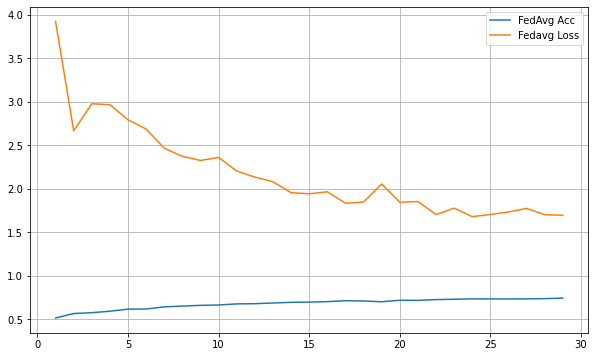

In [21]:
num = 7
average_acc_list, average_loss_list = [], []

for i in range(30):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

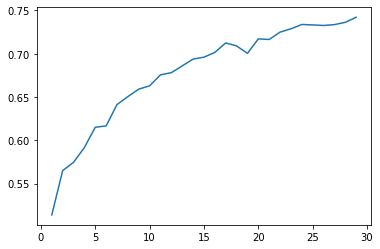

In [22]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [23]:
print(average_acc_list,'\n') 
print(average_loss_list)

[nan, 0.5139071416287194, 0.5650023805243628, 0.574635715285937, 0.5916985728910991, 0.6150904771827516, 0.6166595243272328, 0.6413042866048358, 0.650456189257758, 0.6591166670833315, 0.6628738099620456, 0.6756214276665732, 0.6781228565034413, 0.6859557151794434, 0.6937919049035935, 0.695992382367452, 0.7014976189250037, 0.7124371440637679, 0.708981905948548, 0.7003961900870005, 0.7170857139996121, 0.7164185714154016, 0.7249119026320321, 0.7287323784260522, 0.7337180952231089, 0.7332319043931507, 0.7325757143043335, 0.7335557120186944, 0.7362000025454022, 0.7420804761704944] 

[nan, 3.920173915794918, 2.6650181018170858, 2.9746600690342135, 2.96386547088623, 2.7902715086936953, 2.6844081719716395, 2.4639543320451467, 2.3708856060391383, 2.3235869274252936, 2.3587130308151245, 2.2020089813641137, 2.1324561942191353, 2.0793102020309084, 1.9535291563896904, 1.9403300889900752, 1.9637466532843455, 1.8320777206193835, 1.84555582120305, 2.0525908895901273, 1.8432848308767589, 1.8520043270928